In [2]:
import keras
import numpy as np
import os
from pathlib import Path
from keras import layers
import random
import sys
import pandas as pd

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')

results_dir.mkdir(parents=True, exist_ok=True)

output_dir = current_dir.joinpath('output')
output_dir.mkdir(parents = True, exist_ok = True)

corpus = current_dir.joinpath('hounds.txt')

text = open(corpus, encoding="utf8").read().lower()
print('Corpus length:', len(text))


Using TensorFlow backend.


Corpus length: 373569


In [3]:
maxlen = 60

step = 3

sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
    
print('Number of sequences:', len(sentences))
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')

x = np.zeros((len(sentences), maxlen, len(chars)), dtype = np.bool)
y = np.zeros((len(sentences), len(chars)), dtype = np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 124503
Unique characters: 70
Vectorization...


In [4]:
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape = (maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation = 'softmax'))

In [5]:
optimizer = keras.optimizers.RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer)

In [6]:
def sample(preds, temperature = 1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [7]:
for epoch in range(1, 61):
        print('epoch', epoch)
        model.fit(x, y, batch_size = 128, epochs = 1)
        start_index = random.randint(0, len(text) - maxlen - 1)
        generated_text = text[start_index: start_index + maxlen]
        start_text = generated_text
        output_text = 'Initial seed: ' + generated_text
        print('--- Generating with seed: "' + generated_text + '"')
        
        for temperature in [0.2, 0.5, 1.0, 1.2]:
            print('------ temperature:', temperature)
            output_text += '\ntemperature: ' + str(temperature) + '\n' + start_text
            sys.stdout.write(start_text)
            generated_text = start_text
        
            for i in range(400):
                sampled = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(generated_text):
                    sampled[0, t, char_indices[char]] = 1.
            
                preds = model.predict(sampled, verbose = 0)[0]
                next_index = sample(preds, temperature)
                next_char = chars[next_index]
            
                generated_text += next_char
                output_text += next_char
                generated_text = generated_text[1:]
            
                sys.stdout.write(next_char)
        output_path = results_dir.joinpath('training.' + str(epoch) + '.txt')
        output_file = open(output_path, "w")
        output_file.write(output_text)
        output_file.close()

epoch 1
Epoch 1/1
124503/124503 [==============================] - 92s 741us/step - loss: 1.9240
--- Generating with seed: "      on the moor. he proved to be a blackguard and deserted"
------ temperature: 0.2
      on the moor. he proved to be a blackguard and deserted the a
      that it was the court of the courter that it was a proach of the
      been the courter the coure the coure the coure that it was a coure
      that it was been the came the coure the coure the propect of the
      stapleter that it was my coure the coure the coured the coure
      the courter the came the case a cour the case the coure of the
      been the coure of the coure that it------ temperature: 0.5
      on the moor. he proved to be a blackguard and deserted the
      been liventer had not a meing he up the mass of a rear it which
      expace complece to the was his the care his the mare the came
      that it for a leans for the gooo” he in the complicale of the
      of the race heard it a cloom 

to solmerond sned a baronet. herr?,
      he had seeven skny the doubitwer raiged, watsous cate, bark
      asigs
.  is converyti espand ”
    y, clad me body murry me lawsed notalicgbment beenery the cogay
      his sich unwas bacr!” your cames thlough, ule’s for back of
      .tjour.”

      “his voicu?”.
      “it is epoch 5
Epoch 1/1
124503/124503 [==============================] - 88s 705us/step - loss: 1.2890
--- Generating with seed: " perkins and the wagonette home, and the
      opportunity w"
------ temperature: 0.2
 perkins and the wagonette home, and the
      opportunity will mean to the latter was a complete a could is
      should be the could see that she had not a come some stapleton
      the stapleton as the moor. the direction of the hound, and the
      words and some some morning and the moor. i have come some to the
      care and the moor. the moor. i have see that i was the moor
      the bery and see that i have seen the moor, and the moor. the
      s------ t

      you,” said he were ?”

      “they says long wark the stist. the? why some wild morewnate three
      brait upon------ temperature: 1.2
    tyrant. i have always felt that there was something singh peip. it
      the gleogor where there is sopele for teleocence such interesal
when
      a appraribatters. when
      “watson, villarks tand! st. our tdeattioned toorable resouse?? if they
      should her face of whendey alrouther but my wry pong to intrieded
      him come, you ash i sly doingledly, ho dayllit be a“very blicent up
at with
thes see which allery was notchimpasses. there is oishepoch 9
Epoch 1/1
124503/124503 [==============================] - 80s 645us/step - loss: 1.1980
--- Generating with seed: "hought of the heavy
      rains and looked at the gaping roo"
------ temperature: 0.2
hought of the heavy
      rains and looked at the gaping room. there is a single of the
      conclusion of the country passed the word of the house of the
      stapleton to the country a

      high, narrow towers rose over the trees. there is it of my distance,
      our chectural hilly barrymore-uncentures, and this present.

apharsing from think of ttwark vgixerly cause of certainly shrege
      as tuge tood be between or 1quatices of which hatcher, as you want the came and nothing.
 this small forgot instrudes for see me surely not bistawe handsed
      through master? i’d me holmes, but you have not ageins. ist
      windieg------ temperature: 1.2
storm. two
      high, narrow towers rose over the trees. the bdoord? but they
      has confessed that hair short. hagher. so to the questans. ad
      villarger inmos mus that ondey others lay sorry,” said holmes.

coneckland. “heakn of husion, s, mind
      you doy’s steppl, and themesone gmoor strong stings in enorrang,
      have unfoltuney up?”

      “onow’leuschhep infeson, stuogsed up to meting once knowthout of an
      traqurur of death?”

     epoch 13
Epoch 1/1
124503/124503 [==============================] -

      conscion them which i plaon of the moor, and the wearth of the path out.
      and he said. he was the moor was the stapleton little stapleton,
      and you can i have done.”

      “and there were been the window, which he had been the curtains
      and the moor. i don’t corresped them the hall of the moor.------ temperature: 1.0
the
      treacherous mire, when i heard the sound of steps trait.”

      “what welkwuren conscuemension of the orustied.ries themer in some
      other insliand, and nearnes siltle thoughts my kind of desing do. there
      the trains of the moor, or his own recort a dochiusing, you by
      conscuater of your briggted in which enenfore in it ma
. it is in his ey.”

      “how hourder. why i had little.”

      “you tellone, there were said, and you’s -p------ temperature: 1.2
the
      treacherous mire, when i heard the sound of steps of basted
      thighter sse, say. i am perhessing them. only what ights would be
      time haveroug going nor whi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


has states and the moor. the man who was all the
      late and so down to the moor. the project gutenberg-tm electronic works would
      be to the station of the hounds of the moor. the man which
      he had a surprised to the moor. the prosecuper which has been
      and the moor. the moon before the pro------ temperature: 0.5
  me!” she shot her arms out from her sleeves, and we saw with
      this words and surprise to the last too and see at the truth
      able toget the practice to her any one of the project gutenberg-tm tor
      into the time that there are perfeiture in the moor. but is
      so that stapleton and stay ears your visit of the place of the
      late, who well so death, or you should prepected to see the
             whole was the reasons, the ports of the------ temperature: 1.0
  me!” she shot her arms out from her sleeves, and we saw with
      the moor. s’nges upon the pothed. as we may sor. it is bask,
      theres did a drivalice, and and that he were so

124503/124503 [==============================] - 84s 678us/step - loss: 1.0925
--- Generating with seed: "e rocks.
      my friend and i were strolling on the moor wh"
------ temperature: 0.2
e rocks.
      my friend and i were strolling on the moor which is the statted
      and seen the countryman, and that it is a companion with the
                                                                                                                                                                                                                                                                                                                          ------ temperature: 0.5
e rocks.
      my friend and i were strolling on the moor which had thought
      her light be for the darkness and not the day of the two way
      as the thoughts and the baronet man who direct us in the farthing
      and had the tope which he are the moor,” said the hound, loued
      against without the probabsess to 

      his project gutenberg.impes. may in, and loterept, henry record
offoutic certude with his combining flom in the grous foeding
wnot.

      county. we tell to are nother in theuged us1vering we had been
      hay vetoner death, that the prectle mood, dr. may’s rock in the
      epoch 27
Epoch 1/1
124503/124503 [==============================] - 85s 687us/step - loss: 1.0769
--- Generating with seed: "   this place contains any secret which we have not already
"
------ temperature: 0.2
   this place contains any secret which we have not already
      he was not a man with the presence of the presence of the prose
      with an electronic works with the project gutenberg-tm of the
      wished strange barrymore, the moor. it was not a most of the
            stapleton was face and with the project gutenberg-tm of the
      work of the moor, and the postmoor, sir, the project gutenberg-tm of the
      moor. the project gutenberg-tm of the ------ temperature: 0.5
   this place contain

      sunleghted stare of chanby lidsed, you read tinness to run
      the contrectmenting upon his doebronot scients in the latter of
      the ------ temperature: 1.2
     “i do not think that it is likely.”

      “of course you zirt my possession are leaned to de -!” i vilday. stapleton is
      hot under onounar am   lettangented in one ouched time, juss baskedgen vacible, which
      get the our mr.  i have gone frouching an elfead my my theirlakened.

      “you have expecaoy the foot, and you told, now very stoppy again. an eadyided
      ald? ansoliench alreaddy, it was in turned your mand. “perhapse it
       unepoch 31
Epoch 1/1
124503/124503 [==============================] - 87s 698us/step - loss: 1.0589
--- Generating with seed: "h the specialist and
      dr. mortimer assure me will be a "
------ temperature: 0.2
h the specialist and
      dr. mortimer assure me will be a morning.”

      “what is the stapletons that i had seen the stapletons. then i
      should been th

      but you can take it from me that either he only grim am down to
            willoy back be curve of the kind of my seemed of the
            suppese unont in one such our rearly with a sine rather murders,
      in our by scall to have only again i with right heame of importion
      to the hour of her going me all me the nighted particulishing
      as if a tight your gdat be if i have be only for the toping
      light, now hereer and wil------ temperature: 1.2
il today,
      but you can take it from me that either he opene turn with
      it.”

      “yeath.




 and you. the profesusedfox curven routly the waiting room. i
      clutch the avanes of the will, was he thed? ppotlen excement
     vattey had a smowered at tentatilt. angement. an et”

      and togsimed the chair, rurned a days.

           pessanfienag, allorabtlenty, struss and he knew the peoriss.

      “i have doc”
        did he gragress, the epoch 35
Epoch 1/1
124503/124503 [==============================] 

      lighty, i was reached that he would not seemed to me that it
      discome to fear for any other silence of the talling of the
      whole of the conthir, and he sad that he was not in the moor. we
      think is the lafter and shared to see a day door and helpend
      discuars and the lear and the sister who ------ temperature: 1.0
t,
      uncertain light. before us lay the dark bulk of the moor writ
      at companion and now be preasant borks. be absenee thigh street
      wethatsed man of the moor, but for her ground of your lafter
            wild by ansteriale through this followed over agress that he
      had to telling the lady comens. some walk of then, fell. but
      with the word of the moor?”

      “i read the countdul with a liblicated for the death of this house, and------ temperature: 1.2
t,
      uncertain light. before us lay the dark bulk of the alreng.”

      “and thenly you ear. “such that it must confection-road day.”

      “he stood how describse espl

      and being to the matter of the house and the country of
      the house and the steart of the station of the moor and said
      face and the day was------ temperature: 0.5
sses!”

      “who was the man?”

      “i have not an idea. and yet is mrs. laws of the silence where
      here as to the man said the of the stranded before any station
      of the more house.”

      “there was a long partraps that i were the door of the doubter
      as to genes that he would be a so well seen the hut more the
      farting mone were said before to see any of him to him to
      seemed to have he were to provided the said with a ligh------ temperature: 1.0
sses!”

      “who was the man?”

      “i have not an idea. i stud! anriedaving you. some deeped for
      i might you know from the passions to the people was not or
      all fawed and wait to life to him. there?”

      “that’s the matter was hogew tallezement?”

      he shimpinely toh him to dog, with found a problem things of
  

      this den of thieves. we have a great burld and she saw that
      the moor, and i could not corrow that i have been such a spould not be
      stood a command of the work of the last cross of the work of
      the country who were sure in the moor. the project gutenberg-tm in the
      darkness. the man were the cases.”

      “what i have not a chancing to the country. i have been and
      down the country was a stra------ temperature: 0.5
thing of mine that i’ll lose in
      this den of thieves. what do you think that a datcher to the
      darkness, where he saw that you canrest of the moor at the track and
      mention and have had the pate and distribute and discertar and
      will be to the hound which had been see. the formating coming
      and distribute to his own covered and suty as i have already
      and hound how from my own bitterly man we have seen that i thought the
     ------ temperature: 1.0
thing of mine that i’ll lose in
      this den of thieves. we kn

      “noll passt luitiat or sing, watson, quite which i have a briking divan toget
      by i was toepoch 50
Epoch 1/1
124503/124503 [==============================] - 87s 695us/step - loss: 1.0109
--- Generating with seed: "d that we have not seen
      something of the brother and s"
------ temperature: 0.2
d that we have not seen
      something of the brother and supper about the man who lone
      of the station of the county. i could say that the beart, and i have not be a so dous
      the station and the direction of the county. i have not and something to the station, and the
      convict man were the companion man that i had a few more of the
      other stribution of a most sile and see his lone to the county
      of the prosence of the county cur ------ temperature: 0.5
d that we have not seen
      something of the brother and supper to the criminal fineled to
      the but that what the prosence of the light of the station of
      a faster of the long man, with a smil

      all family portrait on hat uply no straigind which there was
      his coffule upon this hourse my line, in his striwuting-alls
     lit journey.”

      “so that was cleriskently for his crosk, however, of angly
thin when i am tagain give for the baskervilles. hebrousing be
      only fyer and you billarting by recriffure to work thick’s
      askenon of they have flat for device frem the crimes. he were
      streepoch 54
Epoch 1/1
124503/124503 [==============================] - 85s 681us/step - loss: 0.9989
--- Generating with seed: "inly. keep your revolver near you night and day, and
      n"
------ temperature: 0.2
inly. keep your revolver near you night and day, and
      not against the moor, and the moor. there is the convict, and
      the moor that i could not go to the moor. he was the baskerville
      the moor. it was not good united and shad to the postic of
      the moor. he was all the country where the moor. there was not
      the moor, and the united be and 

            time baskent was namf.”

      “i not renily getend i dilone great mons, it do mider up three
      sir henry’s ot disare to be had been in the conving for, sir, he
      this, and the facts and old morning my most interest rise------ temperature: 1.2
sir
      charles, who fled with a sinister reputation to soy, and so
      seemes hutulows lone. “is there was stoodnul, with a littlan.
      was sir charles’s.”

      holmes was unpress, dared if you go to me?”

      “bolight it noten hopewt, walks, far ygore my
      writent now before to distributed thesench a gapes, owner’s
      linemingy, down rememperpaid there’sher, and the two watce-reated
      upon this brollecalies to done imagine, his sileepoch 58
Epoch 1/1
124503/124503 [==============================] - 85s 682us/step - loss: 0.9895
--- Generating with seed: ", that would explain it. have you read anything
      else i"
------ temperature: 0.2
, that would explain it. have you read anything
      else in the

In [8]:
column_names = ["temp", "text"]

dataset = pd.DataFrame(columns = column_names)

for attempt in range(1,1001):
    start_index = random.randint(1560, len(text) - maxlen - 18799)
    generated_text = text[start_index: start_index + 400]
    df2 = {'temp': -1, 'text': generated_text} 
    #print(df2)
    dataset = dataset.append(df2, ignore_index = True)
        
#print("Here's the dataset:\n", dataset)
for attempt in range(1, 1000):
        print('attempt', attempt)
        start_index = random.randint(1560, len(text) - maxlen - 18799)
        generated_text = text[start_index: start_index + maxlen]
        start_text = generated_text
        output_text = 'Initial seed: ' + generated_text
        print('--- Generating with seed: "' + generated_text + '"')
        
        for temperature in [0.1, .2, .25, .3, .4, .5, .6, .7, .75, .8, .9, 1, 1.1, 1.2, 1.25]:
            print('------ temperature:', temperature)
            output_text += '\ntemperature: ' + str(temperature) + '\n' + start_text
            sys.stdout.write(start_text)
            generated_text = start_text
            data_text = ""
            for i in range(400):
                sampled = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(generated_text):
                    sampled[0, t, char_indices[char]] = 1.
            
                preds = model.predict(sampled, verbose = 0)[0]
                next_index = sample(preds, temperature)
                next_char = chars[next_index]
            
                generated_text += next_char
                output_text += next_char
                generated_text = generated_text[1:]
                data_text += next_char
            
                #sys.stdout.write(next_char)
            df2 = {'temp': temperature, 'text': data_text} 
         #   print("\nHere is the output:\n")
            print(data_text)
            #print("\nOutput end.\n")
            dataset = dataset.append(df2, ignore_index = True)
        output_path = output_dir.joinpath('output.' + str(attempt) + '.txt')
        output_file = open(output_path, "w")
        output_file.write(output_text)
        output_file.close()

attempt 1
--- Generating with seed: "e a conductor of light. some people without possessing geniu"
------ temperature: 0.1
e a conductor of light. some people without possessing genius finger
      was all the contrary. and yet it is the station was not along.

      “i have not a modern any other stapleton was all the contrifting
      of the countrys. i have said that you will be about the stapleton
      of the hound and the country which he had seen the station.
      the door of the moor. there is the stapletons.”

      “i have seemed to get the moor. there is the staple
------ temperature: 0.2
e a conductor of light. some people without possessing geniu

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


s finger
      and the word of the project gutenberg-tm to the country, and the
      country which he had not already showed the stapleton was ported
      of the countrysirs. it is the stapleton was possibly could not make a
      clear to me this morning.”

      “i have not a modery, that watson be about the moor. there is
      the country of the moor. there is a little conclusion was alon
  
------ temperature: 0.25
e a conductor of light. some people without possessing genius pity
      and supress that the countrys. i have the stapleton was position of
      the moor. there is the stapletons. i have not a much as i had not
      the old moor. the project gutenberg literary aspeaned to me to me, and that it is
      stapleton which he had seen the project gutenberg-tm to that
      the moon before the moor. there is a glipp of the project gutenberg-tm to set that it 
------ temperature: 0.3
e a conductor of light. some people without possessing genius cleased the
      country o

      nearer to me to a lond of the contrrance of the project gutenberg-tm togner.”

      “i have done, sir henry and the word of the way of the station of
      the work of the coldled but the strange of the project gutenberg-tm to
      the secion of the baskerville which he had been and stapleton
      all methongy showed the moor. there is such a compouration of the
      head of the moor. there is the comp
------ temperature: 0.4
s and every turn of the wheels was taking us
      nearer to me to be about this many down there is such a miss
      of the present of the cases who was on the latter and the trade
      was not that i could here that it was not a present which he
      was not from the last is interest to prep grancelsed and the
                          who down ferfind. i have not possible the other station, and the
      end again.”

      “i see you do no marry that 
------ temperature: 0.5
s and every turn of the wheels was taking us
      nearer to me to be about

      really think that we have seen the father.”

      “how then the word of the moor. there was a hound, and you came
      that he has not upon his trageds, that something in the stapleton
      that when have alonger and the sigues of the country, and the
      hound of the moor. there is so in this brother with the way down to
      the prosenced she tell you think which the project gutenberg-tm a
“is the matter that
------ temperature: 0.6
cution does not arise from him. i
      really think that we have had not a much until when his face
      fine all about the stapleton down the moor. there is no trade
proving to londond the farther disappearion it was on the “it, but, when he had not event. it is nothing to about every
      down to sever you do not seem those and to say that the was
      lies which i ink you think that the words whele the own curve of
      the baronet could not our fr
------ temperature: 0.7
cution does not arise from him. i
      really think that we had

      windows stretched across the orchard and the moor. there is
      all where you will be among the time to any our friendspress from
      the secioath professing undry house, and a cordside these ordering
      home which me to placed the stood untille. when i saw me that on
      which the project gutenberg.or at least face as he stapleton
      that the chance at clerish, but he would have the more naturall
      the work of the ground. “i co
------ temperature: 0.75
lower
      windows stretched across the orchard and the moorland swople
      casenow had hill was cleared out this now, and ven into on the
      old sound womst cannot, and i have not fee himself intimations
      away before, quive for the
      was nothing to rish.”

      “the doon set us and it warningus, and we don’t me a voice and
      understand that there is such a moor-toon has had a shearvy blacknow
      looked to doing this manon and that i
------ temperature: 0.8
lower
      windows stretched acros

      some with all the way was chanced the own straight of the reasul,
      that i could not put them which fled occurl your presentific.
      his sister to promice your friendslice it friendss from them.
      sherlock hold hew mle the cleasing a surprise was nothing. the
      next procession of it?”

      “i don’t tull you another came at the back of the hall and not
      the broken atted a m
------ temperature: 0.9
al of sir charles baskerville. with the exception of mr.
      hest as you will be shiffore him he came that when i think of
            against the man stapleton’s have regatted pancivouse and to commencic me i
      punuted upon a lestally on the moor. it ended it you get his
      stane
he.      it was sagates to friendch to seve you with his so glanced as
      you are everythens to me accoked the doone?”

      “no.”

      “i reached on the hall payu
------ temperature: 1
al of sir charles baskerville. with the exception of mr.
      it could have set your han

      sidelo-thy actome friends lay ’swead fur, a curn fornced across
      this expefed which i thought at very cofford which was possible dr. morta1.hive
      all withttled my evidence of tyiture for this intented access to
      us, on risply, or there, gear them, for i stapleton” i trunty an
      other sthone was before hes no iting evidence with a londo onf
      doe for the sast down to the t
------ temperature: 1.1
n save along the straight path which leads from merripit
      told you, that the hysent, sir henry eurn bec”
      seeming.”

      “i think with your regember was chance of crisp of going to these three
      note, and watson, ald you must go veing so him runition home
      that mr. thin suppersed at this deceroutfus for letter to put buten to
core out of once. this shinity and not.”

      “losh i had only being during pattorris which must regured at o
------ temperature: 1.2
n save along the straight path which leads from merripit
      stapleton. but it is to 

      it is esoner busins in his obscroblition and lettern in your
      of goke out how.”



crapt o frankland, i know theh?”ancts from in all, and i don’
      told bl, my veade you a-pivater him and of came alcouny, high
      the joy” sat thin which nold about the lies of heaving, full there
      i told meesions, he charber were? it is notcien.

      “a patcalos, and observed aunding ivantion was not as i
------ temperature: 1.25
nerve and courage i would not suggest it, but
      it is escapede away nreath, and we lies which that scared to traing upon us
      with the purencied, oih intensicat, pight, and vence now, all
      spessk for i coove of the old. ald breath, and applatted from
      which more acton of his profon which he recure at the black boot”
      —the seemed surewathero.  alcoun. what cablied to yside the
the bernigh townrooy. understand.

      “you know of the 
attempt 8
--- Generating with seed: "he wide moor. i remembered your theory of
      the affair a"


        generous donation of the work of the moor. there is a so down
      the countrys. i have not a modery?”

      “i have not a modery?”

      “it is the stapleton was not along, and that i had not along?”

      “it is the stapleton was on the countrys. i have always the
            stapleton was all the stapleton was position where the country
      of the moor. there is the stapletons.”

      “i have seemed to
------ temperature: 0.2
for bewailing his untimely end.  his
        generous donation was postmation was not a considerable to show him
      stapleton was all the door of the moor. there is the stapleton
      and stapleton was not along. i was precention of the country
      of the moor. there is the stapletons.”

      “i have had no doubt, sir, i would have so indering the look
      of the moor. there is the stapletons. there is the contrils of the project
gutenberg-tm to m
------ temperature: 0.25
for bewailing his untimely end.  his
        generous donation as 

      i had been casting round the stapleton was position the way
      and have been the project gutenberg literary cupther to me, and i have not already intention
      of the project gutenberg literary project gutenberg-tm that and
      half all the old more clear to the project gutenberg-tm to doing the
                                      the possed and have been the position of the station. i could not
      not a mode
------ temperature: 0.3
elp the rascals in any way.”

      i had been casting round the stapleton was paysion was project
gutenberg.ome who is the countrys. we have not a modery?”

      “i don’t could have been to stapleton down the project gutenberg-tm to
      with the hall on the farther of this most complete as i had no
      seemed to go a traged, the found out of the case of the cound
      the uncentaven of the moor, and the hall of the stapleton of
      the project gut
------ temperature: 0.4
elp the rascals in any way.”

      i had been casting round

            inquest, but at least enough has been the hound was a stapleton
      the probablant with the same day where the faction was not to
      the matter, and that was the stapleton was along direction was
      was the stapletons. there is the project gutenberg-tm electronic
works, and he had only he was upon the old more when the poor
      and have along but the old moor?”

      “i have such a comming of the moor?”

      “there 
------ temperature: 0.5
eared up by the
            inquest, but at least enough has lighted the moon was a lond
      and against this morning his project gutenberg-tm i could not
      not you and you may surely nothing to the messairs.”

      “i stapleton which he took the criming at the hall of any other
      of the man is the hall and not a clear to be a gloom on the
      latter of the surround with a little was face which i had not
      claived the aliend in the moor an
------ temperature: 0.6
eared up by the
            inquest, but at le

      quich. i have said, and it have always be a defect upon the grimpen
      distributed and the man excervain and man that the successing to
      the clower was the day carristy sight of the lond short of
      the farther stapleton, since i could not colled the other day
      all me back be abanden could done, and he must remember the
      stapleton and found the down upon his food the house in th
------ temperature: 0.7
plunged us more than once thigh-deep into the dark,
      quicaly to do the gloom of goint, but other expression of the
            hotel country of the tragic with those door. the man who do on
      the word at the project gutenberg, as since of the poor cleast.”

      “that it is a surprises for exampe and the steem of a stapleton
      butterout provinging. we had not writice said that it heard you
      have seen that if he topply was ponned my until
------ temperature: 0.75
plunged us more than once thigh-deep into the dark,
      quich of the faths coll

      dilapidated opening which served as a door. all was some way
      the shad unlike holmes, and the man surion and clear every
            learn upon the man is possesnul to preptertity. when he came
      casescive where he had something him about this master, wacker that it
      curious little man i had never observed, and that the old dancence
      of this moor?”

      “no, we have had looked to hear any pighted from his chosin night
      all 
------ temperature: 0.8

      dilapidated opening which served as a door. all was stapleton
      the prosecces of his almost the man he could not corrolice the
            seemed his election of a ticted. that dine. if you will not
      down to devile how he boy that they were doing
presss. brougggeting the other discupted interest for evening cutar
      little to a monished, and i could not cerforarion of the solic noling and
      glowed with his friends of little vullvery 
------ temperature: 0.9

      dilapidated opening whic

      would pressing for the opinination boutd the fellow which dr. mortimer, whuth has
      glanced from it.” he pressing into the burrded against fert
      and purnotched. and the very so is any came actually all waited to
      this hand me before the waiter of hid until he saw him. this
      sthan near upon me.”

      “but that if the public, widdous, and heal bearred. “he would
      mare to me to yo
------ temperature: 1
to stapleton on the night before that his visit
      would nevills poor emplet were several coldess evening shroth
      but them.”

      “one a. we relowd it remal.”

      “go down unmired deayhing he had ever somethist to interesed intoudd i
      know awtant upon this folded handsome, but it was such contertt stay
  one
      the face down for it.”

      “i have do at the tragl?”

      “he now he pursuast down there.”

      “our devile you.”

    
------ temperature: 1.1
to stapleton on the night before that his visit
      would las an deying in, ag

      instrarted.

      holmes there halebers
work round. a body fill was plannthe, and holmes druesk which
      his roofge hugo from cloom death fall, i was imprepted the
  lot staying this word catchaver left of gave after that you
      seemed he i can never netfore.”

      “and it establing abovef mether doubt, so    the lirted spannimentming again of it must ?am,
      “formed?” she since fraboug?”

------ temperature: 1.2
r my visit. i had not quite understood until that
      instrubed you may blowledge himcess, which me with her scale
      fentled that on and good divagr foundation as the down liothed. why you orais
      mear starll retenedrably wether, ik but yow areuron?”

      “i did how you can been co beconting the track which crakened
eager, apposted him at theor
ton’t have been all scomme it coulder nemper
      baskerville., where seen which in the mooe my motu
------ temperature: 1.25
r my visit. i had not quite understood until that
      instair, “there have 



    stranger who was pursuing me. he was a small, slim, clearable,
      and have so burred.”

      “who poss me you allfult a cler all y you livessc—glaming dryes down them
      irangle.”

      the hall, cluad. iinar remembered. “i state to have had to r
      dudowt dogg?” i could not us tol—only affore our upon my owns of ours.”

      “one will not fore that no paid from but it enorgsfiting mring
with the rike in a

      “angring the bry, sir. on t
attempt 17
--- Generating with seed: "d destroy this letter
      which he received on the day of "
------ temperature: 0.1
d destroy this letter
      which he received on the day of the hound was not along. i should have
      he was all the stapleton was on the countrys. i have along?”

      “i have some things to me to the face of the moor. there is
      the cases.”

      “i have not a modery, and that it was a so down the stapleton
      and the country, and i have seen the station was on the cound of the
                    

      dr. mortimer looked at holmes with an air of interesting on the
                                     the was a little door. there is the contrilar friends and the
                                  the posses. i was not the station was not along. i have some
      down to his sound of the down of the moor. there is no trade
ow show got attention that the stapletons. i had not already
      he was not that i had not already showed them.”

    
------ temperature: 0.25
iment?”

      dr. mortimer looked at holmes with an air of interest the was
      death.”

      “that is the other stapleton was on the countrys. i have not a
      clear to such a most conceived and he had not her charges and
      could not got the family way the moor. there are so you as i have not
      stapleton was a back of the hound of the cases.”

      “i see you must contain the stapleton to the cry of the hound
      of the countrysir come wa
------ temperature: 0.3
iment?”

      dr. mortimer looked at 

he track. her face was beautifully flushed with her exertion
      that i was not a face of the facts of the countrys. i have a
      stapleton which he had not a modern. we have not a modgunt
      the strange of the cases of the trade.”

      “it is the stapleton was alley and allower of the moor. there
      was no doubt, where the country on the moor. there is a glowed of the
      country down there was a long faced but the posses. i could not keplet
------ temperature: 0.4
he track. her face was beautifully flushed with her exertion
      and the down before the project gutenberg literary corgents, and he was probitions. the project
gutenberg. we have not a most conviction of the woman was not
      and said to be a little of the country which i could not have
      gled the moor. there stapleton with me had a so danger. we have not a
      she tur watched the project gutenberg-tm to that she came the
      estate of the sta
------ temperature: 0.5
he track. her face was beautif

      are floundering to this marries of the faths of the latter was
      about the fact on the hall on the other station, and we have
      stapleton which i could not he came the down for the stapleton
      and fould not a man was a distance a stapleton may the forman.
      he lay of his wewo down them.”

      “and a possibly some wind the work of the hound, and as to pursustire
      the own considerably better
------ temperature: 0.6
ottom anywhere in this bog in which we
      are floundering.”

      “how do you know that i had lad the word of the project gutenberg-tm a
“is not to considerate it may well be dead.”

      “there is no have been the last should be be dead to gravel to
      go a ture blee hutbach of the position of the master was not
      along the darkness. but he alal
      old hut cleared with the suddens of the countrys. and was a
      not and gleat for the stati
------ temperature: 0.7
ottom anywhere in this bog in which we
      are floundering to devil

      his mind. if you will stapleton the facts, and reporting the
      other sigh closid and his cur of the black door and darkn upon
      the darkn to see that a way this sting, this point of the lond cases
            the house, and any discleme a face for the causions and meant.”

      “see this?”

      “i have heard and the fact on our own fee be a gleam as he could don
      his mand, and walk down to
------ temperature: 0.75
, balanced one against the other, and made up
      his mind. “he stood the young own on the stapletons.”

      “and the carms and promised to me, but how feft be this much mire, and pake a
      incluaring a face of the down and half in the partume of the
                  clipo? is the last have been way clad about he will be amon
      you that you is foo mortain there campuad the man was recoom.

      “expression, and a stapleton. mhys, the solicial 
------ temperature: 0.8
, balanced one against the other, and made up
      his mind. all something

      and discreet. i am justifited all aliviging for the sust upon the
      inclucted upon this man’s save of you and you were all those
      stapleton to me, and i los a hund of the fleces of the countrid
      fofture you remember. there he ladres down the glipted to make uny
      all the probabilition of bast” i light had to me to say that
      i hill!” she was not our out everything interesting into edes
      of yo
------ temperature: 0.9
 are perfectly right to be wary
      and discreet. i am justirurions. but he has blowled them and his
                  factied so
      rought from anyone got of all attrointy but the other hugt un.
      “a gies, “you we tell he forts with us, and you have there ghable upon
      us. we exteeds or hew not you will very on the charing sure
      unfording.”

      “and i could not post. i think that there is the moor, and not for a
      clear would do t
------ temperature: 1
 are perfectly right to be wary
      and discreet. i am justed 

      “that’s the truth, sir,” ?”
mire. as stapleton criming to me.

      “my posdorled by the dine,” said he. “that is it you intenced
      it for tallod found a desigurating sir henry to muculast there
      moor. i remembrible, that if any few up you do if any of food for
      the going, quick had until he followed our joy. and yet it if   death have been here
      pleasant to me, and she cannot and going sundess liin wi
------ temperature: 1.1
 sir—selden, the criminal.”

      “that’s the truth, sir,” said he. “there this two situation
and is must charge this an yor loss manow so convesousted ention

o


crapter in such eageldy, which he shatle name.”

      “iden this, no, more in now in the door was no fect
      methil rudger.”

      “bothing did ’xfmul.”

      but of gone from the seculation work happened in lackess upon sir henry
      of evident. “there is no colve against for the now g
------ temperature: 1.2
 sir—selden, the criminal.”

      “that’s the truth, sir,”

      i tiptoed down the path and stooped behind yvece mistre, ancraiced
      upon after stapleton, my medears in the sceeding. retidn,
      about it you
      find within the fould. the laje, and not have sever her back of
      ionbust hurt fles.

      “pitcint,  and in any round a paices, clonician to fougd dear was
      a tenvainially upon you.g-iated to be aninn. what some the
stood new two moor?”

      “i home don’t side me.”

      “
------ temperature: 1.25
watched!”

      i tiptoed down the path and stooped behind that it was keyits
      doggice me.”

      “permider to gave redow fle im to tull, this face which will by a
cry, ah. but in this good familly your of grafty, and a fact
      untown. manned the drivor cigaripped where you guet, and to me to
      loss very.”


sec. pracely facal cursain dome about my mrwuqealies coming deoud,
      boot of thick, “we will not feet the moor
that you stappere, a 
attempt 25
--- Generating with seed: "gh private hotel, in crave

      the stapleton was position of the project gutenberg-tm to the
            stapleton was on the countrys. i have secured the moor. there
      was a face of the countrys. i have not a modery?”

      “i have seemed to get the moor. there is the stapleton was ported
      to me to the cry of the project gutenberg-tm to the cases of
      the moor. there is a stapleton was not a contrive for the pro
------ temperature: 0.2
 together, and assumed his most impassive and judicial
      was all the countrysirs of the point of the moor. the moor.
      he was about the moor. there is the station was contain and
      stapleton was all the stapleton was possibly were brought to
      the moor. there is the stapletons.”

      “i have not a modery. we have not a modgunt which he had so
      not get the countrysirs for the point of the house of the project
gutenberg-tm to that stap
------ temperature: 0.25
 together, and assumed his most impassive and judicial
      the moor. there is no d

his task was successfully accomplished but the more difficulty
      showed of the moor. there is a hand the door of the project
gutenberg-tm actlo—purtly and have been the stapleton was along.
      there is the countrys. i have had no doubt, which he had not
      the country of the moor. there is the project gutenberg-tm electronic work, and he had
      been to his man were stapleton was all the door of the statted
      of the house in the moor. there
------ temperature: 0.3
his task was successfully accomplished but the more difficulty
      all way the cross of the countrys. it is a so that the direct
      of the cases of the moor. there is the sting?”

      “yes.”

      “it is no doubt the moor. there is a face and the project gutenberg-tm togning that the
      other stapleton was alively it me to the surmind of the way
      and the clear of the window, and that it is the facts of the
                             the p
------ temperature: 0.4
his task was successfully acco

      for i was aware that he would never permit cases to over the
      country on the moor. there are the hall of the project gutenberg-tm a
“it was, sir, a man which he had event man cannot makin all the
      other sleamed back-coom. he put on the hound was all the stood
      of the moor and to real to me a clear way of the station. it is
      selding to sever found the moor, or the countrys. it is the
      country of the countrys. i don’t come whic
------ temperature: 0.5
      for i was aware that he would never permit cases to over the
      cound of this portled for an expression that i should have been
      to the presence for the door of the moor. there is a followed
      had them. there is the door of the heart could repure him with
      the subdred before him the coldsance was not moon and seemed
      that you think that some wish i had seen there are the hall of
      the hound was not that you will be in this m
------ temperature: 0.6
      for i was aware that he 

      her father refused to have anything to cut from this station
      all most confided for any tone to know that it was a portrait
perside the moor, or there was a round which this it was all
      intempention and found the old was for the country. “has told you
      inclear to a curourpons of the cases yellow stapleton there
      brother which deserved to my flight of the way and for the
      beak me a present of the sting?”

      
------ temperature: 0.7
y on one side.
      her father refused to have anything to sever the lair from which
      the school redient. then i
      seeming dr. mortimer, that more clear to stapleton. they stame
      mution.”

      “there are you would not go the suddenless of the fecilled
      entened with gond interest the was of brinking of it.”

      “you gave the moor of kieding to seme the darkness. you must charney.”

      “there is no pains and the presence and our f
------ temperature: 0.75
y on one side.
      her father refused to h

    collection of butterflies and moths the formation of which, and that
      had been way betimes?”

      “no, bark man that the over that one was a morn dincull it.”

      “halloy, watson?”

      “i done may perfered down for the way about he has absurrening
      the dog, both allol of the sunnow dadout.”

      “a walkered and half one was stwayp earlered to faw manoth uny
      of the possess of the countrys. on is that i had not know that
      “
------ temperature: 0.8
    collection of butterflies and moths the formation of which the
            heart of thick, while i could have been so daren the little
      darkness, and how brought upon a sinnk the other steadily in the
      moor, did very very moor?”

      “yes, i have some oppossion of man, for expected with more curves of my
      able to me. i am begind hold time from me about i could not curven the
                  the corrobition ended. all manush upon the 
------ temperature: 0.9
    collection of butterflies 

      possibly thought and way from the house
      aloniton, and boy sann the cross cleared which he cases well
      like to feins the call the clear of the never spair findine
      interestion is of at our for at last that i mud the inc leant.
      he told the matter, and i think so that your deper
      upol his sochipup of passes.”

      “exactly.”

      “it also, and yet he must should have secues
------ temperature: 1
one is to play my own game and speak as little as
      possibly walk of the hound, and he never one short upon the
      notel coursel and the large of really on a my disention of his
      and you corrow be cleared cautast, a claim in the unither of
      like more on this poor with this allfully, then this is to sypecting
      could you thin account the pection of it, good back so might me
      heldenchimular could not reported. at us this heard in an
------ temperature: 1.1
one is to play my own game and speak as little as
      possibility teve visiting-

      imagined,” said dr. materful contribing cry along chaired ed
      of the god, with them, but creatincence over to me dinn, and
      i have upon read excelely have been breaking botlen.

ofrogies of this gocitions of it, something asoning friend of what
      unhave done to go knower wpry one of the nature whom i could
      stood the placif probabilitions. bus. the very toolest glads
       ja“lo” said.”

      “
------ temperature: 1.2
exceeds anything which i could have
      imagined,” said dry ha. i was unperson the intepplakered upwer
      uninglabust it day, but for no houss yet which on a visiting
      burger to accepthes the paid guill we bulf constantly from the
      can sjentle ofe it could here-ming solmed a smoo?”

      “well, then demis. i never spoty, could done, thowch themeng wall door curves
            evidence.”

      “he don’t mean when all wassem in the fath’s co
------ temperature: 1.25
exceeds anything which i could have
      imagined,” said dr. mor

      “it is the croucides with a prepartionly out him showed delight again
      keaning.”

      “then mean fitm there,” said holvean! and watson next smoal.”

      “it hemeried that it sagann am do watson gues for so the extle
      him, lived for the hutt kepon beforedly fixt thrilone. with
      your owh contrila, who calestance of regret then with my escanere
      issien, which is deaced beh.o.  t
attempt 34
--- Generating with seed: "      indicate the character or intentions of the man who li"
------ temperature: 0.1
      indicate the character or intentions of the man who lived and
      half all the cases of the project gutenberg literary aspean the
                              the project gutenberg literary propition of the country of the
                                the project gutenberg literary propition of the moor. there is a so sorroused it
      the country of the project gutenberg-tm to the country, and the
            stapleton was all the stapleton wa
------

      objection to my running my finger along your parietal findind
      and stapleton was a death, and the stapleton was all was along and
      through the countrysirs for the stapleton accept the stapleton
      the coldsance of the way was a way the stapleton was possibly
      stapleton to me, and any way the stapletons. there is the stapleton
      the cases.”

      “i have always the stapleton was not a contrive which he had
      go until when 
------ temperature: 0.25
y
      objection to my running my finger along your parietal friends than the
      country which i could not go the passal and alight that you see
      that i had not our friendspred by a most conceived and he that i had not any
      of the cases of the hound was a so down the countrysirsterion
      of the hound and the sust as a so directred and the stapleton
      of the country. “he was a so dr. mortimer, and you must course the
      stapleton whi
------ temperature: 0.3
y
      objection to my running


      “we have not the stapleton was presented the station was man
      the station of the way better which i had not always there was
      the moor. there is a hand to turn the public work, that it is
      some with the project gutenberg. “i have not a mestones of the
      interfion the moor. there is the station to me, and i have not already the
      distantry pach of the moor, and i have 
------ temperature: 0.4
e
      hall in the middle.”

      “with a wood round it?”

      “i don’t me thurry the word of the hound was a mone, sir, and he
      obstroutzation that which he had some the place of the cound of
      the way of the fact for a mound through the moor, and he was
      evidently that you were all that stapleton was about the matter.”

      “i have not come with the stapleton of the facts of the lady,
      and the word which i had not your friendsl w
------ temperature: 0.5
e
      hall in the middle.”

      “with a wood round it?”

      “there is no trad. that

    “really, watson, you excel yourself,” said holmes, pushing of
      his could not make of vilot the moor. there is on the lond of
      a considerations in the word who would have now any here to faitly
      and his charner to the darkn of the hound of the was something
      could not he profit the lood to me the cold, and my friends of
      the station was not that the possibly which the hound, who was
      that i had not be aban the down of the l
------ temperature: 0.6
    “really, watson, you excel yourself,” said holmes, pushiming.”

      “why was no for the waiter and the truth on the ground. the
      other say was kind, and the truth that it swoakly the stapleton
      districted undertance and be abandon this man. but i had not
      the place for the side. the hound of this conncessand and so
      this its personically catches which means, and it is a great
      of the moor?”

      “the stapleton, my friendspi
------ temperature: 0.7
    “really, watson, you excel

  “on the contrary, i think we are particularly hot upon the farther
      beart would stand that he had conttribute the case.”

      “how i but it came when he had event, as i have done, but ot
      the conviction of the last important which very cound him. of
      the door of the grimpen pity a suspechold manured stapleton have creakine
      against the stapletontry cry a was very much swop of the
            stapleton which that so darrighte thick?”
------ temperature: 0.75
  “on the contrary, i think we are particularly hot upon the moor.
      you shate found at this sage which he regroeot for the potred
      of the hound was we had no shor of the grimpen was not mann
      that contasted his wiss, but it the word scream to think, but
            regent eunster wo my with a burge of the hound, and there
      baskerville suage at last, but it was a face the stranding had
                  say and that where the halewal per
------ temperature: 0.8
  “on the contrary, i think w

      “and there iegring across this much of us to him to me a roce
      of going and —promised and trak the lad and within the point of
      gloom and i have snummers very another and pursural right which
      the contral cention far against you not any ralling the componcide.

      “i have seen the freckly waity importion of a protection of a
      clipping of that a counier back of death of th
------ temperature: 0.9
nd astonishment as he
      gazed from sir henry to me.

      “now,” said hexey you have some hill.”

      “i have alreads of starced upon on is intention has very suugh that it
      conceive, glad a road was a morning.”

      “no astinf i had a connot faced her casting again.”

      “you she did you that sempting, when the marristlouty but contase a
      night and the wilds for the open vicitions to the own poste
      that seculy other public of a 
------ temperature: 1
nd astonishment as he
      gazed from sir henry to me.

      “no, sir, or good wo you i

     i was wondering if there were any evidence of such a sound. “so
      pay intensibly formigation.”

      “how do you know a little, that he has weap—proeals of dr.
      mortimer, that i don’t b, never he has not heard of shurren any
      ahaich. in any reacher which devond wihily on our two of them,
      from it.”

      “yob. stapleton or cold,’vesless find of this folk rocked prosiction
      along back of driving be prease on colleated for any 
------ temperature: 1.1
     i was wondering if there were any evidence of such a so stay
    alo’y mechepupe. in the subdred face which his instwbuation
for if seculical few brike.”

      “no, sir, a most rencided him. but  climaring from impation was
      along the feriess put on esceep, a gueinty included makinving
      coanced includite?”

      “it strange to meeting. loss pectition that but had over onter
      stapletons. sex had such and defented in any country present
------ temperature: 1.2
     i was wondering if there 

      been permanently attature them, rose sound expiser to a monturs
      settled in confident for outside this vosital the strange, creen. bethens,
      bot doyas, to love my thoughition of mightartleth, as an over
            with chi’s waiting on this much less as his dine,” ked but for
      them, that her ternaging no down to straight your revoaghed,
      this swinard eugttain his sobtlor that one isnour with agemb
------ temperature: 1.25
d that the name of vandeleur has
      been permanently attached the hall for the so doy’ ol a sleamers at
      und norrosp and said, and you may lay a small possessed. the
      glease of obtain receiv to propace esine, ceatsor alibog about
      the old stook. or roor dead miservely shinither which
      ill it run his sift atten pripted. twices, a day into eftiog
      to your wind the work was opportable, wantted at enemry, that on
      the was infmu
attempt 42
--- Generating with seed: "nicate with the police.”

      “exactly. i have

      the station was of the station was not moutly was a so down the
      country which he had seen the station of the moor. there is
      the country of the countrys. i have not her stapleton and the
                                   the moor. there is the stapletons.”

      “i have not a modern and stapleton was a stapleton was not along-times
      and the stapleton was possibly were brough
------ temperature: 0.2
nvisible attendant. so wily was he that he had not trusted
      the stapleton was on the countrys. i have come to me to the
      country which the project gutenberg literary aspeant of the house
      the country, and that i had not her but them. the lafter of
      the project gutenberg literary aspeaned to me to project gutenberg-tm to me, and that
      he was not the cold, and i have seen the project gutenberg-tm togn
      the hound of the hound was
------ temperature: 0.25
nvisible attendant. so wily was he that he had not trusted
      all the strange of the 

      prostrate man face downward upon the moor. there is the stapleton
      and said to be a more clear to my face which he had seen the
            stapleton was paid of the stapleton was on the country. “he
      was a distance of the moor. there is the stapletons.”

      “why, it stapleton was an again with the countrys. i had not
      the project gutenberg-tm to that it was not a considerably pursions.

      “and the man who 
------ temperature: 0.3
inite shape. it was a
      prostrate man face downward upon the moor. there is a so back
      that he will see that some with the point of the country. “he
      was a contrive of the hound was not along and to be about the
                            the baronet who was regroding against this many and shad and
      held you away that you were in the station. i was already stapleton
      the moor. there is the old moor. the man who ward do with the
   
------ temperature: 0.4
inite shape. it was a
      prostrate man face downw

      “but are you any the probabilition has been a clear with a more
            stapleton came of the lay of the hound, and that he was already
      cases who was on the cases.”

      “have you may don’t come with the heart which i should stapleton
      the door of the hall of the project gutenberg-tm electronic
work to do you wild be clently the project gutenberg-tm to met of
      the cases, and he had not m
------ temperature: 0.5
 the darkness which had girt me so long.

      “but are you came that you should have not a miss stapleton.
      that it should have been the country, and the moor. but it is
      stapleton was on this manonict, and something to the criminal for
      the case of the station. with the waiter of the project gutenberg-tm e
      stapleton came since it to mrs. laura lyons. the word and about
      the word early days was not a countrigity?”

      “you ve
------ temperature: 0.6
 the darkness which had girt me so long.

      “but are you will be abo

      “to leave you here. you are not fit exacted me the work of the
      of the moon much any public work to the now, could not have come
      half with the door of the preseral miled unlo”

      crime to guetation to the evening to against that you should our
      back that i tell you as i had not come to me those for any for
      the letter of the work of this lader to which i came when a
      acture of evidention was some straig
------ temperature: 0.7
se to
      do?”

      “to leave you here. you are not fit it, don’t must livestule of my
      districted finding but own have a littly have not already until “oo not going to
      the other conting in the wind intention would not be convented the
      house in the burrs vulbe of his narract, and upon the colds, but
      unseated for the useless of damage from the word for an ecensed in a
      remains. i have some lad which he had emply worthous such
------ temperature: 0.75
se to
      do?”

      “to leave you here. you

      “but it was some time to be at my own. the alter barrymore, with
      at the pach for the point of what i saw me the other distance
      and down family home, and how brought which he was standing1,bard
      event, mr. sherlock holded gentleman dispoited and distribution
fore of my is as to me to seve upon this soling finding.”

      “you have not the word of the burrsting until we remains were
      acting from up
------ temperature: 0.8
t and waited
      his chance.

      “but it was some time and hard the beart. “there are the firstime
      looked being all the reads of her could indecention and again
      the down and this cares of the other them.”

      “i had not afternor moved, for the suur on the work of concefve a first
            pictural commened indication was purernating to from his obstrup for
      the shader was no ever. this secret. if now, stood we running
      abou
------ temperature: 0.9
t and waited
      his chance.

      “but it was some time to

      watson, i think that we would not heard watched them me to swern
      encolled the criminal moor to yest proved discalld dead.”

      “he gave, “and there’s edineced which he taken risely came so much
      come and one very should more to be reasone all this, and as
      the fellow may well if on everythire him, a huture in the
      dirdenring somewhere mark to me, and he will be behon to regrided
whe chacled for el
------ temperature: 1
may need his assistance. now,
      watson, i think that we low how them which allfully the lump
      no friends we have heard in the wisped is.”

      “i think that it is refured to ture me us.”

      you have leght them and think him the roes and the wind evil and
presamer the
      of dr. mortimer, you do now he not upon the protable when a pair well,
nrwunchges will but the fertilly pocked he might at certain ever
            who i ham not tell you 
------ temperature: 1.1
may need his assistance. now,
      watson, i think that we we

            and plucking at his throat, there stood that i did not me.
      “there had looked to donant put his revous liting as he foo calmes
      than brwefflaice exects to ount, and that was part.”

      “handkine dr. mortimer. paper which i was alon what their tohsion
cleared for.”

      “i think that i would have anancld like a waron—that it might
      we five it traged, by the driven for.”

      “did you shall about you came paper was
------ temperature: 1.2
ver hugo,
            and plucking at his throat, there stood that it has not uboning how
      had stippen emoticing at facty are them.”

      sha. to tmound up ahand to me to make and breen voase deayh aloon mustering on
      other gmpose yous this one door of moor’ did you gue that he could
      noll it under the loys”


hesille it, the tignt. did he isshed to do you don’t kindion
say it down agaped hid new all acknow.”

      “dief. then it had alre
------ temperature: 1.25
ver hugo,
            and plucking at h

      the leane of a mir fellow cruckbility manay you tirechaping sir henry.”
      duty i had sectionirg must could alessed i find the rooms we well the last
      going going!” he cragation shind -kirl, silen to you to gentlight.”

      “if you have we did.”

      “i.”

      “fou dar
      whttled now long.o
      leaving in escake afvictir, and enithts which meerly regond wher
      lide this hoan a ba
attempt 51
--- Generating with seed: "sir charles received any other letters in the same writing?”"
------ temperature: 0.1
sir charles received any other letters in the same writing?”

      “i have not a modery, where the project gutenberg-tm to the
                                the position of the word and the country which he had seemed
      that the moon before the country, and the stapleton was position of
      the project gutenberg literary propited. i have not already intention of the
                                  the project gutenberg literary propition of the 
---

      “well, you see the hills beyond? they are ready that it was not
      the country, and the stapleton was all the stapleton was porced to
      the burrdal who would have been the moor. there is a so in to
      the hound and see that you will be about the moor. there is
      the hound was not a contrive for the same was which i have not
      do you must remember that the stapleton was on the moor. the
      stapleton street to me to be a 
------ temperature: 0.25
 place?”

      “well, you see the hills beyond? they are ready that it is the
                                    the facts of the presence of a more clear facts of the project
gutenberg-tm to a considerably but the other seccess to me, and
      his eyes of the house of the moor. there is the cases who was
      light had expression, and the project gutenberg-tm to the project
gutenberg-tm to with his solicited and have the hound was a stapleton
      an
------ temperature: 0.3
 place?”

      “well, you see the hill

      i am able to support myself it is largely due the word of the
      door of the moor. there is the contrrance of the countrys. i am not think
      his straight. the last i had no doubt, and you must always the
      cold on the case of the countrys. and she had not get the moor
      of the face which he had event was a face of the waiter.”

      “i see you must remember the moor. there is the stapleton was
      all the contrils for the ho
------ temperature: 0.4
ess. if
      i am able to support myself it is largely due for the moor.
      that stapleton was on the farther and the moon passed such against
      where the stapleton was all the countrysirsy of the hound, and
      the hound, and the sod of the hour of his also without of the
      incluck of this station for the man who was stapleton was present at last
      the moor. there is the country, his power which i had some and
pach of the word of the wor
------ temperature: 0.5
ess. if
      i am able to support mys

      seriously, and his few mile, and hbut it meant, the truth that i
      sawed the contrarion of a little of my so sleamed for the farther some
      until we doing to prep coursel find the heart of his could not he
      down the country. “he could have been the down down the mort”
      light beting of the moor, and was upon our disernent. they was
      no better in the moor, and walk the project gutenberg literar
------ temperature: 0.6
elf. yet he took this document very
      seriously, and his started such a tifter of this strange clear contant
      of the station of the moor.

      “it was a most spection through it.”

      “shake. sienred me the preciling fire of his face deking to
      the country which he could not got the sting?”

      “any of his brother heave of it could not certain to me as
      brought with an extrarical who donation with the same of a speak
      of the
------ temperature: 0.7
elf. yet he took this document very
      seriously, and his face 

      at it in this light. on what occasion. it was said that he leanted the
            spotieity but the moor.”

      “i am a deuting slowling interest undery for the because which
      he came that he was not the end of the was had you, while that
      he had of the contron to the cross. the last expective would,
            no to spectly so that the law and it might amout!”

      “but i have the passed faced on this many, and i
------ temperature: 0.75
ther than this. look
      at it in this light. on what occasion is fares sir henry was
      the word that the fach on from the folk the staftiting brink to
      giving him burger to be scoomed ainty baronet, and well no
      dotant devilsely any when the unsidf of the brinaliey by my
      of my sightion remember to me to you go the moor and ’swere
      informational villite for the point of evidence in amarked. the
            exeers.”

      “it is 
------ temperature: 0.8
ther than this. look
      at it in this light. on

      all that he away intension was down to his hands of the hours
      his granets more, but now barrymore?”

      “i don’t me the stapleton was plannt for her eyes mulest was not
      districted so were so that you were into on the case of the
      would do, when he was not after you have been so traged conting
      of the most conceanly?”

      “i have some vilitited. and he had learn to come, but that 
------ temperature: 0.9
hing so mad, sir. we have provided him with
      all that he had no face, walking in evited underfull of the
            stantery?”

      “no, they endoun and not of a little dine, sir, it dos” barrymore.
      there is dead by the ection, colling himself in london was very
      revoark without findied dyme that the perfain, with the figue leyice
      of the heart had conter. it remain to get the mentions is purence
      for the crime.”

      “nothin
------ temperature: 1
hing so mad, sir. we have provided him with
      all that he was rwyeswed t

      now the position of heavo—that we have not understanced with an
      woman, as i bight to follow boitit hill being my would do not his noes
      infear the clappens.”

      “i have do, i amopt for a fafsiun—the less at mark.”

      “why, then you do not fee the hour of death of the bolder. “why, she fellow you bre
      orded them, and now, you is sent cance, life more cleep of for the
      r
------ temperature: 1.1
hter, mlle. carére, the young lady who, as it will be
      hear any hutbing run spent more?”

      “anod, “that’s joy meetledd to be sir henry. it electronic forled to
      my voucog.”

      “ut, which have raised. if i might found misterlanding ritict.
            stapleton’s reporting.

      “upon the miss stapleton guecation within the woulding .ominned
      liithed the lamp pay procetcation viede to turn. i could keply
     fan to meeth
ozed stra
------ temperature: 1.2
hter, mlle. carére, the young lady who, as it will be
      stid prixusting .our by 

      could have glad them would can a colves and mannered outlon he
      know a couse thiri’s, thy never which he faye, i lay upon the readiaglys?”

      the was repurednt of though here, lisingh benogied me familing but
      genth upon me.”

      “ey repert, cound even no here.”

      “can you have oppleemed to get this name to must imagaind by the station
which he wish these breathed and ove
------ temperature: 1.25
ything escaped me?” i asked with some self-importance. “i
      know. “do you push the mooeld.”

      “utderything, but i rose writing discover mayon. but we reportion in
      his twomoor the kind of that?”

      this fineled down thor dugane, and fed in the guedne of my waiting
      for this most haim. on a spear nume for the heart upon any
      helf evidence, you muld alley thunch, for the
      news very mornine, so, may i could don too watson, wic
attempt 59
--- Generating with seed: "wo, for i think
      that we shall very shortly get an expl"
------ temp

      “where can she be, then, since it was a so dark from the work
      of the countrys. i have suggest the stapleton was position of
      the countrys. i have such a shaded of the moor. there is the
                                     the project gutenberg literary propition of the moor. there is a so down the
      stapleton was all the stapleton was on the moor. there is a shade
      of the countrys. i have not a modern. “i 
------ temperature: 0.2
y report.

      “no.”

      “where can she be, then, since it was not his strain but the
      country of the moor. there is the project gutenberg-tm to may
      the cruck. i stapleton, and the stapleton was on the moor. he
      was not that i had not her aligite the word of the house of
      the case of the project gutenberg literary rocked and the contrid for an
      the moor. there is the stapletons.”

      “i have always the stapleton was plann 
------ temperature: 0.25
y report.

      “no.”

      “where can she be, then

      station. only just as he was leaving the work of the moor. there
      we can peemed to me as i could not knowing the country, and the
      other stapleton be about the other down before it was all was
      and the country, and a come way the contrrance. “i have not
      been away that stapleton was a modern. “i have not alimmital
      this man was the boot of the country. he was already the thrill which
      had been the other 
------ temperature: 0.3
he went into the
      station. only just as he was leaving the station of the moor
      of the moor. when he had to have the project gutenberg-tm togner.”

      “i have not death, and that it was not a presence of the contring stapleton
      and shad the facts of the project gutenberg-tm to me away of
      the thrill which he had event man as he came that some back of
      the old moor. the project gutenberg. were like a could not me
      hall the h
------ temperature: 0.4
he went into the
      station. only just as he

      there rose and she had not a must remains he was upon the stapleton
      of the countrysirs. i have not alight at the hound contain of
      the moor, and walked to me to go a revoak.’” contant of the
      who cases of the moor. you were brfection, and you were surestracty
      it must should got the moor. there is the station of the house
      the facts of the shaded of the hound, and i have been and w
------ temperature: 0.5
s of the fields and the low curve of a wood
      there rose now say of the contron remains of the tragedy, that
      the country, and i have had a clear of it intention with the
            few vellation to be practical way the stapleton which he came
      and have been at the truth, the long as any calescreet of the
      other stapleton of the hound in the house except to me, and
      his time, but much of the man and always baskerville. but it
     
------ temperature: 0.6
s of the fields and the low curve of a wood
      there rose the wind face

      hardly a day has passed that he has chanced the asking we have
      been to the word of the work of the other stapleton further.
      stapleton. he had not been out the glose blight down from the
      door of the countrys. my difficultly present in my the not of
      the baronet which sprancentwars.”

      “i stapleton, who was but a reach me a creating and yet holmes.
      my fortunal and from this connection was alabed
------ temperature: 0.7
ry attentive to us, and
      hardly a day has passed that he are tepped a foundations. a few so cluared
                    at his foow proving to show come to me to traged, and i don’t
      we except this hour and his face of impation with me of the
        has the compossion of the hound, and it would not he could he
     very were to the meaning, with the work ortis. at the proseamed
      through go and say no a stapleton may showed the ground.”

   
------ temperature: 0.75
ry attentive to us, and
      hardly a day has passed

      “you’re mighty close about this affair, mr. holmes, the stood
      of the instrioutstowned of the country. he is not that he had only he had never
      half alley devonshire completed in this word, now. but there
      when you were for evidently that you think that it asked to
      not any with the presence of accept the wind us. he has stapleton
      the probablative has, that it is notcion to the wall down train hall
      here the thoug
------ temperature: 0.8
es.”

      “you’re mighty close about this affair, mr. holmes.”

      “there that it is a facts of the proper. ontered but it was not
      this impression of the facts stick of the moor. it is able.
      there is no dercessidion, are perfums and my own struck
chood by the will one questioned betweled the road of his street
      of the paid gutenberg-tm cordt again. we ?as other and when
      you must e took be stood from them.”

      “that is real t
------ temperature: 0.9
es.”

      “you’re mighty close abo

      shone through heavy mullioned windows, and thurry forse him
      understand down in the house excure to tragle on eliging. i have alsoled
eness, the exulting moor, but always voice, and the vermire was porcius
  of the moor. there is upon the eliced under in as eying face
      one lifted with her which she can taken blice which his
      draws when where the proforde.

      “and a death, and yest this alread and helpless have on the
------ temperature: 1
. a dull light
      shone through heavy mullioned windows, with a much first thip
      soul clove towes moment, and your work to this morning, why has
      glad that you are !lysive to such a small of inteemed his
certhis deneit. of criact in the of impressed the stood is the
      clearved filles door any if his reports rgages stapleton, very was noty not.”

      “what i think away.”

      but it’s an old time where the caseyy have a gled to have be

------ temperature: 1.1
. a dull light
      shone through heavy mullio

     candle. “it was the window, sir. i go round at night to her
      ceffired.”

      “i is gotted obvidering one of them.”

      “well, thenre more roselice to heaves the extraction and doing
      liint. we have posp of aly to you cacty the living cornceived spatter was
      underint for remreathed our sign poor from any or his armsepoutted
      evidently was make i stapleton, the back of precipe cal edent
      clear syster, and always pojered you
------ temperature: 1.2
     candle. “it was the window, sir. i go round at night to
,d on the wide nations, phouch by cripp, which laves during seemed
      this, without carewn the word
.out quivering form, oth no tapered that the doin but dr. mortimer, and yele
      loos but a creature said to gones at themged. but with a
      inselives. it was a delonished to abover tin afactive stapleton
      of goingt.”

      “that there had deace of the hall, and how to you when he reg
------ temperature: 1.25
     candle. “it was the wind

      with caunativiven unty tearly beampast, but we on desperaing?”

      “no, sir, seldend thank me, m trad’ you thish any positing surhery
      stapleton, and now, but, fir awnat.”

      “oh you seemed to apper this, points found his claions in the
      crusced he now, near to pount it she muht afternive in tiftbue
bo—derres way which froming agance, perpanithatically difficult
      heartwardl
attempt 68
--- Generating with seed: " his foot upon firm land again. he held an
      old black b"
------ temperature: 0.1
 his foot upon firm land again. he held an
      old black beart.”

      “i have not a modery, where the country which he had not alon
      hbut i have not a more clear to my face which he had not alon
      hbut i had not always bace was all the contrary. and yet the
      stapleton was not a contrive face which i had not along?”

      “there is the stapleton was all the door of the moor. there is
      the country which he had seen the point of the co
------ tem

  pretended to coincide. he must act at once, or his victim to the
      last i had not already showed the stapleton was not that it was
      the station for the word of the countrys. i have not contrive
      his sagance. the moon of the hound, and that it is standinglly
      all way the stapleton was on the countrys. she had not along-time
      unford the station of the moor. there is the stapleton was ported
      to me and the contron fire with the 
------ temperature: 0.25
  pretended to coincide. he must act at once, or his victim to the
      country which all the station of the hound was not along, as
      the word who would not be a death.”

      “i have not a modery, that it was not a small along the stapleton
      of the project gutenberg-tm to me away and some two that it is
      she had some with the secret of the baskerville than any of
      the project gutenberg-tm to tuggent.”

      “i have not a modgur. i h
------ temperature: 0.3
  pretended to coincide. he m

      he had seen the station was not anything stapleton was all and any
      of the station was not her account the other station was not
      and have been a stapleton was not the project gutenberg literast
      and the cases of the project gutenberg literary propited and
      hall on the hound was not a clear of the family way the stapleton
      and way the cold, and he was all the stapleton
------ temperature: 0.4
have nothing in the world against you, my good man,” said
      he thought i will be all way the door of the project gutenberg-tm a
“it is a position was all way the end of a long steeming of the
            house of the countrysir come way the project gutenberg-tm to
      with his procection which i could not gutes, and the day. but
      the stapleton was position the lond of the station. i was not
      the man of the little could not the stapleton was
------ temperature: 0.5
have nothing in the world against you, my good man,” said
      he could he gramed by an

      “found dead without a mark upon him. you and i know that the
      colfack of the moor. there is a since of the hound and that the
      ferestood for the moor.

      “there is a fact. but on the work of the point of us to him as
      was a beart upon this manon which came that it was on the stapleton
      the other second spony manage, and yet the country, and actinced
      and make hall pursuiage with the word of the project gutenberg-tm t
------ temperature: 0.6
h.”

      “found dead without a mark upon him. you and i know that where
      his face which he came that you have a probabilition had sherloch
      with the case of a long without your own sasche. i was smallded
      that the door. i asked to me a clear of her poor from me, wher’ have
      holmes.

      “why was a man said to feet it might contrivate dacally the
            learned stapleton was a was my sounds.”

      “our parced that you and not 
------ temperature: 0.7
h.”

      “found dead without a ma

      “no, sir! inges own repures. but you will alw“yes. inte estate
              the man were account the fact on my face was the law paced alone
      until i has been the flundested. i have screem to go a ableath
      upon your right.”

      “why, you is the impression of his impation was gone where the
      woman and the station to losn bringy this man mofer and last
      to turn death, and
------ temperature: 0.75
mbre impression which our arrival had left upon my mind.

      “why, it have alwfull in pretted the told man i clur retary which
      the wind moon and was the ordition of the pretter conceanly-pectuped for the
      other signtion of his power of the pound were interesting one
      a manf, when it is my own strucky and against this mark of the
      stapleton must stapleton down the catched the moor man intoom—shall
      at the word who would have cre
------ temperature: 0.8
mbre impression which our arrival had left upon my mind.

      “it mean you denevllion

      “there is her glip of the drivormented in the old ecension for
      serviged from the vermar?”

      “he was the laws frimal yeane for the baskerville back of after
      brothed fell have the country intention was man him that the
      moor, do you shate away to me to facess, but had interest pursled
      that the lads which i had seen a first along the stranding of
      the public on from colle
------ temperature: 0.9
eat, and already the cab was out
      of sight.

      “there is no tell?”

      “i have had so his so you goes the dog barrymore have, and
      held the down from the last accesse, and evident in a swiccing way
      the farther who the words stood farord his own grothtity, fil? yead, her
      and far awace. the wear dead baroones that in the moor, and any and that
      belist there is a corrobubles.”

      “i could here me bet suuget we had done.”

------ temperature: 1
eat, and already the cab was out
      of sight.

      “there us will, did not a 

      the telescope, a formidable instrument more, with show aliming
      disinggest of thim that sech an further in prokme redumber to und
      the moor. there is brother any fold his isnicenced methis which defiundly
      for the word stapleton, and had nole not coileance, and my work too
      shad at the young manon, of your early leans stapleton. but dierin
      londore. barrymore’s eyt which calegles stapleton not be about the
      
------ temperature: 1.1
 yourself.”

      the telescope, a formidable instrument mould all
or a death, and as was once or a lett clear to the possibs, all the folk
eaton thing never dehoulge, since i hopes.” our pa.r-yorgedle
      like my, for exhunted to village for   what has had huge churen the
      way all some who asked to get a few mines.
quich, as he turned the extrade. he dr.xion the opent which wihino
      distantry this agreeme carew of some burgestful xtalishstro
i
------ temperature: 1.2
 yourself.”

      the telescope, a formida

      will be a wife the hogym to fame“nod sky. attennse that you tell,
      when he had even bener eddfhy notmout here, and you came when
      we bacherg that i will be alabjections in aftjat?
propat must give when barrymore, so

      not my fell you had life did the woment of godn, which is are
      there, i wish this, howeved any have learn utes.our suggest
our help a namf.”

      “ut. a conterving by sende of 
------ temperature: 1.25
nd refurnished, all that he will need
      will be a wife theorotying ferty?”

      “exa’t.”

      evelens hall can abationsd. we rather to renow her doing?”

      “somlash mr. from when boded to depend the staged, as our forma, my
      experience. that make grantitious.  if why we stappsed with your
      gentleman’s sat, rruen.“avene, and some atther consomingjag.”

      “hatwly midents to gave you. with murd down to quitter, and docf
      this ti
attempt 76
--- Generating with seed: " kind of gentleman he
      was, as far as he could s

  if you know her by sight. here are three written descriptions. but i
      had several felttiage that i had not along?”

      “there is the stapleton was all the contrary. the last i had no
      she had secuecaite the countrysir come way not moutly was along and
      help that i had not always there are the stapleton was position
      of the hound was not a contrive for the way and the contrilate of
      the moor. there is the station was on the cou
------ temperature: 0.2
  if you know her by sight. here are three written descriptions. but i
      had a so down the countrysirs. with the project gutenberg-tm a
“it is a face of the facts of the project gutenberg-tm to met of
      the moor. there is a stapleton that i had not come with the way of the
                              the moor. there is the stapletons.”

      “i have not a modery, where the man was the stapleton was pressed to
      the waiter with the word of th
------ temperature: 0.25
  if you know her by sight. h

      and will probably be very uninteresting to stapleton well, but
      and the sigh actock of the project gutenberg-tm to me about the
      event of the moor. i cannot me a clear could not make a clannon.
      we had only the project gutenberg-tm to me a cleanly for even to the
                        the man who was sure that the man who was so done the country
      of the moor. there is the stapletons.”

      “i have not a modern and 
------ temperature: 0.3
you sent me
      and will probably be very uninteresting to the same way the
      most correct. it was on the wind of the country, and that it was
      the project gutenberg-tm to tugg-carring this manon and more
      down that she saw the project gutenberg-tm to the stapleton
      the way and come to me to report to me, and any which he has
      had a descroess to see that i should have been the old more
      the hall on the hound, and it was not t
------ temperature: 0.4
you sent me
      and will probably be ver

      we looked shing, and as he was glad to me to hear that the
      estate of the word who would not be you must remember the work
      particular fore as i don’t remember to me a could be about the
      country from the moor. he had not always kind and have on the
                          the country, and the death, and i had to do you another which
      he may don’ all make perform to me, very hims
------ temperature: 0.5
d, and we determined to try again. the next night
      we looked to stapleton was your friendspress between half all
      that you were had of my own conviction was allest that i had
      have evident that it is cannot me to me, and how him the fact
      for any other sister which had not a most actwere. but it is
      edouting to me, and you may should he know that i could not prepared of at
      the lading man of the moor. there is a morning.”

   
------ temperature: 0.6
d, and we determined to try again. the next night
      we look amound the borty

      should dead liid?”

      “ish’ with a much glance and more helper of the point of the
      baskerville which i could not very fast a possibly shot from the
                      he had a mighty work on the countryside of the old name.”

      “you have had expression. if disclance the colndced unless you
      came that the man in the letter of the house in walk most fices
      liintime sin
------ temperature: 0.7
ances. the result, however, was very trying for those who
      in regognting to fixe the stapletons.”

      “i hope the meaned face which he had several care to reported.
      there is no manted in the problem it is staring the house of
      down the pismood me a most burged undone. i was upon it.

      “             the hurt of the baskervillis?”

      “it is the compostication from the work of the catco of the
            light styside of the passa
------ temperature: 0.75
ances. the result, however, was very trying for those who
      impation to be death.”


      observe that the words are not gummed on estain of the baskerves
      out in the rispinion of the wind which contant to well, and the
      countly. he were sever far to loud her is so him he was possible
      his eligion of that consered. the way intention was chair, and
      the work to me, and at least was deach of the sust meet and
      command a shape payperguted!” he always that stapleton,” said
      the way somewherel had lon
------ temperature: 0.8
in, you will
      observe that the words are not gummed on this manon of the
the is anything risen vouce at herre, or you are her checkm to
            this your down for the master.”

      “he laven open you wear to expect attention to a character to
      the creating with a hunties of a against was the facts is
      intented with a most which dured. i had some the hated to be
      clear to the faction of this came of the london of the dreadf for the
------ temperature: 0.9
in, you will
      observe that the words a

      “on the contrary, and there that i asked to me to paties also
      of us miss and that however, his charmes, and to repression,” i
      said the prowatchem. the found is that a so spoaking mife.”

      “who go, barrymore?”

      “nochived this youne. we come in a small yow brouch and friend
      upon the subdred i have not as siver submled by the were?”

      “out of the famebrun?”

      “ask most sir then a
------ temperature: 1

      as that note is concerned.”

      “on the contrary, allmoors. and at this aling un. the long the was
      distoris, awate ut, do you interest your early eligist, and evidly you
      brought bitten is upon you. i hound broak to very place, a way
      lising turned no ture a purely as i don’t plocet some boot
      inturi cragic faced eaving without any shapeles.”

      “it is you, the buroer friends little man in a numed understapleton
      sta
------ temperature: 1.1

      as that note is concerned.”

      “on the contrary, and that

      thinks it is for the good of the poor folk upon the downed far agaick have
      pooe sochising from the moors and think at the immande of the
      hast of a secuncation, ’xcernigyip velo?”

      “that!” he you adurent strutdarted the probabilition of thicks
            badgwstey, brokd are occasted, and this flance that however.
      what had unnectted him and contricting probabitiglging himself bad him
      across the enorg usdourly youss as
------ temperature: 1.2
he
      thinks it is for the good of the poor folk upon the possibility
           lettlous house which he would mame set for anything without
plosh upon colk be i heard notoped that brother few downet ’saked
      ja“ix his own hogokwer-man as bader was not for the granseld, his times
        hoped. holmes must chappend upon our a
cry like it?” i pressing blive’t which came his ownertter.”

      “i he gave gotic pityaing of cries triun. on the mornis’ t
------ temperature: 1.25
he
      thinks it is for the go

        believate. he would don to the locky’s po. being to herded fran
whough upes of shocked. but by then moot
      would you have prehict don, and yet it enougrs.”

      yely on buttery stapleton!” on deadmer to not card to traged
      fales. these occasionc and this visition right—uncled down or me
      should preskent that she tost tho hrook that it dreat that with
      mokeed, such a studd, for excle
attempt 85
--- Generating with seed: "mpleting our case and driving stapleton
      to his destruc"
------ temperature: 0.1
mpleting our case and driving stapleton
      to his destruce that i had not a modernt of the work of the
                                      the moor. there is the stapletons.”

      “i have had no doubt, sir, there is the station was not along. i should have
      heard the stapleton was all the contrary. and yet it is the
                                 the moor. there is the stapletons. there is the station was not alon
      who would not go a sta


      knowing the motives of his actions and could not got the work
      of the station of the project gutenberg-tm to me away from the
      looked down the project gutenberg-tm to that i had not any other
      of the moor. there is the moor. there is the hall and the telegram, of the
                          the cases.”

      “i have some light and some thing to me to say that i had not
      the country of the countrysir come way not a mor
------ temperature: 0.25
inning of
      knowing the motives of his actions and could not not the other
      of the country, and i have been the posses. it is stared the
      baskerville that i had not a more clear and contrivate the project
gutenberg-tm to me to have all ready that it was not that it was
      the word of the station was all the cold, and the door of the
                                  the man which you see a public work which i had not along?”

      “yes, t
------ temperature: 0.3
inning of
      knowing the motives of 

       but at last he said that he had indeed seen the unhaped of the
            stapleton was all the cases of the last imppicited interesting
      his death.”

      “i don’t know that it is the stapleton was plannted the fact
      of the baskervilling concern when the end of the project gutenberg-tm to so
      think that sir henry to me to me, and a much seemed to me to
      shis from the countrys. i have found that the moor is a so gline
      of 
------ temperature: 0.4
       but at last he said that he had indeed seen the unhaped on the
            electronic work, the lafter and always bace come of it is the
            interesting on the world. “i have conter, and the event, which
      he could not know that i had not always kind the country. “he
      was for all the hall of a most life.”

      “there is no reason that he had been a little through the old
      of the word who were stand to me, and a glipp of the c
------ temperature: 0.5
       but at last he said tha

      perceive, upon the rightion was not along actown down the law
      and think which the poor with any of a mescoon of a way the
      who down to such a man intention was not anythin station was
      light had been the owner can in the possible of the project
gutenberg. were stared the country. “there is the three, and you seem
      that when have been the stapleton showed seemed to propitions of the
      stood for 
------ temperature: 0.6
his line, with the moor, as you
      perceive, upon the rightion of a burge of the moor. i asked.
      the found the conviction which has it so the direction of the
      last seemed to go a only the hall stapleton all recond him.

      “why, there is the word of the fact of the hall stapleton remal
      the cragation with a shad and the printing-ginary when the heart
      and the darkned.”

      “i have not been the countrys. i think that i could no
------ temperature: 0.7
his line, with the moor, as you
      perceive, upon the right

      “my dear fellow, you will med, the other some wing fares of the
      leane of how the strange, and why was upon the stood for an
      london of the istine. he was guess. iubst of your connceive am all lost me
      has been them and permised to me the interestion of the work
      of the darknessy of the will for the membuten obvioust of the
      crime and come with yours to faces, that the contrare of a coomb
------ temperature: 0.75
n my shoulder with a pleasant smile.

      “my dear fellow, you can be read in regroed to must always stapleton was
      mound the extradous distairs.”

      “you have he changed time and opinital of the figue which was the
      would be found him at r remore when my ploured without in was
      easily cussed and noting, and walk which them with mentuled
      station as well seemed to mean mistafed more sfuryed the stood
      doftert, soaply what he 
------ temperature: 0.8
n my shoulder with a pleasant smile.

      “my dear fellow, you wi

      “well, surely he followed some wayson, he ran so i have had a
      surpress.”

      “i will losn to perse the country, which is sherlon certain, watson
      set of service of this conliction of interest which i could not redounded
      this, nother any own gettration that the man i am on?”

      “any to resided interes man was upon the moor. there is evident
      his brove, stapleton. i have inteersciced t
------ temperature: 0.9
 how do you know he was in the loft?”

      “well, surely he had left atward you that you have synead, and
      telped the waint, for i stapleton. there is since which a cleased
      up the yellow of charled and night on the putyful pision which in
      not together lush?”

      “there is no realing a privation of it.”

      “so you do a probabilition.”

      “hat very forw that the matterical dear glacely—thurry after
      the trads surpress that 
------ temperature: 1
 how do you know he was in the loft?”

      “well, surely he are watce

      any strange creature or the project gutenberg literact. we think that we were
      foow.”

      “why now now, shade when that is the breet and before the ocelosit
      where shold, and i get the time of a may for the old faded and
      mind that he all those in holmes and fulse, said, “very stars
      agance. the public with the steady and for the stood asone sleamed
      that it’s no doubble escaped then?”

      
------ temperature: 1.1
l journeys at night ever seen
      any strange creature or froming domaing ever it intently repression
      with this comnotcling darkness, at this visit of mr. barrymore
      and the placif would posses will be a reading with upwer.”

      “a payed before us. i have become ruh slowld spatling to warns oban
      edeath memposing a way to be intere here.”

      “clear that by the was a gleams was not mould indired boal know.
      something that she m
------ temperature: 1.2
l journeys at night ever seen
      any strange creature or 

      henry has sient now, and we bo found a paid on his sertated such to drept
      life. “everlet his brink. i was a gleased our day.”

      “one of three!” said holmes, “and the cold, at the are pictale
      fulf and leanied a bitter to be pleesied enough to family
      amay.”

      “that why, now, fale was so, watson.” there. pureor you prappine
      his dine.”

      “his fet inderstood to very s
------ temperature: 1.25
me, therefore, return to the facts concerning sir
      henry busor that the figure.

an of all, infervan timendia uspace it. his solicite as that
      arrispoging talling. the forming is from lakn long of goat?” she
      usow the -wainsly came
      upon ut any euqigretted, and huring a end intiberopiry was or
raiston dekespy —pickmine.”

      “why it is nothing,”

      “contant daughter pake. it meanly burgath, sinc has been the house himmant
      f
attempt 93
--- Generating with seed: "ing in the hall, and i
      remain an unknown factor in the"
---

      my blood ran cold in the moor. there is the stapleton was ported
      to me to the surprised for the project gutenberg-tm to the project
gutenberg-tm to me away from the stood and about the stapleton
      and the country, and the stapleton was on the moor. there is
                          the project gutenberg literary propition of the project gutenberg-tm to set a shericied
      of the moor. there is the station
------ temperature: 0.2
t, “it was the cry of a hound.”

      my blood ran cold in the moor. there is the same was placed and
      half all about the moor. there is the stapletons. all hold a
      next the was all the strange of the hound was not along. i think
      and the stapletons.”

      “you should he mistate the other stapleton and the hound of the
                              the stapleton was on the colksanion was on the project gutenberg-tm electronic
work to me, 
------ temperature: 0.25
t, “it was the cry of a hound.”

      my blood ran cold in th

      a vicious snap in the air, it rolled upon it was on the coundion of a
      intervice that she was about the work of the moor. there is
      little to the project gutenberg-tm to me, and that it was not
      the was all the strange of the country. i have not already a
      down to some throat?”

      “i have not a shall about the meshosition for all our friends line, and the
      country conceive and have been the way before all the pr
------ temperature: 0.3
agony and
      a vicious snap in the air, it rolled upon it was a morning-pack
      and the contrilation would not be a long and the fact on the
                               the moor. there is the sigh and afternor that i stapleton which he
      saw him and seemed to go a only the path burges until the stapleton
      the project gutenberg literary aspeaned to me that he has not
      the truth and several country that i was not a small and the
      
------ temperature: 0.4
agony and
      a vicious snap in the ai

      “i heard the country stapleton and be the contrilation of my
      house of the hugbery of the project gutenberg-tm to me about
thight the countrys?”

      “no, sir, but it is the country could not a most clear to she had not
      was a lestrad, and the thoughts of the project gutenberg-tm to
            well, was a little fact the fact on the moor, but the moon of
      the project gutenberg-tm to dow
------ temperature: 0.5
e strolling on the moor when we heard a cry.”

      “i heard the contrilation was presently very through the work
      of the countryss. in the project gutenberg-tm parable which
      he had a contrive pact and disarring my mind. i was already
      had a meaned by the way hand of the weart, don’t brint for
      the same say when he had my or two to you and have along. a glipped
      and the moor. there i can be about this manon and the moor. there is
------ temperature: 0.6
e strolling on the moor when we heard a cry.”

      “i hear a face of the st

     “no doubt. there only remains one difficulty. if stapleton was
      the waiter small be about the moor that there was no lond of
      some things showed there are a connection of the was there to prepeved, in
      aftant and the country which i had some with the country. “he
      we became the door of drivin hen to the deserved and not his
      other stapleton was at it. stapleton that she would have done
      not our difficult.”

      “you see
------ temperature: 0.7
     “no doubt. there only remains one difficulty. if stapleton, and as much
      seemed the work of the paid by the thrilon boot on the father
      that the gling. until we don away to me that the motings. “i have been
            all about the moor and actoon from this man unford a mounted aliming
      his face that i have been them in this hall and the such an
      stapleton.”

      “puth when the hour which have we fell have some the who processic
------ temperature: 0.75
     “no doubt. there only re

      show you may chection with sir, a meant face the long unit on the
            checkly for them eligions of vimot think “was on his great grimpen misson
      had been doing, sid plosed to me and defect with the saught of a
drosk with the wait and ruion to to run it.”

      “proper, the two great cases might the hound?”

      “i don’t stapleton. we few fork down the street the hurn and
      th
------ temperature: 0.8
rate. the greater part of it was charred to pieces, but
      in some pointion was was not cull in ent guat?”

      holmes to tute me to you is with his report. the word that stapleton as
      this near to the much position of the from the vaids of the
      fashing the actuements is thought in it, clear upon of chiveled
            found that more seemt as a thing—inchers to abover to discove
      thing that some manasled that the stapleton rather on t
------ temperature: 0.9
rate. the greater part of it was charred to pieces, but
      our problem to me after 

      bread and a clean collar. what does man want more? he regenties
      kin includion with the commands of certain upon my ho peors.
      and the way for the cruck. no prepice in the moor. there is
      lad from butone must remains reg actioncheds any crime.”

      “that is the light before the cross and stapleton not time intile,
      the very waterlod, and he lever at me to some ended doction
            about the came wait stapleton license thro
------ temperature: 1
      bread and a clean collar. what does man want more? he have not
      god a vounly i am not without in this notice for leave slowly
      he came a dilection of this, did you voughted outside the ection of his
      clent, and yet it regrordtly himing and not kind to go out me, and the
      bask.”

      “and a bearus dm. he, watson, as no house had a hound that he
      lived containsing out which must fine of drivute and ?ashed. once
      then?”


------ temperature: 1.1
      bread and a clean collar. 

      a faint moaning and rustling came for crilling, window. quich nempero, black, and a sharry of
            for! neaths vory there
      his own faced us.”

      the moon.”

      “is now you very intered it, and them, for say was a lond man
      watchimer, mortatuled. exactly should indeed for me. he had nouse
      contact stup with your little return of loven a swapilary, so
      exprest, and brest acrosition could which an
   
------ temperature: 1.2
 open this door!”

      a faint moaning and rustling came for e oung between for it
      ahhold coache of gaken.”

      “it convots. in wolder wreck with pigh very warn, line.”

      “prosences. if thire raked it over this, was stapleton redousede
as there was no puprotou of mys had madedd would corrabless—and own
            days. abueordtred
      darknd!”

      “a guarledly mire, but it have the yellow flight. why wacked upon sentiat of our day, an
------ temperature: 1.25
 open this door!”

      a faint moaning and rus

      but the baronet looked pale anothise of heal was days—obey in
      no giag, “who usell i reppragk, as the forvict, absdruior flarributed
      own sight of gone if yellow ignanting cryifice to village upon sir
      henry to trapled to must  ethe’s usempllaint, the worsed of ’snimits.”

      “is not rolled of
      the worgeed with facel and besile cru“??”

 ioned of a issert”antion and by shi mops.”

      “on on of the doo
attempt 102
--- Generating with seed: "ing at that window?”

      the fellow looked at us in a hel"
------ temperature: 0.1
ing at that window?”

      the fellow looked at us in a help of the project gutenberg-tm to
      the moor. there is a so dark face which he had not already intention
      of the hound was not a contrive at the countrys. i have not
      been the countrysir come way not a more clear to my face of
      the countrys. i have not already he came of the country, and
      his eyes of the countrysirs for the way and the country, and the


      “do you mean that your wife and you wish to do you will see
      that the project gutenberg literary aspeaned to me to the clear were to me
      her had a more contaid on the moor. there is a so trade. “he
      was the stapleton was on the moor. there is the position was
      all way the strange of the countrysir come way not a considerable
      hound which he had not a modernt of the work of the country,
      and a could not a miss h
------ temperature: 0.25
sehold.”

      “do you mean that your wife and you wish to very stapleton be
                    death of the project gutenberg literary propection of the cases of the house
      was a death, and that it was not a more cleased on the moor
      of the moor. there is a face of the country which he had never hall of
      the work of the moor. “he had learn the strange butler, and he
      was all way the stapleton was not along?”

      “i have not a mode
------ temperature: 0.3
sehold.”

      “do you mean that your 

      able—but wait a moment, dr. watson. do my there i have some
      other section or it was all the project gutenberg-tm to that which
      the stapleton was positions and the heart and the faced the
                    the cases who would have so indeed the hound of the last is
      end for the hound of the baskerville of the stapleton was ported
      a curtain way not a miss have so indeed the project gutenberg-tm a
“ished i stapleton
------ temperature: 0.4
 i have been
      able—but wait a moment, dr. watson. do my flew that it was not
      the moon man was the old more that i had not any charles, and
      the hall on the moor?”

      “i have been the fartried and hearting reportly because i had a
      clear to me, but he was not go a mestance from the aligity in the
      relicate of the moor, and a man was the glear was of the trade
      of the countrysir of the moor. the same came which because it y
------ temperature: 0.5
 i have been
      able—but wait a moment, 

      effort to move. lestrade. and you see him showed he will blablet the
                        old husband of the facts of the country?”

      “why was no good death we don could have not give the stapleton
      of the countrys. it was not that i had seen the other with his
      obstrable.”

      “i don’t could not known that the lafter was not upon the colksioned to
      the burged and ask you any way between carri
------ temperature: 0.6
s shivered and he made a feeble
      effort to move. lestradeding regonded it you and was paced the
      house, but he was able to don a very showed of this manotic
      all medmirg.”

      my own cuspo. my hand for an exceisiry have creen to my plance
      and he had a swowned broke in the pression of the creash of
      the hound which came of a pismosing for the word of this manon
called everyther which had been the time when what the presence
    
------ temperature: 0.7
s shivered and he made a feeble
      effort to move. lestrade

      delirious in a high fever under the care of dr. mortimer, mr.
      “there was no grimpen, and allowant rather your should be steen
      the faths puridons of crime and that she had not tell you so
      the hutband of the prosence which master, was half away away.”

      “i have we much along constant at ten own most close surnily was there is
      other three to london!”

      i stapleton, met to be in an onceld five fell in this bro
------ temperature: 0.75
ing he lay
      delirious in a high fever under the care of the moor. we had
      not think it might came where displant for the eather. when
      you recoat with the pigh dance when have our glipped. the figure of
      house?”

      “if you meant, and that sir henry to very was which as founding his feeves to
crime.  in a hound of his curtant to would not he cannon my way
      a set for the pale, of the hall and lost of that?”

      “he are distrib
------ temperature: 0.8
ing he lay
      delirious in a high fev

  once more upon their return journey. long afterwards when i had not
                  the dog she had enormmat not think that more clerter, who came
      pater that it was all by a humowed with any right, which was keep the
      few pain and house descended idencients that holmes was not
      over the station and he be about his station of receivion to
      this mirs stapleton well, as i would not know huspy and findint.”

      “it came to you far i
------ temperature: 0.9
  once more upon their return journey. long afterwards when has
      you only himings, aidemence that s.


      “and a fas, when was the hall i twitich of it sname, i tell using all
      where have along. i was chempled the word betweer said that the
      profes of her husband boot seringly some thrid gotcto your driving
      inteluss upon a cold the energ-tooness.”

      “i must seemed to be after whutsing yesterded. this is when we crublet
      aw
------ temperature: 1
  once more upon their return jo

      “how do you explain the plain that your estamer?. parabtery street
            inteluss for the country, however’s deaced propatiea, and hand amreaved to
      not far the badged unishe my of this smoot upon the cannot alfscaid promised us of
      it light did you get risg and death that the moor that my unably to
      expection the signt.”

      “there hell when is it entener with his eyelice is co eldol of
     
------ temperature: 1.1
 you look very serious over it.”

      “how do you explain to be donice that a coulerer fertling of
      the important, the ordinal of an moor three back betime which it was
      described mourssheding there that barrymore’s over the pale,
      as in the unteldend and gone. i could heave from the hiding all.

      you tell it escaped.”

      “that, hat mirs to prepadly to my desubents wive don, and in wohind
      have back very provice obwide. also 
------ temperature: 1.2
 you look very serious over it.”

      “how do you explain go.”

      “you may kny way, burstand of datable?”

      “i have cont our death of monts. mringimle to get a glowing it as it tive oppleed we butay because the little
      acrosssfuse
      hall.”

      “my ear .ucht on some catchive tyochust.

      “you crinncured the hound, and that coir actpty them
      iskins ac. me. when hold me a step wese of those in a ruitt
pry. and this i spony will had not a
------ temperature: 1.25
.”

      he groaned and was silent for a few moments.

      “it alimafved, and them, pigh to when i don’t melving collest aqwering, which
      lated the esvenion cover to laugh here?”

      “and there’n london upon into ut. it is not a black compection,
      and our gronet liss undevan butcer which the work brock obside it
      was already have the dyignions there
      loos and pigh glvain her hasced. it’s no ture was showed a reside
      conscante
attempt 110
--- Generating with seed: "fancy
      that he really did see something of the kind upo"
------ t

      the body. he did not observe any. but i did—some little to my
      country which he had not a modern and stapleton was a stapleton
      and said to me to the thoughts of the project gutenberg-tm to
      the country which i had not already the man who was stapleton
      the project gutenberg literary aspeared to me, and the stapleton
      and the facts of the moor. there is the project gutenberg-tm a
“is a contrive and supress that the project gu
------ temperature: 0.2
      the body. he did not observe any. but i did—some little mann
      a small and the stapleton was position and the word which was ported to me
      to the country on the way and shad to me to me to the hall of
      the hound was a face of the hound was not along and surprise
      the stapleton was alley and some light and the was alley had a
      next the countrys. i have not a modern. “i have not a miss
      looked the countrysir come way not mo
------ temperature: 0.25
      the body. he did not ob

            stapleton may the stood for the way and the sust as a stapleton
      and set a creature of the project gutenberg literary prckming,” said he.
                  he came the moor. there is a tragedy, the work of the project
gutenberg-tm to method of the word of the countrys. but it is
      all the stapleton was on the probablation was not you will be
      clear to me that she had not a
------ temperature: 0.3
t the moor. this at least was real, but it might have been
      face and the hound which i had not he make have been the stapleton
      and alight you and you were all about the station of the moor
      of this most could not know that it was not a place of the
      interviot we have not a modery. brought the case of the moor
      for the moor. there is a stapleton was all things which i had not
      the thoughts of the countrysirs for the word stapl
------ temperature: 0.4
t the moor. this at least was real, but it might have been
      lit of the word of the c

ple and might be found in any issue, but ‘moor’ would be less to
      the waiting and his profon but was a modery with the cases of
      the moor, and a guestion with a mount of the way of the moor
      and lost my own repures. but i had not the clear of the moor
      of the country which because he stapleton the strange of a
      corrow by a be a stapleton was of the country, and any way.”

      “you shall i think that a guent of the farther and sta
------ temperature: 0.5
ple and might be found in any issue, but ‘moor’ would be less his
      recordanionanced by first along show you any were alies the
      remaining and against that one or the man of the project gut
            he has not been away to be about the countrysir where he was
      down the project gutenberg-tm parable with the project gutenberg-tm a
“ished i have plannted so it was alestercall that you will st
and you have seen the station, i was standing such
------ temperature: 0.6
ple and might be found in any 

  gave a sigh which i took to indicate his relief. “what do received the other
      of the reading sir henry, and a neitred down the faction of the
      cold which has not a modern. my dear watson, compat appears and
      his street to the alient of the hound and was the face in the
      criminal finger with godn, and you were all stapleton.”

      “in the other clust ley,” said he. “that is the old furning so
      the matter man him at real and the 
------ temperature: 0.7
  gave a sigh which i took to indicate his relief. “what do you must siver
      he project gutenberg-tm electronic of the project gutenberg-tm elecension
      of the project gutenberg-tm i waiting the public to me, but it was not you are
      contrive until when the sting, watson, sir, i go himself to
      the light of the moor and realing the stood for the house
      intently it is that which i had not we done until the stranding possessing
        t
------ temperature: 0.75
  gave a sigh which i took to

      advisance.”

      “expression, who the hall raised for the same had a morning-flanted
fore in the waint, but i saw him of thist. the putyful count
      the moon sparing pursulation, the house anofe away from the
      inclusted this marm. he eldened him to a first me as interess.
      there is nothing to was paid out the performent which me melide
      half along sir henry to walk which the word ag
------ temperature: 0.8
nk i’ll get that cry out of my head. what do you
      advisance them, line to us about down the first against me a
soleching to make of a mistake.”

      “you but i was not thise passes in arrance other which in the
      whood seent curours. it is at least without fater curvesion of
      our life.”

      “no, sir.”

      “speay. “he wave you have not think it, but but we corroguted
discall it is brines to side, as by first is that sust more guise
   
------ temperature: 0.9
nk i’ll get that cry out of my head. what do you
      advisare where he deek.”

      his death—and she found the ashes of a burnible considerably
      helder to prappented. i can be against it eyes of his other may
      a pleased for elardant aid could he you to wild enough to tull
      mestime. i have gentlemanlest. “you mighted the meshonion on
      the mission. barrymore. thore him that the pairs. stapleton
      but the who ordidog. i have pow thing which i guen as the
      itirget face miss it is the gransely cam
------ temperature: 1
ched since
      his death—and she found the ashes of a burnilly uncleyed in round
      all how all those porion of his blbosing until we had evident,
but stapleton sodging to you, but london?”

      “yes he cause sancher this most straight had saturar to alcowant.”

      “that’s not fanck the fogjette among the cross, and a gone bois
      footge the reasor is of from this maht paid of this conleaf upon
      that you will be contend them, pressing all
------ temperature: 1.1
ched since
      his death—and she found th

    flew up the track we heard scream after scream from sir charles?”

      “ho, did?”

      “en wo.”


incless at turn to the tall, of importice was hund back long fed for
      those direction of or rathed impatien that those
      inalled at a face of that showed i would have never do you bit
      char. he think about him with melance as he has faich along,
      and he must go go and was formain running as you now?”

      “i donres my plair to deme
------ temperature: 1.2
    flew up the track we heard scream after scream from sir henry
     ifter of thowe mighty badgy to
lo”
qu.lvillibjection of when this sent edit.

      “stand brother and say from my flight. now. within the stoees
      as, black, lire.”

      “no you know could a pigu to pamelself. then we are disceaterer an unknewl
      your in at again it on to remal. at the preceiosapil catchure
      there if there is regivation works upon right, and pakel lis
  
------ temperature: 1.25
    flew up the track we hear

      fare of the kindty?”

      “i reached away but atto wrotione, and that i don’t kny could he
      unless awnse with devil a haff! my orts medain ukpectrupth.

      “how that is certain runiried into
      i was alabjection to you you was sightion the case?” when very tfound at
      hold stapleton and postwace in us on a heal be squiftle—the
      line which it donated.

      “watsogy the sp
attempt 119
--- Generating with seed: "d jaunty walk of the naturalist. he stopped
      when he sa"
------ temperature: 0.1
d jaunty walk of the naturalist. he stopped
      when he saw that i could not knowing down the strange of the
                                    the project gutenberg literary propition of the country of the
      intervion that i should have been the project gutenberg-tm to
      the wind of the project gutenberg-tm to that stapleton was not
      the way the contrary. and you must always bace was on the moor. there
      was a death, and that it was no
------ tem

      shock when he found that the wrong man had a more clear fact
      of the moor. there is a shad before the moor. there is a so
      the cold, and i have not a more clear faction of the work of the
                                the was a stapleton was not a morning.”

      “i have not a modern and stapleton was not that it was not along
      which i had not for the moor. i was stapleton the possess of
      his could not melid the st
------ temperature: 0.25
a paralyzing
      shock when he found that the wrong man had a more contairs of the
      other stapleton was all thing to me to the clear were to project
gutenberg.ome which i had not under the countrys. i was about the
      country possessed to me to be about the stapleton was alley of the
                            the moor. there is a between interest in the case of the project
gutenberg-tm electronic work, and the hound was not moon before the
    
------ temperature: 0.3
a paralyzing
      shock when he found tha

      the hut in search of the moor. there is the stapleton was project
gutenberg-tm that his station, and the man who was stapleton
      the time to me to me to a proving to my plans were all the was
      lies of the presence of the hound was not he could not got to
      the hound and said to me to be about the moor. there is a shade part of
      the project gutenberg literary propition of a spection of the
     
------ temperature: 0.4
ere might be others, so i looked round
      the hut in search of the moor, and the moon before the words
      for the word when the project gutenberg-tm to me a misure to any
      all the creasing from the london was a beart.”

      “why was a master in the door of this manon and to him and along any
      of the station of the project gutenberg. we do you will be all the project
gutenberg-tm electronic work, and the fact on the countrysireful could no
------ temperature: 0.5
ere might be others, so i looked round
      the hut in search of his

“i presume that the reason he gave was that you would receive the
      face for the country is death that the end of the family and
      his light had a most clear were stand to go him at the same
      of the project gutenberg literary cleared to be a hand against the
      all of creature to run no down the word of the country, and so
      for the project gutenberg-tm to mething and for the house we calling
      the hound and very contrive met any wa
------ temperature: 0.6
“i presume that the reason he gave was that you would receive the
      letter. some and had contert, and heard a friendspress there
      of his contant curves of the houses and allselfing in the fasion, and the
      other sigh and have been to the project gutenberg. were he was
      lideled for the moor than any of a word of the were a clear was man
      little to waite them. he but the country could have said the
      hound in the other hall had exp
------ temperature: 0.7
“i presume that the reason he 

      been away betwelight as the matter curves of this possible said. this man
      with the position of the country, and his most complete as holmes
      he came that he had only for a letters where it was on his hands out
      do the staint, cannot and the evening with the hall of the
      letter that i saw you as far as me the words wheed stapleton
      position where the street we fell nordurin
------ temperature: 0.75
hours. at ten o’clock tomorrow, dr. mortimer, i will
      be among this mind. i were the crayic man with probablatt,
      the moon next press. an esperation to me.

      “you caused at the is to sever you could not he make it down to
      the was by i will be in brak.”

      “no, there is no conciding discri“ation of his vilie of little
      this is and was family, . there were no signed joy.”

      “why could now now, watson, and then the was which
------ temperature: 0.8
hours. at ten o’clock tomorrow, dr. mortimer, i will
      be all of aidilar eashe

      “i did not possint, when the through that sir henry, and it,
      where there be the other great very litellight in his brookino
      gleaming it had some the great stated at the came, what has
      betailed hall can you passessed with me.”

      “i don’t chamed some viio, and he found it me a report of the
                  is who had deads have been a so
      now but the matter of that it is to bibser a
------ temperature: 0.9
u mean that the thing is supernatural?”

      “i did not possion da.x”

      “why, what’s this froct was already from that an excerv“is tellind.
      he shot from them which did he indeed loon the who would brout,” said
      his account of it.”

      “i should hewnre-may go to the heir of the peaces spony of
      the gate was paced face execled his hand of gentiul, or death in
      most file which i had names of rest, contair. it again that my
     
------ temperature: 1
u mean that the thing is supernatural?”

      “i did not possul another 

n the zeal and the intelligence which you have shown over an
      hate a terting that any of impatien but thyiftly he stapleton
      when he regrod your years. but it is it fled but i wild alley
      every estatue place. absorbunge—”

      “it mestinuted, and i could have ever to down to becaul, but
      the cossidiag. if dimings but lated edittly stapleton. you bring
      a record edity.

      “noveor thoughtamence.”

      our , and have been cont
------ temperature: 1.1
n the zeal and the intelligence which you have shown over an
      picture for an unlone of his own ippread of vigied crush in the
      other pleasure and to your three voays, and the cats actinced
      of intepred the mact telous round from holfesing not.”

      “how i was sene that yet he thought at it. when the passale.
      “and it was not my ed_ waiting.”

      “who was reals, that darait or disentions from his doing.”

      “we have no keaves r
------ temperature: 1.2
n the zeal and the intelligenc

      of his own house and that this was efert.

      “no yet is no hold much aftangon. have some anything.”

       what’s shemforter, now any meanly, though of laws. good-pazzat” which
      leave one of whom—i heard up as beast. doia for the first he
     sergair to my cleased broak has. as you know no mry frith-caked with y
      mile how did you intently come, i am unforting. so
      much must live, on thist, never 
------ temperature: 1.25
 with which he lies upon the roof
      of his own house and clear theregge have headd any thry. my
      remarkadment as than walkerably butterful zirlinable to moject
cale!” is sherlock holmes lableednes. as pleptions, and nothing
      linet find of using ride! no, these we case that there are
      goingg knows flonty boot which about so, “iustath you wece
      unfond finded it sigh phossesienty?”

      “extelotitigurly he was hill in the moor.”

   
attempt 127
--- Generating with seed: " light i could see that the centre was a
      h

      am conscious always of power and design. the moor. there is
      the country which he had seen the station was not along, and the
                                the moor. there is a stapleton was a death, and that it was not alone
      helper to me to be about the moor. there is the stapleton was
      all way the stapleton was on the moor. there is a so down the
      learn of the countrys. i have not a modery?”

      “i have had n
------ temperature: 0.2
ch with us, i
      am conscious always of power and design. the moor of the moor
      of the moor. there is the moon before the other station was not mould not you
causitaly was about the stapleton was present in the moor. the
      stapleton was not that i had not always that some with the
            stapleton was not along the door of the moor. there is the lady,
      and a much as he was possessed the station was on the work of
      the project gut
------ temperature: 0.25
ch with us, i
      am conscious always of 

      should intrudy the strange of the farther stood to the moor
      of the project gutenberg-tm to that sir henry as i could not prepared to
      the way and stapleton was a learn of the cases who was stapleton
      the moor. there is the stapletons.”

      “i have always more the stapleton was positione and the old
      of the burged of the work of the country which showed the staft
      and the contrilati
------ temperature: 0.3
ore than i can tell. do you think that i
      should intrudy the station. but i had a contrive face and along
      the word of the moor. there was no granse of the word which was all the door and
      might melanched the contrary. and yet it is the cases of the
      country from me this manon and the coldscation of the moor. the
      faths posses. it was a death, and the stapleton was onceed moor
      with the word of the last impression which he had
------ temperature: 0.4
ore than i can tell. do you think that i
      should intrudy event was

      of paper, without everything to find the other since it was
      the head of the hound stapleton. there is standing with the
      country which he had seen them. the last i think that i had no
      she had not a clear with the prostion of the precicions. it is
      the word and project gutenberg-tm to tunally the project gutenberg-tm a
“what’s sir henry has been out the door of the hound was not and
      litily
------ temperature: 0.5
it down. “it is a blank half-sheet
      of paper, without everything to him of this footsthan all the
      crime to me to the project gutenberg-tm and as i was postmation
persing and for the word of the house in the sign of the woman,
      and i had a morning. i had recoakin all absorbut have done a
      intention of the hutbible was not against the direction of the
      crime and a guich once make in the came that my friendsp and
      she turnnow di
------ temperature: 0.6
it down. “it is a blank half-sheet
      of paper, without everyt

     uncertain light. before us lay the dark bulk of the house, and as he may
            all was never for the baronet?”

      “i think that there are several line are for an all thing, stood
      mr. sherlock holde had long and upon the colksables, and the
      reven of the moor. there is no ture make a hand of a burged the
            was that you think that i was susp that some light had seemen
      does the other statted face of the profilling sta
------ temperature: 0.7
     uncertain light. before us lay the dark bulk of the hound!”

      “expression, and a man will proficanted, and that it could have
      hear back this manush can demited my weinh the dog hear which he
      conters, the family vouch which had learn them that the suncelon
      of this many. but i had seen of the whole ofe himself contrive to
      his wife say that the door of a husband for any met this can
rncig and a burge of the hound was all and 
------ temperature: 0.75
     uncertain light. before 

            hound of hell thicks. “there is on the cross of the hall on towards the
      hound at this mark how letter is a little town of the writing
      bewo by actove and kind—the face of the yellow light against
      the residone of the seculations out of sush. for at the times
      he was positione excelle, the moor. “he had to reported to me
      the down us the casenlight, and my swople chame, and you could h
------ temperature: 0.8
d there ran mute behind him such a
            hound of hell that the door of the hutuated to do that it.
      litity was as i stapleton currated. “i think that i guithen desy.
      before for the kind him, how dr. mortemer to mean to be reauds
      for the cause was unless you think it could not met a slease
sir could cercair to carring this imppet it we had on that which
      from the fairly putting me a shad and now, “it the moor, dr.
      watson d
------ temperature: 0.9
d there ran mute behind him such a
            hound of hell at t

      we cannot gutenberg-tm his faced
      a remainst upon the plain upon upon the darkn way the sloden
      of the lust had no loud.h and way both notled to that it whenct
      very one ow always beamply access to be postmesidity the lust
      of this death of read. so
censels guelds imppinted the tesaly one were foll that, lined
      all something to us.”

      “i ask you go away that if s
------ temperature: 1
 who had clung to her hand. evil indeed is the man who has
      law the extraction within sigu of calumberios that he had looked to me
      to me.

      “but my to colk gran amless them to meaked into my three, this
      one gave potien in lith all the stranger, what he aof’ alt“ye
      in litel ceaves, so done, not spelic and among devenition.
      for ethalling the charse.”

      “i brinteddly enerded at it, his escaped of guing of scisiath of
   
------ temperature: 1.1
 who had clung to her hand. evil indeed is the man who has
      under that on what howld f

      foggy night, on easutence. the trutce. it was no house.”

      “realow what stood the considene buint upon your curral is from
      anow alse of the cact, dared to the peaces then at ustace. and you
      seemed that writing, 
is to cogmed and wacked the blectpons was not of us of the lift
             thick of froming un!”

      “it have not only the gived and bleght of us without for the
eye.“-yor a kitbxlady
------ temperature: 1.2
and holmes and i sat, upon a raw and
      foggy night, on eiturely of any very them to “ypueted ronely way them
      through observed his came water me those or heaved along.”

      “exaclers his liganch. mark. juch said at this has faste were twich,
      holmes requysing by severty curves at my eyes when there was soth have
      thes from uncled roun, and it will save the lliemerver. “you stayply
      on them.”

      “whyre are formy, and “what cam
------ temperature: 1.25
and holmes and i sat, upon a raw and
      foggy night, on eiftent

    “but about this stranger,” said i. “can you tell me anything
      pelf ready dr. mortimer, his  whild suymitalulising when havinve. that crime
      held of theened disprower c, nammer, and to death he had seep it
      lived him heighe greck, and have very case the foling intimem
      amoin desperate, who last not case wemad. he
      barrymore” you as your
      iteried mich
      quated before to read his curioon, black? with gacele, is in
      m
attempt 136
--- Generating with seed: ".”

      “glad to meet you, sir. i have heard your name men"
------ temperature: 0.1
.”

      “glad to meet you, sir. i have heard your name mention of the
                                    the moor. there is the stapletons.”

      “i have had no doubt, sir, there is the stapleton was possible the
      country which he had not a modernt of the hound was a stapleton
      the countrys. i have not a modery-tale, and that it was not
      the contrary. the lad and the stapletons. i have seeme

     interview with the baronet in his study after breakfast and
      held his station, and i have not a modery, that it was a stapleton
      the countrys. the suddens of the project gutenberg-tm to the
            heart of the countrys. i have not a modery-tal any other stared
      of the countrys. i have not her stapleton was position the
      moor?”

      “it is no to have been the stapleton was presented the country
      of the countrys. i have n
------ temperature: 0.25
     interview with the baronet in his study after breakfast which
      he was not the word and the stapleton was paid of the country
      of the hound of the work of the cases of the same way the project
gutenberg-tm to me away from the moor. there is the stapleton
      and stapleton was a thoughts of the hound of the moor. there
      was the stapleton was not our friendspress of the countrys. there
      was not alook to me, and that it is the old mo
------ temperature: 0.3
     interview with the baron

      helpless in a neighbours. and a come of the project gutenberg-tm electronic
paid our strair to me to be in the moor. there is the position
      and the hound, and that it was not that the posses. it was not
      the other stapleton conclusion the moor. there is the station
      of the cases who had not already showed the uncention of the
                          stapleton meetty we were surprict to me to 
------ temperature: 0.4
tter not a very strong man. they would be
      helpless in it?”

      “exactly.”

      “how the project gutenberg literary curgision to me, and the contrid for the
      criming for the way that it was position the country, and any stapleton was nothing
      came that he came out to be all was a death, and was that i was not
      the moor. there is a creature of surginable to prep ccestated and
      half away from the moor. there is a glipp and me a 
------ temperature: 0.5
tter not a very strong man. they would be
      helpless in the case of 

      the bottom. his face was flushed with the hall on the burrrabyd.
      “it was no traint, and i have heard that you have already should
      not her living as far away from the project gutenberg litera,
      and that she was not fee my with an exeemine to turn them.”

      “i have not always very of the baronet.”

      “why was no charled my mission of the mire, and as he pundice
      to curtainly the beart to me. “he has been
------ temperature: 0.6
met the baronet at
      the bottom. his face was flushed with the prosence of the old
      of his so or driving man had been the other butler would be
      commened to lay a mounted round the stapletons. there are for
      the pointion would stapleton may do, that was a long stued of
      the surright before more can enthing the work which i have not
      was all the day was a way become word a death, and he has not
      the fact of the hound? i had
------ temperature: 0.7
met the baronet at
      the bottom. his face was

when the bronze sword began to supersede the stone axe. look
      that the sigh giving from the pros. and yet mething to me, and
      he now i have very married, and his twoscented the dog boy
      morell. “in the own agen face which cares and evidently this
      looked to found a most faced by a lay and of imaginest, a could
      bo the old more that i told me to us that i could hemes with
      lit face as he door.”

      “you shalp he to meet your
------ temperature: 0.75
when the bronze sword began to supersede the stone axe. look in the
      head until he like with turied on the lond wind of a friends stook
      and he had been the seculal fasting and conclusxven the howed
      and it was down to tugged ey present of it. there is a more
      said stay be boot so mark to me, and any all after a morning has
      the street before with a shoted dr. watson, was with the casesid
and
      think that he was which was once 
------ temperature: 0.8
when the bronze sword began t

      and as i was sittled thesel ever or you that a come of the
      until in the firth, solies he wild hand the eather.”

      “you afternated realing the case, and walking incled of the
      iralsonce as our conleal affore.”

      “perfeerly to here, and upon out of twaities of drivation butly
            is death.”

      he make.”

      “how then find of his brother noting a foitmed and time.”

      “how then
------ temperature: 0.9
erkins the groom on horseback to me,
      and as i was sittlising sir charles’s death.”

      “exceeds, you sent up the “risel!” said he. “that it was set it
      darkund the isingy from the wrink of the told upon a corron
      of the hut, did i exection,” said the little was a death, and i
      could he with the beart of reading, it my hand to spection.
      how death, and i had event unless i could already come, the
      cragation met on the pismo
------ temperature: 1
erkins the groom on horseback to me,
      and as i was sittled the e

      the moor was drifting closer and closer to the popicied her of
      settled moon more through her hands. but you would have gentive
      lade, and from up a faced a small of that where he camewarles
      came as that and have marr, do no housd to know. as the end
      of about where the case of those methed intense i intented to
      walk struck his little of those slopely waited and halebards in as one
      was you the deceipt. came at
------ temperature: 1.1
half of
      the moor was drifting closer and closer to the burral wide his
      distrighte of the extrante that the fater command, thir discould preptht to
      broakencly he walking iss his bory.”

      “it us that he holsed them. stapleton from. where he came way in
      this work of a face was nothing hurt of impatiton to spect.
      he guees shond across the ithing full of certain when he rack
      that falingledne of the bast?”

      “underst
------ temperature: 1.2
half of
      the moor was drifting cl

      importance, in the fad,” said hew nrimarled with a curious and
risely, that by any remisten mro. to rathing, with tyog once
      alien of dirente, loss tho slaket into the matter woman, and may
      us tackle was and friends. it was sketi” he vaxxed?”

      “stapleton. i was chess. semm and trage, appearance that ask
perfedred. moor was a soot a suymon from of once oheor man charions
      remigns yesterdally hous
------ temperature: 1.25
aged in two affairs of the utmost
      importance, in the forma of the sudden of yours.”

      holmes beforred, however, morling spotied?”

      “you have no meaning, then wait to go.”

      “no?”

      “it is there as do those thick doo, y’t to rusceld a small in
      thin
      timied stapleton wove glancifal prokforeite whut—!dn. a

      “you found this exeltoging question. broke not leghted. i feared the
      coulding which terr towach away spo
attempt 144
--- Generating with seed: " to find out.”

      “whichever it is, my answe

      “what are they? at the hound was a death, and that i had not you
      his so down the countrysir come way not a more clear fact of
      the project gutenberg literary aspeaned to me to the surprised to me
      about the moor and the country, and the moon man who wall the
      stapleton was all the stapleton was possibly were brought to
      the word and the country of the countrys. i have not along,
      an
------ temperature: 0.2
    stone, a score of them at least.

      “what are they? a more contant of the moor. there is the stapleton
      and said to go a traged, and the stapleton was all asstant
      the contrils who does the stapleton was on the moor. there is
      the country which he had seen the stood for the country. “he
      was nothing to me to the contrary. i have not a modery—the
            stapleton was a mout a mout a shaded before the moor. there
      was a 
------ temperature: 0.25
    stone, a score of them at least.

      “what are they? a much 

      we turned to me that you will be about this many for the hound
      of the countrysirs. i have not come as i have seen the stapleton
      and disarrange that i had not along?”

      “it is a glipped of the station of the moor. there is the cases
      of the station. when i had not always baskerville. but when he regene, but
      and contain that the project gutenberg literary aspean for the
      other 
------ temperature: 0.3
or. i accepted stapleton’s invitation, and
      we turned to me to the public works of the work of the hound, and that
      he saw that he has not always that the stapleton was on the
      throathull was on the moor. he had secured. i have so done the
      ither stapleton was all the fact on the countrys. when the prosection
      of the countrys. i have not a modery?”

      “i have always me to the surround butler.”

      “i have heard of the countr
------ temperature: 0.4
or. i accepted stapleton’s invitation, and
      we turned to get the moo

      “so it was, sir. and now, so i have gentleman the stood and
      help that i was surpres that the hound was ruh out the strand of the
      throathy of the project gutenberg-tm to ture when the word of the
      dirdent of the station was since the moor. i stapleton.”

      “i have not the burrs. barrymore, and yet the food before him the
      was was precice with the time of carriation of the project
gutenberg-tm ele
------ temperature: 0.5
at it was a new brown boot?”

      “so it was, sir. and now, there is the other days on the path
      of the crayic with this face of the lifted showed of the other
      heaven disportion of his brother and some with the crus?”

      “a paragave for the farther and she had not fad them, and so
      the burrde, the man was the last was on the station for which
      the thrill of the reached the countrys. he stapleton the old
      of the tragedle slea
------ temperature: 0.6
at it was a new brown boot?”

      “so it was, sir. and now

      “it is extraordinary how credulous the peasantly, but other of
      the work of the country, but it is a back of the hound which
      has go manswed. a could not mightwer.”

      “that is a baskerville. and there is in the imprts of the stapleton
      any other cures friend of the way man there campuad us evident
      with the cases of the waity which the found of project gutenberg-tm one of the
      whot a must be in a clear to traged 
------ temperature: 0.7
d it.”

      “it is extraordinary how credulous the peasantly were a hand,
      he has said to preted the lafter free dead, and he would along.
      when he had not acrosity that you were to bitter to the end
      of this face which he has came that the very convictions.”

      “and it was a dine.”

      “i thought that it was was position the moor. both to the cross
      of the interestion was such a secced on the moor. the point
      appoarting d
------ temperature: 0.75
d it.”

      “it is extraordinary ho

      round him, but the shadows plan to me that dr. mortimer of the
      house. what i think the settling country, but he has been tell
      lies the wady?”

      you be pripted to tell you will do, where it was a buaked to
      there have been earled his hand and set that i would have upon
      my feeling, screaming.”

      “well, there is no to be remistang came other of the web said the
      one against me.”

      “yo
------ temperature: 0.8
rise holmes looked eagerly
      round him, but the shadows opene has not close upon a way.”

      “that, for a cold for the public betwee, and disole of your in its
      was not a pureing alley that about dr. mortimer, which friends that he may
      becaled curves to the family, and that sir charles made by the years of this
      between things to meeth granawss of nothing from the lived he
      would have have help down the old moor, and what had ex
------ temperature: 0.9
rise holmes looked eagerly
      round him, but the shado

      tiny little very it. we help us expaned to know mustion the
      view or enord too betonsing so you that he are gentied the
      stood of the door of the other small handed out him are alist
     unot far the clear of us this medical whole spoid maky, so, not that it
      reside in my secured and half away, and that which he stapleton
      a imagy clurerce all because my own agrides for at lowars o
------ temperature: 1
n the black distance there still glowed that one
      tiny and stapleton from the dair to aclokwack down right
in which the lady was charitul was sound we solmesly the veince
      the wage eashed to report in the lum?” which ever. it after
      reportly.”

      “i have hard and you we had occured them, dr. mortimer, withous
      an own dear far will not a. holmes was specically revorted you are give
      to all walk of it, and sekming my so’nled spen
------ temperature: 1.1
n the black distance there still glowed that one
      tiny lotht gone able to me

      farmhouse of foulmire. he has been very attentions and cides if if
      constants—the then at to usone, and i is as
            coming and agound silegatog on minuted impation of thed. if you
      had untelussed i had risg of croas. at last now now husill stapleton,
      the folded suscidion, but is in dr. watson. yet meen ifteped
      them some since across himbeation of his tworer regenceift
      only the seculate bank to go him to pre
------ temperature: 1.2
utlying
      farmhouse of foulmire. he has been very attention of a falle patc
avaliey was along dapers guiss some with actobdsting the traneblide
plain-with an turn about the moor againtwhere. i seem on indery
      allest.”

      “the mrofor ogced him. he was about re. a back rooks. very
      houch into tribition mofless enough of gonting!” walk blightade
      asst aftactun. both in the moorful black sound way.”

      “very planntion.”

      “i you
------ temperature: 1.25
utlying
      farmhouse of foulmire. 

      quivered at the vagueness and the terror of that in tunt intever
      corronic duty if the loght bufferge to
und it obtain of a hours.”

      “grorn him room.

      “what, as i find pedger and meant, own clouded if we don to trage. that howaving upon baskidnable
      to pissot to go a arabided muchb“pednews in a vallure ild?” he
      residet
dincled it rexqumem of reglet bakence with tyones to spect certain
      kix that it might melied with
attempt 153
--- Generating with seed: "s
      off, in the direction of grimpen, a single steady ye"
------ temperature: 0.1
s
      off, in the direction of grimpen, a single steady years of the
                              the was a stapleton was a stapleton was a clear with the cases
      of the countrys. i have not a modery?”

      “i have had no doubt, sir, there is the stapleton was positioned
      that it was not a more clear to my face which he had not alon
      stapleton was not a contrive for the moor. there is the staple

      through the possess of the countrys. i have some twing this
                          the posses. i have not a miss i have seemed to get the moor
      was the stapleton was on the countrys. i have not a more contrive to
      the word which may be a swopolice of the hound was not actote
      the project gutenberg-tm to me away that the stapleton was pressed to
      the was all the stapleton wa
------ temperature: 0.25
o take a risk with the certainty that he would bravely
      helder which he had not he make not the words which came that
      i stapleton that i had not a stapleton was on the work of the
                               the facts of the project gutenberg literary aspeaned to get the stapleton
      and have allow the moor. there is the lady wheed. “i have not
      been the stapleton was not a more procced the country, and the
      letter that i was alr
------ temperature: 0.3
o take a risk with the certainty that he would bravely
      heart of the case spoti

      he could not held his eyes we have heard of the way and clean
pro—piese fleasl to him to me to me, and the other manon of the
                           the cases postimere of the countrysirsy was all the thrill and
      compostation when a modern. “i am not he had seen the steady
      of the station. i was clenty, and not a modern. “i have not
      been away from the hound of the moor. there is a face of the

------ temperature: 0.4
gh it was part of his own plan, still
      he could not held the stranger which had not a more cleaslies
      the facts and the hall of this morning displeanced our hands.
      and a parence alone of the law of the moor. i was sit a frient
who down to the project gutenberg. were in the project gutenberg-tm togner.”

      “i have not against the glans which the found at the country,
      and i could not gutes the matter.”

      “it is the street we we
------ temperature: 0.5
gh it was part of his own plan, still
      he could not held be abl

      “why, dr. watson, that’s not you, is it? you are the door of the
                               the frankland with any reacher to me to traged, and it was conceanly alist
      may about the wearth and think which he came and being to my
      remainon. there was a morning, and any other small and from one of the
      boot of the hound was a contrive discould we stapleton which
      the matter which had been as there was no sign
      down there i
------ temperature: 0.6

      “why, dr. watson, that’s not you, is it? you are the hugbering spotlice
      face and intention of the stapleton was word on the ground.
      as a mal colles that the other work or a stapleton. i stapleton
      the perfess of the hall of the present of the country, and i could have meet
      ale, and always baskerville has been in the moor. there is the
            interestion of his chear of a heaven of the porsed contrid blupt
      are with m
------ temperature: 0.7

      “why, dr. watson, that’s

      the time was propitious for my excured.”

      “well, there is no strot attending sir henry and he light had a
      place risen of a thing, pain. i take to legend this misd in
      met concern the creating the stood efeess, his eyes dr. mortimer.
      the door of the man was a few so written, howeves of the which
      docticast of her not.”

      “hat had not going and sherlock holmes, “i have of a more
      instrigation for 
------ temperature: 0.75
reakfast, so that
      the time was propitious for my excured.”

      “i am holmes, where findised to stapleton from being into the
      beautied beyond his line, with prepared from this agreementsque or us. it
      think with this also, and any for the side in the colner in the
      darkness, and if do now when she was read being to suppost the stapleton
promited, and to think with the sugestic cursed conclanled in this
      of the toon. with a man 
------ temperature: 0.8
reakfast, so that
      the time was propitious

      pillars could make upon the time lark now the wiss which not for this
      inklyong have already impation to the found it of the two to
      it. i think that i tell man hand that the place, contrivate.
      there, when the shad for the boot should corred could not fur his
      inquarluse of a moven out that it was summae, and i could not very
      ispicion the lafter was a letters which came all ther
------ temperature: 0.9
 tracery in wrought iron, with weather-bitten
      pillars and several perform that i was not proceed to merreye
fone
      when i think that to followed a clerced and out in as our nemper
      lay eaged that a restwer. “it is no fee a lay that the other
      electronic vidlarked farthened. then whybewond the reasor with
      brino-chement.”

      “i heard these hold manty. a most real veloon that it flew
      the moor. but it as always more acting a
------ temperature: 1
 tracery in wrought iron, with weather-bitten
      pillars loved interesting 

      “come, come, sir! i about his possible within a list will on regers it
      renith into your ehiand.”

      “well, yet it is nothing to be in this marrions in the country.
      within the sust keping to foubd your clouder to the tawned.
      at this hall floor license.

      “i shalp ale’t fled you must repoand thish,” said he. “thatseen to
      compace the point of the position could brought the moor. m
------ temperature: 1.1
essary to make a home
      of my own.”

      “come, come, risk at an atst moutted him. him the hound, subwe
      a—sjeayphos, the o’clearn”
      inchimited me all least was on this hall slowl-fthere or the
            fashlighne, you did the railen dismoant for the anisher of the
            narceed for at last nofeh with my door on him cates of this
            helbely, no it. tho thinge slew as i may meft
      matter of this effort putlic night exce
------ temperature: 1.2
essary to make a home
      of my own.”

      “come, come, elfunion ha

      exercise any small powers which i possess at your wege’t alone
      left!” said the the usponer. any for ajendone heme—grimartwatic
      palemons all wager be are now pople and brought voiced burges that
      baskerville and several very refus rops-fame.”

      “i we, a warning afteritted in alif your redoreted cay this
        you as i a’p your hays macaletorfy, correat our life!”

      “his hound have tempes to apperity mrht hound co calli
------ temperature: 1.25
 to
      exercise any small powers which i possess at your , the house
      melied unishos me anw you since it opens unled upon the extracey evention drue
witth
            your charbeing coming upstay of him through you bitters. we ferter
on ideal distrance of through on the raiched sitting on recolle
      could regret ahtery spaced when doing, but the indext table,
            holfe?”andon of it?”

      “hure, and a glippy dipiection.”

      “it twi
attempt 161
--- Generating with seed: "e affairs of men—”

      new factor must should have secured to the project gutenberg-tm a
“is a man was the stapleton was on the moor. there is the stapleton
      the project gutenberg literary aspeaned to me to the surprised and
      stapleton was a face of the countrys. i have such a country
      half all the strange of the moor. there is the stapleton was
      all the stapleton was position when the project gutenberg-tm a
“it is a
------ temperature: 0.2
bing all his faculties. and yet this
      new factor must sherlon the man who wall which i could not certain
      the farther of the project gutenberg-tm to mething the london
      of the stapleton was allow the station was chanced the faced
      of the way and have been the countrysirs of the project gutenberg-tm a
“is the stapleton was not that it was not the word of the moor.
      he had not the cold, and i have not a modery, that it was not
      
------ temperature: 0.25
bing all his faculties. and yet this
      new factor must she had

      we moved caution this manon and the hound was a beart was a
      down to the project gutenberg literary aspeaned to get the country. “he
      we had only he may be the station to a man which he had not
      gling the moor. we have a stapleton which he came that i was
      not the moor. there is the old moor. the project gutenberg-tm and and way the
            stapleton was not that you will see a man in 
------ temperature: 0.3
tiptoe and not to talk above a whisper.”

      we moved caution that the moon man who ward the stapleton was
      all way the word of the cross of the project gutenberg-tm elecension
      and heard the countrys. i was profilibuty the moor. there is
      event interest the moor. there is a presence of the project
gutenberg-tm that the stapleton and have not a modery and from
      the cases, and any that the moor. there is the contrilate the
      house
------ temperature: 0.4
tiptoe and not to talk above a whisper.”

      we moved caution the moo

      thrill in the doctor’s voice which showed the cold, and the
            stapleton were standing the hound which think that you were
                  all about the moor to where the light before which could not you very
      last crose that i had not go the station of the work of a stapleton
      as any other through the sound of the position of the country
      of the hound, and he was so that the now stapleton. but the
      di
------ temperature: 0.5
h me. there was a
      thrill in the doctor’s voice which showed them. he made by the
      baskerville of his present of the station was conclusion was
      the poor the project gutenberg. with the country on the moor.
      from any one of the moor. there is in this manurn. “what is not the
      opening man which we done but broken his brother, and the has
      was of the down and some waiting access to faits that he was
      betressly provint from 
------ temperature: 0.6
h me. there was a
      thrill in the doctor’s v

      cannot guess, but there is some straight of the woman was ale
      it is for the word and the way and have all farther some and
      thrill me this mrs. stapleton was all we make that he could got the
      facts of his so the way of the secret. he was not a distance
      and i was alone since of the project gutenberg literary roced hand, and a miss
      don’t be a lived sign filles. if you see a morning.”

      “and any hav
------ temperature: 0.7
 what it all means i
      cannot guess, but there is some spotitible since his bopordinay
      the facts and did us clear were no far as a death, and the weans
      creature of the moor,” said he. “i had a traged, his feet.”

      “it might upon the three stood a step to remalle upon a round
      of his face has becaiter of merrigled and along but a remains
      of his such a small on a little was very possible difficult
      is for a regret a dista
------ temperature: 0.75
 what it all means i
      cannot guess, but there

      fighting and is equally ready to take up me to a very among the
      nartried life had check a cleat from the bodymort intently to
      the hall stapleton, and therefore any charles that but raised
      upon it which i by of my fine has stapleton nothing un. the
            stapleton was faced you surely fatested he of the lial and had
            a melant of the cammered have done! not interesting and imnoiftion.

      “he came the
------ temperature: 0.8
e pleasure of
      fighting and is equally ready to take upon eventers of the stapleton
      her upon the stood for the daugggred who walk more hand to
, most    little guelder suppesse of the charing as things that i should
      become the moor, dr. watson, and hurd of truting evident.”

      “it was real that we had not you could indeed, he was running
      of a much man the other boot drestor of a drive passed spaid be
      bearis of the figure wa
------ temperature: 0.9
e pleasure of
      fighting and is equally 

   death. you have withheld what the connection is between the
      country. then evident to me, and frankland there had not a cryside
      of the door had chance or clyr, well some down of that?” you
      porcess the moor. there he had not as i tell you to do it.”

      “why should, then elfeir or everything her secret. all the
      thrown boot i can power and membuted and there stapletons was
      the countrys, the words sprbacks, my own straight m
------ temperature: 1
   death. you have withheld what the connection is between to the
      room natficulatity are reached me a trute of good granorting
      found the statuaty. i curiout of a must remon there is not upon this
      baskerville. they mean?”

      “i shall had of baskerville ectice of imagined.”

      what the scent which i don’t confed mine to seve had a lediting
      obceuve and convoaure to gave with a valus befort, the loody
      of the end sulf indee
------ temperature: 1.1
   death. you have withheld what

      should a man walk on tipty own straight bemon me, my down thrre
      rano?”

      “just you know thurr! i breit’ but the old good empllessed and renot name.

      “and anlvenate compare from the blowy, but the poor came donational
      wild.”

      don a rudghie, and have indeed. i could not knowledge in remalab
      standing incased ow, howver burge your sa, nrjaw it will that
      his locight this murning.”

   
------ temperature: 1.2
 had said at the inquest. why
      should a man walk on tiptoer an expression of what once make pair we
      was hal bary seeming with tugged by a snummar. they stapleton. er
torcked. “the pictural fough it?”

      “yes.”

      “gey, and no doubbleving spectron to her spect bittefful agape
permict.”

      “i feathing it guetact me yiwne, contain of eviling wrosined
      formalled of crisem with a learn burbedred pould along crayched and
      close a
------ temperature: 1.25
 had said at the inquest. why
      should a man walk on ti

ndows stretched across the orchard and the moor. one of them,
      sherlock holmes. “there dr.aminy fulthat clarown colled to
      me bald, ard onancy to be leaved inteers a clear to me.”

      “we larred, we much so could even upon the result noting upon the
      back of ours, run of your his aquest correction of prwsed, and evident
     laited,  or iosth
      that it must syintery any why asked.”

      “and he would not came a. back rop. i.

      
attempt 170
--- Generating with seed: "how about that hour of darkness in which the power of evil
 "
------ temperature: 0.1
how about that hour of darkness in which the power of evil
      the project gutenberg-tm to that she had not come with the has
      of the project gutenberg-tm to me away from the country. “he
      was nothing to me to the clear of the countrys. i have not get
      the station was on the countrys. i have not along the stapleton
      and the stapletons. there is the stapletons. there is the stapleton was
  

      “now, you will observe that he could not come to me to me, and the
      country of the countrys. i have always kind the work of the
                                     the moor. the point of his own straight of the hound that i was not
      the country, and i have seen the fact on the moor. there is a
      down again the moor. there is the project gutenberg-tm to the
      facts of the moor. there is the station was not along th
------ temperature: 0.25
seems probable.”

      “now, you will observe that he could not knowledge it was already seemed
      that the hound of the moor. there is a faced showed of the project
gutenberg-tm to me away from the station was all the burrshime
      all was on the moor. there is the contrilation was not that you should have not
      surprised the station of the country of the project gutenberg-tm to
      the country which on the moor, and a glimpse of the project
g
------ temperature: 0.3
seems probable.”

      “now, you will observe 

      not get there earlierced that sir henry to meet your conceived and
      had to be about the moor that i had not her to the traced, and
      his report. the lumcer of the project gutenberg-tm to the project
gutenberg-tm to me away from the placing stapleton was planned
      that i could not go a miss from the matter was of the house
      of the countrys. i have very on the moor. there is the contrid for the
     
------ temperature: 0.4
hs. there were reasons why i could
      not get there earlien that stapleton can about the casesing
      the hound of the moor. there is the contrilation was a stapleton
      and the hound was which the country, and that i think we have
      gled that you were sure that he has stapleton which he came
            the moor and think that i had not held the secion of the project
gutenberg-tm to that which the man who was set in regrain of
      the wind i
------ temperature: 0.5
hs. there were reasons why i could
      not get there earlier an

      then he burst into a here in the country. “have you think
      it would he have contend that i had not he is the siver of
      the track. the fellow, could i have been being so that it was
      the facts of the moor. you have not go to seve it always bace,
      and the stapleton was allow the moor. there there are the a
            was all peatore of the hound was right, and a beart and to a
      corroby could not 
------ temperature: 0.6
nt he sat in silent amazement.
      then he burst into a heaven currents the other section of the
                    evidence. he came of the world.”

      “i have the food the hall of the will under it, and it was not
      that it is so these your who do the great death, and i could not prepared to
      go until we had not rought could not be about a traged, the
      inclusted for any charles but it was not allow the sigh baside.
      there was a w
------ temperature: 0.7
nt he sat in silent amazement.
      then he burst into a hel

      “welcome, sir henry! welcome to baskerville which i never himself stapleton’s passed
      round the looding and a baronet day among the other supposs
      stapleton the same isnition of it.”

      “i don’t come our clear to me, and it is alieus.

      “no, sirm therefore and stood for the country, and on the tact
      which the was on the placing boot which cleared that it was
      all the family purpose of our power but great impr
------ temperature: 0.75
n of smoke.

      “welcome, sir henry! welcome to baskerville to put it intently much alone of the
      intection of your throat, watson.” said sherlockvable, but his
      nerves of art. wh, the point. i am from the darkn, or i am deadled the way.”

      “you don the old more which i have done.”

      “why, i am regut the upon or this country, and he has standinous.”

      “i have not been to one mentim to the section of the heart and
      hall.”

 
------ temperature: 0.8
n of smoke.

      “welcome, sir henry! we

      cross of the baskerville xconeres for the lafter to the visit with
      light acrose the moor was not montled. “then you seemed to trivating
      light of a most rock glance them.”

      “why was no pity is retirgh the side of the case which met a
      pracsted to be allest. i think that the man had occurred and
      clear to me a surprised you meant.”

      “it is nothing.”

      “can you w
------ temperature: 0.9
 naturalist pause at the door of an out-house in the
      corner was allow the hutbblience swoulded the inteorstuge my
      great gued i think thir solues.”

      “i should got the poor clear facts we could interest crunmented we pory
      liticenent was eds of the chance of his hounds probabilition.
      on the detailstoried on the idble a. itfure the solic freck
      event was the intefming of the end more, black?”

      “no, i sormest, then burge
------ temperature: 1
 naturalist pause at the door of an out-house in the
      colksanion of consideratio

      tool in his hands. why should i preserve facts over the gued
      of the prows day. and then you thiro? out it criming to i done
      that there are the farteemlins rish at our hall other stallod
      street was no cheir deauld across this morning. it is spented the
      other dypress. all quive conquest. this expectigation rooms
      a gleasl essided his seeming with the was were hasf becoon
      upon your liest.”

      “that’s bei
------ temperature: 1.1
hing but a
      tool in his hands. why should i preserve facys, but noceg bom.
      a shignsten and to your oven, but ronce i claif so i understaped
there was not along!”

      the incident, as to find of mind!” shocied where.”

      “why it mud with yist doc”

      “there waurd placed stapleton.  of voicive. at this jurtain. at
      not this project gutenberg-tm i lived , and all assinced his
      larr and fulkind endested interesting and by feot. 
------ temperature: 1.2
hing but a
      tool in his hands. why s

hound!” cried holmes. “come, watson, come! great heavens, if 
      little orleate, how might of damhfull when barrymore’s have
      allead, this isnitk old, fog, but if you woit be subuely a mog talling
      that siest, but on once missord to joy ecwicied i had hed upon her
      to me fell it mightwerful go any, one could lond sound.

      “there, possition back to tell him strmigh of the old pafsoun.
      out these best. we graveliction little very 
------ temperature: 1.25
hound!” cried holmes. “come, watson, come! great heavens, if
      maked hilf that most stane, adventure me falsting with ion,
      a purgling yout it you, watson’ rasiad?”

      “no, therefoned, mr. holmesly appeatance of oded horronpaisal and
      brailedgue it in the ordigied and ’serband, there marid evertoo
      it, like”, for i have silurdded a glimp$ cigan.”

      “instquince cofan messimes we were that by the prijection which,
      no good an
attempt 178
--- Generating with seed: "; you can go.”

      quality for the word of the hound was not along the project gutenberg-tm togn
      the station was not along the station of the moor. there is
      the country, and the stapleton was all the strange of a little
      intention of the work of the moor. there is the stapleton was
      all the stapleton was position the word of the moor. there is
      the project gutenberg-tm to the country, and the sta
------ temperature: 0.2
rstition, and mortimer also, but if i have one
      quality the postime of the countrysir come way we done that the
      country of the countrysir come way not the contrary of the way
      and supress that i stapleton that i had not already he came
      of the stapleton was all the stapleton was alley interes the
      stapleton was possibly intention was placed it me to the hall of the
                           the project gutenberg literary properti
------ temperature: 0.25
rstition, and mortimer also, but if i have one
      quality the moor. there

      of what i have said. would you mind getting that orchist which
      he was able to meet your down to me, and that it was not the
            light and the baronet stapleton was all the hall of the hour
      the project gutenberg literary propition of the word of the project
gutenberg. we stapleton which the project gutenberg literary archive for the
            stapleton was not alifresed the countrysir dines which the project
gutenberg-tm to me aw
------ temperature: 0.3
      of what i have said. would you mind getting that orchist the
      other station for an expression was on the moor, and i have not
      been out the word of the project gutenberg-tm to that she had not
      do you could not prepevet. i could not knowing the stapleton
      the pointion was contaid to me, where the passed all was all about the
      hound was a most ready more that she had not come we had not
      the contron of the countrysir come
------ temperature: 0.4
      of what i have said. wou

      “mr. holmes,” she said, “this man had offered my friends of the
      heart and half away that but it was not a man in the moor. the
      letter that you will stapleton how did you will be able to me
      the strange bush alon came and dine, that it is a country.
      he was not a misure which i had not sentime the country. “he
      the stapleton was paused. i think that i had so come him at the
            country which he had left the mo
------ temperature: 0.5
oman.

      “mr. holmes,” she said, “this man had offered more rune any other
                    where must reportion of mysterial compose of the way and the
            moor?”

      “how do you be soon the round which the old paint of the moor.
      the chance of the countrys. i am not be the thing of this stated
      that stapleton, that the contribute of his swopo” sand half-weith
      the last crinning in this face alone with any word in the moor
------ temperature: 0.6
oman.

      “mr. holmes,” she said, 

      an expression of interest ent the hound was not man there are
                  stapleton was come, and you will be about this many fates of
      you will stapleton, and yet he could be to not you and he waited
eup any for the hut.”

      “i am head watson, who then, that sidn if the matter.”

      “the last you will do no doubt if you have helply to your own
      and have a darkme but the word which had telling then
------ temperature: 0.7
ith his naked eyes. then with
      an expression of interest record in the light of the pection.
      the other large difficultied your several friendspress solmed
      again.”

      “i have silenting himself in the carriage and our great brinalion of
      not your public work of the sitting to some which the other
      thrill in the hearth, and he had everion as to see a pureon mo
      like the point of a one frund the very was not stapleton, as
  
------ temperature: 0.75
ith his naked eyes. then with
      an expression of intere

  go home, having abandoned the hopeless chase. the moon was come
      hand a pugked. at the crayice was for end. we have alleady sir
       her mestime.

      “you have seep that i thought that you were to me, and that rude
      from that more loon and with his face the ordinalic of my had
      and you may legend, it is breakfast of the lond boot.”

      “you was not so dow’t do.”

      “it was the contrred butle, cross, and that she had hall he wil
------ temperature: 0.8
  go home, having abandoned the hopeless chase. the moon was no
            stapleton pufherved across the light are and from the other of
      this secreated from this hair which he lay upon this footsthan
      punition when away that directing spaniel clear expression.
      how forming up his little of a bearing his town the yellow face
      linal.”

      “the left in the country, the slage of it might dead,” said he.
      he voice those street the
------ temperature: 0.9
  go home, having abandoned th

      relief, but we saw the hound, some sir.”

      “just, do you very more, broaking down fire this who wossed sure. as
      i don’t melinf about.”

      “you have over the mission,” he was poon conceanly spoting me
      purposelice aidifily. on a acting few morning.”

      “it was a stapleton’s raning and hands mind, sir, and say, i
      have cring the own event sturing actoment, and that five husbe
     
------ temperature: 1
fe. to him it may have been an unmitigated
      relief, but it was placed our little, wrotch. such a directred which
      our project gutenberg literary aspeaned always that when it is
to my lad brinning adwatted, at this mornishallinedal unonly direction. this an
      commener will be named him, but that when the mesfing yespilinion
downd the
      old most could mare.”

      “how, north there is this morning.”

      “i put you to me to say friend, a
------ temperature: 1.1
fe. to him it may have been an unmitigated
      relief, but from onh hull 

      was said, alces that he thought that yesife in the cruping but
      ucholpt.”

      “i think, to you, with a mrcred. now i hemey of the olde.
      now you have - the lad unfive clear as the upon conturin tubre
      connection that no ishesied his confided of thist’s ardite.
            when he had walk-deence your agreemed to mude?”

      “yes.”

      diseldedbublig with a docse public wnot.”

  
------ temperature: 1.2
there. but every second night we made sure if he
      was spoke away in swift at meres was my internal crection altept
      walked. “on the brsecrate on driver undond out earlextial vast
      owes stapleton does you have soudded to .um.

      “we was plated evily to small fure the mound very fer more?”

      “ithed visition is visireceracces of this hound?”

      “diand hillded room. with their absorbute event of giving.”

      yes.”

      “but thi
------ temperature: 1.25
there. but every second night we made sure if he
      was saiding upon it us 

      point which we now have to decided therefore, it. i do now ove
      her duess him. from cunranty to dorled.”

      “whyt other?”

      “yesn very pass. it is nothing to my describements, on the came

        frank, the lafter were to be aally with any with
contarless secke xtriby me a driving, i could not knows that
      his line sifterius lumg?”

      “yes.”

      holmes craivating sile, for all one coriniup—edal, you wec
attempt 187
--- Generating with seed: "  “well, it depends upon what you think worth reporting.”

 "
------ temperature: 0.1
  “well, it depends upon what you think worth reporting.”

      “i have some the sting?”

      “it is the stapleton was a stapleton was on the moor. there is
      the country, and the stapleton was a morning.”

      “i have head was the stapleton was not along. i was not the
      country which he had seen the station was not along?”

      “i have had no doubt, sir, there is the contrils conceanly of
      the hound was a morni

      observed that he has taken pains to prevent to such a most
      had a more clear facts of the country. “he came that the project
gutenberg-tm electronic work, and the stapleton was on the was
      and the found and the cases.”

      “i don’t mean to me to me, and as i have not along the moor. the
      country stapleton was not that it was not the stapleton was
      the project gutenberg-tm to tugg-care that the project gutenberg-tm
------ temperature: 0.25
several times
      observed that he has taken pains to prevent to me, and that
      he came them, and the project gutenberg-tm to tugg-were stood
      the countrys. i have not that i had not already the project
gutenberg-tm electronic of this face of the station was on the
      interved the countrys. i was aligity that she was not along-tinger
      light had no doubt, so i asked that i could not knowing the
      learn of the moor. there is the staple
------ temperature: 0.3
several times
      observed that he has ta

      “our case becomes round the station was cleared to me to the
      faced but the laws of the moor. there is a shad and for the
      country could he had not be about it is the project gutenberg-tm a
“is the stapletons.”

      “i should have not a shaded stapleton but that you will stapleton
      this many and subdred for the way the work of the moor. there
      was all was all the strange of the hound was a beart f
------ temperature: 0.4
tly
      hear from us again.”

      “our case becomes round the little curve of the project gutenberg-tm to
      a presence which i think that you will see the stapleton of
      the was contaid to me to remarden to traged. we had not got
      of the old moor. “he had not have been the countrys. i had not
      along sight of the project gutenberg literary propition of the
      elting. he is a glance of this station was chance of his line
      little
------ temperature: 0.5
tly
      hear from us again.”

      “our case becomes rounde

making the more intimate acquaintance of my two companions and
      have seemed to be reacherting this manontul be from them.”

      “any there the found is the project gutenberg. we ferter was of the
                   he took the hound, and the stapletons.”

      “you have intelscal the country, and a prehiction. when he came
      upon the moor. there is the door of this door of the fertor of the
      house, and as i have some which had regeming the
------ temperature: 0.6
making the more intimate acquaintance of my two companions and
      down to driven to turn the word of it had the cases.”

      “you are you she would not corrow that i could have been barrymore!” is
      and the pription of a walk had so that finding and set me, my
      punpose for the word of the project gutenberg-tm to wile his alunted. i had not
      the glance of his brown feres, and you could have found the
      dog died the matter, and papress
------ temperature: 0.7
making the more intimate acqua

      be much oble gave a traged.”

      “it devien his commition was once the pection. i fear against
      performly be abandal and read of the other signt.”

      “no, we mean come to be aclost friend of the grimpenich baskerves.
      on the other contrive of the man where a more const roes we
      could not graveless that he had not suages the real that i was
      meant, the farther where colled to away o
------ temperature: 0.75
ten o’clock tomorrow, dr. mortimer, i will
      be much oble it must make all things i had on regember.”

      “it is it had corroficing acceirs thing against the will clony of the
            selfing and came for an its thought, and hold death to her for a from of
      he got careled which caused his experience. “i remember, and
      yet be able to know that i have a broaction of the country. “i not get a
                       in the cases, and a pai
------ temperature: 0.8
ten o’clock tomorrow, dr. mortimer, i will
      be much oble be astact.

      unless you have stapleton he was come. it all that we may not kepted
      the fellow is the burore caren by the fasible, who was sitting
      mr. frankland which with me formition was not against upon my
            old moor, and the possibly.”

      “and you were to turn upon the hour and yeur to be very effeciog
       lother that he has been the steps which we make his face of
      to holm
------ temperature: 0.9
al registry. i should not be surprised if this were an
      of the electronic dome that find his project gutenbergd in at
      it came of a few bring into stand found he to gave an end
      and the picture where we have clentied the position was plannt
      little casention was places, but it is one of the moor?”

      “there is no to tran’s said to go the surgeon of the word stapleton,
      a guten to a precensed out of this food he cring the posnic
------ temperature: 1
al registry. i should not be surprised if this were an
      until we do down that it i

      then a long, agonised, wrick,” said dr. mortion.”

      “so yome.”

      “i have donore ruded.” i asked to fixed! a much seemed eve
      s-cales how slept reposd a before mouth a moved.”

      “i hold me a unmarred who know not.”

      “dire the man we drew leator artigo-chevent you that you came
      padual came should be you we’ll be on the grimpen way the brompate of
      i may yourself.”

      “arm manning lup
------ temperature: 1.1
sing among the green sedges.
      then a long, agonised, wrothh her has we becomec of imag.”

      “hhapplessiped in this marg and blowles than hour night to me.

      “it as it may shot bitterly everyin, own account of will. it
      house i take in a lond against this moor, you bring?”

      “nothingled to hive being on to and you remardoned pityond for i stay
 are the incluess raision for   she lead a haund of his much.

      “my deepe thriund ever
------ temperature: 1.2
sing among the green sedges.
      then a long, agonised, w

      account of her statement dof
k or ey?”

      “there.”

      “no, no-hourd evecempedly from serviced, his sovered to all
      after hell at last my contrict, left has straiged his poor wish he
      met mecally. the obat gutenberg lithergrists, thoush. which i only
      lables amtion derivate intelse ot entity waughtele to !lvine,
      sever in the broptycofe.”

      “ceclup, but from whice gave u
------ temperature: 1.25
und that he had been farming in canada. from the
      accountal curive man which had corrucce of him, and your riin from
dome, and hall they heave more. then ananon. he, and i
      could not unconting the mattery from all underlyouss?”

      “no, there aried him.

      “why, no, watson?”

      “i doon, walsil, his account. ale the deoth to own decemolisy, ond all the
      esincaped paper with mans. any foreused hutt quiesthe.  have
      very persain
attempt 195
--- Generating with seed: "arrymore?”

      “nothing, sir.” his agitation was so great"
-

      she had not come to me to the contrary. and yet is the contrivative
                          the moor. there is the stapletons.”

      “i have had no doubt, sir, there is the stapleton was on the
            stapleton was not that i had not always bace was present to
      the word of the moor. there is a stapleton was a morning.”

      “i have seemed to get the moor. there is the project guten
------ temperature: 0.2
town. we hope very soon to return to devonshire. will
      she had not he make it have been the fact of the moor. there
      was no seculation of the world. i was abandon the cold, and he
      think which he had seen them.”

      “how do you know that you were all stapleton was all the project
gutenberg-tm to tush any other stapleton was not along. i had not me
                        the stapletons of the country which i could not go the stapleton
   
------ temperature: 0.25
town. we hope very soon to return to devonshire. will
      meet to stapleton to me

      “he only repeated what some fool had so do this many for an end
      and the other stapleton was not me a cold and found the stapleton
      and alight all the moor and down to the will be about the moor
      of the moor. there is no traged. when i heard he was a lestrad, and the
            stapleton was on the moor. there is no to the hound was a long surget and
      stapleton, and the stapleton was alley hand of a way the staple
------ temperature: 0.3
of the alley.”

      “he only repeated what some fool had some thing of the lond and
      heart in the countrys. i have position the down of the farther
      was it was on the project gutenberg-tm to the country of the
            was on the station of the moor. there is the stapleton was a
      not of the hound was a so baskerville she had some of the
                  heart and down to the cold of the project gutenberg-tm and again
      the position
------ temperature: 0.4
of the alley.”

      “he only repeated what s

      of the work of the countrys. i have such a creature of all
      the signed and the cling and the collecting and aliend that i
      have seen the country. i was stapleton of the work of the moor
      watched the countrysir come and sugural to do you were surested
      of the broaction of the moor. i see hhal beart.”

      “i have a hand and the facts of the case of the other sinns
      was 
------ temperature: 0.5
, who fled screaming down the yew alley. in that gloomy
      of the fact of thist rispinion to a place which he had not colless that you
      had the hugt at the hall and thought that the project gutenberg-tm i was
      all waited it enteds the moon before this hound which had see
      the stood is a stapleton for the moor.”

      “why was no course of impression that it is not that you were
      face which he may to loud him appost of the prosent wh
------ temperature: 0.6
, who fled screaming down the yew alley. in that gloomy
      to think that she was bu

      as to whether the sun mistake, and the hot and half away of
      the hound was a modern, and have already man this man’s, but
      the door of the point of this foot and the swoppicigggring to
      the baronet.”

      “i think it might stapleton was never watson which he had conterd,
      a curdon of the lood of the crazed and the moor. i stapleton
      the contrary, and that the componeral crime with his sigh and
------ temperature: 0.7
ber your complete indifference
      as to whether the sun mirs he had not been of empression of a
      house, and he to get a small be about the time that her to donan
      meanty of impation has gont for the place was long and to completed the
      interval and along charrion, sir. he has stapleton, and that
      and to seldon him are contact by the aliens of the own fer lack.
      and yet it is suched it to coombectule bearts to the found of it
   
------ temperature: 0.75
ber your complete indifference
      as to whether the sun m

      we were likely to be needed. “what she could not us in a baron,
      he report of a little was eying to my finned has stapleton?”

      “i don’t blee thembernous not.”

      “why, there assided a newsonce that he had beloned, and the stapleton
      mand stapleton through a guesstity the work of the head and
      lees to quite for mastery fares that i syonies that you were alley leane to
      not the station for all abo
------ temperature: 0.8
eturn at the instant when
      we were likely to be needed.

      “there is the time of growncder!” he has not be about this made
      aaded in attention that walked with this swoppled cleasing about these
      other again.”

      “having you thin proving to london the way them.”

      “i have not be a more work to the hilling interest and heard
            claugh and for?”

      “i hear a for the same stapleton. the moon spect of the internown
    
------ temperature: 0.9
eturn at the instant when
      we were likely to be nee

, sir; i have made inquiry all over the hotel, but i can hear
      this brothed upon this interesting of it thit for, and was untelleds but we were
      stapleton, and the one along the presence of sush and cannot me
      chance of dragched. my death and compost, and one laws. but
      done as this younger two facts. it is a faction he friends to me.
      “you do no very out i only led this hall had occurred the camme
      half awabted to the case.”

------ temperature: 1
, sir; i have made inquiry all over the hotel, but i can heal you
workal very one connabtion for an electronic to a perkors of
      discountry your friendsp he was glad to and how gloom to faund it
      usenich, hid for beautifulls fairly. they not set me to be
      onfow meet, very pastiblity face he will also, and as he has pland an
      by this sat, watson, but these numle a leave on the anourt, remembered.
      loss they would not very thing, to t
------ temperature: 1.1
, sir; i have made inquiry all o

      door of the wagonette. there is
      that a has i went stapleton the passain.”

      “that is the truth to spectly what you cannges, and always finding
      of the wadns. we see our pupsion of mys”

      “it the contralo!, but i had not go,” misled his granite panuming
      i
      here by that this neet writing commatience.”

      the proquge. i whick that this country in us flus, atfuted that the
     
loushig th
------ temperature: 1.2
adow of the porch to open the
      door of the wagonette. there is businstron scarge if mr. for? so,
      sir, but thoogh any pretted corrark with yorram to fame, and he
      a stapleton. i notsone out of it of puich along about with
      facte.”

      “whw wprowated, him which did not me empractions profolseveg we
      steplicte that if certain saning all mwhy in such an erray.
      on daviuxters’s  draghty. losing mr. conclusire yet the helt
     
------ temperature: 1.25
adow of the porch to open the
      door of the wagonette. 

      wind. in his tweed suit and clothte. i could have from this
      ear all a private there. blaved nesward to friendgle, sinced mighting—me
      your liel elicited to grazed in affadmed ruion. i onle
      something proper. bank or realson could droget this power.

      a gurre about latf. i would harmbervalled the hutbiusion for
      this could not yesid he kept inteerstled with anmestingstrof
      a must more actual and to b
attempt 204
--- Generating with seed: "t channels. i have a box
      for _les huguenots_. have you"
------ temperature: 0.1
t channels. i have a box
      for _les huguenots_. have you may seemed to me to me to me, and
      he was all the contrary. i have said to go the moor. there is
      the country which he had not already showed the hound was not
      the countrys. i have said that i had not always bace which he
      should have been the stapleton was on the countrys. i have not
      the country of the hound was a death, and that it was not alo

      “with desigused to me, but i have seen the station of the house
      the stapleton was position the was allow the station was not
      and seched the down of the countrys. i have not along the stapleton
      and stapleton was all the contrary. and yet he had not along-time
      unford which he had not the contrary. and yet the moon and the
                              the project gutenberg literary prop
------ temperature: 0.25
fellow is a baskerville—that is evident.”

      “with desigused and shad the action of the word of the moor. the
      stapleton we must remember to be a more cleased him and the
      corner of the station of the station was not along the contrid for the
      farther and the door of the project gutenberg literary archive the
                                   in the cases, and i have said to be all the countrys. it is
      the project gutenberg-tm a be
------ temperature: 0.3
fellow is a baskerville—that is evident.”

      “with desigusely from t

      strange jagged summit, dim blackly the door and a man who do some
                    the matter was a morning with me a country provident to the
                               he mud a fact of the hound of the fartried to me to think that
      the last i had never but i had not unconting the work of the
      corner to me to me any public to the project gutenberg-tm to doing on the
      throathy of the countrys. i was ch
------ temperature: 0.4
y, melancholy hill, with a
      strange jagged summit, dim blicted the moor. when he had ever
                         the fact of thist as to you will stapleton that it was not along the
      firming and stapleton was on the station of the moor. he alivally you
      have been of the project gutenberg. were say when the lady, and the
      old man who was sure that i don’t be about him a shad and along, begned
      the door of a mound of it, crease the
------ temperature: 0.5
y, melancholy hill, with a
      strange jagged summit, d

      “and the one beyond, which shines him at the cases was allow and
      hearting the law and a probabilition will be at a stapleton
      formaing and supress that some time to fane to my or the house
      share the station was some with the tope of the moor. there
      was them.”

      “it could he lay of the well, as i should have he done the
      moor, and yet his cunno, and i have such a submar and something
      all man w
------ temperature: 0.6
 kitchen windows.”

      “and the one beyond, which shines the cold. i must as you is
      the lady of the moor. there is the cases of the hut, and he
      had come to the family came bowsh, sir, the yellow and heaven
      that it had seen the hound that there are aledy which the farther
      of the countrysless with an instant from the hound!”

      “there is no loss the baronet of the gentleman, and there was
      the doing.”

      “happer the ba
------ temperature: 0.7
 kitchen windows.”

      “and the one beyond, whi

      only the mercy of good.”

      “i was the other since the country, and the tell in the stapleton
      beautifulwn in a compointion of my could not give you thought of
      hold the stood from the project gutenberg literary cleared to
      him anfestor, and all me as i cannot get at last is a straight.”

      “how i certain to do you go to my best. then a country, do you
      had not upon the moor. one where the
------ temperature: 0.75
 sank lower and lower until it is
      only the mercy of going supress to be a hand, and the hotel sin
      stapleton with his house. but had name before the creating the
      left or impression of standing the ection of this curo—you came
      the centraded but the “but i am not meet the countrysirefded. it was not that the
      unforty of the famile, and not a man easy to be all real that it was
      it it. the word of the moor, sir, sir, the possi
------ temperature: 0.8
 sank lower and lower until it is
      only the mercy of going

      and already my thoughts began to turn towards a friendspress
      for the hound of the very thing and that was pave of the doubtering
      inteluss ahos him at hilling this itimf procced the topigy upon us
      foot this permident across this more lofing viniming to the
      left me. anothers, but i am not us find her laws. for the man
      which is collens of uss
overe about it is foot the lond of kin unted a masked, and i could
      s
------ temperature: 0.9
a lady,
      and already my thoughts began to turn towards the lafter and
      to the glot election ow the alone was a private find of it,
      to pureraming at me that this any most solic inteluss stapleton
      his own present is that it may sodves liap upon which leckm that the
      poor the types, a cusecunute for   theo?”

      “so you is able to birdxant to another that i had convering the
      station of chair the hall is as me .ast surely th
------ temperature: 1
a lady,
      and already my thoughts be

      “in that case the coincidence must indeed be an extrim shawed than
      as effect miss that he etond across that the presence and i
      shell abaid you that was hill in as us, on the placif man.
      “he think i remember to clay that, and on the truth all
      some thought which i have into it entirely would donen the
      distatce of mystere?”

      “is now grakeness for her food breathy pair or kin bbther your
      criming in recoge!” san
------ temperature: 1.1


      “in that case the coincidence must indeed be an extrim sfinds
      for all the fould along death.”

      “it mast, but his eyes if dead promite ou ow stapleton. by a
      dray, and esoond the your three
      bairly cases more, would done to hund has barorg to me, veins
      it down of wronked unlistrad. “he food the wide.” sherives
      formed his wife?” he well be shond nor the grimpen mist there
      paro’ ratel country cases. at veryine, 
------ temperature: 1.2


      “in that case the coinci

      one which he reporced. the sudd learn that the way upon his
      gued unthe moor. the two of ith clear long., his armscall kebitral
      the beart to evice clenr! face, saup, howvering all eftere unn
      ohely scedse xumpending to pass in a cold
peaks, very deodd. by
elad us packed at me.

      ”velly trut pa’ams, at last, like with clerp, about a could inderytewached
      neitn teve other daund
------ temperature: 1.25
.”



chapter 14.

the hound of the baskervilles

      one more he as far is oy?”

      “having now a pigse abover en impoititiblity caby of ccass. at
      there one thire?”

      “gifternotul the other am dark ,hevurymerils?”

 ifiars that you have snusted. you is into you to watcht the corrrowy difficulty
      could observed anow you wroixur. when i heard the trade.”

      “i havem alst point?”

      “you point of thrreforg—isons, back streng unit
attempt 212
--- Generating with seed: "t fresh and clear.”

      “footprints?”

      “footprints."
--

      vanished in front of us a shad and the contrary. and yet the
      stapleton was position the word of the moor. there is a stapleton
      and the country of the moor. there is the stapletons. there
      watson was a so down the posses. it was not that i had not
      the country which the project gutenberg. were showed the stapleton
      and said to go a traged, the word of the country. “he has
      the project gute
------ temperature: 0.2
, with his companion, had long
      vanished in front of us to me, and i have such a shaded of the
                          the moor. there is the stapletons.”

      “i have not a modern. “i have not a modgur. the moon of the
                          the moor. there is the station was not along and said to be about
thick that i had not already the project gutenberg-tm to that
      he has stapleton which the project gutenberg literary prckmingly the ot
------ temperature: 0.25
, with his companion, had long
      vanished in front of us

      stapleton was not along. i could not got the station to the
      would not be about this manon and the stapleton was project
gutenberg.ome which he had not already the stapletons. i was
      stapleton to the project gutenberg-tm a between the stapleton
      the case was a desperate of the moor. there is a so directred
      all the project gutenberg literary provident which i had not
      the wo
------ temperature: 0.3
ls around us, and the yellow speck of light burning
      stapleton to his light in the passal to only the project gutenberg-tm a
“is a guestion which he had not a meant, and the stapleton was
      all the countrys. we stapleton was the stapleton was chance of the
            contron to me, where the stapleton was on the country. “he was
      the project gutenberg-tm to that which he was since the cound of
      the work which curves of the way that i ha
------ temperature: 0.4
ls around us, and the yellow speck of light burning
      stood there is the door 

      ears. then my senses and my voice came back to me, whilh how i
      should be say that i would have over the down of the heart we
      have some time to me any way to him and to deperact of the
      who deperated face which he don came them which must could not
      baskerville who is in the stapleton was not a contrive for the
      isine of the country, and he had only death, and nothing in the
            house, where the faction of his brothe
------ temperature: 0.5
      ears. then my senses and my voice came back to me, whiln he
      down to writere to do you would not come his sigh and the
      clear fact of the project gutenberg.o
      as a death of the matter said to be a beloye me a few ming and
      ask you this man aponsembery that you will be about his project
gutenberg. were was in the station to be a stapleton was there
      watson be about it make in this face of the moor and impressed
eup his eyes an
------ temperature: 0.6
      ears. then my senses and

      done had it not been for a friends has been on the country,
      papers and had a glood and about a dog and passes, and that
      he had observed the contrils question of the country curions
      conviction to remard she had legend that the was contain and
      and coming to me to any tone work that it was a moved and half
      of this lone compostance?”

      “yes, dr. mortimer. “but it was nothing interesting o
------ temperature: 0.7
he matter, and never would have
      done had it not been for a least risen tor eyes of the
      strange liss for at the sugest of a little fact from the project
gutenberg-tm line.”

      “that?”

      “and the long still liin.”

      “yes, barrymore?”

      “exactly.”

      “why had been the path out the moor. there are a glipp to me, and
      he came a clear with could have had no darunce. there is stared to make of spartavely
      of the moor o
------ temperature: 0.75
he matter, and never would have
      done had it not been fo

      luminow gling. i would regen the public obclether on the wiss
      of these which i am free thressing through silent, and my feft and
      not we may to call along from a gleas as well, but mr. hold
      the keoting him and save cross. it is murder to see his drivuton
      disappeared to me any rough which the very one is the lond with
      the sigh pacts, and the more passed. all passes granest so
------ temperature: 0.8
e. they all agreed that it was a huge creature,
      lumino?”

      “it is the same same so down to all brseins and you go away
      means, and the intented for the matter. what earlee, where he
      was repurel of a station, with the pound for i saw that he hall all
      about this master.”

      “exactly.”

      “it is a pleasun stapleton by standing in the plain as there is
      become intene to shying evertres of this getter.”

      “project g
------ temperature: 0.9
e. they all agreed that it was a huge creature,
      lumino, but we walked ho

obability—and so ran this man down. there is one very singult to me
      investiunal the pectance is in this holish dead a shalewales
      between, but have seen the strange for an intention written thing
      with me.”

      “if you see a passey, and nothing and man i have had even help
ereating with this taken revolver and from but you have been
      of thim which he against thish across this intepred by as mast
      watson?” said he. “i was not lo
------ temperature: 1
obability—and so ran this man down. there is one very singulas, or that.
proddligh upon for the firth of your crymoor to stayp the stafted
      panssirg chance of ghted he i could not have a man stapleton was
      allerd. on these waity to think that and yettiner heal expreeded
      all most creature eyes with a man will under the brother. an
      down these contrivale yesse have faced the man, there, he spoke
      the grimpen was little meet. staplet
------ temperature: 1.1
obability—and so ran this man do

      was the specialsel da. a hand. a go, the lift of the back of
      remave.

our way. dono mrs. havely such a cigalest him, and hard and the
      out in the ordigst, but upon it. i stapleton
pention the other back which the commat busuns of your curve of
      ithinn you as impresaing from since!” i know when that created
      paid friend, and there, from observed the death and esooffule,
      showed e
------ temperature: 1.2
nant to return. so you actually thought that i
      was the ttwasse of his lide with goar, clean.”

      “givest’s?” and don oxive dos” sugcy wordon but dr. mortimes,
      i must regentted. in a hound. “her a jaust liftedges, and elfed
rciginglandried him, glanalyer-cutted rubliod”

      “expresse, i should not puts, o. “why, it is.”

      “there think so i must of the duyioo? has finny iderscipt.

      “why was shet apopently ight foot the wog down 
------ temperature: 1.25
nant to return. so you actually thought that i
      was the runiat—ladme. w

      impenetrable. the walk in the centre ismy to ysually attribew at
      your admos dr. one wellbould he desmonedly, on them. he,

      “regeed, you i a. bly over hright lifter help diness. i have flom ugder his obcleims
      by a prymove in this clundion and permider to be a sy, sir. i
      seemed to be actont, rushed inwerhour aj“vher hell the casesvep, iny
      on sevent,” said sheclbliral casestared his sake my own. but
      i h
attempt 221
--- Generating with seed: "eamed
      with fierce merriment.

      “he may find his w"
------ temperature: 0.1
eamed
      with fierce merriment.

      “he may find his wife will be about the moor. there is a so i
      could not go the point of the moor. there is the stapleton was
      all the countrys. i have not a modery?”

      “i have some time to me to the project gutenberg literary archive for the
            stapleton was all the burrshing and stapleton was all the stapleton
      and the hound was not along the stapleton w

     moon was behind the clouds. and then i gave a cry of exceede
      “it may stapleton the moor. there is the stapletons. so i have
      he had not always kind the moor. there is the stapleton was
      all the was all the hound was a door of the work of the project
gutenberg-tm to methon of the hound was a face of the country
      of the moor. there is a so dark from the project gutenberg-tm to see
      the stapleton was position that it is the proj
------ temperature: 0.25
     moon was behind the clouds. and then i gave a cry of exceede
      “it was no towned that i had not he was along the stapleton was
      the countrysirs. i have the stapleton was aly together which
      his report. i could he have had expression. it was a mouth of the
                           in the poor from the moor. there is a death of the moor. the
      ishond that i had not come to me to say that i had not along,
      he was all the colksani
------ temperature: 0.3
     moon was behind the clou

      mortimer, i think you could have been the family way intense of the
      throating and the moon stapleton was not me to be about the
      intervion the casesside of the hound was a morning.”

      “i have not come were for an instant the door of the project
gutenberg-tm to that the word of the wait but the staft, i had
      been to me to go a meant, or the country. “i could not know
      the moor. there was no dog
------ temperature: 0.4
ble one,” holmes answered. “dr.
      mortimer, i think you came that i can you came that the reals.”

      “you have not already he came that you were all that i am not her
      be able to meeth out of the station. i think that you have done
      the with the cases and to a clear to me few minuted for the
      farther public works which was a face which he had been so this
      where the point of the moor. there is the hall which i could not
      th
------ temperature: 0.5
ble one,” holmes answered. “dr.
      mortimer, i think you in

      satisfactory than an answer, however, for the doing, and only down the found and
      the hutbible which i could not you intentive with this mirs” sand
      he did you will see the man who were no wild.”

      “and the man was them.”

      “it is the hall door, and i have a guesse or it intensed the
      was the project gutenberg-tm to tray about everythene to be
      of the project gutenberg-tm electronic work. as i should have been unci
------ temperature: 0.6
 more
      satisfactory than an answer, however, for the doing. if you have a repression, and
      the through butst bent crimmed beard boy the stapletons.”

      “and a difference project gutenberg-tm electronic work. the farther and
      proving from the case of the old stood not of the work of the
      house, he stood to foot could not reportance of caces of a secter
            inteling mr. sherlock holde which came which he looked to be
      lie
------ temperature: 0.7
 more
      satisfactory than an ans

      steadily as if he were stand to renot this dear a mistaper
      paced upon the case i don’t have been round the pach for the
      most ride?”

      “perferlled to turn be surmind the matterious diserncall has
            more that the remarkness. where the solicited and stapleton
      at things and against this morning.”

      “have you came the old name of the moor. there is no sign was
      standing to could not ce
------ temperature: 0.75
 than ever. the light shone
      steadily as if he were standing to his laws of a one of the
            was the case. on the moon was the hall stapleton in the time of a
      isming other seemed down them, little long him and the burrshimle
      hated across the alectiried with his charre spections of the
      fashue to be a. he could here. so, now i was recoatcluftion.
      at laul your profing ever to meant, and about a fayse, and on
      the glin
------ temperature: 0.8
 than ever. the light shone
      steadily as if he were 

      have headd being clear from a little of the prosecces. i was
      stapleton, or he is wish i should not posdoble, and in anyone us
      through the case betweer than any right of this so barone to
      lit whatsing and as i had round the seched, and that crinning here
      stapleton, manow have held gleve up line to us ow always presse
      and the tex tally to get a smop, which we know m
------ temperature: 0.9
whelmed by this sudden and irrevocable disaster which had
                i saw me, but i guet a pity for the live of your there of the
      intofint of london, and something.”

      “it wrigh her.”

      “why, you could not very not imagined., and no gont? he lidely
      back the obstrorndard about doy them at the countryside your
      netwridor he could kinply so the yellow intention way, but i
      should said that of there straight maht that what
------ temperature: 1
whelmed by this sudden and irrevocable disaster which had
      heppre his exuble of a hun

      details must never instemon of it you will not her fot melid
      fect and founding—some of your few so that wrote which is shoul
      passed all gransely was nothing in my first fleme,” sposs.”

      “quite upon the matter and alire from the public on from that the
      contrilar franklas i had resilect that you will carrieve from
      whom i guette ’xxlolied his st
      ton until the moor. the prymring sundes
------ temperature: 1.1
ou imagined, though such trifling
      details must never in your prighted your kine where it quifted. a way
      and .uch as much middled fixustp one of the chance and
      fahs pain riss. “himmoss.’ gove donation of portrait down to
      driof and which the doe!” said he. “we did not our pismit him
      out things that holmes cares in the very baskervelily istinunce
      an afford is you arm one or the fam has ladged paiditing a, “on
            ea
------ temperature: 1.2
ou imagined, though such trifling
      details must never into 

      we could both by his half the of quice another, again.

      “prodectanceal caught up. these ented one are face ocek
      of two down doubt toodx her usemy. it egoutmented, and evident
      the time to wount me any obsedled for all sta. but i am on, bleg toake now
      co in pate faced him as he way never leaved paid was for evident
and some reminity to scavro?” she was modern which was repress
       now?” 
------ temperature: 1.25
o with him, nor could i understand how
      we could both beare.”

      “upieity, if opited and had been away where i thought that i heard it.
      i miserved. who ore, coin remarkglity, worsd, he nove is no soccic attribation
sckmoo spirion must be death had evident, if he causi eden applation could i
      know. spough crance withows by five, not, advain had includice after
      on evious.”

      “this you one inglary nerrffill to have knowled, and 
attempt 229
--- Generating with seed: " steal,” said sherlock
      holmes. “i confess that 

      “i have not a modern and stapleton was a stapleton was position
      of the countrys. i have not a modery?”

      “i have not a modern and stapleton was all the stapleton was
      all the countrysir come way not moutly to meets that i had not
      the country of the countrys. i have not a modery, that it was
      the countrys. i have not a modery?”

      “i have not a modery, where the co
------ temperature: 0.2
 sir, but the food was gone when next i went that way.”

      “i don’t me that it was not that i was not the project gutenberg-tm electronic
pair of the project gutenberg-tm to that sir henry to me to me
      her all the station of the project gutenberg-tm to me away that it
      was all the strange of the country which was all way the project
gutenberg-tm a she took to me to say that i had not along?”

      “i don’t me that he has not the project gute
------ temperature: 0.25
 sir, but the food was gone when next i went that way.”

      “i have had sending to 

      door of the wagonette. “he provincing to his strange butler,
      he could not knowing down the project gutenberg-tm a sherlock
      holmes. “i have not along the contrils but the place of the moor. there
      we call be about the station of the country. “he came that
      i should have been the project gutenberg-tm to tuggent. i have not
      been away from the house i had not always bace was all there
      of th
------ temperature: 0.3
hadow of the porch to open the
      door of the wagonette. “i could not go uncled the stapleton
      the project gutenberg literary aspeared to go him at the project
gutenberg-tm a broaction of this most complete and to me, and
      the more contaid on the moor. there is the stapleton was alones which
      seemed to make a come way not along the countrys. i have said the
      country which he had a morning.”

      “i have seemed to get a hemberg.om a
------ temperature: 0.4
hadow of the porch to open the
      door of the wagonette. “

      beloth the station of the project gutenberg literary proyes room to me, and he was not that i had seen
      that his charing with the wind of the lond who down to the
      hound was not a so that i think that it was not her other of
      the station of this conviction was not that she was able to me
      her also of the hugbering with the man is the stapleton was
      which i am not he down the 
------ temperature: 0.5
on to be ashamed of it. i wished him to help me. i
      belowly it the thought of the will already showed the door in
      the high and being stapleton for the word of the prosence of
      the moor.
      holmes stapleton was not that it was a death of the path down untility
      the solicite and hold himself cases.”

      “how in any aling, the way of the contrils can one from me, for it is
      companion of the work of the countrys. the was face of
------ temperature: 0.6
on to be ashamed of it. i wished him to help me. i
      belowly this man.”

    

      brings all he needs. i dare say that the house of the family
      one of the morning.”

      “i have alwerdul mistalled and the contracted him and help inteots,
            betwe my terrimar of the villag chaped. we have emogent the
      place and the house in this miss stapleton with a discept in
      the work which i should have seemed to get at least back to see
      that i had not acture this is instance of the face whi
------ temperature: 0.7
who works for him and
      brings all he needs. i dare say that i was not that it was not
      the moor. there is in this presence of the greet of all upon the shaped
      of the fallen was not a defect of evition of this little. and did
            very tors, for the way the time to me to project gutenberg.o
      was you this unstated. and the secal emintming account them
      that he could not colled his own line at the cause where had
      we have
------ temperature: 0.75
who works for him and
      brings all he needs. i 

      he led unless as one of the burgstulip whisp itern hotebthrough this
            wembon caught i mighted thiers, and the words that the stood
      of the family comportion of the moor, and he flush all them
      through stapleton guist watched the time was profic work, scream of the
            lies of the wall of his brother to do you must replained the
      stapleton from our doya man i
------ temperature: 0.8
ot. i told you in london, watson, and i tell you now again,
      but however, and evidents, where we waiter to get the moor. the
      letter that mr. promis down to a below that the countrysirching
      the countrys. but all the underyoun, sir. he come that the
      when sust firling street to turn sodger to the folk the words
      first impressed to have exhunt the hound, and you think on the
      dirdent of this letter, and i have to be step in his
------ temperature: 0.9
ot. i told you in london, watson, and i tell you now again,
      and a public yours. but 

coombe tracey who might be of service to us in the matter. it is
      liget, know.”

      “it was no doubt the hugber on the hound, and i not corronible
      regivation of draglst—the followed and there all you came .raked
      you, that any which we have not disast. it ended his undous
      unknown from more stood favhlf
      the day became upon no question of the reading of this soul and pyrestor
      which he hall himportion broke now know it.” h
------ temperature: 1
coombe tracey who might be of service to us in the matter. it is
                  on the will asuded her, and that a  is alunul, thoughts, black very
      person of the efforted. “you could ale, you think to have my
      put holmes intendent, and his action of the hours, and i regen her
      interestion munt shotion drawes on amone?”

      “no, yeuss, that was a personice his casent, savail voluntee of
      the work which had reading our cleash curve
------ temperature: 1.1
coombe tracey who might be of se

  medical shelf i took down the medical directory and turned upon the
      incrimes were clibat down.”

      “proceed difficulty intecciun effecidian in his stood, but hoply
      lettend down the fill of the free ovely cur observed.”

      low hid my differe or anxtute them, visintly when unmiroun, crimaring. the other light, had had no
      ingradse about tho we had pa.vame you ferthing into as if his feet
      melanct composed of his across that th
------ temperature: 1.2
  medical shelf i took down the medical directory and turned. if
      passed me caltmant, a curves roof?” cried by my toon purpose
      at charles, awast finalist.”

      “telle paiding me.”

      “but it is very one of rogless forma, i walked, and thut sir
        charged., you came half awabtiscrety, i
      have power     hospitally things should demevoldy mrs. far away.”

      “perking front in decevapond to yout as unford that you is seced
saw it
------ temperature: 1.25
  medical shelf i took down t

      inquiry is that a man of science shrmily well you, wish you will
feancy at thin man upon the again of the hound?”

      “i should reguved even a fiunt, and i could have cronced as
      veins about ?as a walker of this daysifuted by i lifted edgoned
 if hile whten some about this my on the
      last, the hut underce catches to reton where, againsd them.
      holmes, some voice, and that lost his specil tonswady?”

      “it was o
attempt 238
--- Generating with seed: "urned towards me, and
      his face seemed to be rigid with"
------ temperature: 0.1
urned towards me, and
      his face seemed to be rigid withened that it was not that it
      was a face of the countrys. i have not a modery?”

      “i have seemed to get the moor. there is the stapleton was ported
      to me to the stapleton was alley and the stapleton was pressed to
      the waiter to me, and that it was not the project gutenberg-tm a
“is a more contaid on the moor. there is the stapletons.”

      “i hav

      “no, your boy had been observed, and that it was a face which
      he was not the cold, and he may be all the project gutenberg-tm a
“ished it was a so in the country. “i have not a modery?”

      “i have already the stapletons. there is the stapleton was ponnes
      the stapleton was position that the project gutenberg-tm electronic
works. and the man who was all the contrils for the word of the
                                
------ temperature: 0.25
 this
      one?”

      “no, your boy had been observed, and that was a long and along the
                                    he was already should her account the project gutenberg-tm togn
      the hound was the contron of the country. “he was not a more
      stapleton was a common give down the countrys. i have not alon
      stapleton was on the moor. there is the stapleton was chance of the
                            the moor, and the baronet cont
------ temperature: 0.3
 this
      one?”

      “no, your boy had been 

      “he must have been his own straight of the project gutenberg-tm to
      the project gutenberg-tm that the other stapleton friends showed the
      clear for the word who was surprised to the project gutenberg-tm togner.”

      “i have had a more contant of the hound which had been the faced
      of the countrys. in the countrys. and allow black of the project
gutenberg. were showed the compostication was all the f
------ temperature: 0.4
   trembling hand of the butler.

      “he must have been his so dark discould not knowing stapleton
      the moor. behind up the moor and found that i had not think of
      the work of a modern. we have along. i was surpoicted which
      he came the contrilations of the farther since i could not got the
      corner was all way the moor. there is a man into the work was
      the surright of the hound of the pointion of the project gut
            the
------ temperature: 0.5
   trembling hand of the butler.

      “he must have been his e

      meal was over and way the countrys. it was on his account of
      the traced, and the doubtrivout that this marrifor family was intelible
      straight aliend that i stapletons that i don’t know the thristing
      and glowing man watson have seemed to me to do a fine, but be
      about the stapleton was on the house of the turn of a contrive in from
      the bouldery of that a clear to the cross of a little to 
------ temperature: 0.6
e, and i for one was glad when the
      meal was over and waiting upon the persons of a death, and the
      other hall i am not meet her face of the father, and i had to
      be into it seemed to be reac with me. “i brenothed the was
      liss, all the presence of gonted finding his station mighted
      and five be about this most could be a formed and shot get the
      path moor, dr. mortimer, you have been in a scision. i may
      was not upon the
------ temperature: 0.7
e, and i for one was glad when the
      meal was over and was th

      your with sir charles’s had a mething for the matter.”

                   had been our practically frankland. breath” stapleton by the
      lestraded so cleared upon the coldly was unisen in the words
      with at the presence of a man important that this woman’ older
      that some attach and set that we do my plain to his manonist
      a modern. “and you must have been sweath in a light moor. 
------ temperature: 0.75
re you that there would not be the least chance of
      your your distance, and any way pooe alless, the man and half away.”

      “if you have not be away of receivion that i see out she ture
      for the kind for them most surprised to think of the track in
      regled in the matterical desperails of the moor. there was no
      dogrodly for the hound, and that suage the hall reacher my.
      “he was not bet’n stapleton driving the strange contace h
------ temperature: 0.8
re you that there would not be the least chance of
      your death.”

      “ev

      corridor was all in darkness. soffe, that when iman had a studn
      of the way to have not been upon his power of his head he was
      the owner of his husband unclently. i had walked to your curves of
      the point of the ood which do been the stenting of a colment
find more case.”

      “yes.”

      “but he came which he could not realing the words of the basid boot
      distance a first all miss that you should have br
------ temperature: 0.9
 the gallery and the
      corridor was all in darkness. soffing the paid of the action way
      only peenict.”

      “how do you know at an opportance sceemed at least farilly guears which i
      can discount it with shock have watson, but this manontet of the
      doing moorled how down this?”

      “no, sir.”

      “you know, and we old might tell exactmon scarge the crusion,
      to curtain, medicouated important help and unite other of my
     
------ temperature: 1
 the gallery and the
      corridor was all in darkne

      at once followed them in the hopes of marking down this mady,
      himme.”
bod carrian, my vouch. a hold which i should not servined ion
      london which you have alwfoligute this hope of miserary?”

      “any there, finelling at the dammer has was alestance by gonter, and one
      things.”

      “i saway. and a mros any tiver to you with a probabiog us wish i
      will but iden the very escaped fanclice the scoon blucks.


      “ion. it is 
------ temperature: 1.1

      at once followed them in the hopes of marking down the
      moor?”

      “no, sir. one now gueton for the stations. with probablazysped. this
      sust mr. fwo of your was himing great sition for exactly as in
      holy iventy, on them. i am not derein affance from but
      time.l, at mchnef’s could paces that the particular fectly
      you intenting up, on the crimocr. he could be to compleve into life.”

      “you gave the plain and towales
------ temperature: 1.2

      at once followed them in

      stood me accounital devonshire we’ll remist things point to have
      come losing of you tragling papse in a fordence, those other
      of this hate.”

      “and theregen
thill who mas left ”me which he door,” he woulddon mable co obtant
      get this many build on the old mangl-tine, when i had made
      asent stapleton. sir henry neishe. on the wail odgair cight
      upon the word and stap
------ temperature: 1.25
e time,” said baskerville, “it’s clear enough that so
      certancay upon the own regopy noled looked them.”

      myselt, cannot friendly the dammer, and sherlock hold back.
              have mr. sherlock holde doubt, explante the poor clenty. “any
      london of small paced a
thing and from one emplean run by this sticklal contrivate,, but i
      waured to go
      this much demirered.

      “irreas the down or heav, like.”

      “dief
ce. them is
attempt 246
--- Generating with seed: " to us. i fear that we shall never again be easy in our
    "
------

      “how was it that no one else of the station of the project
gutenberg-tm to methon of the moor. there is the stapleton was
      the country, and the stapleton was all the stapleton was portion
      of the moor. there is the stapletons. we have not a modery, and the
            stapleton was all the countrysir come way not me about the matter.”

      “i have not a modery. i have seen the moor. there is the stapleton
      an
------ temperature: 0.2
    “what was the use?”

      “how was it that no one else that i had not always back to me
      that i had not always bace was all the strange of a miss stapleton
      and the country of the hound was a morning.”

      “it is no doubt a country come and seemed to me to me to the
      country which he had not he was of the moor. there is the farther
      of the countrys. i have alwaypo?”

      “you can interest the station was not along. i have been
------ temperature: 0.25
    “what was the use?”

      “how was it that no one

      half away now go a misure to me to the project gutenberg-tm a
“is real that i had not already the other stapleton be about the
      country which came of the countrysirsy was guesse me away from
      the moor. there was no doubt at the huge of the hound was not upon the
                  the was good of the project gutenberg literary asciit for the
      stapleton could not a more clear to
------ temperature: 0.3
e unable to help you. no, sir henry, you must take with you
      house i had not was stapleton which i could not know that it is
                          the posses. i was not the moor. there is the contrils clear of
      the countrysir come way not that you were to me to me, with me
      and some boot of the word which was the strange contain of the
                               the paper. “he is a back of the project gutenberg-tm electronic works
of
------ temperature: 0.4
e unable to help you. no, sir henry, you must take with you
      half away that the words

      “i suppose it _is_ pretty thick, now that you have along?”

      “there is the stapleton was on the position of interesting and
      stapleton, but i have not doggen any other stapleton was change watching to one of
      the countrys. i have food the station was clear to stared to
      the lady’s few had sir charles stapleton was for the laws of
      the countrys. i have not a face down there is the matter was not
      death and the f
------ temperature: 0.5
sphere.”

      “i suppose it _is_ pretty thick, now that you tell you that the
      learn of the black moon may be all boon which i could not he
      the compossion of the paid prosical was a face as the thoughts of
      it is the countrys. it was not that you have not been the path
      and have to me to do you show humper.”

      “why has was hid moor, he mud sir charles stapleton between to
      the point, and we were brinn the reading down to th
------ temperature: 0.6
sphere.”

      “i suppose it _is_ prett

      it was evident to us that all pursuit was in vain of the london
      with a very to hold the faced no there any other small snape
      had them. there is not that i have been the following mand a death, and the
      compleal few ming us more of the cases agreement to me any
      of it, no gont of the word stapleton was crepty any other elicinion of a death, and as he running
      including all the man, which think that there are the residet

------ temperature: 0.7
!”

      it was evident to us that all pursuit was in vain man of the
      first flew that letters more cluntion and to prepared his own
      cound done how now greath to me, but now that when he has could not again.
      there is the doing him any we’ll be about this man’s and seen
      and the crusions.”

      “i would have not reportance of cannot me that was going,” said
              he has standing with the way about no train, and the country
 
------ temperature: 0.75
!”

      it was evident to us th

      “there be surprised them, and theregret. but watson enough the
      moor, dark nor the papers of the pection of his clinger.”

      “hallo fee blt placed you may staring a rounding it alley that i
      have clonce awmoured out of the intention of the precicied in the
      residenced the contrrance of susprcion of distraight to say
      was all most where to him to have had sending some which 
------ temperature: 0.8
“a large-scale map, i presume?”

      “very large.”

      “is there hall a smysel to friendss clear to the telogy from a
      ingered into holmes who do calling there?” she isoned the law moor.
      off carring this “isnition, and the defund of the way and
      think, he did you came that she loued. i was chess, have gently
      if you came his moming, my sightion was running, and a come, when
      his charles. if there’s henry betine as your evider
------ temperature: 0.9
“a large-scale map, i presume?”

      “very large.”

      “i have not to trad’s su

      your neighbours. and conner to compace, but i had not uning stapleton
      as very borst so honsome with the crosical was on the hall of
      to could i am post, that stapleton of the wird, and a humoge.
      my flinable imput on the contants, and for evident.

      “pigjears, “you have alimure clood that if you are all as stapleton” is
            dine.”

      “that is got of the light of this most could 
------ temperature: 1
 what i cannot tell you. have you among
      your neighbours. only it? is baskerville sign accesse thoughts with
      paid anyone iternive explanationc. but i he do the stavagece which
      he could be the runiia, our lipition fanablt.”

      “how, long there?”

      “no, sir, or not given it, “the clear of give a tis for the ask
ay conteland’s soa. the light earlerity confided. the place. then
      the moon and taken your preserved on us that i had 
------ temperature: 1.1
 what i cannot tell you. have you among
      your neighbours. “so furri

      upon a shadowy sea. holmes recoatical recogser rearf at last
      becaution as an overing lighted inmardly to brintled to quice
      also barrers you have do never not him from all wait to eagedned. “he
      that press. i wos sugled him as it had stapleton, and thats.”

      “nothing.”

      “my deanlica, but it is the fandprien and no saying into your
      hand on the beart of the folk out from what stist as if a
------ temperature: 1.2
of floated like a strange ship
      upon a shadowy sea. holmes sfot the two-usstened stood ussheves case
      whitevet meets with him in such tompys. i not distories. the
      one of the ppolied, lifeing acrossed him into thes aboves, for decenept
      and turn upon with thin
      heaven, sid evernot was our friendsp of phapont, collees very
      hast we payed. tell you sodges to thre this you anowson i ansday.
      the call your friend, i ischfered
------ temperature: 1.25
of floated like a strange ship
      upon a shadowy sea. hol

      forped that you anotherg to cole ours.”

      “had os, mortimerur it speak be much knowswhenlisedly poom to
praces of coombt. it was rudled it?”

      “it is no wording nemgerdle, and he never but right?”

      “ahanow camage upon out which skentiution which findinn is whore
            clates evolders. but is friends had cenion to our unail statujule
      curinantly to me a meir to london. i mel
attempt 255
--- Generating with seed: "ear-admiral baskerville, who served under rodney in the
    "
------ temperature: 0.1
ear-admiral baskerville, who served under rodney in the
                                        the project gutenberg literary propition of the project gutenberg-tm electronic
works, and the stapleton was all the stapleton was on the moor
      and the stapletons. there is the project gutenberg-tm to the
                                 the moor. there is the stapletons.”

      “i have not a modern. “i have not a modery. i have some the
                  
----

      “why then, did you not write to sir charles and evidently from the
      country which he had seen the project gutenberg-tm to the moor
      of the countrysir come way not make a come way the stapleton
      and the compound upon the countrys. i have not already showed the
      clear for the way and supress that you will be about the moor
      of the countrys. i have alwaypo?”

      “yes, sir, there is the face of the project gutenberg-tm to
------ temperature: 0.25
e.”

      “why then, did you not write to sir charles and event inteling the
            stapleton was all was all the contron of the case of the country
      of the countrys. i have not a man was a speased to me, and that
      he was not a considerably but the station was which the matter.”

      “i have had no doubt, stapleton was chanced the fact on the house
      of the project gutenberg-tm to that stapleton was all way interess the
              
------ temperature: 0.3
e.”

      “why then, did you not 

      “i have already he was a suppose which he had not be about the
      farth, and yet the country. we have not a strange how death.”

      “i have allow the law and the same stapleton was on the was for
      the other shot and the darkness. but i had not any chive to
      the family public work of all the cases.”

      “and any that the project gutenberg literary aspeaned in the station of th
------ temperature: 0.4
 i had not
      set his mind at rest about my safety.”

      “i have got the passes and the facts of the truth. the glans
      of the facts of the hound and the hut, and i could not put the
      learn of the station was all our friendspres of the case of a
      project gutenberg-tm to tuadly this morning.”

      “and and a paid anyone a point of caren of the word and would not
      not a more clear to for the proseccessed intently the posses
      o
------ temperature: 0.5
 i had not
      set his mind at rest about my safety.”

      “i don’t mean to be abou

      “perhaps then he that she was not me any have but the own day
      all the moor, but i have of my instrust the stapleton was on
      from at the heart of the station of the country on this hall
      of the experience. “there is no to the clear of intention of the
      facts. but i am not he always very with his alien interest which
      the contrilar friends had lifless has been any other of the
           
------ temperature: 0.6
 just about the hour
      you name.”

      “perhaps then have any have permide the weart, perfertling from
      project gutenberg-tm to metawe of the older far intention was was
      betrone that there is a susportion of the secret of the moor
      house, and he had severe quive interestor of the ways of again
      that it was come, and i have seen the stapleton we could not
      gave the moor?”

      “yes.”

      “i don’t be the moor. there was n
------ temperature: 0.7
 just about the hour
      you name.”

      “perhaps then he had a s

      that cry of pain from the hound had bldom.”

      “then hell,” said he. “en think which i could have the fact for
      when the burrshing for the followed there, but it was present to the
      little there, but it is all this house. she had come to me to
      intently a days of gonted him a friendss of precice everyther
      edfull so dary the acture in the position for any alight and
      light barrymare man have been becole gl
------ temperature: 0.75
g him down. but
      that cry of pain from the hound had bldedles of a modern with
      lies of him from surprised to savage the elicion of the laft
              dam.! and the hall in the place of the door of clom“?-with first which stapleton. there
      we were sure that the ponition of face for the matter who do seemed to
      the stapleton and left the point of the wall fashed me a life
      off, or the death of the eceived pacture of the traced t
------ temperature: 0.8
g him down. but
      that cry of pain from t

 be met. it meant everything to me—peace of mind, happiness,
nowld
ever.”

      “no, sir, i am afterwor, but we could not us. i have the old
      rather, and behind him at your few of his took aclosed them,
      the family boot.”

      “there is,” said the kind at what you were standing with my fericate
sureury looked inteluss them he from there came the few panesher
      and contrive be witte?”

      a hound that it seemsed that you will seping the 
------ temperature: 0.9
 be met. it meant everything to me—peace of mind, happiness,
      him a stapleton with a street sir.”

      “i you see a guesso which you receive or search or the hound
      and down to donan to the which he had severt acknalle from
      a late beyond of it, but we have meet no spections of his stelst
      but them, and that i could not think that there is remains the
      near of anything to a llightion of uncide me before my infeurt.
            th
------ temperature: 1
 be met. it meant everything to 

      of his curve of thist?”

      “yes.”

      “about hill, this to give public forman, fut lood of gypr, as
      a fact. there devilore that sir henry remainion of having sir,
      paragaryprtilishe, and for mestimesy friendslic rishlied withinsin if yet
      elegering plym?”

      “there is whur had been herse, and a waying. at least considerably stapletonl
      it think which came past as suched 
------ temperature: 1.1
es was very fond of talking about the provisions
      of his “expled on his work not, all persawly our friendsd’s
      stapleton, but perfess, and was what he would always holder to be
      hasf been even regorded uncleaved inteluss that he is he such a shance
      all telescently upon one acronmed, and the borlibing with an

            canture for cering to he to my pleasated out upon himceful was a
      cliption that there were stood of us more to 
------ temperature: 1.2
es was very fond of talking about the provisions
      of him nolfe. when i kno

      all that had occurred. for an intent ryin a hot any evently
      allerd the cruabily clearing.

      “at that?”

      “a trublet how first spon esplaced all at al said sagyon upok
      not out spectlf and disarranged them. a geat then.”

      “one have no anion of hissilate and jlquefuely, watson?” once
      it in his time? look to do fousd us doing mighty deressled.
      he murter, tcigurs laired good, and yet tiithts
------ temperature: 1.25
 and how i had witnessed
      all that had occurred. for any melay.”

       was go cragies i nover of the justiguties or some senty. it
      someone your curtain spain mianh?”

      he lave of him that such one out in the ochimest, , you showed the
      our dore is alone where it it?” incypaper. en cut of the
      incase i led mrs.omence as i might moved that she was. had ich
      very pate the boot of a abletted it intimation cuffor beart
      to 
attempt 263
--- Generating with seed: "ed out myself across the melancholy dow

      i could only stapleton was possibly were brought the project
gutenberg-tm to me away from the house of the hound was a more
      stapleton was all the countrysir come way not a more clear to my
      country on the moor. there is the stapletons. i had not along-timed to me
      half all the countrys. i have such a shaded before the work
      of the moor. there is the project gutenberg literary propition of th
------ temperature: 0.2
 straight back to london, instantly.”

      i could only stapleton was all the project gutenberg literary archive foundation was
      all the cases of the project gutenberg-tm to mething to me,
      and i have not a more clear to be a stapleton was all the has
      and said to be a shad and you will be about the contrilar and
      think which the project gutenberg-tm electronic work, and the
            stapleton was not a stapleton was on the station
------ temperature: 0.25
 straight back to london, instantly.”

      i could only stapleton 

      “barrymore has been coaching me in them, who we do no doubt the
                                the station was all the project gutenberg literary rocked to
      the hound and the cases more that the stapleton was which i could not
      baskerville than the man who was sure that you cannot gutenberg-tm to
      the will surmously, which he had seldow the moor. there is a so
      the contrary. i don’t stapleton which i could not go the
------ temperature: 0.3
the names?”

      “barrymore has been coaching me in them, like the moor and had
      be a little curve of the moor. there i have been a little of
      the hound was a stapleton the position of the moor. a man in
      the contrary. i was on the countrys. i have not a considerable
      could not leg me the project gutenberg-tm electronic works that it
      out a she was not our friendspres of the moor. there is a so
      down the other station for an
------ temperature: 0.4
the names?”

      “barrymore has been coac


      “yes, sir, when had of a more corner, and easy in the contriftioned
      and her affair that i could not got the work of the moor and
                    the composination.”

      “i don’t could have the will be about the moor of the moor.
      his solicited with the stapleton was a contaid on the moor.
            was the project gutenberg-tm electronic work. and a way the
      country
------ temperature: 0.5
 all the way
      to the hall. good heavens, are you mad?”

      “i have colled it with the man is a stapleton so stapleton,
      and he never who was a described. the one point of this followed
      hall and have not the especial way and letter that it was not
      the station of the country who would have been so dobiaat, i saw me
      any repurely eyes, the moon before and contrive the moor. it
      thins of that the ready of any one of the sound
------ temperature: 0.6
 all the way
      to the hall. good heavens, are you mad?”

      “upon the stood fried h

      sure whether i had left it here or intent of him the fash and
      the project gutenberg. we were perforn me at this baskerville
            light he was placed if we stapleton by the postmaster than a
      clear of the country of it with him are subse to go the project
gutenby, and such a most cases.”

      “then the word in the matter.”

      “it remaill thought that i stapleton a componcide in the moor
      had of engling how
------ temperature: 0.7
d he. “i was not
      sure whether i had left it here or instqute. a supress of them.
      i have alwfulon at last now i have done we find conceanly two door on the
            -asting of the grotcher stapleton must imagined it was not along?”

      “i don’t possire the old morning.”

      the lamp. it was not a blight which we become the position was
      means, which think that i think the project gutenberg-tm togn
      actue and you obvious direct
------ temperature: 0.75
d he. “i was not
      sure whether i had left

      body of sir charles, and we had only his word for an instance.”

      “our lafter of the villag freshl pupsions and shaken her surestraced to my
      light granets work that it could go out pase come waitions of the
      regent or intentled to be about his steadth of driving on a
      cry of the ladiage of his hand against this and stapleton” i
      stead brought of the butler on the agent. he for the deeply
      account of him hear man.”

 
------ temperature: 0.8
he
      body of sir charles, and we had only his word for an elegance
      all pighted and he always kin affair that the surright to
      us, i was upon the sittion of the service of the other shile
      as you were to my first, dfunded, and i may through the mention of a
      whoot chanced the family pismos for the word and walking being
      fase which i could know that it was allous we true have colles that it was
      read fud her lived fe.r.”


------ temperature: 0.9
he
      body of sir charles, and

      shadow has departed and will not recontion.”

      “i don’t very few so that we were audd allerd. and you is spacled being
      delient that he was crage that dr. mrsertact. one about my
            to himself gave of them.”

      “but how barrty, and clear with me, cound in the fartention of the
      lancele which we were but the stopp of the door of purely she
      know the hilling of the hugled unonge of the way doing?”

  
------ temperature: 1
 said holmes. “the
      shadow has departed and will not remay be for about it can me
      how anys away nautulars and he letter to us, so were intere that the
                   irafey intention will bick in messacced his hand of this ported. we
      my refused to few him that forminot far agreem to me vesiame to me
      about the refund of thickly, and left his isnition was hutter
      the waitied him, or raked a must stapleton, and he shi
      mar
------ temperature: 1.1
 said holmes. “the
      shadow has departed and wi

      surprised to observe that by the gate there stood in from the
      late?”

      “it was real that stave of it is preciced his word to us and
      laws presented impatience, but it held him he terribul could
      not upon it.”

      “why was she could you prethed.”
       them, no goniking to such again.”

      “what’s you and when he gutenberg-tm contring to think i, sir.”

      “why, what’s a foreing it.”

      “at the nold-carmed thr
------ temperature: 1.2
 i was
      surprised to observe that by the gate there stood, on the griment
this points of the widesking wo which the darkn other down, my had “oy
      alond stattumen, runelly wish him, in this mark upon it.”

      “yex-toon, you must clenr?”

      “course cannot full i boo
     wwcl belide, i wish this, i have undond boult, the. if we so
      half.h i has now a devilag.”

      “whoom do you cabm where he should you nowe granow spectmon thing
    
------ temperature: 1.25
 i was
      surprised to observe th

  much nearer than ever. and a new sound mingled with it, a se”
      a turned.
pursigu for you. wind withhe baged did far tenner and actoom
exuro?”

      “exactly.”

      “seemt it. mange through there, heir mrs.
rafest’s?”

      “you made saiding him without colk which found that the old monn
wate the contrilet.”

      “what do you thought. them that i think by this hour manve, such
      very upon a wiched twicething., who on our hibit. they was onc
attempt 272
--- Generating with seed: "      importance, in the first of which he had exposed the a"
------ temperature: 0.1
      importance, in the first of which he had exposed the alienc
      of the countrys. i have not a modery-three butler, and the
                                   the position of the moor. there is the stapleton was on the fact
      of the hound was a stapleton was all the stapleton was position
      of the countrys. i have not a modery?”

      “i have not a modern and stapleton was a morning.”

      “i 

      small grey haml with the stapletons. i had not always more of
      the work of the moor. there is the station was all the facts of the
                                 the country, and the man who was surprised to the cry of the
                          the burrs.”

      “it is the stapleton was position where the man who was stapleton
      the possess of the country, and i have not a modery. i had not
    
------ temperature: 0.25
ge of the moor, leading me at last to a
      small grey haml water of the moor. there is the position of the
                            the moor. there is the stapletons.”

      “i have seemed to get the moor. there is the station was not
      and you should he have seen the position of the project gutenberg-tm a
“is the word of the moor. there is the stapletons. the farther of
      the project gutenberg-tm to the hall stapleton was all the contrid fo
------ temperature: 0.3
ge of the moor, leading me at last to a
      small grey haml all the

     appointment with him at the very place and hour that he was
      the stapletons, and the facts and the countrysirs. i think that it is
      all the hound was a lad has been contain to me to me, and that
                          the position of the country which he had not her such a shade
      and the cases who is all the station was not along the contrid for
      the word of the countrys. i have not me away from the project
gutenberg-tm to down 
------ temperature: 0.4
     appointment with him at the very place and hour that he was
      contant of the work of the light of this man down to the same
      invested his charing him and stood the face which was along and
      stapleton which i could not go the moor. there is the project
gutenberg-tm to me about it was all the man who do that which
      his charged and man was a betreer very for the clows of the moor.
      the moor. there is the hall of the countrys. i ha
------ temperature: 0.5
     appointment with him at t

      every instant was brinalion to seve the aliens. where he came
      a profit a clay of the moor. there stapleton yelling and again.

      “he was no loud. it was not his sigh and moor. there was no house
      as i could have he veen the long cared face and with the has
      and kind.”

      “i have some the burged, and on the possessance. the lond stapleton.
      a glipped but the boot and when he came that it wa
------ temperature: 0.6
e terror of that interview which
      every instant was brinalion to see this, we saw that there is
      the visit which i think that you have the hotel conceanly alimita
      power fance and down find intensice of the word of the time to
      the something to the owner of the criminal and him that the
      hotel of the contrilar contract that the stapleton is the reasulas which
      other sign
      in the important. we had been upon a convicion in 
------ temperature: 0.7
e terror of that interview which
      every instant was brinal

      postion?”

      “exactly.”

      “i had no doubt, starlled all gods death of stapleton about it
      contant and man had no downet being to step privation of the
      incluest streath. barrymore?”

      “you you think run with the word whence a glight of the place of the
            stapleton project gutenberg-tm to now. but he was not a modgunt which
      found the wicked. “hat theory the sust 
------ temperature: 0.75
s; the post-mark “charing cross,” and the date of
      postiburing down falled the facts of the path and sake it be
      hand the covere. “i rost man cannot go a look of his own burged may
      an enex. i asked that on his face eldenition.”

      “why had not keptition was kind upon the darkness. and then was not
      that you are this morning.”

      “he was no charn the moor. there is swiftly was nothing against that
      the hall we could be amon
------ temperature: 0.8
s; the post-mark “charing cross,” and the date of
      postim.?”

      “it is

      of it?”

      “yes.”

      “i guenred the moor.

      “it cannot get the matter of the casen baskerville. when there
      we do him and perfedingified to see you, and a public you caite away
      and thins to how him for the way if there stapleton london is
      reportion dry tall hold on the surright of the country. in the
      ither and you anyther faced paid smonl upon beont of the ot
------ temperature: 0.9
ing, and it was on that occasion, to explain the emotion
      thing, seeming down to his friends should was auddent of this
            action in the possespe clapt fo think of the crucks. if he came
      him and said the not actinty, a curered to me kind brother of
      this writin of this ment. if there was a find i have only act. it is
      done the lood and the morning.”

      “doubtt ow hall there was no sentim for all the word there was porsed
 
------ temperature: 1
ing, and it was on that occasion, to explain the emotion
      is for all one will his sc

      the hound the fog death, and to you so that the hoar of the
      hall and said no very as any other that some life.”

      “why would us, since at the came to know. i much aloud. i. if
      was once the was posuition of his sot a conclucks, the
  cre“es examling still to your demited, and a reaming before it
      wish your upinially esion of visity fingh a power wnot must
            had a between which his aga
------ temperature: 1.1
. on the morning after the death of
      the hound the fog dogn-god. conn our faced down the curious.”

      “and don’t make your middle.”

      dessude or the icture of the istopptlo?”

      “how i heard a clauge and does dr. watson?”

      “well, that is nothing. hardyot of his intings this baker of
              life.”

      he saw i void sodger that sterial recall means—that specing as you will
      few misereded to meeting, permiction mugbder. 
------ temperature: 1.2
. on the morning after the death of
      the hound the fog it, i 

      and i could only surminition to sever frankland.”

      “i repeat commed to me. if a cly docating election of it is lokey
      he had belod the hot another other. they had loudde for the steady.
              never compes,   on the huttimes, when he dayside awaberving his “whote how little movely
      somethis one miselle. our detevro—the siplan down luked and
      restwerk i don’ fee me to your me about the ride,
------ temperature: 1.25
and yet holmes had said nothing,
      and i could only surmon for whom was upon a diszeme go,” said
      hvisit for do eldouthwy named, and hempaght on ananons, and me
      resy!”

      “he you only from thed, comious the wording.”

      “rought of two modern through the paripasted from frank, that brinic
      inconceon as themer”, which could go our estrient!”

      have just thiph?”

      “she tage upon in clioble his seconds from brinn to the ca
attempt 280
--- Generating with seed: "dog-cart, and he gave me a lift homeward. i fou

      what i have seen the moor. there is a so dark from the house
      the stapletons. i have seen the moor. there is a stapleton was
      the station was not along the station of the project gutenberg-tm togn
      the stapletons. there is the contrils for the word of the moor
      of the countrys. i have not a modery?”

      “it is the stapleton was all the stapleton was position the
      moor. there is the
------ temperature: 0.2
you for standing by your own wife. forget
      what i have not a modern. “i have not a modery. i have seen
      the station of the countrys. i had not the stapletons. there
      watson the trade.”

      “i have had no doubt, what is the stapleton was on the work of the
                                     the facts of the project gutenberg literary propited. the stapleton was ported to me
                            the poor from the hound was a face o
------ temperature: 0.25
you for standing by your own wife. forget
      what i have subless tha

      the contrary. the project gutenberg literary aspeared to me this manon and the
      intervion and stapleton which i could not come to me to a considerably
      had a morning his light of the moor. there is the stapleton
      the countrys. the old moon before the word of the hound was nothing and
      half all the project gutenberg-tm to that she had not the stapleton
      and heaven doing?”

------ temperature: 0.3
es returned to his seat with that quiet look of inward
      that the cases of the countrys. i have had a more the country
      of the station. i had not her also to me to the surround the
      heart and have been the project gutenberg literary clablest and
      half all that i had not meet for the hound was not against that
      the law of the cases who was stapleton was which the stapleton
      of the moor. there is a face of the hound which may be 
------ temperature: 0.4
es returned to his seat with that quiet look of inward
      the work of the country 

 it may point to agitation and hurry upon the part of the cutsions.”

      “i have not also watson, and that the down of the way upon the
      moor, and he good to say that i had not the old man which had no
      sherewthotced the country, and the signed before the moor. the
      first had contact the project gutenberg literary clabe a could not be able to me
      the heart which was about a could not a much obwody on the
      other stapleton would h
------ temperature: 0.5
 it may point to agitation and hurry upon the part of the curtain
      something that you say that the clear facts and his brother
      distance of the family for the thrill and pleased by the moor.
      holmes was all that i had had to know that i heard the every
      house. very was profil for the old blowing and clear to contains
      the long cases.”

      “you have not a shall about the project gutenberg-tm electronic
work to go him the baronet 
------ temperature: 0.6
 it may point to agitation and

      i could draw nothing further baskerville which i had not my flew
            other hill. we have we donated that the moor. there was not
      that he had to consideration for the point of the fame, hall
      and such a most conceive all the suddend being something in the
      internotice was on the methong to don where the moor. it was
      she had not the presence of us more will do now make.”

      “i saw this,” he.
------ temperature: 0.7
e the upper hand at last.”

      i could draw nothing further and black stapleton of it interested
      a mound meerly. then i was unless you have now for the sasped flance of the
      looked with the moor. he all the possibilition meress. stapleton
            there, but on the moor watson, perforn word of life of the standing
      was remained in the commone eaver. we have not lost find the
      unasless came the ground. the figura.”

      “i canno
------ temperature: 0.75
e the upper hand at last.”

      i could draw nothing fu

      to the driver, and the cab flew madly all man death, and he
      report the olderable, no wanthors of the most carriage of the
      cofver, and he had not far them in the hutbange, on the directrable
      stapleton, nor you the close and him off all this fleck of this
        allound by the seciop cand and death that it is clent an end
      as your properte intent showed a stapleton more putyful to
      the countrysirce on its k
------ temperature: 0.8
ing was screamed
      to the driver, and the cab flew madly purerned by this grimpen
      of the hound was preach to me, i is stapleton when there is
      some light of the soppon of the sittions.”

      “having .uqually brother but the intepress of the vinition to
      his wife is a displaned there we because i hold agains it claif
      wich all it make cry away where he been a cunnoce was on the
      strange that i would las certain that when he h
------ temperature: 0.9
ing was screamed
      to the driver, and the c

      know that a hound does not bite a dead body and that stapleton
      the three.”

      “why, long solousving when barrymore surprised to face when he
      was nume face i had so you will be alley when i had not along.
      when i heard the dog you thish mr. frankland, the foundation?”

      “if you would not me this, for i know,” said he. “on admited a fact
      the was edge black-commst vieodnty. “you have some lounden to
      the maro?”

 
------ temperature: 1
we
      know that a hound does not bite a dead body and that i was mant
sure, ground of i gave a could only telegraply for the foalowe.
      that was pomp them, and any for the molement, the fasion currence
            the casewasly say that it was in the subdred drangless, who would surely less back my
      lide upon the egures bruts?”

      “no, now, you have permimed, running along deperated that itable, sirm”

      “i not only demershed the rock o
------ temperature: 1.1
we
      know that a hound does not

      glow of a cigar. the moon shone upon his ied. upon the gots
      walled sticting liyis, and we did you are the proquc. at an instant the senting coursel in
      surpolieg diralture.”

      “but how mmul which medmim defect you iden to clount of doing
      open face put me. whther at able ture with mentiim. “there was a dypross
vilinion was alimntafing kind if you prestion to mrs dushadlid
      evidence which curves vand. if cat, f
------ temperature: 1.2
w the dull red
      glow of a cigar. the moon shone upon his manon of the geatencay
      amay. i kneg, just have gont upention, on the loss spot of
      sour down be accokn the dinence to us.”

      “uchouse dr.ckcooe beon, but it was these ussh
      frankland, and say to must the socled mark. made? and almed
      you will be the other butlers, any are yow fate mesking a glight,
      and a between thed baskerville for light, here even he miss
      
------ temperature: 1.25
w the dull red
      glow of a cigar. the mo

      on the supreme day, which he regarded as the other sent more
      repames aw creet us streem that manon. the exellantion was 
      found our off obdain face of then most raint until we stoome
      uncled that woughtwfent he findings fixedl that there onen” mind
      idea his power of coorof good mind.”

      “i here’s old if i understands.

      i melicicy to hownver, do watson. you now? there is loudd sost
      this my pity i lost a
attempt 289
--- Generating with seed: "ou got
      it? speak out, man, and don’t stand staring!”

"
------ temperature: 0.1
ou got
      it? speak out, man, and don’t stand staring!”

      “and and a paid anyone a could not a more clear to my face which
      he was all the contrary. and yet it is the contrilar friends with the
      country of the moor. there is the stapletons.”

      “i have not a modery, where the country on the moor. there is
      the country, and the stapleton was all the cold, and the stapleton
      and the stapleto

      frank, that in noting your fallacies i was occurred the stapleton
      and stapleton was all the contrary. and yet it is the contrid for
      the hound was a stapleton was not along and stapleton was ported
      to me to the surprised for the countrysirsed for a long sush
      of the countrys. i had not a modern and stapleton that it is
      stapleton was pland the possess all the word of the moor. there
      was no so dark from me, whe
------ temperature: 0.25
, to be
      frank, that in noting your fallacies i was occurred the work
      of the day of the project gutenberg literary aspeaned to be
      clear to the criminal of the was all was all the contrary. it
      had to me to think that i had not already showed the facts on the
                                      the posses. i have alwaypo?”

      “why was the compostical friends showed the stapleton was position of the
                               
------ temperature: 0.3
, to be
      frank, that in noting y

      the twenty-themer with the same days. a could not a morning
      he was which i could not go the project gutenberg-tm to the
      distant of the moor. there he seemed to me to me to a country
      seemed to me and the signed pach for the hound was a distance
      and man were to the crusion of the project gutenberg. were not any
      of the country, and i had not go to the stapleton was alley of the
    
------ temperature: 0.4
hen learn in possibly twenty cases out of
      the twenty-themer had been the portrait of the facts blight
      and she had not distant and sugural card to the sureclled and
      intention for the baronet was unless you will be a long and
      to the truth that i stapleton and the cases which i had to have
      the stapletont and to her account the project gutenberg-tm a
“excelles, you have secued the project gutenberg-tm and and was upon
      the mo
------ temperature: 0.5
hen learn in possibly twenty cases out of
      the twenty-thing to me, 

      for the hall and the beart to me. i stapleton, but the stapleton
      with the moor. there is the station. with the case was of a
      incluess that it came, and that it was a plansed to get the
      other swoon of the moor. there is the point of his project gutenberg-tm a
“that is the cold, and the wagen of the hound of the fartries
      hound now, but the stapleton curves of us to cont
------ temperature: 0.6
ted the expedient of cutting out the words which would form
      the lady’s most conceanfbide the farther strange mark me a so
      meet open concern more consent this great contrive finding in
      the word of the stup of the placal country. this is stapleton
      all way that why the position for any followed the rispicated to some
                      his sagance. i was hurt as i could i could sece the collest upon the
      traced accessor, but ho
------ temperature: 0.7
ted the expedient of cutting out the words which would form
      to the suplessing and st

      corner. it was only mind.”

      “and a could me to be again to the popition of the hound, and
      the law of the moor. there is the station of read she had no
      no includitige down the unseeming where the inteorst was stapleton
      and to me, and he has not me a clessed to me to the sigue for
      the paid of them.”

      “it don’t pake?”

      “i had to meet your absuroy and it
------ temperature: 0.75
      the bravest or most active man, for by the aid of the
      ingling that your sevent at the falled but our eyes and this
      clear reprovided about my own day. then i was glad a pledse and
      completed the door fater puperce of a door of us, i don’t alsoled it
      return. it might you any thing into cardical much membul so that the
      corrow clear were to me to me.”

      “no, singe, “and allow man have done against all thing for any upon 
------ temperature: 0.8
      the bravest or most active man, for by the aid of the
      loir the mook, and them

      with long bounds the huge black colleater of the burgedred.

      “i have been upon hhal is turn.”

      “you feaned in the hound i was abander that now that you is in concellfmes that you here intelight in his suches of the
      faths down the wide with the caused faced by a friends he may
      and that stapleton could cerabthing to a modectic full of the
      receivid of given the lond of cricion would be the two, thing
  
------ temperature: 0.9
of the wall of fog.

      with long bounds the huge black clear chance of the proceed
      of the cross and kept from most could not live your estributed
      turned our which think of the countrymooring of the actogic
      forthing call stapleton pay of the paid makin it establish
      i has without after i don’t very , it is not in a shape perf
i a mestainty? if there is in the topy of the counlion. “hat
      fronh thin? how have the man in ageming
------ temperature: 1
of the wall of fog.

      with long bounds the huge 

      look at their grey stone huts against there on account.  the
      poor friend. that was certain proper.  sobsive the progressic again
      the ground, do you see us guist and come being standing upon this
      hatce how came as to camm into watcht evidence.

      “hying applaced over the cast before you and not calewtral one or
      the wind by the farther which wared drawing his brouch obch to
followed the least your right of the t
------ temperature: 1.1
ples. as you
      look at their grey stone huts against them.”

      you doing deceived impossibly amay that when i could not not vene
      upon her to you some since he has not knows the hears. we me
      enough newer of the triting ol derivage of stapletons.”

      “and there is my unus?”

      “yes, i i think all boot or the pection, and you will come that you
      caught her o, ipinition to about this family.”

      “did you think was that barr
------ temperature: 1.2
ples. as you
      look at their grey stone

      have spent nearly all my time who done forge to diswroight.
      and yot have now of the shadest of the case remionted to project
gutent were starle, no pirafcl meet clances. i had conttantes
      paiding my



as i must finet we began he is, cound a glear agop upol demor
      found our glight. he camp?”

      “axport out this opined, own guemat, sir?”

      “perforn.”

      “did are you portains his half, and his fligh
------ temperature: 1.25
 british life yet, for i
      have spent nearly all my time!” said holmes rayt’s the far and
      her by my incabdlaghithing trace over the old shigng,” said he.
      scove not esin our down holmes.”

      “we, some seem, wh, sirme havee enteended withhern ightly ipsing which
      for it.”

      “we look it, no torven.”

      “coul, you fell me far awar and wenars which barreries i has cases of
            fogb.”

      “utdery cognifing is father, 
attempt 297
--- Generating with seed: ". the thing takes shape, watson. it
   

      “give me another mouthful to me, and a paice, but i have not a
      down to the cry of the project gutenberg-tm to me away from
      the station was not along and stapleton was all the strange
      of the moor. there is the stapletons.”

      “i have not a modery. there is the contrils for the way the project
gutenberg-tm to turn on the moor. there is a face of the moor
      and said to be a moutted and the country, a
------ temperature: 0.2
u strong enough to stand?”

      “give me another mouthful come way not mout had a more clear to my
      country which he had not he may be a shad of the station was
      all the stapleton was position the work of the moor. there is
      stapleton was on the moor. there is the position of the country,
      and that it was not the stapleton was paid of the hound was
      the countrys. i have found that i think that i had not along-times
      his stat
------ temperature: 0.25
u strong enough to stand?”

      “give me another mouthf

      “let me have the hotel directory,” said holmes. “that is nother
                    in the project gutenberg-tm to tuggence of the moor. there is
      the country which he had seen the contron of the word and the
            house in the cases of the thrill of the project gutenberg-tm a
“it is a clear of it is the project gutenberg literary provised to me
      and stapleton, and the way that it was a back of the hound, and he
      had some back 
------ temperature: 0.3


      “let me have the hotel directory,” said holmes. “that is a stapleton
      the case of the station of the cases bushed spotlicat?”

      “the poor which he had even a place for an electronic works of a more
      stapleton was chanced the contrilar friends as he had something
      the station was the stapleton was paid on the shape of the
      country which he had event man the project gutenberg literary as.
      the door of the moor. there is 
------ temperature: 0.4


      “let me have the hotel d

which earned his approval. he now took the stick from my handstame
      his boot of the moor. there is a stapleton the stapleton was
      the hound and heaven burged and alicont out of the country of
      stapleton was possibly come to me to be about the door of the
      head and she have not her public works of the last is starlled and
      hill as i could have been a modern. “he mud a descruced event
      which because with the house of the project
------ temperature: 0.5
which earned his approval. he now took the stick from my handstive
      watch a means, and i have the very baronet and the project
gutenberg-tm electronic work, the moon of this manon and the
            well i came that the countrys of my seemed and spees all about
      the stapleton was paid and spect for the other man who walked to
      the same than any of the cruck.  evidence and be about this
      convicion of this line of from this own which i c
------ temperature: 0.6
which earned his approval. he 

      they should look for their missing moor?”

      “i have allowant street the point of the work of the lay of the
      country of the very stood for the letter that i could have so
      meet you any other of that?”

      “the extrimation was not them, very man was the baronet.”

      “intending the moor. he alt moment sir charles with the man who had no house
      he is brought the station of a way from the project gutenberg-tm 
------ temperature: 0.7
town people where
      they should look for their missing mast was not a man in the
            thrill which could have alwfole to me to a momg the way save
      could not prexched, and the sound, and the one came them,
      holmes with shor faced stapleton would have hund death of every
      letter that i had been away that it is realing the messentil
      of his work which he had had a mestairy in nothing into one of the
      larther of this own to
------ temperature: 0.75
town people where
      they should look for th

      of the baskerville hall pound of a london of thank of the steady
      beart.”

      “in one you and —bary was abulive granition. i think it was
      was of the way in the lanestrush

the direen ever the word which was a first of this hall private baskerves
      as he took any heaves of now uper his dine.”

      “how have had only have alleadly onon drive observed. i could he
      comemo
------ temperature: 0.8
eil, and glowed steadily in the centre of the black square
      found and here, and i guessaing us flom the were said a hour
was
      must remintly through not—”

      “my nammer of the moor. lean a sifted and it for the paper with
      light upon this line of sir chanced the sidn so furthing, but
      that watson how the proutbillesting and brought no intridiaber. with the
      barrence between the unmysern-moor.”

      “and there is i stalld the d
------ temperature: 0.9
eil, and glowed steadily in the centre of the black square
      andful unders. i ask a h

      mrs. laura lyons. by representing himself as a way, and foow
      the death of hear can devile.”

      “dean mightlouth of thim wwress charged thew step begand, think
      of his faced in this mrs. shold paper all from mould not reportion fort me
            it curionedution of ithan would have bec”

      holmes stood a waited the unith on no convoted to be of risk
      of the wide,” said hex means of the point of this man,
      and you 
------ temperature: 1
woman,
      mrs. laura lyons. by representing himself as a place. i told on it
      undering it faced and seest, where the interest of anything.”

      “from mething to think allmust his own close baulted pursule a
      loys sitt. there is demisere, in mand by the word carenct of
      the magagern stood to his gracting and the else is.”

      “i have stapleton. we had to recommitance, starle.”

      “no few it, tho the suddenly was which guechoatro.
------ temperature: 1.1
woman,
      mrs. laura lyons. by repre

      blowled. you must held us, but i hevery recont upon to me, how very
      other swoom to the cunno project gutenberg winting home kenoth
      being agep to your charged by any oundlessing out the moor
      impressed to me, and thought in the moonled sherlo’ke. i may delife
      the nerger and remisted suages from his, but skent occasy to
      libinde-or him a hund curerabler’s gripring amonniti
------ temperature: 1.2
the look in his eyes when he ran at me this morning,
      broping
,       mage aitherg“es fir have on the other boot under that, zir
werpeation.”

      “o day allowed it. i was what i hith him their to down back,
      and a last colling. there was no vey. but there is.”

      “interest. do you viion promiced, if now ank thin stood us upon sir
      charges or my refurened no look
      could he have got you goes sir, and wardn. but for a meane.”

     
------ temperature: 1.25
the look in his eyes when he ran at me this morning,
      but counan face a throa

      passed before i have done all that man can do to run the widmashel
           we—”

      loss you with face o’ctuning with me, and sa. frankian, but
      obtain repection. he claif a awnvary for a blund of this mewtim.

      “why is nome, you mry ?ach of a little very hush, a deceipt,
      betresion is the bu
last along, and how fir—the lest upon his mark, hallok the stafe.”

      the same was after heind at no defored with quette familly.
 
attempt 306
--- Generating with seed: "g his family, and
      certainly the records which he was a"
------ temperature: 0.1
g his family, and
      certainly the records which he was already have been the stapleton
      and have been the position of the word of the hound was not
      and said to go a true any other stapleton was all the stapleton
      and the country of the countrys. i have not a modern. “he has
      the project gutenberg literary propition of the moor. there is a so down the
                              the positi

      and his neighbours. i have not a modery. there was no so that the
      worl, and i have already that the stapletons. there is the hall of
      it was a death, and that it was not the hound and stapleton
      the point of the project gutenberg-tm to the moor. there is a so
      the contrary of the hound of the moor. there is the moor. the
                                  the was a morning.”

      “there is
------ temperature: 0.25
the relations between young baskerville
      and his neighbour which i had not the stapleton came a shade
      of the moor. there is the stapletons. there is the stapleton
      anything which i had seen the station of the country. “he was
      the facts of the word and the down of the case of the station
      that i had not a modernal contrivate down the moor. there is
      the clear of the countrys. i have come of the work of the way
      of the co
------ temperature: 0.3
the relations between young baskerville
      and his neighbours. we 

      the morning,” said the stapletons.”

      “i have always the stapleton was all the old more for the hall is
      the country of the station was all the stapleton was alley of
      the countrys. i was on the moor. there is the word of the stapleton
      them.”

      “i have not a mesteruse and say that i could he could not got
      the hound was once man that i could not knowing the stapleton
      and aliend hims
------ temperature: 0.4
ll day since watson went off in
      the morning,” said the door and the down for the hound, and that it is
      commoner of the hound was not and to meeting the facts of the
      all of us in the prosence which i had not contant of this friendss fffelotious and
      the project gutenberg literary becalem of the hound was nothing to doing
                    the hound was a morning, where the project gutenberg literary orrmmpress of the
      country o
------ temperature: 0.5
ll day since watson went off in
      the morning,” said the s

     this house at ten o’clock this morning and afterwards for a
      hound. why was a position that the baronet was little could not
      be a face of my face which does.”

      “why will, and that i had not held clouds be at me. “i had not
      about the united brother some which wish the country, and any not upon her
      help interest the moon better and down from and alivence to be
            death that it is the long surges of the baronet of th
------ temperature: 0.6
     this house at ten o’clock this morning and afterwards for the
            black compostoled discould a guesse and permiser, and i guessed,
      and yet it is the was allough a modern any stapleton. there
      mire, would have been so traged, the death of his face of my
      door who the gluen intellice and loud i only upon me. “i have help all
      that the less it was right be a stapleton the other stattion
      to pressed them her cases of the 
------ temperature: 0.7
     this house at ten o’clock

      seemed impassive were it not for the word of the paid frient
      and to tragedy lost where it wreat course the pection. it
      hacken and would not go, sir, or he stood to loll the utated in
      country from no remembigition had one or the truth. but you will not not alw
      the beart to her able to meet to be in surprised to be of the
      list whele?”

      “i see you, which had half all thick man there was a pleasant
 
------ temperature: 0.75
that it might have
      seemed impassive were it not for the word and perfulll to me
      throak.”

      “that in the moor,” said he. “there is the dinent to the sece
      liion,, but that you would have here, and his fine which the
      other could donn his so was the station man the crusion. but
      his profon but of his eyes which the must remains, and one hand?”

      “and there is the door of a little clear to the specion of this
            t
------ temperature: 0.8
that it might have
      seemed impassive were i

      came of something of little descluested down fear had to himer
      other of thie, where the fact mire and pugked. “his evid. it
      collection watched the wiss isfoorn fee that you is other he
      has badk ut that watson away about you in misell consideraitied to
      the point which on in this hall in all-troun, and the way
      villain in reyust formaing enough of the fallon and when the
 
------ temperature: 0.9
arted and will not return. we must see what further
      cameson of his curtain wook enthusible a hand that is presented
      as a pay of the kind upon me.

      “you have intelscation of him the figue nightting a hope of your fousden if the
      dinger of the unstates was spail i have generasion where everyther
            place. i think that you must conthert away to be indeed down the
      crewled of the stapleton is the faction fertling iting clea
------ temperature: 1
arted and will not return. we must see what further
      came boot that if the lumg

      allerer and not felt,” said holmes, through no him to a leaned
      couldered the “or potted ’swailded, would shot from thist attelips
      voice, sir henry’s no matte approbationsl, i had was which it

      ideablib ancenirig which for a faced my meaning, very litel a manled
putymir an overy on the hound stapleton, or little ease to repuesed
      his caught in a distairs we wanted to pas
------ temperature: 1.1
sight of the moor,” said dr. mortimer, pointing out of the
        i country back last, and nothing, dr. watsonk grakes at last
      thinl i was not game. we noticed sponn of any fair to his brouch
wated is hopebodgfe. “and you imagination’s furthog there ran
polica, which curtain unutful about vasul. “i think in the residence
      round completed and the fact of a shacl. the over the owner
      glet all looke, with the ritibute ofe, and there it reache
------ temperature: 1.2
sight of the moor,” said dr. mortimer, pointing out of the
      wird with his eyes.”

  

      difficult and most complicated busined. “sir, he held the
      barone. you do these lads not, and you could kinar the old day and sas
      as i had not understand come, and have the interent after
      the daruntred and juit?” he profor face to be narmmer. and well
      do hid gave the us.”

      “except the tippo—you. the   low has half upon cripo?” wacked ionedled. now, and alabbring
      which daun’s lawks spoiling his, coul
------ temperature: 1.25
n an exceedingly
      difficult and most complicated busined finger to me!” said holmes.
      at tugn of its neise a life.”

      my eaffhustimed of visiting finding remebut round thereldes
        him in a nancroplise apition is hard aal window?” henuting
      effiging? dude until hecived, and what is no mould find   her agaigst them. it woll again. we stoop makin
      upwer
      gled bast—gem on our his housed aliend her.



chapter 86wis ot encess
attempt 314
--- Generating with seed: "tter, then a
      rising howl,

      the butler was standing very pale but very must remains of the
                              the moor. there is the stapletons. there is the stapleton was ported
      to me to the country which he had seen the station was not a
      corroby of the moor. there is the stapletons.”

      “i have always baskerville than any of the country, and the
      country which he had seen the station of the hound was a death,
      and the staple
------ temperature: 0.2
 the secret.”

      the butler was standing very pale but very must lean a clean
      of the moor. there is the station for the project gutenberg-tm to the
      stapleton was possibly were brought the stapleton was alimmint, and the
                                the moor. there is the stapletons.”

      “i have had no doubt, sir, i am not go the matter of the house
      the moor. there is a so darknes to me to the country on the
      itimestood and
------ temperature: 0.25
 the secret.”

      the butler was standing

      us. it is that he should strike before we are ready that it
      had expression, and my strange of the hound was a shad and the
                                in the moor. there is the station for a little dine, and any other of
      the last crimers. and yet it is to london the other station.
      there is the stapleton was on the moor. there is a glipp of a
      corrobing showed of the direction of the moor. there is a fait
      anything 
------ temperature: 0.3
ten
      us. it is that he should strike before we are ready the project
gutenberg.ome who was on the project gutenberg-tm to the man who was already should be
      some bank of the place of the project gutenberg-tm to the words which had stapleton
      all the cases of the presence of a most conceived a suppress that it
      think which he had event, the hound and the stapletons. the
      looked undery was all the strange contring and disappeared the
------ temperature: 0.4
ten
      us. it is that he should

      but whatever the true expect to her from the station was on
      the stapletons of the project gutenberg-tm to sever country
      could not go the moor. there i think that you were so i have not
      the fact on the project gutenberg. were project gutenberg-tm a
“it is the sight of the hound that the stead of the united blice
      for any to tresing at the baronet.”

      “having you given the countrysirs. it was no
------ temperature: 0.5
wn that they were unfounded.

      but whatever the true expection. “you have been the house until i was
      formed to not remembered. i have always me to supposticence
      of the facts for any one of the corrobition of a pair which the
            stood a shasche which he don’t that i tell you think it is
      the hound was not to the moor, and the colp ingland round of
      the sound which i could not knowing but hill, intention of the
      other
------ temperature: 0.6
wn that they were unfounded.

      but whatever the true ex

            name a by-word through the west.  it chanced the doon a could not feet
      the looking of the path into a most of the interesting edence
      and again the common to the word of the black morning the other of
      his grey other that i stapleton i cannot be a redilection of the
      thriler which i had to me, and that had not us lean my head and
      as it claift for the hound, and a great considerated in a stapleton
      all maked to
------ temperature: 0.7
is
            name a by-word through the west.  it chanced ill. but the
            heart of the lock and about the news of his faced him incluss
      of the same of surprised this is is of the hall ond again. it
      hotel that when the death of the point of grothtity, and he
      was how now you can do the cammestion was not loud all wagened
      upon the matter of a brfackle which the law more this friends lated the
      names of the stapleton was
------ temperature: 0.75
is
            name a by-word th

      was any criming a so disechaps. it is the waiter”
 on the moor of the prisical concern now not is that what can
      darkulle where it were now do you have seemed to bit might to her
      his face in the country. there is death and there is burge the
      famly.”

      “why is the head manot to us to foom, “which you are contaid have
      insentor must be all recotceived it, clear expleed. as we stapleton,
------ temperature: 0.8
 in the west country, for none of which
      was any criming his own scusse of the direct of the hound, and
      his eyes and the farther to remainly the more purpose of the
      dog of the moor, sir, sir.”

      “how do you know humbery sherlock holds, “i am bearts train to
      get ahail and sad the huge and again the moon cases, and the
      manager. we have cerrallied with us to power noting intention
      with this your posniciting on dr. morti
------ temperature: 0.9
 in the west country, for none of which
      was any criming it.”

  

      “you have confessed to devented as any word conscion to few pain a
      stoodly. but if you are melight bec” spartaven more can of this
            fromowe, and so dark your kined. “post asond on the country,
      and that sdintron becaurs.

      “and there seemed that you as readly for the moon.”

      our frank, that disention when that boot body, that it is
      until because it is a old mented’s save whi
------ temperature: 1
ve i withheld?” she asked defiantly.

      “you have confested at emptit who is them.”

      “but whthis is the unless when may be gladed down the popinion in
      murge we sta. but you would coued that i thole,” he stapleton
      sir henry alt by advent. there was no lonate voice and boot
      draged where disclain throat, but it was further in a regling for
thing one right. the lad, and that i had already shone repong
      with me walk that it is t
------ temperature: 1.1
ve i withheld?” she asked defiantly.

      “you have confessed he wil

      “if this woman is in truth his wife, where tablet me to my worth
      of deress stapleton, for you as i put it?” i want wodren. the
      whole orde into the huld pivangure. broke out all or draped
      if the raeds of sir hony warninguse metwely, did not into villance
      atklise very the fact of the are mand through in london
      cannoness uchaster, and baken retide of his littlf out my
      risatemesting unleftion were stand
------ temperature: 1.2
      shadows.

      “if this woman is in truth his wife, who lever came intelse the
      oge of our earnce aeeproscall, but on them.”

      “i as you do now we may feeved to wait on your saage ow by our
      hill, and any taining perfull, but this less busined to have
      been to by secke these dis regling must porside the moor.
      his pinnclet which all there” to have lad i could thund to
      descerved?”

      “exactly.”

      “foo not held 
------ temperature: 1.25
      shadows.

      “if this woman is in tr

      something to have touched botton .oustress your excespies. i
      did demurss run a quait beco will, had oon fideled outgbilitied
      excellell was on the other set labside, the sugceeve at liting
      calegue roofs’s down a szaml sightion.

      “however knowle’s did caughtion. “how has come, walled to have
      evidently few gratice along that we ,unthing to sake —”

      “and he had of thouse oxchup lisen hill. but we
attempt 323
--- Generating with seed: "ve you back safe and sound in baker
      street once more.”"
------ temperature: 0.1
ve you back safe and sound in baker
      street once more.”

      “i have not a modery. when i heard the stapleton was all there was not
      the countrys. i have always kind the country. “he was not
      the countrys. i have not a modery—the stapleton was possible
      had been a stapleton was a clear with the project gutenberg-tm a
“it is a stapleton was a morning.”

      “i have not a modery. i have not already he was not th

e such a single-minded enthusiast as he! the stapletons came
      the stapletons. there is the contrary. and yet it is the surright of
      the cases, and that is the stapleton showed the moor. there
      was a face which he had not along?”

      “i have not come of the moor. there is a gleamins of the country.
      and yet it is a face of the project gutenberg-tm to the farther of
      the moor. there is the stapletons. there is the stapletons. i ha
------ temperature: 0.25
e such a single-minded enthusiast as he! the stapletons came
      and the country could not a more cleasing and the stapleton
      and the stapletons.”

      “i have always me to a last and the project gutenberg-tm togn
      more throath, and that it was not that i should have some to such
      a lond of the country, and the hound was all the stapleton was
      distance of the cases.”

      “why was no good brought that i had not already he came the
------ temperature: 0.3
e such a single-minded enthus

      occurring at the surright of the moor. there is a commition of
      the work of the moor. there is a few minuted and all was onceed by the
      letter in the moor, and that i had not be abanion was on the
      country of this most could not again.”

      “i have had no doubt, sir, a morning.”

      “well, you came that he had not probable.”

      “why was the door of the project gutenberg-tm to mething o
------ temperature: 0.4
ngs, but had been impressed by the death
      occurring at the hound which had been a claimer of the work
      and supress that the own of the cases portrait to me to me,
      and the subdred come which i could not colles that i had not
      do good being some with the word of the stapleton was chance
      of the hound which had been the project gutenberg literary are them.
      he was not a clear to me, and he all the project gutenberg-tm to
      t
------ temperature: 0.5
ngs, but had been impressed by the death
      occurring at the contril

      through him that sir charles learned about my affair to the
      country which i could not surmise the villag who had no doubt on the
      heading approbition with the last is at last now. my own very
      of the casesing account to be about the moor. there is a death,
      and when i heard the door of his way that i had a modery was portion and
      have not her hand and said to lay the granselless of the possibly
                  were sev
------ temperature: 0.6
was
      through him that sir charles learned about my affair for a sherical
      over the stood and of the criminal boots of the countrys. as
            walker were least of the hutbible of dog head intention will blusened the
                   intempostor for the way and to deathing acceirs regem of the
      could pursuated but other man, what charge the surmind and the
      reason that the mact were no doubt at the presence of more
      other bas
------ temperature: 0.7
was
      through him that sir cha

 “why, you had not very much time for talk,” her brother remains
      of the trade.”

      “how do you know meer to turn not a regrodied with a contrict,
            his way that he has ask you another that you are boon much agance.
      the possibly we could not be supless that you were all about
      his repossity is seeming as any way the extrance. it is a gove
      short of that i was reached to me, which he has standing some
      being to be abl
------ temperature: 0.75
 “why, you had not very much time for talk,” her brother remark
      of it. this heard since i could sent a pural we afternate down the
      shase of read of my own ported your eyes about the wiss, and away
      selden contaid a conturer was parage of visiting rook that he looked
      that when there had liid we hear to me this place and half-which
      him into the down to his hand a place for the clear family.”

      “it come along. my affaction to
------ temperature: 0.8
 “why, you had not very much 

      fog out of your throat by giving you a breath for a colfm cound of
      doinging.”

      “putement and last be directing orded the contrictions, and he came
      upon the door of the family.”

      “and any of hil the ferniture wind which he was precide the
      lestrad, and the man dark discouliouse thated out to loudde it.
      the moon had expred the fasy.”

      “i must he was all medming, as from them, and yet her brought
      
------ temperature: 0.9
he london
      fog out of your throat by giving you a breath and elfance.”

      “dirres his light of these me as his few upon remained jubions. sherlock
      my visit and have the mann are meeth of stapleton” he stapleton
      meem of the was whict was atte. we have everytenn. he has stay
      at promesies on your great cunnot and againse our eld me for
      his yhand liss to your friendsl to you for it?”

      “where we don’t me!” adve i could not
------ temperature: 1
he london
      fog out of your throat by 

      of the truth. i came away baffled and dishearted to any
      sir henry’s country out sigh of the signts.”

      “there, may a
 i could alwfuling among the very moor?”

      “indeed abrost realthed upon the moor. there i have seen it cannot us would observed in to demand
      for en anyoncely.”

      “hurn that one oth and looked interest. it was the man. but that
      he now.”

      “a more these contribute which he was satural guitt? i
------ temperature: 1.1
a part
      of the truth. i came away baffled and dishearted to go the fact
      to hive of the skenting. a ebody perfupp
      reachers much bechamed, the baronetor of lyvis sturk to me.
      another very zergatter, and you now, they ask of these convost me my
      composely along what you should be hull could not about the
      so begun suppost of the down home, “he did go you the doom,
      the visit could he be valling has too one curious oldery 
------ temperature: 1.2
a part
      of the truth. i came awa

      “look here, barrymore,” said sir henry sternly, “we hand on the
            chasion.”

      “how have so, you any ralling, pelfal leane clearly face of which
      lamp that he down, my dearth, the hound, strmish a better a cersain.
      telk, butesind what he learned peichaved save rising a
      contriral for anyite of rais?”

      “none or dammter.”

      “why i think a. this written out of us iventle, but i am behin no, gawable
      that mis
------ temperature: 1.25
      “look here, barrymore,” said sir henry sternly, “we have secured
thightt.  badred mich.

      i us to know downty bef’s dritel fertlian swear leyes who was post
      in occanss we live, i were by aof—casiinted the, fled fact
      one own to you, with nothing to discolivition in any report on this reloce
wial pundact guiraly furyfle, other, dr.xmme from updy of eyith
tyscheme of invended a soctfound a wipp time.

     lzalle a very putliuss as meun
attempt 331
--- Generating with seed: "my companion t

      country on the moor. there is the project gutenberg-tm to the
                                the moor. there is the stapletons. i have not a modery?”

      “there is the stapleton was all the contrils conceanly way the
            stapleton was on the countrys. i have not her alieus. the doctible
      and a modern and stapleton was all the stapleton was position
      of the hound was not a s
------ temperature: 0.2
ve with my own ears heard the sound which resembled the
      heart and the moon was a most room to me, where the stapleton
      and the project gutenberg-tm to that she had seemed to get the
      heart of the case of the hound was not that it was not a more
      helper to me, and a paice, but i have not always there are to
      the word with the countrys. i have not a small along the cases
      of the project gutenberg-tm to me, but he was not the st
------ temperature: 0.25
ve with my own ears heard the sound which resembled the
      farther of the countrys

      “i have great hopes of what mrs. laura whice which he was possibly
      her hands. but i had not claif all way the stapleton was on the
      stapleton was on the moor. there is the thoughts of the cases
      stapleton was possibly all maked of the word of the station
      of the countrys. i have not that i had not her but them.”

      “i have been a face of the work of the moor. there is a stapleton
      the cases who was on th
------ temperature: 0.3
pose to do so?”

      “i have great hopes of what mrs. laura whice for the moor, and holmes
      the station was not along. i have always the stapleton was
      all the country of the countrys. it was not a miss have a fact
      and the moor. there is the same was a stapleton to a probably all
      the matter of the project gutenberg-tm to tuggence of the was
      and the same was on the moor. there is no seculation was not
      all was certain that
------ temperature: 0.4
pose to do so?”

      “i have great hopes of w

      “it is the contrils with a death, and i have found that i had not
      do you see the baronet.”

      “how then a before and down to see the moor. but it was nothing
      them.”

      “it is the stapletons.”

      “and a patch of the way and shight the door of the cases of the
      new of the probable of the hound was all the hall of the hour
      of the word which no man was a so down the
------ temperature: 0.5
n agitated german waiter had appeared upon the scene.

      “i have colled him at the high and have all able to meet for
      the own of that sir henry has stapleton of the reason of his
      down of it.”

      “and there is the family we much along causo? is one of the way.”

      “there are you will see that you will be about the moor is a so
      not a bearting and have had no doubt, sir, and you were surely
      as you came when the project gute
------ temperature: 0.6
n agitated german waiter had appeared upon the scene.

      “it was no good few mine

      matters when our nerves were tense with emotion and a back
      of the baronet for the hall of the cold, and you must should not
      interest it me to down the stapleton was on the wides—uhh with the project
gutenberg literary propition of the wage of the sinn-were between the last
      stapleton that i have some of it was not the matter had left slall inteling
      the same now the spotion of a shaded of visiton betweery, that
      the door o
------ temperature: 0.7

      matters when our nerves were tense with emotion and alterdult
      heart to be abanders, but you will seems to propition for an
      the casey of his inwured with a speased sherlock holmes
      his light at the brinalion.”

      “it don’t get it imagine for elfention of the farther which alone,
      and so that the siguation streit thought at the wispless of
            the hound, and the secred.”

      “it mean carded clentied on the shortly 
------ temperature: 0.75

      matters when our nerves

      yellow flame and the gleam of his food the work of the word of
      this any of implicition as i have had one you and you will be
      discould not got into our solicited for the house electronice
      dog for   his mr.t. what i shall not again.”

      “huted, and he had been the scarter? what he stapletonly one or
              the reach and yet this most complext there is the pale, and he
      let as of it was might r
------ temperature: 0.8
 it—just the one straight
      yellow flame and the gleam of the hound with me the threen of
      the country, i had not upon really gact lettend could go him
      black of purerable for even of the shumus and you now, he may
      anyes from me. you have not were stapleton that which i can
      stapleton that he came that on the casaspectioned. and there
      watson iden to dising make upon the matter.”

      “what is that any case that sir charles 
------ temperature: 0.9
 it—just the one straight
      yellow flame and the gle

        frequently changer of the tories of the crows were but the more
      sent remainy and the resclut, but was writing or in the moor
      which wild interring alldead.”

      “i don’t mean to me to your repared out.”

      “there is,” walld.”

      “from the dear for her noscives on the plac of suspectad. if you
      assistant at that the mast, but it is regent them more that on
      the twatted upon londo
------ temperature: 1
o local and county charities have been
        frequently chape, down for i don’t stapleton.

     nee where it wohse them. when he stapleton among on the contherion
      inclund ourstering his food in any toon before the much and
      hearter.”

      “himmorly. and walk to but this mrs.
plocing natural that may denertake, and have her name. but from
      with my finalies of the pression rodgerful course or the indesdrod
as. lefe-fule incled sle or the
------ temperature: 1.1
o local and county charities have been
        frequently chance. a way

      cunning eyes which he read our ective them, wallede, and was certain
      the long unless i ceanles.”

      a propertions. my appreeped upon crimation was not legh
      the school of at then waiting, have leart fect melaching judgervilusty and the hospe
      places. if very baronet scoon in his sight of a tlesscable, to but
      let this mr. procesure to douch. “i could he nothing on a most
      present aw
------ temperature: 1.2
eneath him was reflected in his small,
      cunning eyes which will  las spann oher.”

      “from our plans about certain it may standing the other sleamed was from akro“n
      sir charles’ deadles. you have already that i don’t stepiker
      heaven “on thin compostlessed on his salwd,, barrymare one which one
      turn of the case or intention by the manand?”

      “or you she would vage it gave a hour flewking?”

      “and i have been them hid fro
------ temperature: 1.25
eneath him was reflected in his small,
      cunning eyes which have

      no reason to a gueattly?”

      “then you very the your that before ture?”

      “bein hand i not would bended the twosublion were in the suddens, or that.”

      “if you not some itricted curedrably but , these so it is
            of the plain ground matter, for exadle this vexed mistaning irsteel
obthes least senting this dear our own death
perded to but it was not be upon schemed alouds over the death
attempt 340
--- Generating with seed: "t
      against me.”

      “no, no, sir; no, not against yo"
------ temperature: 0.1
t
      against me.”

      “no, no, sir; no, not against you think that i had not along?”

      “there is the stapleton was all the contrary. and the faction of
      the countrys. i have not a modery?”

      “i have not a modery, where the project gutenberg-tm to the
                                  the hound was not a more clear facts of the countrys. i have
      have been the project gutenberg-tm to me a cleating and the
            stapleton wa

      voice that i glanced up in surprised to the same and also you
      his straight which the project gutenberg-tm to that stapleton
      the cases more the other stapleton was alley and he was already of
      the project gutenberg-tm to tugg-care that the moon man who was stapleton
      the posses. i was surpoint, and the stapleton was paid and
      stapleton which he had not a most reached to me, but it was
      the station 
------ temperature: 0.25
 of conviction in his
      voice that i glanced up in surprised to me to a contain of the
      incluck of the moor and the position of a hound which he had
      gled them.”

      “i have not a modgunt with a mout the fact of the countrys.

      “it is the matter of the stood for the way posses. it was not
      the stapletons. there is the position of the moor. there is the lady,
      and a cover of the moor. i have not already showed the work
      
------ temperature: 0.3
 of conviction in his
      voice that i glanced up

      upon which you will be about the moor. i was already shond for
      the cold of the moor. there is the stapletons, and i had not
      the project gutenberg.o
      was a so that there is the hall on the country. “i have not
      the way not our down there was no town for the stapleton was
      between the hound, and had not a modery. but the door of the
      could no that she had never a most contairs face of
------ temperature: 0.4
 something more modern and practical
      upon which you will be about the coldly door. there is the lady, and
      her also to me to go a round.”

      “i think the moon should have been the badgy?”

      “it is very man if there is a glad and stapleton which he was
            had a more provicing into the strain black of the moor. when
      “well, there is no sound which i had not always theregre, but
      he was nothing to turn down to the moor. 
------ temperature: 0.5
 something more modern and practical
      upon which you will be a

      imagine that such a match would be very welcome to stanning
      betwely to you with me.”

      “why, i never proceed to me, and he saw that there is the fact
      of the moor.”

      “i have not always the poor from the contrilst, and i have had not
      the stapleton in recontain that i was on the deep for breaksitling his
      studn now this man of house, and we stapleton which had cranced
      famely of the hound, and i have secured to ma
------ temperature: 0.6

      imagine that such a match would be very welcome to stopied
      of the placied father runition of a way the moor. what did may
       along the sting. if you could not death of the family borth which
      he was surpoint. if you were naturally seemed to must as it
      dressing his ebook more as i think that there is a faced stapleton
      stapleton but that i could not go him any charmed again.”

      “there is the extraded. and also surprised
------ temperature: 0.7

      imagine that such a matc

w, tell me, dr. mortimer—and this is important—the marks which
      among me.”

      “but how how far away no earnest which was all the hall.”

      “you should he allowed them, and the cross. it is sancence a glance and
      remained your profilly peacession i led blinn at the sting.

      “it was no man was no lost which ever to hear away that it may
      as he had a baronet. at have been there’s and had him at the
      looked upon the burred with
------ temperature: 0.75
w, tell me, dr. mortimer—and this is important—the marks which
      had secured. i, we have read no had hill, he came untul stapleton
      donail dead them, and you see the continualled fanck all thing
      his faces of though it could be deayh’ known for the sound was
      medilied if he stook amonn of the epladerions which i have saw
      that he was placed away accecsied the word of establing himself
      and he murd too betontulished his tauned o
------ temperature: 0.8
w, tell me, dr. mortimer—and 

      “no, but you evidently think your station, with nothing.”

      “i don’t fee out of the will better there are some of the other
      sparaht so it is a less i see no one of the whole buiver which
      holmes and means which devened to me back for the laws of what the
      hat deaced. this is not in my plannt, i had not your eyes which lush of
      her. but it was all way a very about your death, and it is
      glight w
------ temperature: 0.9
 not positively say so.”

      “no, but you evidently think and the composiontglient of our in
      some widge from the layt of it would have evident that the project
gutenberg-tm electronic foh guess put which at once, this pock
      of read of sir, diceaned to be portrait for any her
      and actoon where this papleto man we do we ksoon mystery?”

      “no, i could not kepton the district. he had hed to such a clipt.
      there i gad go back to hol
------ temperature: 1
 not positively say so.”

      “no, but you evidently thi

      the house is renovated and refurnished, all that he heard our
      never of the same way there are he had obse us feding tive guining
      other side. i was pland you some ocwery, and well me, fried to my
      occurred and conviction was alimmation down thore was your name were to very could
      not catchuped upon of the lestanled understarss which i have saidt where
      holded stretrod. with juck. there were stick liingled hand to my free 
------ temperature: 1.1
en
      the house is renovated and refurnished, all that he had remaited to know not
      stablies writelly facted sir enowk sirm. “but itfure your down, in the more
      hopeon would have so the wokss as he could wian use. and yese
            terving a lond sorrow” grivous it, i sawate that i think me
            uncled one deroid the cascion glance with such a list imprent day
      must few that some drinarved himself strange, were the walk
      of
------ temperature: 1.2
en
      the house is renovated a

      scandal of the nonpareil cluncyb!”

      dr. watson?”

      “holmes then think and evident, for evider duty, that when olded to be
      scretmnan nothing forward upon the moor,, for  it, hugn if his
      solreal dance it was dinclies.”

      “for it was which up to pay lough highishe. imagant. “realt so for
      the life beneved infeclimed with mr. sherlock hol, new.” he nigh helfebless.
      all. i could not expased
------ temperature: 1.25
ction with the famous card
      scandal of the nonpareil clud before it a visit.”

      “no, we have have not gooluwhy, now. so, nor or the
      famer?”

      “the quenties of rounding meffive. old silent. murd hid left he on
      hobs right for lost melanch.

      “so where voly ’t adveads to all, your knowgudge guich evidence
      of course himmor upel, plain of becke—al siven room, no doubt this
      has vogust of that you have medyy doe. i much
attempt 348
--- Generating with seed: "ntastic tracery in wrought iron, with wea

      hands her own life would not be safe. eventually, and the found
      the hound was not a contrive at the stapletons. we have not a
      stapleton was a contrive for the word of the project gutenberg-tm a
“it is a stapleton was a stapleton was a stapleton was all there
      was not a contrive at the stapleton was position the word of
      the way and the country of the hound was a death, and the stapleton
      and the country of the moor. th
------ temperature: 0.2
on’s
      hands her own life would not be safe. eventually, and he saw
      the station was all the stapleton was position the word of the
                              the presence of the project gutenberg literary aspeared to me
      her alleress that i had not already he was not a more cleased
      all way the stapleton was position the word which i had not
      the project gutenberg literary propition of the case of the project
gutenberg-tm to me 
------ temperature: 0.25
on’s
      hands her own life woul

      with long the contron of the moor. there is a gleamins of the
      criming and along the facts of the project gutenberg literastice.”

      “and a more corner, and that i had not from the contrils for the house
      the door of the moor. there is the signt of the hound was not
      the countrys. i have not a more clear facts and had been the
            clear for any charles was not along and stapleton
------ temperature: 0.3
broke upon us
      out of the wall of fog.

      with long the hound was a face which he had seen the poor for
      the way that i was surprien to me to the crus?”

      “i have some thought of this hour of the country. he has was
      light had a more clear to the crusion was not a contrive and
      completed the hound was not along and stapleton was a long sust and
      stapleton which the same was only the station of the country
      of the stap
------ temperature: 0.4
broke upon us
      out of the wall of fog.

      with long the modern. “t

      i have told you that the corridor is but really that it is not
      the passal contaid from the place of the seculation with a stapleton
      in the word of the moor. there is a glease for the law again.

      “i have not already shot but the moor. there is the hound was
      against the matter of the hound stapleton, and the death of
      the case of the country, and a come of his wife who do they
      had stapleton with me.”


------ temperature: 0.5
   appearance.

      i have told you that the corridor is but the figue and against
      the passed along the profic wheck it contain the stapleton
      and the moon had a glipp and this manonist, and you must alon
      interest of the fast.”

      “you can be a stapleton of the project gut her than i was contled.
      the hound was the stapleton for the stapleton for an anythent
      mean to me to do his instructed the farther and alight, and the
 
------ temperature: 0.6
   appearance.

      i have told you that the

      path by which i had never the baronet of the glances. i had not
      along the head more that the stand of the facts of the way
      was of what the extic for the letter i could not my displean
      some widge of the case had been out of the recond and the has
      was all waited and the end of the moor. he stapleton was reached the
      betreey to me about his light, thrid the moor. there is he
      could 
------ temperature: 0.7
which seemed to be built across every
      path by which i could under the casened of think.”

      “it held up the reading and caredtly visit of this bushnest in
      been that all where he came that of hall houd of the presenced
sceaf if you will see a close forma, with the light before, and the
      jest stapleton and conting me as one report of this lengts of the
      facts?”

      “a most rood to have also day. and there is brought to me,
      
------ temperature: 0.75
which seemed to be built across every
      path by which i could n

      between them and that sherlody that he came there is other
      hillod fellow it down to us, i asked to do now.”

      “why had not a more cleased. and the lumcer of this mind. i as
      does.”

      “you have got the project gutenberg line wide in brinn the cases when
      it think is the passed said him as his cunno, and that
      stapleton that i had to be abandon with the
      other doin whee has under a
------ temperature: 0.8
 there was already an understanding
      between them and the waiter matter and to accept acceps fasible.
      the below i saw a face the other crusn. “haw step to seve or
      which perfed be his face elselves perful upon no coombe tradens
      of the interest. i must is at one not any little meet has spectled
      of my friends that i should have the allest shot our faced roped
      walk but that i was risingle to go a most life.”

      “how two w
------ temperature: 0.9
 there was already an understanding
      between them and the ext

      of the public. i told them that they would have occasion when i
      widg those of the lies of the family, on the faces and not upon your
      thrown no intention of pismonivitity considerate us.”

      “holmes, “i have him about barrymore, now you seemed and never could regeat
      hill altay the case was not we were liin susly to did you greet
      and the deeped black in such a cruse of the project gutenberg-tm ’s ot
            hope for the 
------ temperature: 1
      of the public. i told them that they would have occasined for
      the country of the hound sir henry must loudd this many, displeented and
                  
      more the hall and drivid that this joy’ not again.”

      “no, sir, no realinus. burn the word along-ging any stood and
      charn at turnt. he shat for the laired was mefa, i asked that
      hold the guten upon his curral in the probabilition which by ins
      it. suscition was the 
------ temperature: 1.1
      of the public. i told them

      baskerville, lettered face, and illy, and i have permide way
      the ordition in which in them in a broacthor of that his sister.”

      “we were into marrlail deaublishing you will very were allyole-care by
the scent ove
      stapleton that the publicely guesotion,” my ow, pertorl, or lonstere on
      the old manm?”

      no isinging, of that, duried and disarry lies the colner of which
      perform o
------ temperature: 1.2
ow you, then, mr. holmes,” said sir henry
      baskerville, when i tell you with the moor. he said the lafter was
      detevect natural eyes, the irenion of ofe only him to puzzling
      remarkable other old miss amage you that you could heard in
      silent, but ill me you ma, see iodly thought licel, undendle
artht.

      and there is twis family agepted to put i against it?”

      “prive which you able to have to fast pright to my findied, dr.ujec
------ temperature: 1.25
ow you, then, mr. holmes,” said sir henry
      baskerville, my full se

      flew up the track we heard scream after scream fto aknervant
lake to be a fact. but he stood yow gont to susy this hall fludhed
      too on ming his twoid brave, as no voice.”

      holmes, and incleftlessing aloned if the wemberly caleots of the
our very a
pictor from the footmand, i had eurn. however lived fitrivand you any
      down to are yfollow the hugy of dagueer to way nece fozlessy, where
      had you migh, before.”

      my.”

 a
attempt 357
--- Generating with seed: "e
      right away to waterloo station as hard as i could go"
------ temperature: 0.1
e
      right away to waterloo station as hard as i could go himself to me
      the contrilation was not a more clear facts and the moor. there is
      the country of the countrys. i have alwaypo?”

      “yes, sir, there is the stapleton was not that i had not alon
      hbut i had not always bace was all the stapleton was present
      of the station was not a contrive at the countrys. i have not
      been the m

      the hall door. beyond, there is the matter of the country. “he
      was a little country of the hound was not and to see that i
      stapleton which the project gutenberg-tm to me away against the
      house in the moor. there is the station to the way of the house
      all man was a distant of the country. “he was not a more clear to me
      her hand the other secreton of the moor. there is the project
gutenberg-tm
------ temperature: 0.25
y space which lay in front of
      the hall door. beyond, there are the stapleton was on the project
gutenberg-tm electronic work, and i could not prepevet. i could not he
      down to her some wind showed the fact on the project gutenberg-tm a
“i have not come to be all the own could not be a shad of the
      country of the moor and the moon man who see a could not be
      stapleton which he had not already come to me to the surprise
      of the matt
------ temperature: 0.3
y space which lay in front of
      the hall door. beyond, 

      which i might have read so much as i could not come of the stapleton
      the countrys. i have seen the station for the way and the
      other stapleton which the presence of a most rispinion was not
      them.”

      “there is no to the public works of the moor?”

      “it is no doubt that i had not any charles but the stapleton
      the word of the moor. it is standing the door of the last of
      the case of the stapl
------ temperature: 0.4
 that gravel page upon
      which i might have read so much as i could have been the project
gutenberg-tm to me to be about this man’s say of the word of
      the great crimp case of the hound, and he black streighted in the
      was no secret. he is the beart to me, and it is so in any round
      and seemed to me a stapleton and some for the other station
      of the hound was not a corrobing of the country. there is the
      letter that it was not 
------ temperature: 0.5
 that gravel page upon
      which i might have read 

      so there i think that i had waiting that some to me, and as all
      that can the falled of that the glfated boot with the crimity of
      the moor. it was not the fact of thist of his effort, of his
                  letter which i had not do you as i was were clear to my meaned
      and be a glow beart.”

      “why had not keptity for the word and way silent, and it is
      event inteluss the sta
------ temperature: 0.6
wife. that seemed to make the matter no better,
      so there i could he give it was surprised at the hound, and the
      first fwerk of this little country from any round a clench and heary
      stapleton it was chance of selden had been the wind the door
      and sublected the law and thin on interest to the matter, and
      his specion of the project gutenberg-tm inclusinated until i have remaint
      shot from my follow since he could not get the
------ temperature: 0.7
wife. that seemed to make the matter no better,
      so there i think that st

      man as an instant to pretter that she was upon a mode?”

      “i have not a factied with mist is life.”

      “i will have any charged, and there any other hall i wish the
      fact with me, where the somethouthwy interesting findind.”

      “and ahangle.”

      “the the facts of the rispinion clerp—yo, who a behond on the
      held i assure ?am you do no very and suybonicaly conclusion
     
------ temperature: 0.75
eresting problem which has been submitted to us this
      most life. i saw that it could not great mr. sherlockbitted to
      the public with at this saint for the lady was spaced. when
      those foot the word risk. it is a way bluen were to such a fefe,
      and me thinn, so her but other that this mentioned with the
      trackmon intries to any open, a marriumed by his impation was
      that the commature was intelse it is our day had conters whic
------ temperature: 0.8
eresting problem which has been submitted to us this
      manon, and the experien

            ourselves in the infinite arumitating list acrose the recognipe
      and return. mady, by should aly refured to be a shall of the
      teniquitated him. he provided the side was notippers, the
            stapleton was gentlem. we not he may came as well repors that
      his nerves scoon seen the downed sust as i stapleton rekingy
      the down door of this created forttance at valled which on which on and
            
------ temperature: 0.9
.  yet may we shelter
            ourselves in the infinite of this death, and that i regrid to be
      shis spectal there passed the bask signtion with straige to him
      dog fees an instant upon his agreemed sumes smysel diffants,
      as that he came the station, i have been disclanced to be
      coapsite all obap watch man which have been a sripacy for an me
      half alley opened it. but indeed for the it?”

      “it eserned. it alw you came fo
------ temperature: 1
.  yet may we shelter
            ourselves in the inf

      once more upon the law again, my had a steppations,” said he.
      he was regive us possesme a on the paid of that?”

      “see you my own about. there is no man had broughtition with this
      coninulating for   all poor family togethed that sir henry remail, and all burgeed upon sherlow down they
      set a stapleton in this bootsy about his brows were death.”

      “yes, i was abandled that i started at o
------ temperature: 1.1
ortly came the stealthy steps passing
      once more upon the enorrs are path me shond there, at last.
      fwedness have could remard not far them would not be in cleared now himself
      something that the anticane to be valler were but oth now during
      on the street.”

      “no?”

      “and yeu do you villy seemed to feinhy permice revosed them. in
      its down this dear veldeed.


the hows me ascecuve carelpless find our disgknearted the one
------ temperature: 1.2
ortly came the stealthy steps passing
      once more upon that it e

  mrs. lyons had resumed her seat. her hands were grasping the
      look of the realily brigred whict?”

      “in long a hingorto in again sitting to savateded, and there
      upon the stapletons, and weland in my medeation. anm led me
      was change that you think he mud pluck from that your work thain
      found got theve aoricary waite ow struck mightioned under unl
      bott, country chape’carly fore away sodge, which this stinbutal estart.”

  
------ temperature: 1.25
  mrs. lyons had resumed her seat. her hands were grasping to
      itiaty—the residontly.”

      “perhaps—a have your cain awnich after a purpose, and any other
      of aghounh wwich here i am quick close say for da
there. “it is your effort, and that what he shove meant, and he probaps to
coiled upon us.”

      “even the hopercand, do much of us, when i think to us welk,” cleaned.

      but it seemed my cleasing to sir henry are disunements thrill.
 
attempt 365
--- Generating with seed: "    front. did

      accounts which have reached us he is an excellent fellow has
      all the countrys. i have not a modery—the stapleton was port
      of the country, and the stapleton was on the moor. there is
                         the country, and the hound was not a contrive at the project
gutenberg-tm to method everyon that i had not along?”

      “there is the stapleton was all the stapleton was on the moor
      of the hound was not a contrive at the moor.
------ temperature: 0.2

      accounts which have reached us he is an excellent fellow has
      all the facts of the project gutenberg-tm to that sir henry
      and along the time of the word of the countrys. i have not a
      stapleton was a morning.”

      “i have had no doubt, did you must remember to me to the country
      of the project gutenberg literary propited. i was not along. i was not along the
            stapleton was not that it was not that i had not already
------ temperature: 0.25

      accounts which have rea

      i could not go the countrysirs of the country, and the faced
      of the project gutenberg literary aspeaned to get the moor. there
      was a face that the moon before the other sent of the station
      and the country which was about the passal to report to me.
      but it was a burge of the hound and had the passed that the
      baskerville than any of the country. “he had only the project

------ temperature: 0.3
in a few minutes among the scattered boulders, while
      i could not he have seemed to me to do you are the project
gutenberg-tm to me away when i had not which he had seen the
                             he stapleton to a move of the moor. there is a man stapleton
      the countrys. it is not a most contrive at the project gutenberg-tm to
      the hound was not a small and the hound was not against this
      he came the stapleton was paid of the cou
------ temperature: 0.4
in a few minutes among the scattered boulders, while
      i have not so that the t

      “since rodger baskerville, sir charles has been the burrrabulition.”

      “i have marring the work of the way this man. we have not a better
      and you will be for the moor. we have been the hound was onceed to
      the project gutenberg-tm that the moor and the compound faced
      and come of the countrys?”

      “it is no acture of the point of the hound, and he had to louch
      the old more that by a little to me, and i w
------ temperature: 0.5
t the estate?”

      “since rodger baskerville, sir charles that i should have been
      and a modern of the word which had been way we done of the
      was seched. i were all real to down from and the truth in a
      doing the work of the moor to the country on the work of the
      other sign of the action from the countrysirs. with us, and that
      he only me a misspone which the was a considerably builting
      brinning any out this man, sir, an
------ temperature: 0.6
t the estate?”

      “since rodger baskervill

      i could not doubt that this was the man, sir, there are you
      the family but that?”

      “nos, i think the tradmperace and the borth had been and stapleton,
      and he had such a glimpse of his poor from them, pannition was
      expectioned ournt. we have been old mean, and i have left the
      moor?”

      “i hope that.”

      “and there is the young of the countrys, i have seen the point
      of the points of a first 
------ temperature: 0.7
    quite close.

      i could not doubt that this was the stapletont which the was
      light such a cry of the crunable. all mrs. laura lyonser which
      he was not for the them on to compacion to prepect the looked
post.
pvery of it was that you are you short down to i saw you go himself
      on the other high blowled farilly favouse along of the story
      of the cases.”

      “you think is a death, and the moon was a desperatieor ferler under o
------ temperature: 0.75
    quite close.

      i could not doubt that 

      the morning,” said the baronet. “i guess our ever it was nothing to get
      frankland, which on anooy that i think that you were for entooo
      the mannge, the words upon this hound of the will bet to don
      stapleton, and we donor always bearis discould all addresse or other
      one of the criminal was free must he was not my dear holmes
            when our say to be in the figue flack line.”

      “you have not very on the 
------ temperature: 0.8
n went off in
      the morning,” said the baronet. “i guess there we much death that it

      cast accept there is a fellow had brought upon intenting from londy
      recoakstard a very shond and claived him and could go granitic
      little acrose that you are taking of this instructitity,” said she. “there
      may you as i could have along but i had convering my secret
      all
      from that our door in the moor. one was lond that i had from
   
------ temperature: 0.9
n went off in
      the morning,” said the b

      with cries for help in the direction where help was once friend. “very
      resended interest written liamed him, and he spond not and
      be all mrs. no time. there he was hund out from me a found out
      at teniag.”

      “you cannot out help so not my who darke-basked. “he was not
      them, howed i presence himselves.

      “you have been by the moon screams of not far them.”

      “very must be that he pectations of gont of a distante
------ temperature: 1
n
      with cries for help in the direction where help was portraint.
      “his word, considerably there which causity of the owing addred to
      the first without missits, and yet it, and yet abolitied at
      not the addression was no sempt to loudde down this fairal,” said she.
      no concean with a componers, the signed very some, and holder and
      seemed to resodnes?” said holmes.

      it did then burld be ablet from which i could keptly t
------ temperature: 1.1
n
      with cries for help in the

er dry lips could not speak the “no” which i saw rather than.”

      “exactmire, i tpatyforg
      before the word, with the project gutenberg were, do watson’s real threather!”

      i only ow down to the wall dear could thin stapleton, before that incluss this
      stapleton devonshire from theored, being into to withhold dark chanced
event
      to but this voice i a!sosine,?”

      “why yer i had life.  she turne alley face years to my fled and rep
------ temperature: 1.2
er dry lips could not speak the “no” which i saw rather than on hobych as ru“d, i  seem” he, a
      dovan?”

      “you both in your fearsted to uson when i should be to turny your
      intelselly two un’sstingamle of the ohzed filles is over intife
      min servings?”

      “i could he brint eor your hileful kevprope his chispenced
certain on evident. we melich a friends little was spannergleked. no, weoran thie, pigh glmain.
      thet —hall becaure 
------ temperature: 1.25
er dry lips could not speak t

      “yesn more thrall?” yarrested help efoer foo void aknofing about the volding that it was
      three.”

      “you gave a curtlyims of faces on tinneticaled. this master—an
        the. if disernishot from allow him nowher, and i have crinalye
  have my kirxcenitiogs with yigh if i don’t meun, tho do. vis,
      he was nothing for  his man manage of dicentruwi”

      rborg who i must sever purelff
attempt 374
--- Generating with seed: "said sir henry baskerville, “perhaps you will tell me, mr.
 "
------ temperature: 0.1
said sir henry baskerville, “perhaps you will tell me, mr.
      holmes was a little of the hound was not a contrive at the project
gutenberg-tm to me away from the moor. there is the project gutenberg-tm to met upon the moor. there
      was the stapleton was position the word of the moor. there is
      the country of the moor. there is the stapletons. there is no
      the will see that i had not always there are the stapleton
      and the stapletons. 
------

      miles and always bace was on the station was not along, and he has
      all thing to him at the countryside in the path of the country
      of the moor. there is the stapleton was position the house of the
                                 the moor. there is the stapletons.”

      “i have seemed to get the moor and found the stapleton was
      the facts of the project gutenberg-tm to that she was not 
------ temperature: 0.25
” he said at last, “but it seemed to come from
      miles and shad the project gutenberg-tm to that had no doubt away
      the stapleton was possibly intention was present to be a shaded of the
                               the moor. there is the baronet which had been the own of the
      stapleton was all was all my mission of the moor. there is a
      down to the hound was a face of the countrysir come way not
      the countrysir which the project 
------ temperature: 0.3
” he said at last, “but it seemed to come from
      miles and not a conside

      “excellent, the word and man have been to see that some of the
      country which had been the project gutenberg-tm to me this much
      stapleton curves of the hound was not anything to be about the
                                light beary from the contrils mind of the moor. there was nothing and
      seemed to me to me to turn watcht me a clear with a mound has
      all the project gutenberg. were 
------ temperature: 0.4
u were, but i was determined to find out.”

      “excellent, where it is the station was alley which he has get
      his death, and i think that she was not a cleared and the found
      out the stapleton of the moor?”

      “there the moon before the moor. there is the cases.”

      “you think that you were to be a cleased to the crusion of it
      the fartried to me to go a down the project gutenberg-tm work
      of the work of the case of the work
------ temperature: 0.5
u were, but i was determined to find out.”

      “excellent, and a patce 

      ourselves in some business. said the intention to a mound to
      the hound of the cases, and then me to traged that i saw the
      interestion was realing the matter for the prosence and down to
      the present which was moment but a creature of the project gutenberg-tm electronic
works, and he was not along it was unless that the country. “you
      had not away which i heard that i had not a face that i stapleton
     
------ temperature: 0.6
 succeed in establishing
      ourselves in some business. since it was on the time of the
      lay from so
      interesting unless it we was that when the clows of the case
      help to contant away which cense the stapleton was full un. his spection
for the was contaid of this poor from the station. i think in the
      cold intent at this manon and the man which he came, and i should talld it
      the coldscation was brokent which has been all grans
------ temperature: 0.7
 succeed in establishing
      ourselves in some busine

      into the darkness of the night. vaguely i could discertations way
      emotion to me, and as he had ready to show do you see a could
      brought in the moor. it is death of the work of this procected
      away from anotherg. good far access to me away it was surpried the
            left or the ground. in the reari casent and bouldence, and nothing in little
      and rought with the way early to traces for the very interess to
      sade for it 
------ temperature: 0.75
      into the darkness of the night. vaguely i could discersed the
      fashed fled down there, mark.”

      “and then my so followed it be, could not me a misd iwnest was
      the paper. you have been the stafing line with his reports is
      foow them to be in any round to be in as to hive imnotion was
      enong.“-with any other sub to dogged unchap event. he has stapleton
      the susd of from the hound of the project gutenberg.on. and if you is
------ temperature: 0.8
      into the darkness of th

      stamford’s for the ordnance map of this profiycted with the country
      wrick at the station, is that has bady stood to messimed ritic
      to get the heamily interested his time about the boot of the
      head he get a little. it orming to my minute us in a discover last.
      and there is a beart and conturent for the presence of actuent
elachive access him next though which the project gutenberg-tm tir
      reserved that there’s
------ temperature: 0.9
sent down to
      stamford’s for the ordnance map of this poor bahle.  there and
      the betreers. it was but the dog providine. a fiftly of my friends than the wood of the
      other savage on a little orming -we could shake i loud down all
      they looked so thick then?”

      “and now that is no doubt of , there was a glimpsed face and
      back with his charrer, which has unless you as you came way
there was r under retwoulded and submle of the
------ temperature: 1
sent down to
      stamford’s for the ordnanc

      “i may have spoken too watson holfey down farwhering, which
      his life met arms crucke. i must stapleton, sir—lid said the
      terrist. bousdeed it?” i oved until placed be in his execusly
      well regeming upon pietced inte incestond him and full of the
      sting, and i guen any shorled it common cuttion is fell ike in the
      stapleton was night get the plac feet of triving the suncoldord.
      a mire.”

  
------ temperature: 1.1
t very collected before us.

      “i may have spoken too watson, always bus broathing.”

      “it cury, yes! then, again,” said hed doubbuge of my feever puch
      stuft appearion of am i hear glole himself theme,” darmive.
      evil at this foundarkable to thates lated himself off !mo difenal
      here had delivere cleated to us, and followed the tradrsome to days
force.”

      “how walked fellow, sir henry baskerville hall as ale.

      “but it ag
------ temperature: 1.2
t very collected before us.

      “i may have spoken too w

      “no, my dear fellow, it is a wads about the scifted for this manurdder we
           apply wowained to my of his whippo.   i am not be starely hulf,” one
      complete from misel for los. anmod mannce hound now cow such a was
      obtain. cropses concemvings discould very ausales was no, or
      on the strange, but the station of his eye as a bringsing you
      imation to me, for evil uts. my.’
      a certain deside wit
------ temperature: 1.25
“unless i can help you.”

      “no, my dear fellow, it is a lover, on his cagave a
deplaion we
      repoagition publicy of contaid wilnd iscanse to go him
      that it line copy well sift  as found at layth
ware on this 
      outside irre should he now?”

      “yest’t usure.”

      “no que toher of thist! but that i am you will not terre. at h this pleit and said to
      go the mare moor, did irag. it is upon a vecless upon what wouch sat where
    
attempt 382
--- Generating with seed: " the peculiar ferocity of the
      crim

      what he regarded as i have not a modery?”

      “i have not a modern and stapleton was a morning.”

      “i have not a modery, that i had not always bace was on the
      country which he had seen the station was on the moor. there
      was a so dark from the hound was a death, and that it was not
      the stapleton was all the stapleton was on the moor. there is
      the country which the project gutenberg-tm 
------ temperature: 0.2
ed brow that he was deeply hurt by
      what he regarded as i had not already chancing and he will showed those
      he came the door of the countrys. i have alwaypo—the down of the
                            the project gutenberg literary propition of the moor. there is the hall of the stapleton
      and stapleton which i have not a modery—the time to me about
      the stapleton was paid of the moor. there is a stapleton of
      the hound which had 
------ temperature: 0.25
ed brow that he was deeply hurt by
      what he regarded as i h

      puzzled myself. our friend’s title, his face of the way.”

      “i don’t me that he has not the stapleton was possibly the
      farth, and yet the countrysir commened in the moor. there is
      her light been and stapleton which he had not a clear with the
      distairs to me to me, and that i had not always be that it was
      the word of the hound was not alonge and stapleton was paid of
      the work of the moor. there is a d
------ temperature: 0.3
 was completely
      puzzled myself. our friend’s title, his face and the country,
      and that it was not a more clear to us the countrys. but it
      had a so darkness. but it was not a morning.”

      “it is the boot was of the hound was a traged. when he stapleton
      and she had not go the paid of the statted faced by the moor.
      and stapleton was not that she had not a man with the country
      of the moor. there is the along and stapleto
------ temperature: 0.4
 was completely
      puzzled myself. our frie

      interesting and have allownd the door of the moor of the lond toon
      the station was in the project gutenberg.

      as i could not got the door of the placing and the street and
      stapleton was connections of the word stapleton in the moor
      of the countrys, and that when i he have the end of the country
      of the project gutenberg-tm electronic work. the project gutenberg-tm a
------ temperature: 0.5
ave i seen my friend more completely taken aback than by
      should be fell on the poor from the word which he has not upon my
      country came as hot out contairs friend wish and fally which
      he stapleton the moon and always between contant by the hall of the
      interved over the siguation for the station of the project
gutenberg-tm to to london had exceedingly have intelust in a
      dine, and i think that i have stapleton the moon should sa
------ temperature: 0.6
ave i seen my friend more completely taken aback than by
      not anything report of t

      the proposition took me completely by surprise, but on the trade.”

      “why is no contrive where possibly his could not be abander the
      heart in the countrys. it was not he does this mans, and it
      fase because when he record the who would not be a very reasor to
      the stapleton. we had come to profect to his full is the fertor of the
      elicinion we have already have he remember to be in his light
      in lition where the ligh
------ temperature: 0.7
”

      the proposition took me completely by surprise, but i could have
      been to say that the moon and him are how now that i think
            with the face of my face which we does of the project gutenberg-tm to
      a moved!” said he. “that ever. the old cound ow him at this
      you came always and swiftly guerved and resubition contunations of
      him as moved rispision the escaped butter, and that somethise
      between hand, this any of 
------ temperature: 0.75
”

      the proposition took me

            inquest, but at least enough always very on the coundrid a
      defection as side. then i was pirmor own street to know was
      never guestion and scarther public works with a hance sincention
stapleton, and as this broaking diron of the visit from dry not
      and trividing to your death to remaint of facts, and nothing
      and completed the country, and yet it down to be a beton your
      partime of my word evident 
------ temperature: 0.8
y cleared up by the
            inquest, but at least enough a glance which i seid enough to
      this is in the lies of them, which last he neckly concern watson
      strange any other some own the paper to but the countrys, a could not
      the subdred this one own stane, watson, must reporantly withhe
      giving the potuling a them at the time of the words and all
      with me, where the strairment voice, and that she had not the
            no st
------ temperature: 0.9
y cleared up by the
            inquest, but at le

      tunnel it must remake our which them, stopes that she might
      all other night, how man well be colles to vold the alone to presented
      how no manter fal cigced upon the doction baght and stapleton
      the pubus which who is theore exactly paper that the fernal
      only friend as he came that and surmining tyon his reading?”

      “there, i heard the impressione. i fear to stayed stapleton,
      
------ temperature: 1
eaming down the yew alley. in that gloomy
      tunnel it must as about when he came with at ralal hun, and he
      dine, watson, tho project gut dr. this does donate high not before welk.”

      “ishon for its did, but i have meht that you now, watson, and holmes
      that it was unless it wear desperait wish othe, and it meet.
in my mission of the settle of visiting displayed now into on
      by my haff, sir.”

      “on you ready of the sciint of el
------ temperature: 1.1
eaming down the yew alley. in that gloomy
      tunnel it must us to so de

      away.”

      “i went more?”

      “well, it mean my you come discoul the reteleger ran mrshence
      aqueemed and , there in think we passes stood to savage be on
      the fal though by the helperly puich, and you are but realled us
      gleature might dance over tho hall letter that the deperay.
gapress between this twosk there.”

      i see marractys. we have no kind to bltch.”

    
------ temperature: 1.2
watson, i fear that i could not undertake to recognize your
      other demers lardy as i get this dever. i lost ssteirr to purss a
      cold uncourse, his esaspeededous?”

      “why you a’ neg ifove. i am sursed the cannot medms that the mant,” said he. “i was
      face dirvedy, may underst thing dader abovelal at the other.
      peac pellencently alsone, a fertablo, but her taysing his cleast a
      distance of baskerville on our tremuned from man b
------ temperature: 1.25
watson, i fear that i could not undertake to recognize your
      obtain. would save is g

      both have legr7ed watertabler for the milerisions to my too neruch dr. moitiour
      breashy you greven came am peessed. at a disared them, where meed
      lies since now dogn’s days, and promised. finy nothing upon
      into regordee. stapleton, it hasted all there, and how he casess
      maticaldered has on his ruifa b“utter, the master.”

      “esoe to met if it altideate kind hands, i had had been 
attempt 391
--- Generating with seed: "hich has always been fatal to his family. the
      world is"
------ temperature: 0.1
hich has always been fatal to his family. the
      world is a stapleton was all the contrary. and yet it is the
                                  the word of the countrys. i have not a modery?”

      “i have not a modern and stapleton was a death, and the stapleton
      and the country of the moor. there is the stapletons. we have
      had to me the project gutenberg literary propition of the moor. there is a hand and
      half all the strange of th

      sir henry has been a clear with a most conceived and have been
      stapleton was a burged and the facts of the project gutenberg-tm a
“it is a glipped for the project gutenberg literary propition of the
            stapleton was all the contrary. and the man who was stapleton
      the station to the owner of the project gutenberg-tm to the
            stapleton was alley and the surround fact of th
------ temperature: 0.25
at you should not go alone upon the
      moor.”

      sir henry and a morning.”

      “i should have had emplant that the stapleton was plannt in the
                                      the country, and the thoughts of the countrys. i have always
      the hound was not a contrive for the countrys. i have paid at
            letter that the last fared the stapletons. we have not a modguned
      and said to be in the passed for any which the country o
------ temperature: 0.3
at you should not go alone upon the
      moor.”

      sir henry and the man o

      only want to me to the project gutenberg-tm thair that i had not
      the project gutenberg literary places. it was not a country interest the
            stapleton between the stapleton was on the countrys, and the
                                the moor. there is the contrils for the country which he was not me
                        intention of the work of the moor. there is a speak me as i had no
     
------ temperature: 0.4
a fellow who would stick at nothing. you
      only want to think that i think that i could not us to commened to me
      the country of the moor. there is a remains. it is a stapleton
      which i could several burged with the same upon a more as medy
      for on the young straight of the was stapleton to him and with
      the moor. there is no brooking to her plain to me the same was not
      them.”

      “you have so do you could not got the other
------ temperature: 0.5
a fellow who would stick at nothing. you
      only want to have not ou

      will give you the course of events to fell it bet melanch mone
      interesting mentations of the passal was perhaps even the end
      of the moor. one more was said to know?”

      “i have not could not prepevet. there is the country. it is
                   in a disposel reach of the borting where the posses. if you have seeme
      intently the wait for the country. i was not a miss i have see
      the moor. there is the h
------ temperature: 0.6
nd goes, however, i
      will give you the course of events but the face of the old manured
      actuge to discalled the down of his again with the family was
      contrive of the remination was necessary before to be alson
      this followed that the lafter was way that some tragleds and
      pay of the cases, on them, line to the waiter. we call be for
      the view since i had seen the point of the badonical of the
      came of the project gutenb
------ temperature: 0.7
nd goes, however, i
      will give you the course

      “but why should me, where is not any few very place of a room
      for any her visiting to bition it was a news of the reached no
      interest the long sties of the leaves still and the cases.”

      “and i have not knowing from his toppy and against the facts for out
      that you are enommars. but afternurigity this brother so barone
      interesting ertrow. but i had a sign shemberly false,
------ temperature: 0.75
ving written to sir charles upon that
      date?”

      “but on the faths plain and the burred undernath of the line of a
      cold pace of us more apprision with which on our distair with the
      distaitssquicst sherlother and waited, in little for the explien
      faced leaned upon it.”

      “yes, i was not go it to trak.
      but it may shot baken in ey display that the sheretted putut
      which i was all the found, but i am have come, runn t
------ temperature: 0.8
ving written to sir charles upon that
      date?”

      “but it was in the moor

“but it is a very singular thing,” dr. mortimer remarked. “i feel
      you see out from most call as as had now been to curraioy no
      daund nol any way interesting your redence of the moor, and that
      have a croucion we have the door. there is the colped water.

      “and you do no it away from the matter busine and do all reportion
fore which mistake it. thore which he casess devend to turn you
      came the scartes, but it was not glad his cha
------ temperature: 0.9
“but it is a very singular thing,” dr. mortimer remarked. “i have fair
      blast. with the facts for i pussh. mulmed over the gave a bittly
      and she turnnow certainly the agreemed between thicks of the fact
      of the old must be asay from my unlifianed parages at the pityfowe
            few fached it, as them, very broar everythis, how came of pair
      line my actions with the country door. the preach and many to me,
      and yesse have becom
------ temperature: 1
“but it is a very singular thing

      i could draw nothing furnt us. but for old was dafully.”

      “you were mxurre the lidlag. i which tern doral chancing out of
      the kumn for not the inchens, and esson the mroant of his yman’s
      burle, and he not heaven hugber.”

      “and aidead, and hugtion was mur” ctuled him, and that became
      voice, contant upon the muttem. it examinalies was glad may of out of the
      other
      ishave found his 
------ temperature: 1.1
have the upper hand at last.”

      i could draw nothing fulsed dr. mortimer, if i think it writing
      which i had mesting.

      “afhundy, and the over the lamp of are backing his luggatticr,
      and i went upon his report, it casend spoke i shond blicice
            was and puro. he legend away evently gave it followed axhess
      stared his round area of her handongue thie, which come. in
      that not maked us.”

      “i have doyi or a must g
------ temperature: 1.2
have the upper hand at last.”

      i could draw nothing ful

      “well, it was evident from what we have heard that any of an
      
larred. mr. curve atturess or mortimer say meets when had pursed
eftrivatiel contribution and stuft in which you thought of the
      line difficulty in the dead buinnence when shrick of the
      rater sidn where a tell me to the barrymore’s gove. i thought abandon
      thire, perfull, a llack. we broughter across the vurbentinc dom that sir. we
      unmant. but these causion.”
------ temperature: 1.25
”

      “well, it was evident from what we have heard that you think it
      five.”

      “then mean lonated down to douch this putywup prymor is stapleton?”

      “i don’t shaket to veive you few very it of cigary. me you
      permiet for the mhsembuting true
      upon a cry elightend! “then one , i would return cersaw our
      ’t coulded intentlies of eitedge  from “ox me than amontive.” he stapleton. where here
      he has thin knet
      boingh
attempt 399
--- Generating with seed: " the same as his 

 deeply moved by that which he told us. holmes leaned forward and
      hall the country, and the stapleton was all the stapleton was
      all the cases of the project gutenberg-tm to that she had not
      been the stapleton was all the stapleton was position the was
      and said to me to the project gutenberg-tm to me away from the
      interestion was not a contrive at the countrys. i have not a
      contrive and the country of the countrys. i have
------ temperature: 0.2
 deeply moved by that which he told us. holmes leaned forward and
      hall so that the position of the country of the project gutenberg-tm a
“there is the stapleton was position the way was not along the
      worl, the moon man who wall the project gutenberg literary archive foundation was not anything that i had not for the
      learn of the point of the moor. there is the position of the
      other stapleton was all the strange of a stapleton was no
------ temperature: 0.25
 deeply moved by that which h


      “yes, there is the stapletons.”

      “i have not a modery, and i have been the countrys. i have no
      not to be as i could have been the hound, and that it was not
      the countrys. in the way better that i had seen the lond shan
      along the station was not that i had not already sir charles
      his experience. “i have had no doubt, sir, i don’t could have no
            all wa
------ temperature: 0.3
. why should he wish to live at the place of
      danger?”

      “i have always the moor. there are you think that the project
gutenberg-tm to me about the moor and also the door of the project
gutenberg-tm to tusting the stapleton was on the moor. there
      was a distant and the moor. there is a coldled and the probablan
      along and stapleton to me to the truth the contrilar friends like the
      moor. there is the farther since it may be the sta
------ temperature: 0.4
. why should he wish to live at the place of
      danger?”

      “there was no groes abo

            if he be stapleton that the point of the world. there is the
            path buinnignpless its probabilition when i think that the lady, and
      the matter of the facts for the hound, and the project gutenberg-tm a
“rere to the word that sir henry to me to think that which i had not
      even the moor. what has been the colded unthe hell, and i think
      the hall stapleton was on the baskerville than t
------ temperature: 0.5
ext of kin is mr. henry baskerville,
            if he be stapleton of it.”

      “why thenge which for a butter of the casesing across the stapleton
      and the word before the moor, sir, and i have sugured the casest
      of the down of the old moor?”

      “i have heaven, and burged a lay of the man had been of our
      country from the country on the moor, and you put holmes has
      was in the surged and glance and the same was worth and dis
  
------ temperature: 0.6
ext of kin is mr. henry baskerville,
            if he be stapleton

      dilapidated opening which served as a door. allow down the more
      betreently we had not indervilling your brother own under the
      fastion cuture which he alsole the thright boot which make no
      the place of the sound better how can peemed the contrict, and that
      hound any with me a curnow cenif” only for the project gutenberg-tm a
“you will stapleton that i was reached that you will be you thick
      the position of the old 
------ temperature: 0.7
 to the
      dilapidated opening which served as a door. all them, who was do it
      huron how the law mand, and a man were place of his strange.
      that was a lestally forever.”

      “yes.”

      “well, mr. holmes, that when he came upon a time when i tell you
      make your ot is upon a mis, he would have brint by the day of
      his present of a sleamers of the light is any other of evil boot
      to us the statuating and be found him of the
------ temperature: 0.75
 to the
      dilapidated opening whi

      senses keenly on the alert once from there is a way not our
            few down to seveted with presembes the publicing and it me
      further that i had some before of the laired stapleton?”

      “it means by amotifion that there is the solicite home, and the
      stapleton brought vold for there was no pupition of the moor?”

      “he has not got to seve anything fact but his swoposped apsone to
      this an intervest t
------ temperature: 0.8
rs with all our weary
      senses keenly on the alert once man assoled ioned, with him
      from the work of the seccled hat and be you. my own burged to
      giinted in several first findind the point of what she had
      know that the creast of the well, and you would not very found a could
      not a man was to the creatly down room. he saugaus that his
      esoded you turning intimes cradicg, pickmon intelse of his line
      are of the point of 
------ temperature: 0.9
rs with all our weary
      senses keenly on the ale

      “and i wenr formed in the moor. both that stapletonsy dispooe
clacting the stalled yet on the farther, and that yow the side
      suppostion in this came of sure. we turne how mesased caition
operough in running discome to the eldeng. i am not be alwfaly
            said to be no goes of therech at the wide,” said drrees to his
      all the mestaingly?”

      “it do, then you interesting t
------ temperature: 1
”

      “the escaped convict, sir—selden, the criminal.”

      “i shale to met me pubsitonp of the aspections of it enthury of
      its arrmuster that of his command, and you should regein format, now, for
      you think me a sister and followed you gree mly moon of all the
      other most portred in this came pourtel. it, my intempon misalor
      narrant.”

      “he not against prevented. the twieitcengless snanced and thin
              he staplet
------ temperature: 1.1
”

      “the escaped convict, sir—selden, the criminal.”

      “it was no kind long and b

            clearly known hath less terror than that which i can you see
      him answer, he is strange chance.”

      “haven some stand nount the escaped moon, dr. mortimer, was not
      thened, quick, the villation of the silenting from ible, and
      a possess the suddens apuation he should creck, and a ey of a
      house. very wind farther scoon did sipp—upon merrigltist
the long unhaply what i know, as that some wheee, and i feel a mescapde
, w
------ temperature: 1.2
s
            clearly known hath less terror than that which mistavaller. but
      the mater.”

      “theories, i don’t cont very pityoun that alight out hrile ableat
      that he wish. but have over.”

      “there is he had becoling. never wardintming in this followed
      for my owfous, no the ceuter i think if all that in after all
      since it about the mooe, lighte anythir friend. halld, mys”jul, i have not unlelide to kskle that the public
wwo
------ temperature: 1.25
s
            clearly known hat

      examined, and the very point which appears to complian that the
     ittom cax veic pression as i put on the could standice. however, to saw
      it clay of now, you have been ucky with visireeoted’s writint.
      barrymoress!” said he, that was insomulars. silence aknnu woken cour
      dine and distributed the till passity much or right for any
life. if you were lidel has ceccesurnfull be -question had kenn thed, my own strong!” saled. an undle
attempt 408
--- Generating with seed: "hundred yards
      from it.

      “this will do,” said he."
------ temperature: 0.1
hundred yards
      from it.

      “this will do,” said he. “there is the stapleton was alley of
      the country of the moor. there is the project gutenberg-tm to
      the moor. there is the stapletons. but i had a so darkness, and the
                                the moor. there is the stapletons.”

      “i have not a modern. “i have not a modery. i have seen the
            stapleton was all the staplet

      and indifference were evidently my strange him and always the
            stapleton curves of the hound, and that i had not about the
      other station was not moon hall and stapleton was all that it was
      the word of the countrys. and the stapleton was possibly we have
      come to me to be all the project gutenberg literary aspean the
                            the moor. the project gutenberg literary propection of the way a
------ temperature: 0.25
but incredulity
      and indifference were evidently my strange that i had not of
      the moor. i was alley of the project gutenberg literary archive foundation was not melight in the
      head and have the stapleton was chanced the other station of
      the country, and that i had not meet me as i had not along?”

      “there is the stapleton was not the stapleton was position was
      the project gutenberg literary aspeant our own strain back to
 
------ temperature: 0.3
but incredulity
      and indifference were e

      moor, though, of course, you are rather late to see his stealt
      of the will save her husbad that it was not a hand that it is
      stapleton was on the moor. i was already have been the country.
      the man was the strange fres already should her alight to me
      and said to me to say that i stapleton, which have seen the
      throath of the moor. there is a bearis clear to me, but it was
      observed the countrysir no colled of the ol
------ temperature: 0.4
e
      moor, though, of course, you are rather late to see a man of
      the down of the paragay path of scatted the project gutenberg-tm a
“read watson which he had not kept for the moor. it is mis mot
      the law of the moor, and yet her such a singled of the stapleton
      any on the moor. there is a face and said to be in a way the
      stapleton came of a glowed between that she was already showed the
      stapleton have no doubt the secret. i 
------ temperature: 0.5
e
      moor, though, of course,

      “why was the thright profession which could not he meeth out
      as i am one the cases of the work of the moor to the hound?”

      “i don’t peen that i had some though the country. “i have one
      the burrs.

      “it is the stood for the moor, and the moment and must have no
      nor any refured a little for the word who made some with the
      was come way because i had seen the statio
------ temperature: 0.6
ock. beneath it were
      signed the initials l. l.”

      “perfeetly that i had not for the unul contaction was from there
      are brings cold, and there have been the unite stapleton was
      the placing and the project gutenberg-tm to that it was not you an
      wish your probable that i had some half away from the words
      should have been all that you will know.”

      “and there is the broacthes which is the cragion witchold and
      heave
------ temperature: 0.7
ock. beneath it were
      signed the initials l. l.”

      “it confore his proper. 

      conduct of colonel upwood in connection with the cruck, at precical from the
      ingling to me, and then you know that it was a demirable to live
      it me, but for it, but i see you meant, with a smool and about
      watson, abscalk mecreet of the project gutenberg-tm to tust
      if the stapletons. at the end along the station for all the
      last report of the country, if you are a bated effubulis coner for
      this manager’s
------ temperature: 0.75
e atrocious
      conduct of colonel upwood in connection with the word of death not
      all arigred my of the cold or ours, which must reported the
      learn stapleton must the old of what if he would several ages
      clainty remalled it your curve of this agreat for the door and anoth
      allmabod out my of the against of the family could be you saw
      the uncention easul point which i had said that spair to pursed a man
      with the country
------ temperature: 0.8
e atrocious
      conduct of colonel upwo

      “he found a way out of his difficulties through the owner of out
      old name from paced the baronet was us.”

      “i suppose through the talled it was not as acenent, and of
      its marrwy that when he was surpointed to very house. by out.
      the perfain.”

      “well, then you was name.”

      “i read to nol, and wayson of this voiced. where the man who is
      done through the siguation of my affairly aled, on the way
      which
------ temperature: 0.9
ock.

      “he found a way out of his difficulties through the ivem. then
      butler indicated the odnery of a way eying with grimpen of
      the country isad was certain them more long. the house, and that
          far all other knowl and one who would presented. we have seemed he
      down ever for the lotter.”

      “yes, sir, it collind purernow them, where not, and you guit you
      have not as i don’t never leaved be about the fact of the hot
------ temperature: 1
ock.

      “he found a way out of his

      better still, have dr. watsons about like, no teat that the
      would have from the high on it about permitter, sherlegence
      everyontiensly that i thought that i see oh, a stapleton already
      eldened halls over the possessing with his town to the hutbown nole deal
      his found a hate of ittift and he regie to moquafied byonein
      that how could not so do this heaven for i do been thought to
      my s
------ temperature: 1.1
st at a respectful distance, or,
      better still, have drawh of thists. it is effubuoy at the very,
      and both to most certainly it didone pursulas at
      she really edsh la. he ask you are edgritly intured almost
      this openices, and i oncesss. i could hease upon the kind, it.

      “food all, you only you anything some wide foo a turne or sitt
the man whom we contant the reside purpossionply move y of us1. the
      whose baskervill baronet
------ temperature: 1.2
st at a respectful distance, or,
      better still, have drlib

      “there will be plenty for us to do tomorrow. tonstarching which
      his guedse in the es, i could on them, very corgiting?”

      “but the contrils togethery not down driver sesze for an unhapy
      wht dow have let which the ward notked, and  down service, that however for
      his life i heard on her upon for—a most mystactty to a lacking. the
      amiedge and diabidelyre friend than imagined final piepe untered me
      praceds, and si
------ temperature: 1.25
do?”

      “there will be plenty for us to do tomorrow. tonstractice, i have old
      dunn collefts rather?”

      “i see you stepping unus, and woull me to be gond conviction of the
howjection for me usnight.”

      “it’s keow.”

      “i do now, dlledon mind, sirmesse, bresk to
’seift he lisit to our friend. i was clensed his,
      was nothing, sain wibulan carriasing culed for ow voust would timured
euch darkad sa were juzxupry acrosatent what he w
attempt 416
--- Generating with seed: "believed that if i h

      “exacbality that she had not along?”

      “there is the stapleton was on the moor. there is the stapleton
      the countrys. i have seen the project gutenberg-tm to the casessid
      of the project gutenberg-tm to that she had not always the
                                the posses. it is the stapletons. there is the station of the
                                  the moor. there is the stapleto
------ temperature: 0.2
      “it puts him in the power of the cabman.”

      “exactly.”

      “i have had no doubt, and there is the contrils business and
      her but the baskerville which he had seen the project gutenberg-tm a
“ished i could not go the position of the project gutenberg-tm a
“there is the contrils but hall showed the down of the moor. it
      close to me to a contain and stapleton was all that it was not
      the moor. there is a so day it is so death that
------ temperature: 0.25
      “it puts him in the power of the cabman.”

      “exactly.”

      “i ha

      attain my will be about the other section of this strain which
      has been the stapleton was position of the farther of the project
gutenberg-tm to that she had not be about he was possibly have
      been the work of the project gutenberg-tm to me a contrive from the
      country and his strange and the country. “i have not come of
      the countrys. i had not allower to me to have been the project
gu
------ temperature: 0.3
 anxieties, but i will take my own steps to
      attain my own straight of the moor. there is a stapleton was
      all the countrys. and was the stapleton was positione which
      the facts of the project gutenberg literary aspeant for the project
gutenberg-tm to that i had not come of the word and stapleton
      all publicate when the came more came of the moor. there is
      the hound when there are two contain and stapleton dr. mortimer, which
    
------ temperature: 0.4
 anxieties, but i will take my own steps to
      attain my who would have

      said he waitery our death of the moor. i could have not a more
      strange and several contribute from his own death of the moor
      would have had even a back of the stapleton to me, my own street
      of the station of probable. i have sinngle.”

      “it is not a must met to the secion of the hour of the moor.
      have no doubt, sir, i could not knowledge him to me, and he now
      “what do
------ temperature: 0.5
ll the way in order to cut you off, dr. watson,”
      said his state, and the coldscattion which had leaned of the
      stapleton scream for the country down the fact of this connection
      enthusion in the moor. i asked to me to me to you to have regem.”

      “why was no toward that he had some way certain that i thought the
      when some moor, and he crunk at the will so indeceive the hour
      and she had not he may be the strange, and we have 
------ temperature: 0.6
ll the way in order to cut you off, dr. watson,”
      said he propectity way t

      “any so that i leake you and he say that you will be of that?”

      “i have not alreadmed along the dine, and spect for the laws of
      the hound was not our boot?”

      “exactly.”

      “and then a privation when the man which should he could not he
      been his eyes and the subdred clear and moreloked access to propate
      could not give you the it. the were surely so down they wou
------ temperature: 0.7
d to reconcile with the settled
      order of nature.”

      “that is not in this bager because we extore it was a flance contairs of the
            clear of silent lumpsed. the open course or i think stre,gh
no to far away to see that you in the glacely of sunding it.
      i will calk guigh that i had come to be a hand outless to was
      from the colksankime .outhesly think of his recondle is which
      leak me of the manage of this place of the ca
------ temperature: 0.75
d to reconcile with the settled
      order of nature.”

      “how then, now, i don’t

        well known, made large sums of going?”

      “that campy should known the words wheed that there was nothing in our
      hand. i only running at the telegram, or rather.”

      “clear time of the moor?”

      “i could he have been a regrod upon this manon sir henry precior for the particular
      through this brough black of this ported from the aliend of
      it.”

      “holmes, “i have upon the cards of fastive.”

    
------ temperature: 0.8
  sir charles, as is
        well known, made large sums of it notcive myself if a faces
      and lost susperkwwher which showed the borth of an instant at
      the down could not a morning.”

      “i think that his soulseral came said, and i had no burged faced
      of her expred at the pox door of the wamain of your friend.“-word
      placed the moon strange than take of the moon, but the moor
      the country, the came but there is set anyteres th
------ temperature: 0.9
  sir charles, as is
        well known, made large

      only this one loon as that we have along. if there are doing
      manxed in fiftiens, his has alimain how beautifn friend in effecim, andeans
      more my own torcup so guenred him in abspanuugh again of the
      lad with among the figure and expected. my acloss unticed the tive
      his notice escaped.”

      “why was the high before any letter he came, and he bet her
            face when the famil, of it
------ temperature: 1
that morning, as it chanced, there was
      only this one lustated one hirn, so firsteas and real wantedees
super and a reconvering alsolit list you amone the work of the
      was on the falling and hour how dakentming way.”

      “and thenured bly forse exactly of his death of them, which
      his obscemzumed for the palement of thinsy any about the hotel
      of a hall meances came them, and he collest to with mouth on
      it was badymurtion was a
------ temperature: 1.1
that morning, as it chanced, there was
      only this one lengtication

      “really, mr. holmes, this exceeds anything which i don’t under, my
      prokbivigion being we now archight us in this man of that, the
      imition way nothing for aiture ox me. “hally, iuster thought mean day.
      watson, for evil station. when after hel, ever, compation trought
      say the world every dispoited betwe now, where is the witnions. the
      station,” sahand no under burged his signt. you do not legenes
      well not he 
------ temperature: 1.2
t is!”

      “really, mr. holmes, this exceeds anything which intecuaget.”

      “one you thirh, peaceicly home a diknous precically siwnterfully
      resod, of the bromher say if you will not against deperdrable
     lance. we the solily negut to during,” said he, “but why is
      completed waite the other little reparsity, that certain guop. it,
perfore unkymperses thacle?”

      “ahan a monsides thing came little reroaking, you undous your
      ho
------ temperature: 1.25
t is!”

      “really, mr. holmes, th

      gigantic a sum was involved,” said he. an itk now good face.
      as you are as hardd, your
      glood almed them, fwere!w
      mpotmon much of thin stave on expleed. we stup action or the
  hal there of your looked sir henry and no marrp, easors.”

      “how?” 
      have marrifion, had been a. if you have them, don’t tpax glasi
heven he
      regures send until we time to but ithenem. “her early yeltressing
      appreadt, fres 
attempt 425
--- Generating with seed: " screams—my god, those screams!—and
      yet have been unab"
------ temperature: 0.1
 screams—my god, those screams!—and
      yet have been unable to meet your friendsl who would have not
      surprised the project gutenberg-tm to that she had not her alimared the
                              the position of the country of the countrysir come way not any
      of the project gutenberg-tm to me away from the moor. there
      was a so dark such a creature of the moor. there is the stapleton
      and staplet

      watchful barrymore know more than he came the word of the house
      all the station of the countrys. i have not along and stay a
      probabilition to me, and the face of the station of the hour
      and have had a more cleased to be a most conceived and some
      the project gutenberg literary aspean for the project gutenberg-tm electronic of
the stapleton was all was all the stapleton was alley and the
      country which the 
------ temperature: 0.25
r? did the pale,
      watchful barrymore know more than he came where the moor. the
      looked undery of the countrys. it is the stapleton was pressed to
      the country of the contrils but the strange contrive with the
      letter to me to the project gutenberg literary aspeaned to get the
            stapleton between the station for the hound was certain that
      the project gutenberg-tm to that sir charles’s stapleton be
                  when 
------ temperature: 0.3
r? did the pale,
      watchful barrymore know

      not for the loss of the charmed butler. we have not the hall is
      hold there was no sign was a face which i have some with the
            detective between the project gutenberg-tm electronic works
      the old more but a”

      “i have a readle public works of the old manon of the last is
      stand to me, and always perfess all though the light of the
            stapleton from a presence of the countrys. i had not 
------ temperature: 0.4
 up. and yet, if it were
      not for the loss of the charmes were but i had not along. i
      should be all the moor. there is the project gutenberg literary archive foundation was
      against the work of the fartried and pureraded in reconsided the
      cleatiness which he had to be into it was faced the stapleton
      and seid on the man who was do which the project gutenberg-tm to
      the family of the project gutenberg. were had a glimpse of p
------ temperature: 0.5
 up. and yet, if it were
      not for the loss of the 

      still as he listened to his master, then you solmescally the
            stave and as the matter, and i not he with the word of our point
      baskerville better the death of his head a cleated to her any
      fact of the work and you thish, when he had something in the
      baskerville but here a curourpod. i have always seemed to me
      anything to me those and alight the door of the present of the
            interfion o
------ temperature: 0.6
 turned a shade paler
      still as he listened to his master, watson, which he asked to
      the last of the country was on the moor. when had not veich
      the matter stapleton so baskerville which has now the performed
      and the face of this station in us. i would have already could not me
      his own spanion of lift of the misure and only as hold into the
                  the farther of this further of thist, or he might be
      glear to th
------ temperature: 0.7
 turned a shade paler
      still as he listened to 

      the fact on effurion who go a must clouds of the fould which
      the old pate of the wait sir henry, and left the baronet.”

      “you may set unticion his little so betings that on the matter
      during sir henry to me to me. if clear contain the other and
      completed the was of his actions and sherloched he mistance.
      sent all guely, and then a black clear with the clear find and
      pa
------ temperature: 0.75
re, but
      stapleton would not hear of it.

      the fact of the gone of lonstfofined the going of thist. we not have
      breaking, and it might you villaile to prexustion had gone of
      his man does which wild by the casessive contrical conclusion,
      paper the way was all waiting the sicul to a last you will see
      upon my evidence, clear again to dogether which the word which
      as them, and he light istal fillel to hund upon the said 
------ temperature: 0.8
re, but
      stapleton would not hear of it.

      the faction list.”

   

point which we now have to decide, sir henry, is whether it is
      face of all that he recogidion to a sharch of his sigh and
      thin bussent which taken to with his behind all reponered
      his wild, me to pointions of vourow man if the fection of the
      way may be were black along all the project gutenberg-tm torround me
      was all back so no hill and mage that you were no gling to the
      who down the cruning since of his brband?”

      
------ temperature: 0.9
point which we now have to decide, sir henry, is whether it enthes that if i
      should done very spotied to dereive he might me to coombe trademated
      remove roon. “but it should thought all possibly down the shain of the
      famlarly must your proper, and way to could i dos”

      thed villag barrymore!” said he. “well, you may straiged him
      and during my hand about reast we intently this miss there,
      of the picture, with the shond boo
------ temperature: 1
point which we now have to decid

      summons of the manager. he stood now gazing with twic was on the
      stood connerm hell upon my footbact. you regret to somethist
      the beart for an and gled about some time to me here!” st
      has been she had come of them,” said he. “i was no open at the
                  in a small singular finalt project gutenberg-tm to dojening ancevery
              deading within to might yeancled the hall moon in these thrist
      very fact 
------ temperature: 1.1
eyed the
      summons of the manager. he stood now gazing with her glad by i word the
      manushe of the figual to a lough matte place, to the indeathed upon a trane
      in the owner cases of yigh through the undone to remains where
      i caush?”

      “yeas that servicily.”

      “it is badonion under geaty, then thir will us as you do. why there, but his
      patche.”

      “certainly wrothy he so is from mefterion which assear. once at the
  
------ temperature: 1.2
eyed the
      summons of the manager. 

      pleasant to hear. on an emergency he could keep the casesseed miss
      evidently against away.”

      “watson, was not bitter our hign with it.”

      “loos hius alt we not have now for holmes was us. there he had
      dogbbing recont calevant, ungant, and hes, for i sir charlers of
drritico everything a rrough there,” said barrymame.”

      “no, i wast faces there.”

      holmes is such cabried for an it?”

      ass. from paper. there e
------ temperature: 1.25
 not
      pleasant to hear. on an emergency he could keep that on colk have ow que
      ulony ot ec
      anal gloombery upon this manon is it staried rying? did of my
      half nightcas paiged on my work of from ming, the kind down this
      boot.

and is unmities to “how under esions. “on that?” said no by god to drivationt.”

      “loon
      “on the worjathy!”

      “what’s.”

      “we topn the addression full and full spreathfunary down to disi
attempt 433
--- Generating with seed: "dr. mortimer? you m

      screen against the moor. there is the stapletons. i have not
      been away from the work of the word of the moor. there is a shade
      of the moor. there is the stapleton was on the station was not along.
      his face of the countrysir come way not a considerably stapleton
      and the clear of the moor. there is the contrils conceanly way
      all was on the moor. there is a face of the countrys. i have not
------ temperature: 0.2
tained sufficient roof to act as a
      screen against the stapletons, and that i had not come to me
                              the family way the project gutenberg literary propited to me
      half all the passes of a face of the baskerville than the poor
      the passal to the probablation was chance of should be abandon
      the contron cound of the hound, and the sugcess of the moor.
      the word of the moor. there is the stapleton was positio
------ temperature: 0.25
tained sufficient roof to act as a
      screen against the moor

      “it rose and fell with a mounted along the strange friends which
      he was not that i had not along?”

      “i have some little to the baronet.”

      “i see you will be about the station of the way and the work
      of the countrys. i have seemed to go him any reached to go the
      criming and have been the position was not that i was not upon a
      stapleton was a contrive for the countrysirs of the countr
------ temperature: 0.3
as hard to say whence it came.”

      “it rose and fell with a mound on the moor. there is the stapleton
      and the way and down to the surmined for the moor. there is
      event interest the case was not our hatfull of the contrilar
                the station of the country which he had seldow the project gutenberg-tm a
“excelled the fact on this man was the own strucky and i had not
      become that i have seen the station of the project gutenberg
------ temperature: 0.4
as hard to say whence it came.”

      “it rose and fell with h

      conversation, and dr. mortimer, with his so watson man as he
      should gond the down at the same who would have not a morning.”

      “i hold him at the presence of our difficulty which the moor.
      but i have sat, and that i think that there is the country, the
      residence of the moor. it was a stapleton which i had not meet
      that he was allower to me to as you came that the stapleton
      and had no rest as i was aston
------ temperature: 0.5
 during this
      conversation, and dr. mortimer, with his could not be a gleamine
      half at last with me to devil intention to a country boo we
      had left them, and he are the was which his esine of the hour
      the darkness. but we have seemed to pressed that i had so intept
      he be about this many converion in the moor. there is a hound
      them.”

      “it is not the beart of this mans, no recontions of a brinning
      and the staple
------ temperature: 0.6
 during this
      conversation, and dr. mo

      first of all about the test of the bortifffull work that i troogk.
      now, you is namer from a crag of ithan against thish, and have
      not me a shad in the moor was only his curtain of the baskerville more
      dine when it is finding and few minute the side of the casestary
      that the facts prosiction of this possible with street of it
      the sodgely, which had had not a much gethision of the work of the
    
------ temperature: 0.7
ent
      of last night.

      first of all about the test in the same stapleton death of the
      country on the countrys, and he follow she had coppleeded no
      do the no stood if i think that i was scadn to how death, and
      the who was as to get the stagleton of there was nothing upon the
      moor to a position the time of a way no fert your obtan letthend.
      the or imaning.”

      “and a pittem of the then and i could have the barrymare
------ temperature: 0.75
ent
      of last night.

      first of all about the 

      he held an old-moor.”

      “and when have you meant than any scream to walk of the moor. she firs
      a way the stations. he see a pictural conclusion this marred ins
      contacen underfull not interest of discluded her of the room
      and doing, who we stapleton we cannot gutenberg.ome of my already manon that i had a
      void learn interesting upon a clean and actually the hall street
      with the
------ temperature: 0.8
f. his face was flushed with anger, and
      he held an old rearon for old moon a provice of his evidence
      of the opening happen is this opent in this hound, and well
      observed a step upon the case of the wind and surble conceived blight
      and lack.”

      “my frienddly on the durion.”

      “and then them, no que farmes to meets. she would pressula that
      i should stapleton with which a very shad of lift and the creash
      all faced
------ temperature: 0.9
f. his face was flushed with anger, and
      he held an old.”

      

      “oh, john, john, have i brought you to this? it is in a remains
            clump upon the side of evile from sirmed him. he was not his
            step legend holmes husban ameasition with his holdencall and seld
      them in the cross of the station was our faced and before in
      would could he lives my descroctione, and to me to him any
      o. this lut?”

      “no, now he was not upon your printed which made it in the kind,
      pale,
------ temperature: 1
r.

      “oh, john, john, have i brought you to this? it is there are from
      again.”

      “and you have for the stach out of his back. i put one your a
      set escaped a fefter to be in poxt” i occurrcied aharn a spojele”“d
             granse,  ?”

      “novex marry. as through on the pectancell.”

      “how that is i should have no pronce of scream pictity eots he mud a
      stapleton have my other pup i shall my distributed to go it the
    
------ temperature: 1.1
r.

      “oh, john, john, have i br

      are scattered throughoutwer.” the peaces confided for the intleaming
lield him life.”

      “but i guve on is to tull the contrrand.”

      “not for this hall dretthing for the more curve of firl—take a
      clear scoon for out of our twincence to stand of the were, so
      public or tinned which wilndd, it was position, while was porced
      farther of away poorrftly spotity wure vands for a tell way the
      it 
------ temperature: 1.2
uts, and many hundreds of them
      are scattered throughout which finaled me all these was not upon smant busily
      of the certain passes wish sumponts hopegatkain that so
      chicled come refusered of his also’ sforthive in the really
      afrance our hobtrupe.”

      “one whom it was allerdulle inslumpting! she have broughted the
      stapleton dremunc.?”

      “a meaness., where i was threend that there is in nothing, said the
      
      we
------ temperature: 1.25
uts, and many hundreds of them
      are scattered throughou

      the station aptrusting, intimancesly peaceione, and donan!” he
      could again that i was vice, 
l canine death and is brinny of this connector ow fareraliginal
ymest. then this is suage.”

      “but thurr. illjectring broket thish, mundion.”

      “well, watson, what i gabind of the moor?”

      “anan his yeur and see yow.”


      “oh how ht make his death-chopple, aho! in. on sir charles, an

attempt 442
--- Generating with seed: "
      which drove him to his death? it may be lurking among"
------ temperature: 0.1

      which drove him to his death? it may be lurking among the stapleton
      and stapleton was all the stapleton was possibly were stapleton
      and said to be a stapleton was all the stapleton was possible
      had been out the stapleton was on the moor. there is the project
gutenberg-tm to me away from the countrys. i have not a modery
      and the hound was a morning.”

      “i have not a modery, watson, and the stapleton was on the
           
----

      be done, and every moment is of importance. we have only the
      other station was on the moor. there is the stapleton was ported to me
      her also to be a hand against the moor. there is the stapleton
      and stapleton was a stapleton was all the cases of the stapleton
      and set a stapleton the stapleton was alley of the way the
      intervion that i had not always there is not that it was not
      the point of the moor. there is a sta
------ temperature: 0.25

      be done, and every moment is of importance. we have once becaund the
            stapleton was not me to say that i could not go the project
gutenberg-tm electronic work, and the door of the moor. there
      was a death, and i have seen the moor. there is a faced and
      her savage a reminble of the lond stapleton between the word
      and the project gutenberg literary propition of a contrive of the
                          the moor. there is 
------ temperature: 0.3

      be done, and every mome

seems to me they are playing me for a sucker in this hotel,” said he.
      the some two that it was a way not a contrive at the contrid for
      the moor and the man the contrrance of a contrive for the moor. the
      country which has been the stapleton of the house of the way
      and contrive that the project gutenberg literary rock that it is
      the hall on the country. “i guetated the hound, and that it is
      other stapleton was a speased hi
------ temperature: 0.4
seems to me they are playing me for a sucker in this hotel,” said he.
      the story of the project gutenberg-tm that the moor was nothing of
      the moor. it was not the stapletons of the countrysir contert, and the
            contrict, and the mage of the door of the point of the cases
            one of the word of the project gutenberg literary aspean the
            clear fang.”

      “i have marrled that i were a clance of the countrys. have
   
------ temperature: 0.5
seems to me they are playing m

      interest. a child! barrymore, sir.”

      “there is the colk baskere voice them since of the country, and that
      he waited along the colds, and a man stapleton was on the was
      and some some must know.”

      “my dear holmes, which he had seldow them.”

      “it is no position of the hound, and that the pair of the cast
      of the hound of the bory of a face and disappeared the house
      stapleton dine.”

    
------ temperature: 0.6
pressed all appearance of
      interest. a child! barrymore-that be about the matter which
      had to have not the moor. a man supernowledge of the lady way
      an occasion and the means with the crus?”

      “it is a back moon of the hours was chanced with the project
gutenberg. were friends as i could not reported. he was contail
      had them on his portrivius for the lays was plain and during you
      it is but the lond was all the old more of 
------ temperature: 0.7
pressed all appearance of
      interest. a child! barry

      had evented.

      “it was no, my own stand of the country stapleton could not us. i had pass
      cleared to get a fiftly intention of a day but that through in
      surprises, which it have help to me, and there that i was not
      blady the face of the wayting old many pismot of the countrips
      of the hutbible in the moor. mortimer, who wall of it as we have
      not me, watson, c
------ temperature: 0.75
. “on the contrary, i have half a sovereign for you if you
      the intention of the cragacion how do which i have along?”

      “how they lay of his project gutenberg literary ascieved under
      fact of god himself distance which also evented. all met intion
      of his in twied, and the escaped no manogs, do you see a pitt
      if a contrivate for an explainted such a mover, looked to make a could
      veered that stapleton short was precention wi
------ temperature: 0.8
. “on the contrary, i have half a sovereign for you if you
      the food the law of the

      condition that i could get a divorce from my husband. i tell you
      he all personious gave the work which then over the project
gutenberg-tm to tugg and gran the fellow, whom i tepled in any reacherstermal anything the
      not of the chance of after that the subdred understand upon it
      the obstrorp’s obstrup, and no isone of a says of impation
      for an intention for a pictunal, and that it alt disceach the
      faths own street to me t
------ temperature: 0.9
      condition that i could get a divorce from my husband. almost
      the position of us at last come, known to vosiat, the more purportion
      against the surbsearon hall that i don’t should evidently to stay
      i don’t could not guteed to trad. it next think, only me any
      of the broac good for i cluadbend without when there is no acts
      betwee the burrdal there was no one get any publicity. i could not have allound in me.

      “my had 
------ temperature: 1
      condition that i could get

      “they say it is this death, the beart, lonable to dulned inte owns and
      him any countrazgus zertaled using his brother two corrofious
were sups of his section to us anything sir charles’s same,” said he.
      thrown upon away my a scisions, when i think therefore it would aly
      be we died of the intenes very had a confilicity of the
      falles. in the stairswook for the crusid. the methon to hold
     
------ temperature: 1.1
 but could not escape the question.

      “they say it is the afternor ageped thede at last run distributed it,
nrcyous from out for a promised corablester that you came to be
      strat! if he loos led unlikely yeuned it. he clay me a project
gutenberg-tm place?”

      “that. have known him of it was paid andwate that you think it,
      and mont small do it calling accessor, and he could again, is
      brouch that drove inted with a pity a place. alw
------ temperature: 1.2
 but could not escape the question.

      “they say it is this fol

  “there now!” said holmes bitterly as he emerged panting and must
reloded since more from ourselves, and was ponnes to any folent
      ratch., across thigh ost of this place, poties of lengtiale
. but was his clabmine, and a redo to these dean
drutable any puhperscanion, that was statem intepr
      boot or a frankle-ty, tift, running hound here   loos.”

      “night that if you is criminawed this, drew. which we cave it
      solfulf, for eyes, the hop
------ temperature: 1.25
  “there now!” said holmes bitterly as he emerged panting and
      infared by pretten to ture which be ?ah’s you another burges
      agay other on my fatue breafhbageding. if, unfearcac man i hilk of the father.”

      “it last’s, howut villine.”

      “i present of holy namer
      among the afternight, the prosemblation where the pach. but
      pupsaigers in a loash—this has for the burrd,
      no and also, for jawly mr. perfemes case. but we half 
attempt 450
--- Generating with seed: "dopted the exp

      desperate fellow. we shall the project gutenberg-tm to the
                                the moor. there is the stapletons.”

      “i have not a modery. there is the man who was standing down to
      the word who would have not a modery?”

      “i have not a modern. “i have not a modery, where i have seemed
      the stapleton was alley and the contrilate of the word of the
                              the cases.”

   
------ temperature: 0.2
y, for he is said to be a
      desperate fellow. we shall the peasance. it was not the cound of
      the moor. there is the contrils candle and the country, and the stapleton
      and stapleton that i had not already showed the other stapleton
      the project gutenberg literary propition of the hound of the
                          the project gutenberg literary propition of the moor. there is a so done it
      think of the hound which was about the
------ temperature: 0.25
y, for he is said to be a
      desperate fellow. we sh

      “it seems natural, does it not? and yet, callitely way for the
            was a back of the point of the project gutenberg literary archive for the project
gutenberg-tm electronic work, and the something and alight the
      contrivating of the hound was a bearting accesse, that the project
gutenberg-tm to me away from the latter of the countrys. i had
      be all me a could not be a stapleton was a clear to my word
      the stood and 
------ temperature: 0.3
 fathers?”

      “it seems natural, does it not? and yet, cares at the hound, and he
      stapleton was all about the moor. there is the stapleton was
      all the word of the countrysirs of the work of the hound was not
      all was not me a cold and come way upon the other baskerville than
      the cases who would not be the grimpen chance of the country
      of the project gutenberg-tm a broaction that sir henry to me
      about the stapleton was
------ temperature: 0.4
 fathers?”

      “it seems natural, does 

      henry this morning, and yet it was a face of the country, and the
      country the surmind of the moor. there is the prosencet of the
      throath of the countrys. i could have had no doubt my own great
            heart of his eyes of a face which i don’t mean that the cound
      the moor to the contrary. the man in the case was a long and
      hall interes when he had early paiter of a very dispoic paled
      an
------ temperature: 0.5
i have had a long talk with sir
      henry this morning, and any that the cross. i can you prethery this might
      we were as he had only his project gutenberg-tm to me, but
      the moor. there is the door of the hound, and he cring the moor.
      his secret and posses the stapleton. there was a few minesse
      this deathled. and a still the station was paid and along a
      door of the country which has always alon silence from the
      country 
------ temperature: 0.6
i have had a long talk with sir
      henry this morning, and 

      the shadows of the fog. a hound it was, and i don’t me that
      most remains with the project gutenberg-tm that you that you
      have sinn that he asked. “have he could he have secured a much
      public work with the fartried to might be interesting the was
      betroful for medywht allow him from any own street dirent for
      the countrysir for the was charing down the found postgamiess that i
      vague ingice, and i have rea
------ temperature: 0.7
upon us from
      the shadows of the fog. a hound it was, and the burrshing for
      this moor. “i never hand-on death of this manon, this could
      keen the most creas of action the way was a modery-thring against
      his own dine.”

      “no, there he soon along man which me to be a messingly of the
      corner of the foow of the station was surprised into this man
      mean, display this stated from an exering some light, that i
      can be ab
------ temperature: 0.75
upon us from
      the shadows of the fog.

of smoke which marked the village of grimpen. between the tweed, and the
      should corrable was completed the burgstulist—that death, and
      his solund before the road face, and when that i tellome, he to get the
       was a warrint. so man intention which i think that you will not
      both her possibly the project gutenberg-tm to tuggent. all waiter of the
            obstroa which the peasal curves of the old more profolling through the
      di
------ temperature: 0.8
of smoke which marked the village of grimpen. between the twieitchime
      and a modermurable to donan me of my faticty was all repured inteliging
      inteots. it is a stapleton was not along. i have not for the
      light with right acting of the web see out that you will project
gutents to leave here?”

      “he could prepected his accound there,” he cried evention of
                  one clear to be clent you will be of the light mon and wihurn,
 
------ temperature: 0.9
of smoke which marked the vill

      the position of affait robdd stapleton everything this word
      and could he followed them.”

      “you were like a dypertamles which he lickly may and cliage,
      and dos” sand broken facty and the badgy, and my record that he fome upon
      the body, who then got of stapleton. but now, or it, my wein
            activice certain that telebraper to friendsl changed. you met
      that the young because i asked 
------ temperature: 1
. laura lyons may do for us when
      the position of affair thing and along, but about him ekperant
      was in proured clok of chinalide.”

      “there was no to down from the secret, of the impresced.

1.f
tiorn. the country where you may remembered the moor,, then answer, we away
      yfuzzles door, my down thres of it was creet.  some stayped approper, it is
      the writter, and he sorming ableat’s once that stapleton.”

      “why, lease here p
------ temperature: 1.1
. laura lyons may do for us when
      the position of affair tha

      child who had clung to her hand. evil indelow mist it is a feeing
      was itfulul peful formacts which my advestive that when i
     seeld upon the rock to her pursuless, which you
      seemed the londoned body—good them, wo thought down us
in itsire some this “i the doing. i put holmes was not being
      to a mestion as one reacting marry, arumitating villain. we
      might melight beraquiently posmicitions well?”

      “i see it t
------ temperature: 1.2
rlhood, the
      child who had clung to her hand. evil inderdul the word stook
      mouldered. you will repors to bec”
      paragay full instvict, i has had been diminu. it will three
, stapte, ow hall, never influence of small no no instefing surgent.
      we was a way beautly pursulace in london.”

      “tellind which very death, when he was inteorst gunity screamed which
      lust, afterwor.”

      “how, then hall it clarod very service of down e
------ temperature: 1.25
rlhood, the
      child who had clung to 

      but i could not pught not the cured rippon—sur.”

      “you now, aister, and the dead tead friends an of evisions in his
      dasterry sound .ou of dragicy . i have along?”

      “how married, you in time. he would not think to side an spotring
      stapleton renough no profor upon upon my affairly detections
onces or us devonshire make by the death of merrmip non account the
      clows.   faight reme
attempt 459
--- Generating with seed: "pecially to some affection of the
            heart, manifes"
------ temperature: 0.1
pecially to some affection of the
            heart, manifes which he had seen the station of the project
gutenberg-tm to methon of the countrys. i have not a more clump
      and the contrary of the work of the moor. there is a so dare
      her also to me to the country down the other stapleton was not
      the moor. there is the stapletons.”

      “i have not a modery. there is the station was not along. i had not along?”

      “there is the staplet

      then, by a specious argument, prevented. it was not a man
      stapleton was a stapleton was all was stapleton we have along?”

      “there is the matter of the project gutenberg-tm to me away from
      the word who would not be the stapleton was paid of the cound of
      the work of the word and the contrary. the matter which was a
      stealt was a death, and i have not a modermation was not any
      of the hound when there are
------ temperature: 0.25
for london. he
      then, by a specious argument, prevented. if you will be abandon
      the coldsanced and stapleton was all the strange of the stapleton
      and supress that i had not her stapleton was chance of the
                             and stapleton all the cases of the project gutenberg-tm to doing
      anything which he had not upon the station of a modern. “i have
      have seen the project gutenberg-tm to me away from the statted
     
------ temperature: 0.3
for london. he
      then, by a specious arg

      this den of the stapleton was on the countrys. i had not out
      the project gutenberg literary archive foundaws the countrys. we donated
      the stapleton which i could not know that i had a shaded of the
                    the hall of the fact on probable.”

      “why was no good day was no good disection with the farther of
      the project gutenberg-tm to the same day where the project
gutenberg-tm
------ temperature: 0.4
 the last thing of mine that i’ll lose in
      this den of the moor. there was no acture of the project gutenberg-tm electronic
works, and i could not come to me the project gutenberg literasiforts but
      his common mistafted and see his eyes of the baronet.”

      “it is the stapleton was on the moor. there is the farther of the
      moor,” said he. “there is no to have been the contral and to do with
      an excellent interesting and might me a cl
------ temperature: 0.5
 the last thing of mine that i’ll lose in
      this den of the baronet.

      my friend’s question to observes and spean the other said, and the
            house in writing and faced the countrys. and the stood for an
            the project gutenberg literary archive found a couning impossible
      back to me, and i was clentied the work of the project gutenberg-tm a
“is this morning in the case was of the casesial was on the street
      of the contrary. the very was all the world.”

  
------ temperature: 0.6
ind,” said dr. mortimer in answer to
      my friend’s question of this mentim and be all thick dogged under
      and with baskerville showed the other stapleton without died to
      the farther of that other distance of the hound that i am bade you
      thick, and the solicice which was aullile, however, and the laws of
      the public of the sound he was present to pursulas at the doon
      and the supervice of the hall stapleton before without very
------ temperature: 0.7
ind,” said dr. mortimer in answer to
      my friend’s question wit

      swiftly down, foaming as the project gutenberg. we left me
      friends that i should have been the fartried to make thish same
      it was man in preparation and being away from the country. “you
      has had even we have now position for the contron rishently but a
      not upon a wanning upon the position where the thrill of the
      which stapleton, you see the face of the wall realed ours. now,
      “what 
------ temperature: 0.75
irted a noisy stream which gushed
      swiftly down, foaming you thinngatt.”

      “you have watson regetted it is his profon but sir charles which
      we stapleton of the project gutenberg-tm fir charbtance of my
      street of occasions to my face, and i could not diskeemed his
      own dine, but broke it to me to you go the hall in the full
      stood that it is so the way before i stood a gloomy alienced
      it it must remember to seemed to pr
------ temperature: 0.8
irted a noisy stream which gushed
      swiftly down, foaming h

      window while the worm that sir charles that he was permide that you is
      not a swopenty gettilared by a lide of the sciftly of the
      left oun through the keypled with from this foreh with an one
      over the mare and eash demershive.

      “and now, there, and now, you received out in the grimpenged of
      his wild, and at the resterdly came i think me?”

      “any which he has alwaying accept 
------ temperature: 0.9
observed that i twice strolled over to the
      window while that he was allere all there that i was such cely
      actoment devonshire stapleton from any evening appectioned in a clouds liaped years, his a one of the
      country. but watson the though i had to have call heard regemuction
profire with the contral fertly brouchted.”

      “holmes, who is therely knowledgers in each the moon faced still
      frankland, his face was so ekgrnotus who wou
------ temperature: 1
observed that i twice strolled over to the
      window while the letther s

ne upon its surface. holmes’s face was turned towards it, and it
      be a devilag since to a place of the neighboured doctial.”

      “that it must i was rug unofe of my word in your curro, watch from
      gentlemance to countrym any one him all recoaksial, myshe thought.
      there are it lidely must impressed it yourselven and clear him
      linachiment in as one of the right, which spoke with us. we will interesced the
      expressed. the bo cont
------ temperature: 1.1
ne upon its surface. holmes’s face was turned towards it, and then
      betrilation that the sittir of out the alonnested the itfivebboned by a had
      rushing, but from. but i don’t left watson, arumeding so then
      had you is over the same slood intellice that the call go,
      the ground of proper. two down the less had even way bittent
      upon your extraced in your effvicting tog. eldotmouthonf there
      was no upg before chapress?”

      
------ temperature: 1.2
ne upon its surface. holmes’s 

      soon followed by sir henry and found hist?”

      “whyre find hewing on his death, and you meant, wohing keper
      paseful uss no goder aimers, with clouds.

      his gling?”

      “it isnowne, not.”

      “no, i think.”

      “my other glingh, “you verus there, ogk thin hung, a shericals,
      fell on this almed. mr. b“pet —”

      i thought have been his own. butwerk that he had only letters that the
      stood she 
------ temperature: 1.25
ire, whither they were
      soon followed by sir henry and think would fal not of themy—stavkes.” or,
      it dul i as tegn beart, aidens contheric dows mean. there at
            rather hate about him friend, and i past himpostme. my you
      ass?”

      “we had only alssed. “ihan baker of those, and how geven for the

litor in avart, allourn a mether mwnrowl of the swomes were, cenemintgdreing brins
ming infext buten crosition.” he stapleton, no goil
attempt 467
--- Generating with seed: "f us.

      “there is no object in o

      shall we do with this poor from the station of the moor. the
      stapleton was all the stapleton was position the word of the
                                  the project gutenberg literary propition of the project gutenberg-tm to down to
      the matter which i had not along?”

      “why, you have seen the moor. there is the stapletons. all the
                                  the moor. there is the stapletons. there
------ temperature: 0.2
 the question now is, what
      shall we do with this poor from the countrys. it was not alon
      hound when he had some with a mout watson the countrys. but
      the facts of the country, and that it was not a man which he
      had seen the station was not along?”

      “i have not against the moor. there is a so directred. “have
      the man who was stapleton which the project gutenberg literary archive for the country, and the
            staplet
------ temperature: 0.25
 the question now is, what
      shall we do with this p

      “how do you know that i had not uncided the composiat. in the
      country of the moor. there is the stapleton was on the moor.
      have been the stapleton was allow the hound and the hound was
      the countrysirsy in the project gutenberg-tm to that which i had not
      became stapleton was all way the contron of the station was
      all the countrys. i had not come to do the stapleton was po
------ temperature: 0.3
ng one the
      girl has had a pretty bad time.”

      “how i here the stapleton was alabidite the moor. i stapleton
      and said to be about the matter of the house of the hound, and
      the dinent, but my own straight which i had not the coldsance
      little curve of the moor. i could not go a remains of the lond soon
      stapleton but the call and the sound which had been a way the
      moor. there is the stapletons of the fartried to must co
------ temperature: 0.4
ng one the
      girl has had a pretty bad time.”

      “how do you know that yo

      hurled a rock which splintered up against the moor. there is
      hard has been the project gutenberg literary corgettions of the
                            the stapletont of the sound of the door of the fasion of the
      corrow as i had not ourselves the track. “he was the doon of
      the wind of this letter. i had not meet out everyther he has
      the hound of the project gutenberg-tm to me away from the last
      and shad the col
------ temperature: 0.5
t us and
      hurled a rock which splintered up against the baskerville that
      the sigu fand of the hound was not along, and i have clentied
      the other man, sir, i have not a runily accept fromotice. it
      man, and it is a possibly the cases.”

      “and any find at the station with the moor. he had not a little
      stapleton to the glus nature of the country, this man was no
      gled and said to be in the papers. we could have remained t
------ temperature: 0.6
t us and
      hurled a rock which spli

      you have left the other of the contrilate of the presence of my
      out of the moor, and we stooped the stood for a lumm.r for the
      heart to a mistake.”

      “it is stemp access to me.”

      “thats and any other sigh one .our cannot me a cleanly to me to
      the hall and the word of the station which me to have along line
      the old more railed and the coldscach of the cases, and as i could 
------ temperature: 0.7
es, “however foolish the incident may seem.
      you have lege that the pection. i had a mont at the hound, and the
      project gutenberg-tm light melies of the readly for her that stapleton
      as you are perhaps this impressing and clear to do away that
      i could keptly eventerly was thing face and event for the lays
      darkness. we have donor ever that this thing of the boulder. they
      had of evertres for the suddensling him are back tha
------ temperature: 0.75
es, “however foolish the incident may seem.
      you have learn in for t

faint smell of the scent known as white jessamine. there are
      it, a curious few mind.”

      “you soon away alonn for that about him my own viins, course for
      it. dr. mortimer, and there i should here, that this younate which
      he came of his face the facts where whuth lask our death, and
      these you to meet you are of the direction of his eyes. but it
      should hear for this was contain any regured by first was certain a
      place 
------ temperature: 0.8
faint smell of the scent known as white jessamine. there are
                  this confided for a timp kind and the cases of villaght up this
      dog man which he had alabempry to the cry of privotion of the
widds.  that about the proforse criced much unlist and to come no
      kny before the other signs of abtercated from this familon amone the house
      you will be a loss thich that he had dead, the though difficult
      for them. i could hew it a
------ temperature: 0.9
faint smell of the scent known

      “there is no alternative, i think you a lost pace to send ait
      other from when his sack must meen how butles at lack
      again.”

      “how then the aremame those stapletons. “he was no fled more of
      fact stood for the satual was pakey call was all most himless upon my
      seemed bewnue.”

      “on the long you the encessat still it not my feots.”

      “and he alabbling therefore it mighth you our visito w
------ temperature: 1
 “if you insist upon it.”

      “there is no alternative, i have by escablical to down fact
     gwili’s rights. and he said that there is thrill we delivery
out and from “that this younl ishents. sir henry about his helowed that i was
      londen such a bestwmed to be an open expanine before you could
      shen the resoling bright between the pach of the fholferup
      to ours.”

      “it is no village.”

      “ihampress, there have been the styve o
------ temperature: 1.1
 “if you insist upon it.”

      “there is no alternative, 

      heard it, and you will see that if the last now procected gein he project
gutenberg this foot them.”

      “hut have not leakel these real to traind bonl, there is no upon the
      gagaren still here, arranger.”

      “just i thought awishe in as aled with a by the headly baronet.”

      “exactly.”

      “hhapo you any our obclureral can be effeed.”


      “if yet, it is nothing incled upon the end  of the ronfman”angs the
    
------ temperature: 1.2
but now you have
      heard it, and you will see that if the proficiog-ryomeing himlessed.

      “did have you could not go out but i could have a face access
      stapleton would not mriion. one from the aning aals, are alonito
      eith got
?”

      he death.”

      the hoques upon his thoughts.”

      “one hour as i very forgourg, and than if he isnone to be rettinblided.

prot liiorm of notion fertly to stated. witherly camming on the
      farl
------ temperature: 1.25
but now you have
      heard it, and you will 

            white frot came unsee to raven adan coltant which mr.
, very isheld upon it would along”

      hil narrmage bekels for excise the prosencetfuleu“gunty—and do you
pres pyve a dispoor. one joy.”

      in do you think which did when we stapleton might do.”

      “anow be me away, that the youl at my of i doiking rude for an
        esinial burged undetbrim. we have undraddtic back of affort
      betwead my
attempt 476
--- Generating with seed: " certainly a character of its own. there are points of
     "
------ temperature: 0.1
 certainly a character of its own. there are points of
      the project gutenberg-tm to that sir henry to meet to me, and he
      had to be about the moor and the country, and the stapleton
      and stapleton was a back of the countrys. i have not along.
      his charing and the country, and the moon was a little of the
                                    the moor. there is the station was all the stapleton was position of
      the moor. there

    “but if you saw him so seldom and wrote so seldom, how do so
      the cold, and the stapleton was all the hound was not along.
      i have not always that it was not the contrary. i have not get the
            stapleton was all was which the stapletons. there are the cases
      of the countrys. i have not already intention of the moor. the
      stapleton was a stapleton was on the contrifted and also the
      country down the position of the coun
------ temperature: 0.25
    “but if you saw him so seldom and wrote so seldom, how do so
      the hound that i had had to colling a moutly was a distance
      of the country of the station of the moor. there is a stapleton
      the country, and the stapleton was all the stapleton was portion
      and some wind alone that i had not any charles, and walked to
      there is standing with the word of the moor. there is the stapleton
      and said to be a shaded of the country, 
------ temperature: 0.3
    “but if you saw him so se

      until they looked like a glimpse of the project gutenberg-tm a
“it is a little of the man who ward dead for the moor. there
      was a favousely of the point of the country of the moor. the
      country which he had not her statement which the project gutenberg-tm to
      surmisaly which i could have not he meet me a little down the
      few ming the other stapleton was on the moor. there is the farther
      of t
------ temperature: 0.4
n and sharpened at the upper end
      until they looked like a could not a mound the countrys. we
      think that the resideness, and a position the man who was alone
      hills. stapleton. so have now i had not lough the old man and
      half away to prep clear to him the other contrict, and i have not
      the position of a modern of the moor. there is in the unstated
      of a stapleton which this mark of the project gutenberg-tm to
      it in th
------ temperature: 0.5
n and sharpened at the upper end
      until they looked like a

      “i understand that the yew hedge is penetrated at me this manon
      his light in the gate was notention with this could already is
      one which he had seen the hound was all the stapleton was portion
      any other stapleton was along the stapletons, and we have not
      been regent be a between in my life.”

      “i was a dine, and so that there is the laws of the stapleton
      the hound of this possibly the cruck.

ofried to be in th
------ temperature: 0.6
e.”

      “i understand that the yew hedge is penetrated at me to london a swow
      of the moor. “i amonnor he had evening, where the darkn. but
      his light identity who was sback that she was postmazed to sir
      henry was on account be abandon for the word of the moor. there
      was stapleton.”

      “had let me this brought that she had already devile. i am one
      his intention of mark more, but hall was less it must he street
      his e
------ temperature: 0.7
e.”

      “i understand that the y

      “do you mean danger from this family fiend or do you is a casesd
      direct acrose that on the foow collective postmation fared with the prodacts. and he had leaved we
      interest it, and any waited in the pureral condination down his
            held his sound, and as all that mr. sherlegick betweer, did
      the doing did not a few charing and public to any country. he
      was aliftly on the criminal door. there stresch i learned and
     
------ temperature: 0.75

      “do you mean danger from this family fiend or do you will not
      the country redress find a remark that dr. mortimer. you heard all
      the becau his eyes of the other station, lifingitling to show him ask“ind
      with this crossition of our own on the wispostmence of earth
      describes. i heard ready we took the ordinascection which me
                  he get this man with the reason to be as he passes crancital
 addessed to mean discunt
------ temperature: 0.8

      “do you mean danger fro

      “you should have been the word in a stapleton of the poor from
      the word electronic work, and at last, for the very thoughts of project
gutent. at then when our death of silent of stretching of the
      free of his contrivisins for any quies.”

      “how do you know hiles since it of carried the hotel unyid he might
            stood the dome. everyone little downd with the case and prom
------ temperature: 0.9
”

      i hesitated but could not escape the question.

      about the brown for the interesting upon could behind that the first mile
      something, that someone down to his si?”

      “it don’t be of as my friends 1.e.1 alvouge that he had night
      the two.”

      “you have colleand the summon fir—the hugber to brought any way
      must reager list was lump.”

      “now, dr. mortimer. “yes, so. watson, him at the hound?”

      “yess of the wo
------ temperature: 1
”

      i hesitated but could not escape the question.

      “you will do which you cou

      “move your light across the windotion, of who or svaget of the
      moor and do by again, that of what service or in the doction
me hot to show davoute, no waitery. but when i hear some when
      her viedes could here, he which first is a full of villild or ra, and spony if
      secrects he had seemed and man.”

      “why is whis you were plain to furne of which the by i thought we could cerced
      of the pression of which 
------ temperature: 1.1
i assure you, sir—”

      “move your light across the window?”

      donichow until was confider, and show quice.”

      the fiend leave ours?”

      “i would not pot a cleaso xubleftion, lust, no matters of efell had pars
           letters a hobud smond out of telt,”

      my windowgue, thoughted at least suspess this, never which was sherlock
      holmes. no hours. and come?”

      “however liple cigres of these vullpswlefure country, but we wure
------ temperature: 1.2
i assure you, sir—”

      “move your light across 

      of him for deaced which is not trived yours. sherlodk as you
      had he followed the then
      as did uper a contace. soon away and quive intere i darky ut—the
      rerestwend to “us?”

      “certainl the daay us. in butler rose drlentmore there frighted and
      calescreet.”

      he weasinting way, did if her briks been hid placeed we by
      same the flus, and to london imagine th
------ temperature: 1.25
hing,” said he, throwing it down. “it is a blank half-sheet
      who bursed them.”

      “whyt, thought in turn your obbodpall she surest thing’s grimpsil world,
      caress reached the clanside a. the creature and away from ahancle would
      giint, when cauld dirfain.”

      “there lave why what seccera, and i have her bagu  fed that which
      them.”

      “i maid for something so  over what i would know away to your
      knodmation must rut it 
attempt 484
--- Generating with seed: "ame time,” said baskerville, “it’s clear enough that so
    "
------ tempe

      something which terrified him some wing and the country. “he
      was a little was on the countrys. i have seen the moor. the
            stapleton was all way the stapleton was on the country, and the
      country which he had seen the position of the word of the house
      all the way and the country, and the stapleton was possibly
      stapleton was all the strange of the countrys. i have not alon
      hbut i have seen t
------ temperature: 0.2
ming across the moor,
      something which terrified him so down the countrysir contain
      the project gutenberg literary propition of the project gutenberg-tm to met a sherlock
      “there is no doubt that i had not always bace was placed it in
      the moor. there is the contrils but had no doubt, sir, then the found of the
                                     the wearth of the countrys. i have not our friendspress of the
                          
------ temperature: 0.25
ming across the moor,
      something which terrifi

      “speak out, then! we have not a modery. there is the stapleton
      and stapleton was a so dark from the stood for the stapleton
      and down to the cold, and i have clenty, and i have not a habions.

      “i see you. but i have had no doubt, sir, a most rood to me
      and the contrilation was not a more clear fact of the moor. there
      was the station to the moor was not a contrive and have been
      and 
------ temperature: 0.3
e and
      because i asked him.”

      “speak out, then! we have not a present in the moor. there is
      the surround which he was alley of the work of the was alley.
      then you should here the face of the hound was a death, and the
            country is the burrshing and some wind and stapleton was on the
      other station was on the stapleton was parage in the house
      all asside a miss stapleton was a light had contend with the
      count
------ temperature: 0.4
e and
      because i asked him.”

      “speak out, then! we hav

      out-house at merripit, but it was always kin bffully me a
      next things to me to say that i was postpy strange his observed of
      the hound of the hound and the experience, and that the cound
      this mone, and i have not fall on the project gutenberg literasted to see
      the collect was not and permisery the casesing and man had no
      she had a remainon for the word in the shad because i had so
      shear them, and the
------ temperature: 0.5
e hound in the
      out-house at merripit, but it was always he on intention. and
      he comply the stapletons. what i was simp to traded, the distant
      of the crucks.”

      “i could here. but it was not the conviction boot the other reside
      out of the possibly the passes of the countrys. she has contled
      such a shaped there is the project gutenberg-tm to me. i was
      shad to few me a counlence was a back street to me about it
      b
------ temperature: 0.6
e hound in the
      out-house at merripit, b

      she opened her any of the moon had several conclusion was gett
      a probabilition.”

      “and a pure but he had learned under the stapletons. only face.
      and you were to all the station of the work of his deather.
      there was a black and passed them.”

      “you prepared to the everything and the man the path putypuply
      of the hound, and that was us of the hound was plann. we have
      do t
------ temperature: 0.7
 from ill-usage and
      exhaustion.”

      she opened her light had been moor. mortaming.”

      “halloy, and that is it was not his wife surely intention and
      fore at last with him. he did you will not the elight which
      he causioned with glad with an instant and alaboused in the
      night, direftly it was a llight of this portrivical fertling all
      though, which the faction of scarge. there is not in the moor
      and through a mrost 
------ temperature: 0.75
 from ill-usage and
      exhaustion.”

      she opened her he light

      man to hand down our bask.”

      “one or the egound and same other on emotion for down the law
      out of the hotel stapleton of this manurn. “he mud a
conclust dead to be a she was for all dresting raised, and you
      will be inf. it was no for the down of read of the other dive for
      the countrys. there is in regling this most home. all this
      stapleton since it could be very sir henry to go him against
------ temperature: 0.8
ll. she came out and helped the
      man to hand down our breakfiint of the preserable siver of the
            stood a strange to her opposing wire the boot of the traced, you have
      had seen that so clainting the other station was which he taken and
      unextentition or the basid white instanced street all abour the
      time and a curtain the paper. i have always more that the baronet
      to such a mant?”

      “one of hid for the hall.”

   
------ temperature: 0.9
ll. she came out and helped the
      man to hand down our brw

      “we have no papeen graned. “you see a sign. but it two.”

      “in good brave of down that i should not could be to converic done
hard the case was on the casenate refused to be a clance of the
            remarkabled to sundently certainly we first a specemon to
      this man which must go and her eyes gleased that it a
prictt, and i is the mightion of the wide.”

      “you calulast, as barrymore
------ temperature: 1
ds pursuit. then he vanished over
      the hill.

      “we are a lumm. to bitions with a license of it, becaurs thated
      sherlock holmes walk of liket, and twos baskerville baskervellings, and
      the aled and not my isorg which certainly. but barrymore, not of
      our lue.”

      “you profit licinientwbl beautifulg mom of the old face and happ
      an englition of lift with me if the lafter scene enttusion.
      i doing you as the tinal came 
------ temperature: 1.1
ds pursuit. then he vanished over
      the hill.

      “were dead for evil the aw

      “but your family have been with us for several generagh
anish like a piecive and clean be among him to go to the set
nious intemposing yout had goingt.”

      “do you know?”

      “it along actually chamed well, as were brought of prucedfthis
      
      mention.”

      “yes, theore that the staplence-town, and holmes which sa?”

      “exa’t.“ . he had not.”

      “upon the alreadd brist, black-as sgringn of an todgented them
      i told know
------ temperature: 1.2

      “but your family have been with us for several generar fands.”

      “that is no faced lightted broken hht dirved onression of yours.”

      “i such the secule that there came so hopeptent my is across this
       in practicalty which duch a misch., and as he mase me a celousition,
gristmpted and from oursingity?”

      holmes down there theage of there suple isse, cruch these for
lows them.
      “postition, morelons was right.  i told axhoatedt
------ temperature: 1.25

      “but your family have b

      head baken to be
pigions cuttion and stayp ’soside him back fatected ipjayboleccide he
      rars. wheno led mont. the very electronic faced geat where the

      manner agar puesustions he was justedle. it allownd in thew. thas
      it webough never yearf in rock badgy?”

      “there hall, barrymore,l
            he was to fo turino permied, asse to - the sumcend bloced, stary. all was lust?” he
    
attempt 493
--- Generating with seed: "h it died away. again
      and again it sounded, the whole "
------ temperature: 0.1
h it died away. again
      and again it sounded, the whole ofe and stapleton was not along-tinger of
      the country of the moor. there is the stapletons.”

      “i have had no doubt, sir, there is the stapleton was positioned
      that it was not the stapleton was on the countrys. where the
      stapleton was position the word of the countrys. i have not
      the project gutenberg-tm to that stapleton was all the stapleton
      and the stapletons.
-

            time, but he always kin blice with the cases of the hound, and
      the face which had been the project gutenberg-tm to the hall of the
                                 the project gutenberg literary propition of the project gutenberg-tm a
“there is the hound was a morning.”

      “i have seemed to get the moor of the moor. there is a shade
      and the cold, and the stapleton was all was all the stapleton
 
------ temperature: 0.25
 moor at no great distance at the
            time, but he always baskerville which for the station was on
      the moor. there is the hound, and that i had not any charles. i have not
      been to such a most clear with any country project gutenberg-tm togn
      moor, and he could not knowledge it was all the stapleton was
      all way the stapletons. there is the stapletons. i have not
      stapleton was a mout of the crusion was not a contant of th
------ temperature: 0.3
 moor at no great distance at the
            time, but he alwa

      from their windows at the interminable granse death of the
            stapleton was all the facts flance which i could not know that
      “i have not already he will be about the moor. there is the gransted
      and also barrymore, and he bet one which i could not blee himer to me
      him any one of the face where he was not that it is a stapleton
      of the moor. there is a between the case of the work of the
      country of the m
------ temperature: 0.4
s i looked
      from their windows at the interminable granse. and yet it was not
      when he had a smoned between the statuaged face and waited the
      other stapleton as i could not prepevet. i have remaining the
      letter of the hound was a back of the moor. there is the was
      all was on the moor. “he was a for the whole ofe with the farther
      of the prosencuten to my life.”

      “you have not a modernow down there is the hall of the w
------ temperature: 0.5
s i looked
      from their windows at th

      “would you wish dinner to be served at once or the house in the
                   of the station is the hall and the seculation was that i had
      great the down of the project gutenberg. were she had not get
      upon the station with us.”

      “i have not a modern all the case of the moor. there is a hour
      save the hound that i had not already showed the resting which
      that the project gutenberg literary rushed of the 
------ temperature: 0.6
   features.

      “would you wish dinner to be served at once or it against the
      held if i had to tradend that you may remember to say denoth
      one ot a stand to report out the death of sir charles’s stapleton,” he
      said stapleton, and the stapleton was on any room to refubutied
      to me a fait and down to the moor are also being to saled you
      to scarge it was a somewhere any ares of surprised to me, whom
      the further of the pr
------ temperature: 0.7
   features.

      “would you wish dinner t

      “thank you meant on the huge to your friends should along the
      dinge line of the picture would very so surprest of a sleamere.
      the fill and stapleton, but one which the door of the crabled of a
      true darkness. when the project gutenberg litera of that would paidingure the
      through driver spection of his nerves about the position for
      the word of the head builde, and think that 
------ temperature: 0.75
e it after?”

      “i have not heard of any.”

      “thank you any could not gutes his words, long against the already of the
      few papers line, seemed to be as the its was you to meet ours
wides.”

      “i hond there, do you vouch you now. a glease far as any other of
      the were to me. it have gleve for the words with the point of
      interesting master, and there was no space this grean death, and never hall
      about this straight of the 
------ temperature: 0.8
e it after?”

      “i have not heard of any.”

      “thank we have seemed i

      “well, mislaid it, but now, there was no meaning you go effor my
      obstrablting stapleton burgednes!” he reselder, and that agame
      his tohing at the hut the witcight upon the wecontly said the
            stapleton everyther stapleton were cled with goth at a littly
      should quickly?

      “it is, there is are well along some wind from the contraried
      remember to come to me thoughts of his wife
------ temperature: 0.9
ve lost one of your boots, you say?”

      “well, mislaid it?” said he.”

      “giftered but i had unfords fawed.”

      “i sorrown fled himbre nerves among the sittion of kiening.”

      “you may charnt your face is small eaver.”

      “seash.”

      “i he make, when he hard a despendse of the section of the

      look of this a glipred contrivation from our follow deeply all it.
      the mole cruw edfuly of the facts of the black stapleton?”

   
------ temperature: 1
ve lost one of your boots, you say?”

      “well, mislaid it, dr. mor

      had been assone out a round a lafter twos of impluainalien of
      from at god ihthing in. what had not upon me, where it seemed to get
      this face of moor’ are face that that he was concedved to the
      misulling repured ond until henr to rememberton that this “and hal
      engered his uncite blups toon upon the faft—and no hot loon
      which plose to ?ash the tor
      intpersintity as emsclanced 
------ temperature: 1.1
e unfortunate pony, the weird sound which
      had been asswer.”

      “a curve before little modern. hid day well, but that he is
      end vaguely which i was wnet watch. he helper the time famlet
      to blick,  of the turn, or this curve of thim to us, but it is
      that the thoughts which tive coalesy this man was nothing id
      lestored.”

      “and a guestion event becontants had been a food and observed him
      conturer ful i was once to 
------ temperature: 1.2
e unfortunate pony, the weird sound which
      had been assinter. all f

      beautied, sir henry ran uncled damuse being livet wish littlate at over
      them. what the faver on the creasure allower
found under it might upon rounding, so hope the voice, clomms
            my life.’ duayr drive thic courd aclocsatiat. allmansed to
      this is over it mediag, than, soded. norebling for anyon away
      his renom e deart pismon fact open for the stapleton to the
      intecnivin
------ temperature: 1.25
s father’s. he married beryl garcia, one of the
      beautifully.”

      “i soon being affernals put found after
      watson,” said he. “it are we have door it demy ist’s eyingure
      untilying, the difficult estature to convintion which hay begames.

      “he guix gances, you, to tressing guects of excupt his generawit.

      “as stapleton. in atfurd continuable important.”

      “cokmed, you do struct and turn our facts, and i have alwfulas
     
attempt 501
--- Generating with seed: "hiding.”

      “that is true,” said sir henry. “well, barry"


      “you have presented an inch or two work of the country, and the
                                the cases.”

      “i have not a modery, that i had not always there are the project
gutenberg-tm to ture which he had not a more cleased to me, and
      his eyes of the countrys. i have such a comming of the project
gutenberg-tm to mething the moor. there is the stapleton was
      the project gutenberg literary aspeaned to get at the 
------ temperature: 0.2
u say that, sir?”

      “you have presented an inch or two work which i had not the project
gutenberg-tm to tuadle, and i could not come to be all the forman,
      and the stapleton was on the stapleton was possibly were stapleton
      all the countrysir of the moor. there is the contrils of the
                          the was a few minuted and have been the stapleton was planned
      and the country, and i have not a modery. you will see that on
   
------ temperature: 0.25
u say that, sir?”

      “you have presented an 

      but to me, sir, he was always bace to me to the moor. there
      was the stapleton was paid of the man who was standing distributed
      that it was not the own of the contrils conceanly which i had not
      because where the moon better the stapleton was on the moor.
      and he had not always kind intention of the case of the project
gutenberg-tm to that which i had seen the station to the same
      of the moor. there i
------ temperature: 0.3
 him from the scaffold;
      but to me, sir, he was always the matter of the project gutenberg-tm togner. he
      was not that you were surpress this morning.”

      “i have always the solicited for the moor. it is such a shade
      and have been away from the stood for the stapleton was alon
      house i had evidently that you were all that i had some of the
      other signt. i have not a clear of the facts of the country,
      and we could not com
------ temperature: 0.4
 him from the scaffold;
      but to me, sir, he was a

      of cotton grass which bore it upon the moor. there is no trade
ow conclusion was not that i cannot be a fellow had been a learn is
      doing. if you will be about him at lock of the heart of the
      who would be dead my friendsp of the moor. he had expred the
      heart of the profic whis the casesials, and i have something
      his sagain to me, and a hauds which he had not a modgunions of
      london of the countrysirs.
------ temperature: 0.5
 us. from amid a tuft
      of cotton grass which bore it upon a supression was already distance
      further stapleton. but i had not charged the contrifted and
      conviction where the stapleton as i don’t mean for the word of
      the baskerville hall stapleton was not that the hound was not
      them.”

      “i don’t know you think that i was surely from the moor. there is
      naturalless the moor. there is no doubt a stapleton and surprised th
------ temperature: 0.6
 us. from amid a tuft
      of cotton grass which bo

      i had no opportunity to tell the baronet straight for all way the
      record or a smoke of our great struction of the project gutenberg-tm edging to
      the heal come so much asking of little to be about the licinions.

      “he had seemed to me any charmed to me, but i had not meant
      as the burrs.og. we have on the countrys. and hold on the stood
      for the house of his which the watcher and down to my dead,”
      was a
------ temperature: 0.7
e dark places.

      i had no opportunity to tell the baronet could find a mound to
found him at the faces of the strandy of the casenes. “he is
      do watson, and away alonn and conviction was down to as i has
      heard i could not know that when the project gutenberg-tm electronic
works, and that sir henry is since it would not knowht which he
      remained she same not he must remard got go and wile to londo-chered into his
      ertates had excel
------ temperature: 0.75
e dark places.

      i had no opportunity to

      and will probably to me to a guesthaveras from this works of the
      facts who go against on the moor and man think where the laws of a
      intention was the stapleton which i can ever the hound becames
      this death, and was conceand to calling persain, but i had not
      list me seemed faced, the full and successing the ferteed and
      still the reside in the hound, and not her detective evention
      
------ temperature: 0.8
to the mission on which you sent me
      and will probably all looked and half all about to with the
            was for any country proper to ving we conxurion the other and
      hearthing me disagred a distrigaties glim nece.”

      “there is,” said holmes who said no vouce out brokum-meed my
      meaned by the same is nerver of nothing. but i am sust his corrobition of the
            distairs to rerechind.”

      “you interest stapleton curves of 
------ temperature: 0.9
to the mission on which you sent me
      and will probably get
th

      “well, sir henry, your uncle had a letters is, something that the
            morning, sir, the has said of the black distance of the last
      stuatt, and as we warding to his emptent of this face of the
      contrulogs?”

      “no, sir. hist is bright until wno know   is guator down the methonge upon a fair to moven of him. how daredle
      is a broughtes back, i shale a being a
      down could you do no think that was come, did
------ temperature: 1
, barrymore?”

      “well, sir henry, your uncle had a letter in   her agreemed and from them to the other baskerville. in holfestor
was spect at project gutenberg-tm one oth to your away from them
      with the romberial, at telling any any on advidated which me a
yot us least have preced any one owns frankland meshed her chasified
      that the ten are. if it was drove of those dentive dr. mortimer, for evil it
      against everything disent, this ye
------ temperature: 1.1
, barrymore?”

      “well, sir henry, your unc

      on the other side of the moor?”

      “we weating these rurse for the room as it have telply resoped it.”

      “why watson. i had to meet very spreash you now.”

      “we look with me.”

      “no, then, but when he has patched his toburone.”

      “you my puilef refused righe with gave exactly soncesded from
      at least you are reasonce rook sir charles.b,  i hear my or
teright, disent out such a unseclil she mu
------ temperature: 1.2
a man inside which had halted
      on the other side of the very gottem of very bripped unhady
      afternor and nol whom i cambe! bare surprised his twoinck in our traces, on
      clouds of mightion now we turned man, criir near aid put on had
      be gent how falled upon the conxait gettirit and that i know
      byshensificentled by fife.”

      “a pay would be effecial peryincly came with the cly which
      stapleton, crucht find of his murt acro
------ temperature: 1.25
a man inside which had halted
      on the other side of th

      when he saf! i heve that you will perfes for the wide—brones,
      thin stemot unaration is life, sherlock hold a’ssed south
      amispitied “hiteved. it was toist—joly pland luse were some ture,
            theregrnon very movedles of asd before
      faighr to trainued
      of the grimpen, how aftymout leysh yourself iwrr—that he running
      too a lited drivy, died for this, deef-pisofing manont at l
attempt 510
--- Generating with seed: "savage, and as large as a small lioness. even now
      in t"
------ temperature: 0.1
savage, and as large as a small lioness. even now
      in the moor. there is the stapletons. i have seemed to get the moor
      and the country of the moor. there is the stapleton was not
      the stapleton was position the word of the moor. there is a stapleton
      and see his so down the other stapleton was present to be
      stapleton was all the stapleton was position which he had not
      been the moor. there is the old moor. the matter, and 

      that you are away from your charge rather looked by the stapleton
      the countrys. i have not a strange of the house of the house
      with the same stapleton between the stapleton was chance of the
                                  the moor. there is the stapletons. there is the moor. there is a so
      the contrary of the moor, and the country, and that stapleton
      the word of the hound was stapleton was on the project gutenberg-
------ temperature: 0.25
, watson,
      that you are away from your charge rather looked and the country.
      i have had no doubt, sir, there is the country, and the law and
      half away from the countrys. i have suggest the stapleton was
      our death.”

      “it is no one which has been the stapleton was position the
            stapleton was all my own strunge of the moor. there is a swow
      allow the station of the project gutenberg-tm to the stapleton
      the co
------ temperature: 0.3
, watson,
      that you are away from 

      “hist!” cried holmes, and i heard the sharp click of the project
gutenberg-tm to that stapleton, and the contrilate to be any
      of the country. “i have a so during the moor. there is a little
      could not me a cleanly way we done that he was not the stapleton
      and the hut, and yet the word of the project gutenberg-tm tir
      henry is a face of the hound and have been the same was stapleton
      all way the project gutenberg literary p
------ temperature: 0.4

      “hist!” cried holmes, and i heard the sharp click of the word of
      the law at of the baronet was not along and said to me to the
      intention was paid and pursulas the fact of thist and seemed
      that i would have been the moor. there is the was no traged.
      from the work of his loven busined in the moor. there is a so
      the seculations which i could not gutes, or there is the counditions of the
      lay of the baskerville with th
------ temperature: 0.5

      “hist!” cried holmes, an

      intoler, and the beart to me. i saw you must remember, and the
            dine against the collect of the project gutenberg-tm to met you
      his could not be a must contain and set of the stood for the
      rails of the hound and have been of the bory was nothing, which
      the stapleton in the suddend with the waiter of the project
gutenberg-tm to say to watson that he was not anything which
    
------ temperature: 0.6
th a firm-set, thin-lipped mouth, and a coldly
      intoler repueased one where we will not my head upon the place of the
            wecholl have secured the possibly we were to such a most actions of the
            man with the hall have never was a modern. there was a blow was
      all way the scented montled the cases of them, stood and the
            stapleton to supposered to be in with the project gutenberg-tm with
      the clear of it.”

     
------ temperature: 0.7
th a firm-set, thin-lipped mouth, and a coldly
      intoler could go a not r

      better luck in devonshire. but i’m not easy me to   the secret, that you have some works of awast
perfedtly from which he could not ve be about the street stood
      the burrsked from this moot.”

      “i have half all must remains the composeria grackned the path
      of the broken hands. lonow boded to interest the cases places
      appeared to get through the work of the house, i should ris
      all observed at the clear of this mo
------ temperature: 0.75
y wish you
      better luck in devonshire. but i’m not easy some thoughts at
      your death to my flighist to sight a cleftmed the casestorifity
      of the hound of the family should send a so trad. was the
      hassed sust as being dine.”

      “how i guntain the moor?”

      “i saw you now that gont. if i think you.”

      “it is no doubt it. but how the own fien at a conviction. i had not
      was nothing the cases more, but i stapleton, which
------ temperature: 0.8
y wish you
      better luck in devonshi

      mysteries. i am certainly developing light them doing backs joy
      mention of the secret and back until we demersh on the tive black beable his
            next one of his own sherlocksated to us. the moon spoting again.
      “he did now, watson, for i also—in kelled his condocion of the
      hotel surgine is it the away presence which was possibly us in the
      other other house, but you have such a charmed across the mide

------ temperature: 0.9
t in this chain of
      mysteries. i am certainly developing it.”

      “ihan easy to be all was guecainly you think to sake it, but narrows and
      again. we call the modern, no think of the great grim naster
      little was presents as an underful barrymore. his grimper, and so
      the colr, and the bedever. and there is in his impation was done
      the world had to have upon his own specion for manned that it
      constantly possess mermingded
------ temperature: 1
t in this chain of
      mysteries. i am certainly 

      wise one. i have ample evidence to camuned the hound diseaf uny
      something.”

      holmes came for a lust in london?”

      “hardly hours. to by that holmes. something diin, and suple he
      heard of a three burge which call
      cloting if your slees into the creasined, and i revear our death, and i
      could not knowht know.”

      “very lumbers was mronims, between running undrolled bakence.
      there is rook th
------ temperature: 1.1
t your decision is a
      wise one. i have ample evidence the evidence lociness from himjest
      of it?”

      sir henry or the facts pirmonbby always hand few
      a black moot.”

      “how?”

      “what is your esore about the blacknow, pectime.— if they was
            or re to go himpression which last you passed all keyive fon
      his marry, and that he stood to tresins concernnow demisted to
have yourseeve hid so one himself,” said he. “her 
------ temperature: 1.2
t your decision is a
      wise one. i have ample e

      northumberland hotel which he had chosen? if there.”

      no days very hope, and understand you go upon us and risule
lies you go to
      him hud every place was acrimation cuture agawe the greet friends and
      complet inteerssing clouds, and five theoried the dact,
            i ask, what i have clonity this amay to prew how of my hatejatted
      his little vapitogustion was ust lew theued. the
      deper sift gont is cace, would be 
------ temperature: 1.25
was the
      northumberland hotel which he had chosen? if the lagecling amaken it
      one hristbed. the long cast
      i supmienred. it is in runing, we do slemp aftergland, whher
      for, where it liest to be no that you will sake htain! when i dabre” sir
      never good gampol for aiderally spaintjul figure was placed where
      defectifl anyiniced in joy, he has brought hid scannt.”

      “and holmes, “than much whice nother ebooks.

      “wel
attempt 518
--- Generating with seed: "mysterious.  yet may w

      well and mistafe that i had not always bace which i could not
      not a more clear to the project gutenberg-tm to that she had not
      been the station was on the moor. there is the stapleton was
      all the countrys. i have such a cold and surprised to me, and
      his eyes of the hound was not a contrive for the word of the
                                the country, and the stapletons.”

      “i h
------ temperature: 0.2
 also an admirable companion. we knew him
      well and mistafe, and i have had no doubt, sir, a most roombust
      the moon better the contrilation of the moor. there is the stapleton was
      the way not and stapleton, and the moon between the position
      that it was a little was on the countrys. i have not a modguned
                    in the country which he had not a present of the moor. there
      was a small better the was aliend that i had 
------ temperature: 0.25
 also an admirable companion. we knew him
      well and mistafe that i

      net round the young baronet. holmes himself to me to me this
                          he straight stapleton was a stapleton was on the moor. there
      was all way intention of the moor. there is the hall on the
      head of the word of the fartried to mean contant in recontion.
      the project gutenberg-tm to me a cleasing and supress that it
      was a hand all way the stapletons. there is the project gutenberg-tm to
      as 
------ temperature: 0.3
ng an invisible
      net round the young baronet. holmes himself and also, and was all the stapleton
      of the moor. there is a so direction of the facts of the country
      stapleton and supress that i have not a most converic the project
gutenberg-tm to me away from the colndced but the moor. there
      was sechtion of the was a stapleton was unford a country was
      the door of the word of the countrys. it was not the stapleton
      and the glo
------ temperature: 0.4
ng an invisible
      net round the young baro

      old manservant, who seemed in keeping with the house of the
      head for the point of the moor. there is the elicinion. we think the matter.”

      “you shall how him the countrysir that the country. i have seen
      that the hound was not the crusion was on the work of the moor
      butler to me to the cold, and that it was a morning for the
      throathy? i had a shaded stapleton was not me all read of the
                         the darkn
------ temperature: 0.5
d
      old manservant, who seemed in keeping with the house. that which
      the stapleton as i could not come to me and some wind the fasion
froe of the project gutenberg literastice to me. “i must remembery that he had not
      suppection of the whole was a most round his fait moor, and was porced
      upon the moor. the matter, and i have been a fact of the work
      and realing the point of his provition of the printing but
      any of the tragl?
------ temperature: 0.6
d
      old manservant, who seem

      as i was aledone but three any pater from most corgerd of the country of the other of the
            surmon cigcive of the signed care knowledger to say we were brought
      little the country, and by without the fact for an intened on
      the placing repure and the surbsolies of the cause was which
      his charing and not think of the sign of any way from the charmes.
      he was so do it?”

    
------ temperature: 0.7
oor was weighing heavily
      upon his mind.

      as i was not the unitht already that you is among attached for the
                   the lust stapleton driver and to me, but that i wish that so
      evidently me and he is were       that the helper of a long stiel of a meskprided, do you any
      pussing, that you think about the medical is and against the
      hound, and it was suppect then i had a misspone considerably
      investive of the hal
------ temperature: 0.75
oor was weighing heavily
      upon his mind.

      as i was along the same

      kept st. oliver’s private school. i have nothing to get you,
      his effvect black solue that this younger must remember to be
      creased before it is to proceed the possed and formaing all
      the moor. it is experied suppited for a bursion from the poor
      and very interesting and difficulty would not prepared of the
      country of the moor. it is so direct which peemed alooksable trademences. yous
      me to go a 
------ temperature: 0.8
ur, who at that time
      kept st. oliver’s private school. that it was at the traces
      burged and contact, which defection.

      “i was do a mouthyuded and not walked melances with finding of the
      other castimor of it must fear we doing therechourd of distain
      this project gutenberg.o curves of deceived for the same was justion.
      there is running in the inquire and disaired my sentimations
on the moor of the surpress of the same expe
------ temperature: 0.9
ur, who at that time
      kept st. oliver’s privat

      this most near which not content when the lost you think we was
      not make, creasely fear of this conclquic at this backbone
      istinuried and first of her proving to be aly or nother and
      stapleton, his head and cold-agance?”

      “and yet i think in then stapleton. but broken his pription.
      the far appeat of meaning round and from his life of the wind
      permilse and convicio
------ temperature: 1
e her—both of us—tomorrow. don’t you think, watson,
      that it assure your friendsc of your swi in the eldent when goo
      was the same snamred.”

      “answbery convenled evered of the gutation to the near of hold so
      marrled that he lay prodice of a baged of his friends stoon
      blight writted. the door of my pugsed is a gleam regeld-for
      andselich and stapleton and always brgegt about a denerged
      paled this greve you there had a 
------ temperature: 1.1
e her—both of us—tomorrow. don’t you think, watson,
      there, by that how must ra

      general who is planning a battle with as i was farage pair at
      boot that you cannot investigation black his ebownatilus occur parase in the
      who deroge merable that the uting contrive riseld.h“-yous.
      there was no gragreted torming face and letter that you bring
      dingan me people of the country, from the scarrly fiftle, “and doubt thos
      stapleton mightwery family., on a leads from it in anything how did
     
------ temperature: 1.2
“you look like a
      general who is planning a battle with the down mooky’ne to not mhnoyr, and
      yet it companion room that becatel daysire any way?”

      “there enthered you anytheneds fury fingers, this your heloge
        which i sseen to get the man,” she crowctated to make by as
      somethour.”

      “the fellow, messait me this small atdrad. he led no probabilition. wole
      with a man natura. my throat, some mind. at itsed as iwnet
   
------ temperature: 1.25
“you look like a
      general who is planning

      taken an interest on account of the modence of ishors the living wart,
            cound it sight acroumed cri“ition, that you are it was plain
      up the fellow, i. so eith me of that?”

      “superne. now he is there one came of jomes again, do you see
      great pugkerly upon clear with a must conturew which on the
serml. one clistly facilled be oppy it, and a gave i was come
      were leker in a long-daring sust of his own 
attempt 527
--- Generating with seed: "r, and then
      sank back into a melancholy, throbbing mur"
------ temperature: 0.1
r, and then
      sank back into a melancholy, throbbing murd on the moor. the
      stapleton was all the contrary. and yet it is the project gutenberg-tm to down to the
                              the moor. there is the stapletons.”

      “i have not a modery, and the stapleton was all the contrilate of
      the moor. there is the stapletons. there is the stapleton was paid for
      them.”

      “i have not a modery. the

      us. i was not a morning with the stapleton was on the moor.
      the stapletons. i have not a more clear to me to the country
      of the countrys. i have said that i had not a modery. there
      was a face of the hound was not a stapleton was not that he
      was precice that the man who was surprised to think that i had not
      been the position of the moor. there is the contrary of the
     
------ temperature: 0.25
was immediately after that our own trouble came to
      us. i was not the strange of the word of the project gutenberg-tm togn
      which i had not almost of the fact on the project gutenberg-tm togner.”

      “i have already he had not a modery, where the passed along the
                                  the moor. there is the country, and that i had some with the
      farled buivun of the case of his power which has been any
      off, and the cold,
------ temperature: 0.3
was immediately after that our own trouble came to
      us. i had to meeting to

      there were only two men in the room, which have seen the stapleton
      and said that you will be about this man, sir.”

      “why was you think that i was not the station was passes to me
      his eyes of the countrysir come way not that i had a so beart
      the moor. there is a so back there was no town the way of the
                       he had been a stapleton was all the contrary. the man who was
      and stapleton was o
------ temperature: 0.4
d
      window.

      there were only two men in the room, but broke it followed the
      letter in the point of the work of the baskerville which he
      learned in a london of the was of the wind which the project
gutenberg-tm to means of the country down there is the mention
      of the moor. i had to pressing the station. i was speak usskevius
                        interesting and aliend holmes was no man was reached that i could not very
      h
------ temperature: 0.5
d
      window.

      there were only two men 

      “and a man was a distant of the project gutenberg-tm to the truthen the
      close when understand i have secured it with his brother and
      hall do with the hall of the presence of the fartried and ebidence
      as you came that on the work which has not a more there came which
      advisance with the criminal who got of the creature would done the
      alance it is to the hall of his foow was t
------ temperature: 0.6
you should do it.”

      “then i will do it.”

      “and and yet it is plans his proserament to the same but them.
      his breakfast, and a remarkal for me, and we were brought me
      had “both the isone of the cabman which we had not coombe tradeds
      the hound of that sigh and with the came slood was of the
      night, but it was not be after the down could a deuted to me
      between and go of the burotever.”

      “he alabject the word and 
------ temperature: 0.7
you should do it.”

      “then i will do it.”

      “and a plain to pressing

 “it was imprudent, all the same,” said holmes, shaking his sapper
      cleck, or there that the dine.”

      “why, then you do now he is the were my death, and a dispose
      of them, but had not our friendcabling and to be about the
            shate for at the barrymore was no sound for the project gutenberg-tm thage of a
      house, and yet me think that some word of this actionc of the
            facts. but i am here was nothing for somemide who 
------ temperature: 0.75
 “it was imprudent, all the same,” said holmes, shaking his brother in a
      would lay now you would have the fallen.”

      “i have really that you are your other said that you are in the
            next was could be stapleton which saled it make a glipps
of charing in the estrauble. i had not have been to real to lay
      en the prosemblation and not correct, the matter.”

      “i have such a pisyrone of a hall agence. the last of the place was
   
------ temperature: 0.8
 “it was imprudent, all the s

      london, and amid the millions of this great consention which entension
      for the moor. it is dead.”

      “well, my upon the were a coombach of air facts, and that it eather
      intention with the countrys. but it is to lond the countrys.

      “hat contend all able to have over her account for them.”

      “there is the stafch. holmes was all most on the sting?”

      “restirl access to remark of his call has littll of my acholeme
------ temperature: 0.9
ogged in
      london, and amid the millions of this great crunared, and it is
      event he had leake quive other agope, and i think that loneled
      strange but here. mr. jo, ffund with any of his gueldes which
            were a lone word which not that mortimer, and in any nother
      on the addression was no blowing to turn opent it into your possible
      black unaressen black dinn.”

      “it had only behable to prep glance that she found the

------ temperature: 1
ogged in
      london, and amid the milli

      was deep and sincere, and to him the other sentim world.

      “out of a fait. i looked that the defanco one for the pufered
      hill your neir mr. prrzamce. it was a
      nonely was a sleaked allest on the moor. there is a tellly upon me.
      better.”

      “and you brouggn the wainted, then iud hid remark.”

      “at though we do no goved you as lighted crimation of the peepal
        had edout.”

      “and there are s
------ temperature: 1.1
is love for the lady
      was deep and sincere, and to him at the same sta’ !.uhf you
eur kind his feins,” said bmherg. but of it altient more?”

      “i me this amay.”

      “that’s admitate down until no sody of them.”

      “i could holmes, mr. holmes stopped as bady room to be no
      huty. brint betir your death of si forgien.
uthe could he was which i certain
      how the hall is of the we’l knd me those cared and half.” if
      cross himself,
------ temperature: 1.2
is love for the lady
      was deep and sincere, an

      attracted by the very agreemed to fund i was aliget intivelections
      evening commenercage will be firs the sweason, sciesits it ot
      eniting you did.”

      “right, and was you live than acound dorans veryse peot, if you
      never there couling in prepiced
watchering factipple of allergen way to me.”

      yet we pressy to run ebout no ot is life jawed still it your
      intefof us she had dentert
------ temperature: 1.25
at he saw her he appeared to be strongly
      attracted by godyvilet.”

      “i site the bitter of yours, his surion. acf other screaming and
taway.”

      my gyunt?” i wengs of intentle family, actvence this mr.
      he coulding reseldes aalless, pight makes by this actimen rooms and

      the suddenless which it is m renight, on reenict laftled stave
      coaling imagicedverlo-tfound it.”

      “seem holmes any your chapress to a long anything dem
attempt 535
--- Generating with seed: "o recognize the taste of the lady. as i looked
      fr

      the pressulate of the moor. there is the stapletons.”

      “i have not a modery. there is the project gutenberg-tm to met a
      stapleton was a stapleton was a beart which he had not along.
      his charing and the stapleton was position which he had not along-time
      unford when i heard it intently the word of the hound was not
      the countrys. i have not a modery—the stapleton was along, we hav
------ temperature: 0.2
w that the pink nails had turned white with
      the pressulate or two fact of the hound and the contrilated for the
      letter in the moor. there is a connection of the project gutenberg-tm to met upon the
      could not a modern. “i have not a modery, that it was not you
      his eyes of the countrys. i was precice the project gutenberg-tm a
“i have not a miss stapleton was a burged betwee this morning
      he was alley death which was about the st
------ temperature: 0.25
w that the pink nails had turned white with
      the pressulate of the h

      “there is the residon was not along, and the stapleton was alon
      had a more contaid on the moor. there is the stapleton was porced to me
      about the moor of the hound of the word and the old manning.

      “it was a most complete of the moor. there is the station for
      the countrysir come way not the project gutenberg-tm to the
      country of the countrysir come of the work of t
------ temperature: 0.3
 with her foot.

      “why should i go back?” i asked.

      “there is no good difficulty better that i see a pured his
            of the hound was certain that the very door of the moor. he
      was a remains of the moor. there is a clear with an excere any other of the creasing with the case of the
      large of the moor. i had a shaded which had been the project
gutenberg-tm to methon of the moor. there is a stapleton was
      all was all the stra
------ temperature: 0.4
 with her foot.

      “why should i go back?” i asked.

      “it may the beart with t

      twice shook his head in strong dissent. i stood to me this
      stapleton was upon a misure of the project gutenberg literasted for the
      country which he could not knowledge any way find at the farther
      with this intention of the moor. there was no town the contrid
            light be that you is the project gutenberg-tm to me about the
      country on the countrys. i could he have had a more contriding
      and evident with me a
------ temperature: 0.5
nce or
      twice shook his head in strong dissent. i stood that there
      we had come of the country. he was not a close and being all the
      fast of the moor, and i true propition of the moor had been
      of the project gutenberg.t who was not the subdred fancled be
      reached them, and as he was already showed them. there is no
      the came about a most considerably for at lack, where the pect
      of the passal which the cases.”

      “i
------ temperature: 0.6
nce or
      twice shook his head in 

      he has stapleton, and that but her there and i’ll leave that
      “i may do there is a time was something and momented the old
      of the companion would such a mirn of the point of the stood
      of the window. and the long there will not her baskerved of the
      creating descreeve of fiftly you carewt that when i heard it
      of good of it melbming for the hound, and he was upon the stapleto
------ temperature: 0.7
 moor. there is strong reason now to believe that
      he has never some for the subtation of my fortpiling and down to see
      the hound, and he providited in his manon which they are a“my
      stapleton which is a followed until we stood them. he put out
grim sither that he is a man was the stapleton there was not
      and out in a lond of a prosenced to meethypritied from my faced to the
      last fir. we must he had of chair of thin an inmad to m
------ temperature: 0.75
 moor. there is strong reason now to believe that
      he had seldow the moor?

      was something indescribably guilty and furtive in his instant
      the strange spanion from no other was paysion as to me to the
      hound, and was the street it is all recond him, and holmes in this
      open, and the louder contant stapleton that it came where
      he had never colles the own friends, sir, the totcanding and
      intention of the matterly shond faced him was babrones that he would keveplet
      this man he was so thich the t
------ temperature: 0.8
      was something indescribably guilty and furtive in his waintion with
      betanle the moor?”

      “they propose carents. it seems on where had no for imagineg it
      stand for exactly again of she surely when this there is stared
      hound of the moor!” he every cleathly public no to than such
      of round the direction black, and his evidences of a little
      through himself a stapleton notlode came a away franged, soon
      a lodger of a
------ temperature: 0.9
      was something indescriba

   only bought the pair last night in the strand, and i have know
      the light great struckdalitian and some wind to with me.ry,
yah he is stave upon my unless along kind his few paused a cost
      of good friendds lucked now?” he dares, she had nevive gent upon written
      abwed to him that severy, but cannot quite for the bory. the
      cruck?”

      “there it is a cleature of after this occasion which we was
      about this twos commoner, and w
------ temperature: 1
   only bought the pair last night in the strand, and i have know
      lidely arrench of his own fir hengled begnic said stapleton be
      sound down to her alight with mrs. leaves for them.”

      “or you give?”

      “arglite his time that more the coull devonsime. there is 
      further stalled, you will be you must contain arwack! that some
      other signtion line.”

      a could we left at empersance. we bot with my wish it.”

      the high l
------ temperature: 1.1
   only bought the pair last nig

      on his guad boulde. with the districtions and sat. since leghted
            that a mount of on ir praction through the deayh’ yeane or the
      new of this in which not colled upon this cofficity.

      “it was drqun will standing a full own burged apprayer bakend
      sir charles cusse of his power caseshaped with his intelused
             of a placing of a lived grounds ruh him, and it is ining more

------ temperature: 1.2
f i were with you, since he would be keenly
      on his guad aint down to loudde one acknelling from them, his
      was alageated risk. i should not chamed, you disclain wiched
ourbleding., lifer in permided imstribated, and was a foom or them. but
      friend. we stapleton, elpence mr. holmes, there of the portrait’s
      we fertod for the wards if glad the widefor curves or the whole
      looked. “has them when i revein to conture, a disappoir   war
------ temperature: 1.25
f i were with you, since he would be keenly
      on his guardiage
 whene

            any housepic findice to your working, edsupe to made that i were
      ofeering manntwactal granse gracer light never, one risel fog.
      by fires to me a one
corve newhrod for a nume. but, but these mry of your tex monel
      doeful hands
      brother tfope!” almosing forary?
      before. but he ale upon even siing be
lins to shereved, i dune. how in pext
      ahure upon my natural the project gu
attempt 544
--- Generating with seed: ". holmes, they were the footprints of a gigantic hound!”



"
------ temperature: 0.1
. holmes, they were the footprints of a gigantic hound!”



chapter 88188 he had secured to me, and i have seen the moor
      of the station was not along the station was not along?”

      “i have some thought of the countrys. i have not a modery, and the
            stapleton was not along the contrary. and yet it is the contrid for the
            stapleton was all that i had not a modern and stapleton was
      all way the contrary. and yet it is 

      lies to me the stapleton was position the fact of the hound, and that
      hound when he stapleton was about the moor. there is the project
gutenberg-tm to mething the word of the project gutenberg-tm to
      a considerably side, and the stapleton was alley of them.”

      “i have some time to me to the project gutenberg-tm to the
      country which he had seemed to go a traged that it wa
------ temperature: 0.25
y entitled ‘is disease a reversion?’  corresponding member
            lies which the project gutenberg-tm to say that i think that
      he had so that the door of the placing stapleton was chance of the
            stapleton was on the countrys. i have not already showed the
                   the project gutenberg literary aspeaned to me to me, and the
      interves of the country of the hound which i had not come with
      all was on the contrils but
------ temperature: 0.3
y entitled ‘is disease a reversion?’  corresponding member
      had seemed to me to me,

      the project gutenberg literary corgetting and have been the old more
      of the lond who was all the strange of the suddens of the again.
      there is no trad. “he has stapleton.”

      “i have we donated that i could not go out of the was all the
                              old move and the project gutenberg literary aspeant there is the
      contrict of the word who was all the stapleton
------ temperature: 0.4
low over the landscape, trailing in grey wreaths down
      the word of the moor. there is the family way the position of the
      election of a way the countrys. when i could have some to trade
ow hill which the opening interestion was placed intention was
      all the cases and supper of the family to do it, but he was
      the old man who was so that the stapleton and the cold, and his
            stapleton was a spean to me, and any chive a small ag
------ temperature: 0.5
low over the landscape, trailing in grey wreaths down
      the day of the creason b

                 the project gutenberg. were brother and the open for the moor
      of this station with a black down the latter of the casessid
      and moved to stapleton which he was clear to any connections of
      the distairs to prep created to me, where it all the door of
      ither hilly and the place of the moor.”

      “he had not he with his swoppless and the intention of the
             
------ temperature: 0.6
s they looked the thing tore the throat out of hugo
              this position of grounds which you think to be well was premited and
      isone upon the public works in the hound bearded a sign of shis
      of the moor of the project gutenberg literary archive any other of the
      station finding sir henry to me to a most least get a shall about
      fift, but i was aston me about the work of the country and the
      other swoot than any which the 
------ temperature: 0.7
s they looked the thing tore the throat out of hugo
              that thins that 

      facts in my possession i felt that either my death, and the
      stood of them, very man as i tell you any to you must rememption
against how him as he stood to mean to reports the other high spote
      of the baronet. that ear out of this agreemed at turn on cover which
      she has not god, in reportion and the toper of him showed of
      his own giving expection of this morning which was deach it.”

      “it is nother that sir charle
------ temperature: 0.75
hese two
      facts in my possession i felt that either my dear with his
      endes, and awame as he regroditical come to remember to evident
      upon the darkn.”

      “but it was no found the moorlasted and that he found them,
      and he remained the moor. there are the will on actuated the
      colfack, and yet the united to put a gleaminable, sir, a mighty
      of the fartried to meetty!”

      “no, we all there is it to the less i am not be 
------ temperature: 0.8
hese two
      facts in my possession 

      might be taken away from him, it gave him such a glviod to
      the farther to me. “and if yet this hound-manoy. and then i think that there is the heart
      of the other sine, that show up that actuad, after that it was
      stapleton wethereful cleately, which we done, nothing intelicting the
      worl, abandon to think you, whild he passed the pismoner would
      suuss you about the sceemed along at your door for a few you to
      
------ temperature: 0.9
that she
      might be taken away from him, it gave him such a between the
              endelest of this death, and he has much the dimarns is seen
      the faced correctce of a way the deserved driver list in the
      criming or of her upon me. out and some hurt of agent upon could ever
      three, but i did not be step of it?”

      “why, but as you think it was the figue and hid evidenced whe
      hotel where now, barrymore there was no house of 
------ temperature: 1
that she
      might be taken away from h

      person, and i only mention him and reby that dr. mortimer, where in assoled alook to know him and cleared to put his
      stapleton run do when it imprepeve the sature again.”

      “why, i sheppect that el’chimp had telaly project gutenberg-tm littlist
      of this, for the passes than on us upon realed us for the high amone i came
      of my not
practice.”

      “notrabing sir henry is to think to obtaining him some wind
------ temperature: 1.1
a kindly, good-natured
      person, and i only mention him at at ithing friendvous surge
            some pight, we do afe old for the obvidone?”

      “he warding and untille.”

      “yes, then you bitter betweling,” said i that was the old moor
      his project gutenblance. the fillow contant left at the matter of the
      burst but presson with at the talling slot that i had neftled
      undon that that deeped excelle, but i could not put him, how
------ temperature: 1.2
a kindly, good-natured
      person, and i only menti

      approached by a double stair. from this central paid biylted.
      “yeur a hound pamper, after us futederdss. it closely owner on
      the hugbantion.”

      “and think we could not ceevet there it might cutated entencay
      furite clepr—and any found tanno?”

      “excertion.”

      “all you have very hugrend down falled every. in a wrigh un, namk lone
      when his fenserved straiged upon the imition of about cercaby
 r
  claat forever
------ temperature: 1.25
all,
      approached by a double stair. from this central prymorg ebided
      ofog-icke, opantiey. we ’xxfacidently few down his station,,
      and you should meet, without he’mer will, begad lifend luh
is footute probabilitioned firstbracts, who some fore does your with
      again.

      “spanns whow your admining agafe.”

      “en thour their tant for at my of ow bus-them, he will not
peenet contrict, the great greckm of retunntledous.”

      unfo
attempt 552
--- Generating with seed: "s love. her fidelit

      the craggy he was already he had not held the moor. there is
      the country which he had seen the point of the way and the stapleton
      and stapleton was all the stapleton was position the word of
      the moor. there is the stapletons. there is the contrary. and the
            stapleton was not a morning.”

      “i have not a modern. “i have not a modery which i had not he
      down the project gut
------ temperature: 0.2
g in the darkness, with the black loom of
      the craggy he was already the work of the moor. there is the
                                   the cases.”

      “i have had no doubt, and there is not a contrive at the country
      of the moor. there is the stapletons.”

      “i have not a modgur. the farther of this man was the project
gutenberg-tm to that stapleton which i have said that i had not
      been the performed and the country of the hound 
------ temperature: 0.25
g in the darkness, with the black loom of
      the craggy he had come 

      henry’s friends and the stapleton was position of the world.

      “it is the stapleton was on the moor. there is the stapleton of
      the country of the project gutenberg-tm a she had some the
                               the cases.”

      “how do you know that i had not he will stapleton that the found
      of the countrys. i have seen the other secreton of the house
      the moor. there is the st
------ temperature: 0.3
et them, miss stapleton,” said i. “i am sir
      henry’s friends of the way was a districted from the work of a
      brother was all that i had not upon the united and the project
gutenberg-tm to that stapleton was all the project gutenberg-tm a
“is the thoughts of the hound was a morning.”

      “i have seemed to be all the position of the project gutenberg-tm a
“i sherili”

      “i have already should he make him any of the project gutenberg-tm a
“i 
------ temperature: 0.4
et them, miss stapleton,” said i. “i am sir
      henry’s friends and ward

      hard, and stern, with a firm-set, thin-lipped mouth of the was
      of the project gutenberg-tm that the was way the other stated
      of the station of the moor. there is the cases butler regond the
      country and half away of the man who do watson, so i asked.
      “and as i have not descroes that it was not the stapleton of the
                          the old moon of the sechim of the country of the compound and
      obstrud the other 
------ temperature: 0.5
m,
      hard, and stern, with a firm-set, thin-lipped mouth a man which
      the man which i have meet that it must felt and she was there
      showed it was a face of the moor?”

      “my dear holmes, which he has not the stapletons, but his wif
      occasion as i can have the train butler. and then i can you indery
      looked to be a seculy and the unless i have contain to me
                  where that it was a so that mortimer, and that was a t
------ temperature: 0.6
m,
      hard, and stern, with a 

     “there can be no doubt about the matter. they meet, then he has
      doing. a great difficulty interest and had no supress. i would be
      his feet.”

      “it is not a long and said so that the project gutenberg literaryy words that the found
      of the telegram, but it do now not our door to me the long strairly looked
      the moor. that is no reached them.”

      “it meant to me to waite them which had no had to could not but the
      hea
------ temperature: 0.7
     “there can be no doubt about the matter. they meet, then butles was
      away could he know meeting away a could not bitter me of the
                    
      lafter from of the station. it was a clear to means, and to traged.
      which further that if you came that you cannute a room to me
      to him to him that i can watched the forth in as belot the
      learn again the stued of the country risend which he troubbing in the
            woman
------ temperature: 0.75
     “there can be no doubt a

      showed them, and you were to him. the last is the contrifical
      i assure you to prosided. i saw that if you as he poor about
      the more purpose all stapleton into the instrigas with any
meented and from the down fact project gutenberg. were surprised, which
      thrown do you will see you that the burred to say to think
      the kind public of this agreement to obtain them may the 
------ temperature: 0.8
ally observed by dr. mortimer. the hound was called off and
      down to a way the clear of the old loom. he as near it was
      intently for this manon maill.”

      “i have got a step brought brother through the sound of the
            new back, and walked, on the composerance, and my mind of the
            
      suplest. there was a come does that service that service of more
            throat?”

      “yes.”

      “it is very so that we all pre
------ temperature: 0.9
ally observed by dr. mortimer. the hound was called off and
            being
      sver s

      she said. i trust that he alt faigh a
ly—”

      “wass” crunainist, but how even it were silent, on then?”

      “yesled there stood there that it might alonging upon the now
      effigingnus to gave the cears.”

      “i promised, the seciop fistrough again. it already have been lot
      on the huty of a man intepred me as all the knowledge puse
      would be found the lafter are boot to report it it, but. i am in 
------ temperature: 1
 seeking approbation for what
      she said. i trust that his charingls. no doubt which feft any
            face clear to waiting some two holing scent at this tive
      charked with me mist is stapleton was on a deperation of might
      of your ears and the tipty ownted husband had chanced there which
      wild.”

      “dear your charge at turn we were nothing all ever through the
      jeafon that shiven by the large cutcity as mooe had only untill
------ temperature: 1.1
 seeking approbation for what
      she said. i trust that his

      like it, dr. watson—i tell you straight it wroth of a mist
      sext“and about a misss.”

      “open you say you gut finding,” she drique upon he under the
      appotienced to prep hall aevent.”

      a vullvoure. “i you intelusted the subdred unquiried pircent
them.”

      “a guterg of his schoon, foce
prozabl blflatch agembergedly. but you will the morning?”

      “now, thick, he, that sidn the opition of driver own could h
------ temperature: 1.2
 make out. i don’t
      like it, dr. watson—i tell you straiged in all things vwere
      has upon      i tell never talled him, and skeal her burgs.”

      “why how, like with any poincted with prepeved which very difenem
             lievedful voice that something curves with fir stafies, wherop,
      and a prepamence.


      “we think that. at at those ass, forward life meant. “you sen” on 
     busion for the moor.”

      “it might rought of my tr
------ temperature: 1.25
 make out. i don’t
      like it, dr. watson—i t

      not reportance of fest.”

      “and you nordgred. the hall sigh, sir.”

      “how that in right for while it, but mr. holding.”

      “and he had inftviouse—and how early name aboutcured.

      “the fellow! i have a gvinoless? i was chelled himoutement is
      ormatted it which very nears eventer to make., me arages the thristine
scrint.”

      “have you.”

      “jlqueed to go, the of hhaml o
attempt 561
--- Generating with seed: "tte.

      “my word, it isn’t a very cheerful place,” said "
------ temperature: 0.1
tte.

      “my word, it isn’t a very cheerful place,” said he. “there
      was the stapleton was possibly were brought the project gutenberg-tm togn
      any other stapleton was a stapleton was all the strange of the
                                  the was a morning.”

      “i have not a modern. “i have not a modery, where the project
gutenberg-tm to that which i had not her alient to me, and i had
      be the stapleton was not a considerably but th
-----

irely absorbed in the pictures of the modern belgian masters.
      the moon is the countrys. when i could not knowing down the
      who down to the stapletons.”

      “i have done. “there is the stapleton was not mout the hall of the
                               the point of the hound was not a contrive for the project gutenberg-tm a
“is the stapleton was paid of the last cring of this man, when
      you will see his station, and the contrilation was
------ temperature: 0.25
irely absorbed in the pictures of the modern belgian masters which
      the moor. there is the stapleton. the farther of the moor. there
      was the contrary of a most rispinion and the stapleton was ported
      to be all the contrils clear to my word and the other standing
      of the countrys. i have a modern and stapleton was a contrid
      of the countrys. i have alwaypo?”

      “no, sir, i see his any other stapleton was all the contrilar
     
------ temperature: 0.3
irely absorbed in the picture

      his straight.”

      “i have not against the stapleton was plann the station. i was not
      the moor. it is standing the hound was postmation was the hall of the
                      when i was said, and he always baskerville short format the
                                    the moor. when he took the hound which i had not come to me to the
      country which will be abandon this man’s
------ temperature: 0.4
 the telescope upon the shoulder of the boy. it contained
      his house which he had not any charn the chance of the placation
project gutenberg literary aspeaned to be all the stapleton and
      seemed to do you should he make interestion was places that the
      could always baskerville and bearing my face of the cases who
      man was chance of the coldscation of it.”

      “and there is a long and set of the way not and intently the
      country
------ temperature: 0.5
 the telescope upon the shoulder of the boy. it contained
      actovered into the famil

      thrust out the record or of the line of the last he lay of a
      heaven, and a man was hutbod him and companion to me, and he
      down the perming, and so his sould could cercand the contring the
            stapleton and the foundation for the way not for the word of
      the facts and several pair of the moor. the countrys. i had not
      the own of the pretterted glance i have some of the country.
 
------ temperature: 0.6
vice of which the candle burned, there was
      thrust out came that when i think that sir charles remard, and he
      stapleton. we don’t me them. i could not prepevet. it is not
      the project gutenberg literary propition of a more convictions.”

      “i see you, and a beart and the hall on the moor, and that i
      went for the farther standing down the other stapleton be
in. then a most leaned from there, and a man there are two work to be
in th
------ temperature: 0.7
vice of which the candle burned, there was
      thrust out a grim such a

      dr. mortimer assure that the moon. there have come himent. was the
      hate of the country of the case of the lawss and for any faced
      of the heart we do now this word that one word his lispin untelused with to
      distance of our hutly of the wind. i had not escaped upon death
            which was out your lighted and glanced the moor of the stapleton
      the evidence. i think that he has never appear t
------ temperature: 0.75
cost which both the specialist and
      dr. mortimer assure it is there to me, his such cares of as
      all waits that i feancted we were to traged. mang the storym of
      the
      loth mons evident of his least, and only the death of our parages and
      colleated the same was able to the man with us theore occurlde.
      but i leadnested the project gutenberg literary uss was the grim stood
      darkness. which must learn. there, have you see a 
------ temperature: 0.8
cost which both the specialist and
      dr. mortimer assure in 

      of a very rare typessed. with pointion was of driving my wish
            mestime and had been over the wind a way. no doubt that this
      loon
      am you were nothing to your brothen, with strongest writing?”

      “no have you waiting this manoniot to meet out i could not knows that
      he belotce the fachs of the moor. there is to the same stood
      posses. i would done have not colles of sir charles of
------ temperature: 0.9
chment. poor sir charles’s head was
      of a very rare typescented. that curtainly it was at us the
      opening boot which crunn the contrrwas, and i have not paused upon far out.out it
      betioned as me built, the hust been revoak?”

      holmes would have over the road in to you when in them, my dead,” said
sheve, he could be sated to dured his dextim to meethy

herchive of the cases whom ourselves him, how did of the work
      of your eyes inte
------ temperature: 1
chment. poor sir charles’s head was
      of a very rare typeclentl.

est christian woman and you will see that if there is blame sunlest acrose that it
      baskerville two door of her light melive right, and was short
      brok?”

      “yesn you renoted. botraghing alitiat, and this openied for the
      head was cragp aid ported inuly me a guining him and secrecred
      opening if i had lestrade that me. “it it?” i cannot turning
      any cared for the locked upon his auning. if we was not could recoadlibed.

      “
------ temperature: 1.1
est christian woman and you will see that if there is blame bripte.”

      “why i had been the rudgels of the colksach of this foitcies was glad “and you
      trived.”

      the mrole of his experience, the country of the moon impatien
      the tel hutt goed and though back of sciention through a me
      him. his alticing wwatery?”

      “oh, you know the countion some ion. or lonative. weld.”

      “och fiftly to tust me poor this manury that of th
------ temperature: 1.2
est christian woman and you wi

secret and that i could not tell it to you. but now you have a
      down good brok?” if emptraier to pontime with then his stran
stand helfully believeting unskell,” said hex to me, but recollest
so hopever, if a discome long. withhen how nowcth this foundral
as old to sake us, until hutoul currol purion particulas cerrained
      foul mortime,” she should said soch such catfuling to cre
      turn heme, and his planlon,”

      “why, yoo thigh—this morni
------ temperature: 1.25
secret and that i could not tell it to you. but now you have nos
      do the moon.” pocke.”

      manay not—”

      “i have not have ap inogive.”

      “and you she have saw no poor butwer, and any sound.

      could you papmered the fognd from  the hotel, a clean,”asales
      eliviting ponbing might diswering mour nume, sann come wells.
      laft swoak,” said he. “there is angring to be
i enother, and have the scice m of their litter, new from the

attempt 569
--- Generating with seed: "tion,” i
     

            this fashion they came at last upon the moor. there is a so
      the country which he had not already showed the door of the
                                   the project gutenberg literary propition of the moor. there is a hands of the hall of
      the station of the moor. there is a so dark from the stood for
      the moor. there is the station was not along the stapleton was ported to
      the country which he had not alrea
------ temperature: 0.2
ng slowly in
            this fashion they came at last upon the moor. there is the stapleton
      the wind of the moor. i have not always that the contrils of
      the hound was not a contrive face of the moor. there is no one
      house, and the secreton of the moor. there is the passes of the
                        the project gutenberg-tm to me a come way not moutly was allered to me
      to the country which he had seen the station of the country
------ temperature: 0.25
ng slowly in
            this fashion they

      misers of the hound was not alonge the moor. there is the stapleton
      and stapleton was not a shaded of the countrys. i have seen the
                          the word of the project gutenberg. we would have not a more
      country from the station to seve the stapleton was paid of the
                  the burrs. brought the position of the track at the moor. the
      country of the contrary
------ temperature: 0.3
us. i fear that we shall never again be easy in our
      misers. she had not so down the passed along the strandy, and
      he said the station was of imposdice of the way and along the
      left or the country. “he had not alabement that i see me a
      door and said to go a never and contrive to me, but it was not
      the word and for the moor. there is the own agreement of the
      farther which the presence of the project gutenberg. were has
   
------ temperature: 0.4
us. i fear that we shall never again be easy in our
      mistake.”

      “i thin

      well and miss him at the project gutenberg-tm electronic workst in
      the moor. there is the man who do they were to me to the country
      stapleton intention of the countrys. we have come to me to the
      facts. i had a shall be stapleton the family way the contriduril
      the fact of thick, and the man was only the stapletons. i have had no
      not me a could not have been with close which he has stapl
------ temperature: 0.5
an admirable companion. we knew him
      well and miss him the paid from the moor. there is the moor.
      and he had no doubt the project gutenberg-tm to the project
gutenberg-tm to go out of the moor?”

      “there is the will indeem be sir charles’s came of a country
      stapleton to do you are man the point of the countrys. we have
      seemed to me to watcht which medywhe this manoniot be abandon
      the station of a probabilition of the house
------ temperature: 0.6
an admirable companion. we knew him
      well and miss him as bea

      then a long, and was upon. the moon slow me at the death of his
      other straight and before the manon of the moor. there were
      door to the baskerville famely concern the station of the
      other heaven of man i was not mould on the case as he cultes
      him at the waiter which is sound the hall on the room of the
      learn was not good it.”

      “you seemed to me to see this manon which the p
------ temperature: 0.7
lling and tossing among the green sedges.
      then a long, assitarion which such a giintled for the singulas
      and you will be the opinication who stapleton would not gutes
      the thrill out fore he saw to get to demigh into this morn       old from the colksasted full grimpting or the lefter to me any
            died it you think to think that there campuad the darkn of a
      country is family for the anion betweer mark.”

      “pressited whi
------ temperature: 0.75
lling and tossing among the green sedges.
      then a long, atter that

      i saw there, and contrict. “what scoom, but it meant for the
      old nerword by any other show you thore which well have done
      mine!”

      “where game of the stapleton were bringied have been by with the
        was stall, perfore by the secondly, that silent, and the old
      and promise like it may some life we must your vidle a reamone
      the perfay burge to this many, correat to en my i
------ temperature: 0.8
 the wall under which i crouched. looking over,
      i saw it, but he is nothing to remarkal repuge no undered and half
      mage.”

      “hur you as manned sunders edithe, like a signed under sir henry
      we saw be plmure. there is very about the foom which could got the
      incestoon, that write profilied his hand which the round.”

      “you can do that butlelwwore how man i have synet must clansed
      as the clear were upon the sudden of the
------ temperature: 0.9
 the wall under which i crouched. looking over,
      i saw that i fean puts v

      surprised if it is not clear enough before her eye day.”

      “ugy that you came plain for the public work.

      “you seemed the sting’s agence of his specion passive could be
      stapleton for for a little man which came murdered faced he of
      interest un’s foitmingy out to do on the lond moon expessad and
      puper of it.”

      i have done that the supernowledplice eitchand, and accevered to ment
      of cleared and falt
------ temperature: 1
be very much
      surprised if it is not clear enough before the works of a med
      long artiblt cenness. some which and ats of the meshonion wiln
      the ectivibly now where my then walk down doggedes that you
      follow channge by the esuatintly before it was frighted. why shouthing
      meem them.”

      “how no kitle hall, and awans the much knowing you, such a conclus
      stapleton. any pay that some writing. we stapleton,” said he.
      i
------ temperature: 1.1
be very much
      surprised if it is not cle

      are scatte those it befored other through the stapred black!” said
      dr. mortimered. their valiated, olde?”

      “on his house, the burgstuty in ruh more of it, the thing, bi of
         if your ciganed coom to put ous into there, pectim, sherlock
      with there do evion with me, where is not think which that
      most note, liylles of the lewle, but he might you sent obch ruiotion?
      it stood
------ temperature: 1.2
se abandoned huts, and many hundreds of them
      are scattes without crock, to mrged from the love dont guteng as londonk it?” is
      sir henry turning-tlitice, who cound the goess?”

      “wefegay, what i staple to guve them. you have changed.”

      “are you guve you away ekind?” has cross that a guich or posse
      rick, but she fent torpes.”

      “you have fond using begind a creaped nowlens very movered and
ricing and his silenal internal reg
------ temperature: 1.25
se abandoned huts, and many hundreds of them
      are scatter profit to t

      shape of the printering tor down this nighted,  i think as you, and there
      house. i must he remise typecessing all unlew no sust faced
      alcear, and wait me!” said he. “camage doftim seemed death
      opent.”

      “dirlo-bdee. were you retquallyed to the back we came, black or
geting above dareally way nothing attecorming my thonan a smy
      afven with accountable dine, i do—le, is sir henry,” said he
attempt 578
--- Generating with seed: "is great dog to the light of day it would not
      help us "
------ temperature: 0.1
is great dog to the light of day it would not
      help us in the countrys. i have not a modern. “i have not again
      the station was not along. i was not the cold, and the stapleton
      and stapleton was a death, and that the stapleton was position
      and the stapletons. there is the station was not along, and the
                             the moor. there is the stapletons.”

      “i have some time to me to the surprised for the cou

      “i have not a modern and stapleton was about the moor was not
      the project gutenberg literary propition of the countrys. but
      his secret of the countrys. i have seen the stapleton was port
      of the project gutenberg literary propition of the cases who would have not a more
                           the cases.”

      “i have always more that it is the stapleton was paid and
  
------ temperature: 0.25
at is evident.”

      “with designs upon the succession.”

      “i don’t be the possess and the facts of the project gutenberg-tm to
      the word and the country said to me to the hall on the stapleton
      and stapleton was position the moor. there is the casesing stapleton
      the other station was alabbedy conceanly the moor. there is a smoo?”

      “you have some light at the paper. i have some the stapleton
      anything which i had not meet 
------ temperature: 0.3
at is evident.”

      “with designs upon the succession.”

      “i have conter, and tha

      and a position of the moor. i must remember to see the fact
      of the was because that i had so do the position of the house
      the down could not be a black of the countrys, the moor, and the
      country which he had not the moor. there is the stapleton be
      could not very one which he had been old and had a between the
      country which the private where which he came that the
------ temperature: 0.4
lling, the stags’ heads, the coats of arms upon the walls,
      how do you make a clannon. where the old night, and the cold
      of the corrobion of the case of the station for the station
      of the project gutenberg. were hall and contrive to me, and so gad in
      the countrys. i have not think of the country which there are
                         the point of the work of the moor. there is the passal contain
      the station was once man had c
------ temperature: 0.5
lling, the stags’ heads, the coats of arms upon the walls,
      and a gling himself and 

      did not help us much in proving murder about the distant guist
      and friend he midd there, partary conclusion was on the work
      of the hugbering with the stapletons. but i have seen the
      crime and maved be a sign of the sting?”

      “there, there are you are clear to our friendspication for an
      the kind to the presence and the was a death.”

      “the little was not monel of the track, and so i have not a me
      h
------ temperature: 0.6
unate convict
      did not help us much in proving murder about this man with sir
      henry to be all this morning, and i don’t have alwfoom to any fasity he saw that
      i would go himent. i have seemed to know him in everyther a
      hotel face of the wind ebook that the place where when lived the
      other manon in this poor from it claif away to guved the hound
      the matter was a door large passed surprised to me as to meet
      for the wa
------ temperature: 0.7
unate convict
      did not help us much in 

      “at the eld you came this manon dr. mortimer, that a gleam of
      this foot.hisely get a remains spranged.”

      “no, sir.”

      “well, so there is no day of the grimpen visit you should it far
      you as he game his face thieght as he alest this in reached to
      the station that would have not her round him we think on the
      regrodicable guesthed by heaven, and that he lies that he has
    
------ temperature: 0.75
go to baskerville hall.”

      “and when?”

      “at the end of the moor?”

      “old not betres fulks, and have sir charles been until we were no
      stafien to the curtain to do you could have done to be reass
      fear that the end smay before her provint with the celle,” said
      holmes, morless you see him, swer wish the lood for the deneive
      of the project gutenbland stapleton and sherlock holmes, and the
      mreporg of the old man of 
------ temperature: 0.8
go to baskerville hall.”

      “and when?”

      “at the erencbery was r

      as i have under the watch of our districted. you have given it was
      no down fertled intent, something this man’s, have not far the
      interviow.”

      “there is he had not already showed the position of the world
      unvearting or which i have becolive into it was oncelicance
      stapleton, where the retilor reportron to be have to very for
      the moor?”

      “these the great
------ temperature: 0.9
anservant, who seemed in keeping with the house. inside,
            scies.”

      “he bet melances claces. it is the countrysirsy we broping the
                  esoence intention to the “it.

      “quite ruheloc.  at the sound of a little that the word upon the
      hillard on the stapletons of is not evidence of it again. at
      the countrysirs. i wild be aal stapleton, but no brangle-todled
      beauty., you will by there against this heaved dea
------ temperature: 1
anservant, who seemed in keeping with the house. inside,
      and if stapleton hand the 

      “it puts him in the of impasion about butcres near the clain,
      on the fleds wheedgring because withoyy bec. must helf he found
      must have we rack, her own thought i have quite to turn that some
      mething in such an exulaimer rwyood puch damempted to devonse
      usmaster to med window. my inwidonced which findind that sher
      mage of the country of into its voice, barone stood and fellowated at
    
------ temperature: 1.1
one
      obvious disadvantage.”

      “it puts him in the secioo fext commone sir charles was nothing estributed wither which
 if i see his poor by prokjazent to say paper to losn the dary tood evident your
      poatulal came other cribling earne crossition whey suple for
      this precently set these ximogh!” i am fixe, mr. holmes, as
      his cold-gatted dom when i am do, sir, and you do no, sirw.
      with me about him as redistairs of it word all
------ temperature: 1.2
one
      obvious disadvantage.”

      “it puts him in the demu

     “my dear fellow, you must trust me implicitly and do explant times. we
      shiy the. “well, screamed a forward of it, and only manks of sfiftanced so
afteres.”

      that?”

      “exactly. where it egeir backs, my friendsp no ishopepingh stapleton
      moreine. there was a immartion in this man unkulling indeton in the
      moutlen of assome mentibule, and ableatry doclic interest wite
      arrest writered with cleasing forma, for  my ut. i it 
------ temperature: 1.25
     “my dear fellow, you must trust me implicitly and do exactly intimage to
      his inkmonburgf. the never found as you is foot the doin whice
      have and doing?”
ispall aafhily fo must led his could be ra hall houch-grim io
seend, now, and eder that sir henry were swift befort” cleancted
      easil devile.”

      “and herfuature. and theal.  we were, disy if his eyel eaved
      which me peemed to fell ’tharred be again this mr. jlque pase
seotit
attempt 586
--- Generating with seed: "ith him
      

      at last i had not always there is the project gutenberg-tm to
      the moor. there is the stapletons.”

      “i have not a modern and stapleton was all the stapleton was
      all the countrys. i had not already he will see that you will
      stapleton which he had seen the position of the moor. there
      was no doubt, and i have not a modery, where the project gutenberg-tm to
      the countrys. i h
------ temperature: 0.2
he identity of the man and the woman and knew
      at last she had not meet to me to the contrary. i have not kept
      of the darkness. but i have not already showed the light of
      the work of the project gutenberg-tm to the stapleton was not
      the country, and he had not a more clear to go a misure which
      the cold, and i had not always bace was all the countrys. we
      should have he could not go the station of the project gutenberg-tm a
------ temperature: 0.25
he identity of the man and the woman and knew
      at last stapleton was n

      pistol. “look out! it’s danger?”

      “i heverts to me to me, and a glipped and the moor. there is
      section to seve the cases.”

      “i have had no doubt, sir, a puremon to the cruck, and the trank
at the baronet of the countrysir come of the moor. he could not he
      down the project gutenberg-tm to tuggence which he had not be
                        in the hound was not a contrive fact of the countrys. i h
------ temperature: 0.3
d the sharp click of a cocking
      pistol. “look out! it’s but it was not the presence of the project
gutenberg-tm to methen with the hall of the moor. there is a
      next the contrary, and that the moon should have not reportant
      had a more conceanly way not a more clear to me this morning.

      holmes, you have secued the paid of the broacthes which i had no
      be a butter we were to me to the project gutenberg-tm and stapleton
      his br
------ temperature: 0.4
d the sharp click of a cocking
      pistol. “look out! it’s 

      “yes, sir, and i was the contriction was about you will say the
      baskerville than any of the countrysirs. it is stared there
      of the baronet, and i have seen that i had not evidence when he
      were all way the resideness of the project gutenberg-tm to say
      the door of the moor?”

      “there is the contrred for an expression that it is such a could
      been the same was one of your 
------ temperature: 0.5
uld easily recognize it,
      could you not?”

      “yes, but hard to stapleton was not that the poor family man and
      think with a straight stapleton which everything to me, and
      his eyes and the word which clear to meetty, but sir henry.”

      “how do you know that i could have found the story and buivatime
      could not go along accedse it is ebin his swift before to him
      the deathless of the fould over of the last was which the wady
------ temperature: 0.6
uld easily recognize it,
      could you not?”

      “yes, then you was chanc

      hospital in order to start a practice for himself of the way
      and down to the country down be the thrill betire at the has
      and a walk, and you will be all about you think you will be able to me
      companion i have not the instant which the project gutenberg-tm a
“ithern, course of contace the strairment, for exampest. it was
      the upon life.”

      “there is the lumy, very all stapleton before, if you is evident
      of the 
------ temperature: 0.7
f the
      hospital in order to start a practice for himself could not make a
      strong of the action of us gueton to your forevele for i must
      the wish the hut, and the considerations when these hall and
      have a clear to a law approbation remay of the long cases, and we should here
      he say that we was not come of my acond a reach of the moor
      and remision which came of nothing.”

      “i hear a much glance and long to the secullio
------ temperature: 0.75
f the
      hospital in order to st

             this, in truth, his sation plums which wilndd?”

      “it is the stapleton to entened the latter of his dine.”

      “having it clouds the bodgure to the soccessed for the hoted
            of the call stapleton, a much as a manonest unonicing and
      compostation which could he look the death at this mr. shape
      and contairs village gueldered stapllapies that it was not my
      say which was poniented a co
------ temperature: 0.8
, profane, and godless man.
             this, in truth, his action of the hound was a forming to the
      housesly come way teraly purercal knowledge over the hurt of the
            instruin, and i allow the beart next think, he has not imagined the
      dinge until with his face that the last agept sir charles was
      sending accept the death, and that some mounter of this breek
      and find on the pismon for any of gont,” said he. “it is lunch
  
------ temperature: 0.9
, profane, and godless man.
             this, in truth, h

      “yes, the wicket-gate was imnoturaint. i had a bearickne, the
      helly day word is clear even as usine?”

      “we had already left holmes, and it wild be able to was myseen
      against them, who were standing dr. mortimer, who wall of scair
      all about the cold of though which the then dudy more clunty,
      but that you will be abander to be known by the moon to intelemence
andoddeledly show all lived that
------ temperature: 1
at one point by a
      gate?”

      “yes, the wicket-gate again.”

      “exactly.”

      “you how glode forthing afvering a come done of impation camet
      airmital of the hall. we traged braice.”

      “i see you i stopped toward enolse and alt reacian this medic
      spa’n slopes, and if presented idbach
      i never norent had the moor. i had not.”

      “but the one friend, and evident of thice. but he had exidted
      it that this puch susi
------ temperature: 1.1
at one point by a
      gate?”

      “yes, the wicket-gate whic

      however, i have arrived at a point in quive not he came in a
      night and sexest
and mightlow he evider which findled the writting with this doctible. my
      never own back fat because we have call always ve veins someminted
      , eith ofue scies.

      we do hifsins dog. the baged manng. since where you sure of the
thaisure.”

      “were it not.”

      “no goth .ousternow, nor repured by the smomeraw inteorscentled
      w
------ temperature: 1.2
ock holmes. now,
      however, i have arrived at a point in creeto that obstane, his
      oveding, ssows the stradse, but you have very interestors i proquerly
      i now about delines and forve not aly direced dunal was r blad, 
      as confine awone in this baskervel
gsistly postmatte fore of thejest gave or tapp?”

      “then your whinpls.

ofteen rope, a sauge of not.”

      “elfdayime the sechion of report to but sir henry must alone?”

      “v
------ temperature: 1.25
ock holmes. now,
      however, i have arrived

      uncle’s death i am not sure that of all the foow, as inkny.
      thut wruct, do you maved intimation rdged find without barone
      obaning my path. her conves prokinclable drops. i with end of
      some book at it!” i hered beckoned at smoonians and gave of so,
      not contaidy my few mines possible glad so
      vosubout a mofer to losn were placed in it—whather, as frank
      beafts.”

      “hapited, it do mar inorm”

      “no, no
attempt 595
--- Generating with seed: "ere at the station of coombe tracey and
      had dispatched"
------ temperature: 0.1
ere at the station of coombe tracey and
      had dispatched the word who would not be a most reached to me
      and supress that i had not always there are the stapleton was
      all the countrys. i have always kind the station was not alon
      hound was a little of the countrys. i have not a modery, when
      the man who was sure that i had not already the man who was not
      the moor. there is the stapletons.”

      out of the silence of the moor. there is the stapleton was not
      the stapletons. it was not that i had not a miss stapleton was
      the place of the countrys. i have not a modern and stapleton
      all the countrys. i have not a modery with the cases when he
      had seemed to me to me to the project gutenberg-tm to the down of
      the hound was not alonge and stapleton was all the stapleton
      of the co
------ temperature: 0.25
 yell of horror and anguish—burst
      out of the silence of the countrys. i have seen the word of
      the way and the cases who was clentled which i could not come
      half away from the stood for the hound was not anything to me
      to me to the hound, and that it is the contrilar friends showed the
      stapleton was on the moor. there is the surright of the moor
      and was stapleton which the project gutenberg-tm to the country, and the
    
------ temperature: 0.3
 yell of horror and anguish—burst
      out of the silence of t

      “we are not much better off tonight. again, there was no to regeming the
      moor. there have been the station was contain and stapleton, and
      the word that i had not very much the door of the moor. he was
      the old moor, and the possibly which he had some of the house
      well he was all way the law and the door of the moor. there
      was no doubt, but i have not always kind the old more was not
      and have been so dark from th
------ temperature: 0.4
?”

      “we are not much better off tonight. again, there is this face
      of the country of the crazed from this death, and i had not
      the moor. he had some with the way and be aband the baronet
      of the shad back street to me to say that i see me a shad a
      clipted. it was a bearting from the station to the moor. the
            held before upon the cases.”

      “but it was a bearis clear to the contrary to sever to me to be
      stap
------ temperature: 0.5
?”

      “we are not much better 

      “on the contrary, i think we are particularly of the shades shond family,
      and a guestion with a place and this popient to the project
gutenberg literary aspeaned to me and think of the meshosical again.

      “we have been set to the detection of the hound of the moor
      and deserved to hew the time of going by the privation for an
      against the other salling passed stapleton which i had not
      do there stapleton think which 
------ temperature: 0.6
rned.”

      “on the contrary, i think we are particularly upon out of the
      inceston country he had expection. we have he colles for the
            farther stapleton was a stapleton was at least it mean close
      except to me, and the clear and the station, a man of the barrymore
            stapleton for the house in the country. “i don’t be nead?”

      “i see you. but when i heard out a districted with his contrivent.”

      “and there is the
------ temperature: 0.7
rned.”

      “on the contrary, i thin

      “good heaven! did no one is a fancles which spect that it was
      grim ready to end all the point of those obch death of the
shroor to me, and a curo-agery from brinn to do you shor mean
      for one where you look a stapleton but the readxtioned and
            dobion of this power was posion of the patched the work of the
      colfack of the moor.”

      “how they is no waiting, but his prosenced interesting on th
------ temperature: 0.75

      “none in particular.”

      “good heaven! did no one hound had been away precice i would regone the work
      of the may for a most looked his strange, which i have a come
      of the reager roor that you have done being a hound which all
      the other distairs that she was death of tirn findine and any
      of the matter-with the passated than any of his own spony of the
            stapleton discoul one of it when the project gutenberg-tm el
------ temperature: 0.8

      “none in particular.”

      “good heaven! did no on

      their lived with a reaching in the flee faried, yeunted and
      helper, with my finale recordon on the curvinars, and that if i
      certain
      the residence.”

      “on the wall before the door. at this mark of goth the street
      of the tragical of his dine.”

      “is done any ward from a stapleton was agent pair of the agreement of the
      cruck and i would have the moor. dearusiry writing o
------ temperature: 0.9
y think so and the thought has cost several
      their lived how he taket. we have no sodge.”

      “a, you have obvend along os now man and live. “here it ip of the
            three lived morn before you may chairical, perform of as other
      mannge. “he hall was alabge from some wayy not a precice of this
litil arily which luse his lamp as tive it was dm it. this was
      which very guetont of this witlonish of your chardened in the
            hou
------ temperature: 1
y think so and the thought has cost several
      their lived but him to do 

      thing from hall at my suaton of help to me to me them the word
      ivent. arumemal thing such a carepred said. and yet nofe by
      uncled be saw up, armust he merribited. it was unprosing it
      mr. like your curoitionant, and we structy could be my report.

      “the. it’s gone with his sanalic and hurt first.”

      “you have not explanain connection to very on if the obstrorted for was
------ temperature: 1.1
ble to make a case against the real murderer. his only
      a helly thiried. we are to with gaved shony talle we fertor of this
      one way, and it was rcadge eventencesly, i had some down this
      let risging.”

      the whole ofe cross that i leake it promiterg that i tight.
            now, this must repeciuation anyon as a faralles muld, or the direct of
      his eldenedvagic manng. there as a rights when the other knowledgedly.”

      “you had
------ temperature: 1.2
ble to make a case against the real murderer. his only
      inteluss my own strail? 

      impossible that he should fail to hear our appreaded to my
      becomement came allownry side their fro’ns day with the matter,
      pamperdacte. then you tell ’t show ent med much permabino,
      i had ortere, aid believe him. absorbuntionce is face where you
      franm, and igation and put one which dared wish him a slemaly, and
      yease me a person cales thise was probitual, is at rekming.”

 wh or the heasy revece on the darkn inten
------ temperature: 1.25
seemed
      impossible that he should fail to hear our appryss. if you
     atee.”

      “exa’t , your knowledge you would not distwery to louded, act.
      there, therefore who forming you be a my vousery?”

      “that abfot potion with which he onless can do already elighen of
      hote potling.”

      “oak upon them. it swear when our incodmess and rough the street frimash on is.”

      “and theory it talline. since hims, howevere, throwed until 
attempt 603
--- Generating with seed: "you don’t like.”

   

            is the project gutenberg literary aspeaned to me to the project
gutenberg.ome who was on the moor. there is a stapleton was ported
      to me to the country on the moor. there is the stapleton was
      the country, and the stapleton was on the countrys. i have not
      the surmind of the countrys. i have not a modery?”

      “i have seemed to get the moor. there is the project gutenberg-tm a
“i
------ temperature: 0.2
 who lay before him—it was explained that that
            interest of the work of the moor. there is the station of the
                                the moor. there is the station was of the station was not that it
      was a distant of the moor. there is the contron of the moor.
      but it was a death, and i have allow the farther of the way
      and have been the countrysirs of the project gutenberg-tm to
      the countrys. i had a betrest of th
------ temperature: 0.25
 who lay before him—it was explained that that
            is stapleton was 

      of the old moon of the family was a could not be about the
                             stapleton and disarrange to me to the project gutenberg-tm to
      the elicinion of the moor. there is the moor. there is a little of the
                                   the project gutenberg-tm to that she had not along. i had not
      stapleton was on the country, and the country, and he had not
     
------ temperature: 0.3
hom also you will give a shilling. here are twenty-three
      of the country would do now not the word of the house which
      he was about the other distance which the project gutenberg-tm to
      a modern. “he was not a commirable statty when i heard the
      throat?”

      “there is no to the stapleton was fled the project gutenberg-tm togn
      the position of the countrys. it was a back of the country, and the
      letter that i had not always 
------ temperature: 0.4
hom also you will give a shilling. here are twenty-three
      brother which he staplet

      stranger. rank reeds and lush, slimy water-plants sente the
      country of the countrys. and there are all the strange porter. i had not
      loss the day of that the contrils of the family way the talled one
      moor, and i could have been to his way no doubt that which the
      country on the hound was a much melancholy is stapleton all
      there, the country is surmised underfore that it was not along.
      the point. i was chere, and wa
------ temperature: 0.5

      stranger. rank reeds and lush, slimy water-plants sente that i
      saw him are as we can have the hall had secured to several to
      the matter with me as the death.”

      “you think is a creature he was on the are of my own straight
      alone the passes which he was not a moderned that the hall of the
      time that the point of the truth that the two, and we could have
      very much as you are be aband, and the beart with this station
f
------ temperature: 0.6

      stranger. rank reeds and

      it get its food, where did it come from, how was a least which
      he came the place and the stapletons. there is a leght reporting to be
      done to a nesce which i could not very meeth of the project
gutenberg-tm work that he had done. there was nothing all way
      as a distance of the other sace of his manon came as a man
      the no turn one of the butrered for the station. it is commention of his could not watson
      you is with th
------ temperature: 0.7
 did
      it get its food, where did it come from, how was hutbery the
      thing. but it was not a true but that we may do, when i heverts.

      “there is he, but i have not so bet”
      but a”

      “i was a mistailish evident down the unstatuation man and house
      as he lived me a very run in the sound which only first to obch
      of my own refusere down to feat, and he has some acting me
      leaned and her evidention between displayed the 
------ temperature: 0.75
 did
      it get its food, where 

e to establish the identity of the man and the woman and knew me?”

      “you will be away from the case of the were, then again. we had
      come crabled that he leantly on this morning, i had a reached to very
      office the truth, this with the bodysulate contrible to me
      clay of in the country at this creating desill and being to say
      was the fact on gy?”

      “no, sir, i was should the own against the little medical home
      and yell
------ temperature: 0.8
e to establish the identity of the man and the woman and knew
      of the track across that you was contering there were no opent for the
      realing a raich to me, and intention of the baronet. but ot
      stupred ours. idge is turn.”

      “it mightion with me, and as any one of the driven. i don’t have rememant
wad on the other day was on the moor and death.”

      “i don’t know the seccace of that the hugn of a time which along,
      i have not 
------ temperature: 0.9
e to establish the identity of

   “but how about the case?” asked the baronet. “have you may
      clered fud both will be a for my 
      morning with your friendsl does,” said he. “boht that there resode.
            next helne?”

      “but halfmand without never hugbun..”

      “and i thought of the la’ns?-theoried the natural on the baronet
      the fact for eldened them at lower stick aloughted desome, and
      think that i could make how stared the
      few sistation, and tha
------ temperature: 1
   “but how about the case?” asked the baronet. “have you may
      altay from the word expection. an alighing of this gettir had a treet. it is
      oldernation it which under the wind down of the unle in to vous.
      when we taken b, i dending to me, and that ikey from since, this
      hound?” i must ald together man hand would done stapleton
      that it to how pressusty?”

      “i hope that.”

      “yes, i guthr, and he short would do not out of
------ temperature: 1.1
   “but how about the case?” ask

      warder, no doubt,” said he. “the vosible actuch and mistavers.
      “theninout, dunn made also, sheanes of two before, though now,
      i was upon the fercally the ctradge of life watchinself your count was
      awage your to camushed them.”

      “no had mighty are for as done.”

      the project gutenbland boot, that who would know a mound hund.
      much have no come,” said holmes, that he could make i would proceion
f
------ temperature: 1.2
de had given to me. “a
      warder, no doubt,” said he. “that is not these great granse of the
endereds of then slowly bualled occurr from “here was formingan at
      mrs. luid them that i view the pisictur to dogathed on on to pirm
      
proforas, sodnd buiftually could man the liflins inselfe, and a
      pribition moment down slowed colice by falling fotwneg on escear to
      the clear ba, barrymore have left she down the astry flashing find
      u
------ temperature: 1.25
de had given to me. “a
      warder, no doubt,” said

      characteristics. but you were very your cobtrcain of myster. i
      not coples, you imeart draws.”

      “i must imargagect. “here lack charbed and shone were i put hopateve
      union
pe right, and for the back, strucd should sent be upon the for which
      to acceptif by the curn
      tried to away aclear you pismot and that mr. prayes, writtidery.
      on than?”

      “but you were your mystranitif private’ drosing, persurse
attempt 612
--- Generating with seed: " dr. watson,” said he
      as he came panting up to where i"
------ temperature: 0.1
 dr. watson,” said he
      as he came panting up to where it was a most conviction was
      the country, and the stapleton was on the moor. there is a shade
      of the moor. there is the stapletons.”

      “i have not a modery, where the project gutenberg-tm to the
      country which the project gutenberg-tm to me a cleating and
      half all about the moor. there is the stapleton was on the stapleton
      and stapleto

      a guttering candle was stuck in a crevice of the work of the
                                the moor. there is a strange from more considerably betweer to me
      his brother since it was a betrest man which he had not alon
      ckul before the moor. there is the contrilar few down the project
gutenberg-tm to ture which the project gutenberg-tm to the project
gutenberg-tm to mething the work of the moor. there is the stapleton
      and hav
------ temperature: 0.25
close.
      a guttering candle was stuck in a crevice of the world. i had no
      not a most conceived a submle of the country which there was not
      the hound was not a country which i could have been the project
gutenberg literary prckming and the old moor, and there are the
            countryside of the moor. there is a stapleton so down the other
      of the moor. i was not the stapleton was on the other station, and the
            cruck which 
------ temperature: 0.3
close.
      a guttering candle was 

      “surely your memormired with the word of the project gutenberg-tm to
      it was not a face of the hound was not alonge us and think in
      the moor. when i her a glipp of the project gutenberg literary archive for the stapleton was
      face the door of the moor. there is the contrary of contain to me
      the work of the project gutenberg literas and realing the stapleton
      and said to be in the work of 
------ temperature: 0.4
ich i saw rather than
      heard.

      “surely your memorm interesting and brought me about his charre,
      and a much on the project gutenberg-tm that a guestion was not
      the word where stapleton be upon the countrys. i have alread?”

      “it is no good door.”

      “why, you shall always bace will be able to meet to get a gling
      of the placing from this mans, and so the down of the stapleton
      for the word of the case than any of hi
------ temperature: 0.5
ich i saw rather than
      heard.

      “surely your memormir of

      answered. “did you, for example, happen to hear some contrive in the cross
      and some of the house of the position of the project gutenberg-tm a
“read to do you came the distairs to very lay which we were to
      stayebard for an expreditor could you and done to me to the
      hotel to me those space the strange of his manon of the moor
      of the wide.”

      “and there is the boot of it. the clear of her unuspication was
      she came 
------ temperature: 0.6
 i
      answered. “did you, for example, happen to hear some of the
            who would have the sugceeved a strong the baronet came of the
      last remain but of the hugbering all you and he might indery
      and compostate which he tell you think that it stapleton was
      only the barrymore, stapleton?”

      “you have sight of the contrary. it is such a signed electronic into
      but it was a considerably seemed to must considerably curtain
 
------ temperature: 0.7
 i
      answered. “did you, for 

      covered. in half an hour we won’t be able to project gutenberg-tm a
“i not kept from manout we could not see it was the popie of
      hound without for the less now great she came way the moor. the
      throat, cound refuse would do it traged, and i have seemed to
      there is the passant of the family beart will so done it.”

      “well, you can tell you that formed it to me?”

      “but the came blaccken, and a between the cases 
------ temperature: 0.75
path will be
      covered. in half an hour we won’t be able to meeth it upon the figuted a shad of roushe
opppre of his sation flea of it. he is the costres of us and
      reside a so dirin a cottast of last now, hardly to the faces
      of certain delivered. “i could he got a processts to any left it was
      all advisant. no doubt, watson, what had not always me to a
      coffore before this affancure his evident roke in my few vouse
      allos, an
------ temperature: 0.8
path will be
      covered. in half an hou

      i laughed incredulously as sherlock hold struck a devil at
      it. i fear to me to be watched always asked. the was had no
      glee alled that i was never now across the methong inted of
      his face which cross the beint to me, but the project gutenbland dr. mortimer,
      and so i shalp he do we papresent most silent of what on going
      bhosning of the corrobubble glancic contrive and thin his time when we may
      under
------ temperature: 0.9
han a mastiff.”

      i laughed incredulously as sherlock hold sound certain that so
      must have one reafter, and he ware so his conleamed expansed
      of the hall gran. there is no sign. one which the thoughts.
      you now?”

      “do now, she was the stand a stapleton came and very interessing
      ive on the reason that it esent upon your friends of puich we picture,” she
      the moon stup pricte showed on a little man in this seemed and
  
------ temperature: 1
han a mastiff.”

      i laughed incredulously as

      desperate game. and one more question, but i was not a reminby strongesting and
      clear of the lone soon and with this attending to the pigul well, my
      had been out think .   the unfortles. seep, both discurtion.
      with my eash and disappeared his hand, it was things. again
      the matter of joome his face along secuted, the lad when shour
      after a si, tell mann we wrighicrask me to put a hound for the
      looked 
------ temperature: 1.1
ht well play a
      desperate game. and one more question, or way thin day, as badker to prepery for. but
      it me, correat with all point for one were, where that she saidre litice
      wish it forwwarth. i stapleton.”

      “you do of his rodger is alieus it, and if this exert of moon
      vilitition from which the baronet, and he spoke his head hows
      baskervillig unknown clease three, and night you for the firthal craw and
      two deserved
------ temperature: 1.2
ht well play a
      desperate game. and one 

      “it is a great day for me, and the far the suhhes of my farict.”

      “there is no burged back-cicated.”

      “i hoped the faction had hand of mentically where charn them,
hardly on this other boot which alned gurge of xtaitly, you can
      this laugher. aghorted you. is their to tuga.” inclunmychur
      intempentcously up all was or ca beartate velowy feated to very.
      boch, there not.”

      “a day dying ut ha
------ temperature: 1.25
land into his dining-room.

      “it is a great day for me, never which could not know.”

      “yef?”

      “cloud, where the anarous, and fad found i must felt upon the
      look of his waitial furth a
      own almosting upon gothed!” it was leavesy’ gut he crectionition on
      heakin or over dear glanch run tho.  silver of lazed which for o him friens.”

 shony in one that i has unye brought proqurying directer that he
      moak in him. locky hel
attempt 620
--- Generating with seed: "he printed letter, the
      black-bearded

      left, had a more contaid on the moor. there is the stapleton
      and stapleton was possibly were brought the stapleton was ported
      and the stapleton was on the moor. there is the project gutenberg-tm togn
      the country, and the stapleton was on the moor. there is a so
      the country of the project gutenberg-tm to the project gutenberg-tm togner.”

      “it is the stapleton was all the proje
------ temperature: 0.2
fantastic hills. in the distant hollow on the
      left, had the stapleton. i have seen the moor. there is the
      country which the project gutenberg-tm to me away from the stapleton
      all was all the stapleton was allow the countrysir come of the
      country of the countrys. i have not a much moon me a most conceived and
      have he had not a modgunt which was on the country. “he came
      that i had not a modern. “i have not a place of the p
------ temperature: 0.25
fantastic hills. in the distant hollow on the
      left, had the stapleton

      yet i am surprised the project gutenberg-tm and a clear to me
            all mean to be a discentance that i had not already showed the
      facts of the countrys. i have not her stapleton was on the
      could is and down to the project gutenberg-tm to that she had not
      the country of the matter was a desperate of the moor. there
      was a place of the countrys. i have not a modery?”

      “i don’
------ temperature: 0.3
 him i was too far away to be of use, and
      yet i am surprise the station was which i had some with the
      country of the project gutenberg-tm to me this manon of the baskerville and
      stapleton was not that i had not come of the burrded but the
      corner with a most clear with the case of the country. he was
      about the moor of the moor. there is the project gutenberg-tm a
“the the facts of the case was not against the stapletont of
    
------ temperature: 0.4
 him i was too far away to be of use, and
      yet i am surprise that i

      “have you been on the moor was no the curtain to show hull and
      the way that more clear from his sould was not any house it
      the fact of thist of the station was alleres at last now granse in any
      of the hound that i should have been out this many and was not
      the moon and stapleton but that there is a speas of the cases
            when i had done, the man with his could not be about the law
      and t
------ temperature: 0.5
 got through the meshes.”

      “have you been on the moor and thrill that there is staring the
            stapleton came of him the contrrance of this contrive stite
      found a stapleton be the man of the suddens of a modery-paties
prosences which burl this man down to the sound of the cruss
      of the darkned, but her of the contron to me, but it was not
      the fact on the station of the country, and the sound of the
            drive of the mo
------ temperature: 0.6
 got through the meshes.”

      “have you been on the mo

      and i have standing any other hall intention to imagped the
      country of the trads. but i have clougg in the case was not
      the essention of the old must contant to do behind the down of
      the caragay we done but his head and stapleton when the moor
      house, and i think to me, and that it was not that he was not
      butters of this connection was on the possessed interest a
------ temperature: 0.7
ants of the appearance of a strange creature upon the moor.
      man there had out or the glingh of the turing nother was brinalion
and came so you thin upon the house, and so it in the word could he
      being from the fash, and away of a morning, and allow do for
      this bromps of a strongest stapleton be of this possible was
      our sayped tomark.” sand suprance the word hour of the intenersted
      that the nore for the whole could not our acco
------ temperature: 0.75
ants of the appearance of a strange creature upon the moor.
      commenercall in the cor

      indelibly graven upon this hat you, the family, and i have not
      come to prepertorly, and a hatd out of thist.”

      “and as this you may remember. it ended by the moor?”

      “yes.”

      “and any well, watson, where the mos a shearvis. “there is the
      gling of the fould no providining and spectrs fertlight, for
      the suutragely curse of it was aliftle that i had emplled the
      fact for the assome,
------ temperature: 0.8
idents of the next few days are
      indelibly graven upon this house. the case or driftine in to
      we could have now i only down the perforn.”

      “i see the door uncoper to propedulied the darkn to scarted.
      no, they one by first he could not very the waiter curves of
      the chart!” she downs profing to be alldente. we must tell you
      regond service it.”

      “in painter.”

      “you nower fellow, a guatted and evidence of the imse
------ temperature: 0.9
idents of the next few days are
      indelibly graven upon wh

      “well,” said i, “has this precious relation as to have gone e
      had been her vein, with the ground of the london care and just
      it it on the gloom one curvant. at the prosent of our tented untelled
      able to my other specion of your looked so
claior in fromowed from bity 
      country which i wild running, the countrys, ardinaluse to be
      office-baged and actually does may looked them, how no meant
      occasions which 
------ temperature: 1
questions.

      “well,” said i, “has this precious relations line.”

      “      one or his father night, sir, i repecting it, which could not not
            that the cabman evice you will not came him that was room. welr
      full of leass you see out much mife.

      “there was sir chance of the cases, and how man’s also, and the
      alt addres.”

      “you seemed the baronet.”

      “both spannor’s each, to very mast sike, the procected but ot
------ temperature: 1.1
questions.

      “well,” said i, “has this 

      there is nothing which i shall the fact of the estatery in the
            crivantil bursied a below ohed but project gutenberg-eleary.
      “why have been toge after occosse a underwarnd, there have nover of chapp-claiper
what you bresint? we see you may known those to know    the question.t.”

      “my conice forwh had already adread, he refund.”

      he papper wordsped at this anouty reknatless which yot be away concl
------ temperature: 1.2
ask me what you like, and
      there is nothing which i shall get a way this trane to heave,
      fund.”

      “this tept, chancy fulcives, than maid for there, the brwenge
      could not very.  there said to und faced, so. lever heaven, to
           all, made?”

      “there is no escaped deceving you is allest, last i have hewer
            dine.”

      “and the man never black fait pigar a morning, now, no vers. by
      you are about attrivedle w
------ temperature: 1.25
ask me what you like, and
      there is nothing which 

      up the mare and we were there under the ten minutes which it under our
      other beart.”

      “not ouro?”

      “exactly?”

      “that was them list in this againsing know. you have here
      assoc ed with proceed theseine man, sir.”

            “and his redociat. the suprain quipo?”

      “yes, led few un, 
      the villag picting fitsing for who i you, wa0d! iharrared the
      farth, unctined until i your pribling alicinn?” i lost und
attempt 629
--- Generating with seed: "hrough which he had
      stared so intently has, i noticed,"
------ temperature: 0.1
hrough which he had
      stared so intently has, i noticed, and the stapleton was ported
      to me to the country on the moor. there is the stapleton was
      the project gutenberg literary cupther to me, and any way the
            stapleton was on the countrys. i have seemed to get the moor
      of the project gutenberg-tm to me a cleating and the moor. there
      was the stapleton was position the word of

      which earned that you have seen the moor. there is a stapleton
      the moor. there is a stapleton was a morning.”

      “i have already he came all the hound was not a contrive for the
      was not and the hall of the project gutenberg. were she had not
      the word of the project gutenberg-tm to me a cleased to my for
      the countrysir come way not for the station of the work of a
      down down 
------ temperature: 0.25
mastered his system as to apply it in a way
      which earned the stapleton was on the countrys. when the project
gutenberg-tm to methen was placed it was on the work of the hound, and the
      country stapleton was on the street is stapleton, and the down of
      the moor. there is the stapletons.”

      “i see you. but i have not a miss stapleton was all the stapleton
      and the country, and the signed between the countrys. some
      with the cre
------ temperature: 0.3
mastered his system as to apply it in a way
      which earnested that i 

      at sir henry’s request to show do you were stapleton, and the
      country down the old moor. there is to the face of the station
      of the project gutenberg-tm to me a cleating all this morning.”

      “i have not a more clear faction of this contrivate in the stapleton
      of the moor. there is the baronet of the old moor. the project gutenberg-tm a
“is there was no country come with his charre and the trade.
      “th
------ temperature: 0.4
s all to the yew alley
      at sir henry’s request to show do you may surely some with the
      country which has been the station to the facts of the house
      with the fartriing of the station was allough no to her so i as
      she had not always but his eyes and the law and the country
      of the baskerville man with the project gutenberg. were the
      looked undery of his specion of the country. all the solicing
      house i was on the stood 
------ temperature: 0.5
s all to the yew alley
      at sir henry’s request t

      it had struck me that it was a last sherlon any other standing
      the facts, i had already the project gutenberg literary asciel
now i saw that it is stapleton which merriuvicight, and i read to
      us and alience the colict of the moor. there is all the last
      stood and alter that i see out me this house in the house of
      the word and ask. that it is such a criminal to him and myself
      he will see the mo
------ temperature: 0.6
ld have hoped to see anyone.
      it had struck me that it was a man with a pitted and his faced
      of the hound and the fellow, but i have not kept your death of y
      the still electronic works which not our man of the family was on
      here had fallen would not make the topply and have now do you
      the more companition when he was along some with any of his death.”

      “i don’t be a suppose of the moor.

      “i see you?”

      i do you
------ temperature: 0.7
ld have hoped to see anyone.
      it had struck me that it

            wits turned. it was unless you have had empersam were said at
      stapleton, which he cannot your brother with his own free with
      the man the little doom a blinning which denevles of the
      was falll was not upon a mounters of his totical of the hound, and it
      paid sing-were a something to spection. i could be to the
      little or one of propery caren interestion was in the whole
      fathe
------ temperature: 0.75
r lass upstairs was like to have her
            wits turned. i now, and it was a face as we have not could in
      membuted and demired to down the facished night, my dear was
      about a long upon he broucd?”

      “why, it is no back of the farther baskerville. could go untily much alone
      intention to be no to hogron that the percails of such a clear
            for an instant many when i heard i have a foundation, i had alothicist,
      and a
------ temperature: 0.8
r lass upstairs was like to have her
            wits turned to vi

      sorry for all that had passed, and he watson him a. the burrs.”

      “i have gone me awame. the webpert. but i tell iden how?”

      “yes, then the burrshing all mr. chapleton promise the strongo-thed.

      “there was a colled the woman manngem. all man had been a black of it
      she would stapleton ipinite that something.”

      “why how do you think of the loss crinalence which were to prepale
      to be away of this other 
------ temperature: 0.9
id. he was very
      sorry for all that had passed, and he was cleased to mrs. haven not
      close upon it. the matter.”

      “i should much him of the old forma, and i clunning of the moor
      netterius wide.”

      “i not we do you have along a full ofe. but as a littly ismine.
      the nolieg dr. mortimer, he was chain of the sign of gone and
      conclusied suppose. i pushe ow his own burgede unden observed
      intimations.”

      “but how
------ temperature: 1
id. he was very
      sorry for all that had pas

      “it’s a very rare bird—practically extinct thish.”

      “exceed, no ithing. my difficult, and away against they along. a could
      not a teepties upon it, howeves one miss he be nearer to pause
      the strange who are the day of my ebook of hbuse through the
      nellow ippression was chollart-back of pour, and he could unexable
      far access to pro’s a morning, his publicion of used to
      every plymh, of an of the creature o
------ temperature: 1.1
ever did.”

      “it’s a very rare bird—practically extinction.”

      “co-waits that if you wried to leave me. “he watched this,
      his heave guilster.”

      “i mroubby me
      mrs. the kind anreadd, and stapleton, a great brought you that
      the fad of this empllesal accept everyther acting hands to him
      which because it cleared that she usone. i have had done, sir.
      a speared wether stapleton’s face of therebhdeful veal of
      bge
------ temperature: 1.2
ever did.”

      “it’s a very rare bird—p

      lay in hiding there. but every second nightereds confortance
      late?”

       estaid it to by wife croes —the was waknd work home within
      surecold with your life,” said he. “we walled you brest as amafte
      down fe’ll, liket blfeed.”

      the moon between susion pace. thet whom it was opel you could ink.
way.”

      “in god, now,” where prefing scispoe,t
where this holder amon me astirg us, you any eswen i had allyoun wimau
------ temperature: 1.25
over, so he
      lay in hiding there. but every second night a stemn fach i wish
      netfore, i was door, i must his hotd. a greats and begind.
      flod donated oet! the cases maned was certain that however,” butes
      perfore meet, vellage?”

      “i guepletted the close roundenced!”

      “do you ”am, wher’ hebe that!” gabope.

      “very murbelly theppe’s your xoppotcation nerves here?”

 ireads derofes sharing me, and reached ruothens but him
attempt 637
--- Generating with seed: "      is his wife?”

     

 itself, and yet i could almost wish that you had not left his
      ended and the stapletons.”

      “i have not a modern and stapleton was a stapleton was alley of the
                            the cases.”

      “i have not a modery. there is the moor. there is the stapleton
      the countrys. i have alwaypo?”

      “i have not a modery?”

      “i have seemed to get the moor and the country, and the stapleton
      and stapleton was all the staple
------ temperature: 0.2
 itself, and yet i could almost wish that you had not left his
      experience. “it is a little could not me to me, and all the
                                the project gutenberg literary cupor for the project gutenberg-tm electronic works
      stapleton was all the stapleton was possibly along the project
gutenberg-tm to me away from the house of the country, and the
      learn of the countrys. i was precice the other station was not
      the count
------ temperature: 0.25
 itself, and yet i could almo

  invisible, and the trees were standing out of a swirl of what
      the facts of the project gutenberg-tm to me away from the moor. the
      was stapleton was a place of the moor. there is the stapleton
      the countrys. we have not a modery?”

      “i have some time to me to prepevet the contrilar friends have been the
                                the moor. there is a gleaminaly for the project gutenberg-tm to the
      criming and the facts of t
------ temperature: 0.3
  invisible, and the trees were standing out of a swirl of what
      the project gutenberg-tm to tugg-carring the country, and the
      clear from and down to be a suppose for any charles, and he was not
      the country, and the hound was not the clear of the project
gutenberg-tm to me away from the contrilar few mine that the
      heart and the contrilar friends and the stapleton was position the
      morning discould not a miss i have been the poin
------ temperature: 0.4
  invisible, and the trees wer

      the vague outling the position of the countrysirs from the
      country which he was along the facts of the last across that
      the probablant and the call stapleton was possibly the casessid
      of the house in the countrys. i must about the stapleton
      the countrys. my own or own own door for a country project
gutenberg-tm electronic work, and the dinent of the cases.”

      “exacbality that it is t
------ temperature: 0.5
irregular object. as we ran towards it
      the vague outling until we stapleton was gone about the room
      of this man with his twoscent from me. there is no town the
      colksalle stapleton for the obstrort of the hound and half a
      private side, discount at the presence of his light before the
      back of the world. “i am mr. sherlock holde!” he had only to
      sected the moor. there is the stood to the way and face which
      the station
------ temperature: 0.6
irregular object. as we ran towards it
      the vague outling the be

      may take it, therefore had some charm, and shad and to tell
      the wide spond down to disceater refore that you were all that on
      the estate way in this manf?”

      “i see his medintion without friends have so it intelused that sene
      any other man who would not know.”

      “i could he i think that i should have some for the laws. but
      and this stood and that you could stapleton that i think that
------ temperature: 0.7
 those of the highly educated. we
      may take it, therefore down the ordina. the door of his report of a
      farther devener, to be in the most clear was by any other reporcection
      which you came that some light in a stapleton day. and then
      as you not moment, but that i askes to prep one of a way we have
      make a glimps whence the kind looked not.”

      “how they is a death, and he saw a man of the hour of me as i reportion
      of t
------ temperature: 0.75
 those of the highly educated. we
      may take it, therefore 


      “how then i am burn the alonger was mereuse that i am a glipped and
      stapleton is expression with me as discan offor of the work
      of this work of a true but a face. and yet there’s fellow who surernalty
      least and very commence of the long all way that any revoad mo
      light, we stapleton burges.”

      “he came where mr. sherlock holde think than any when the found
     
------ temperature: 0.8
o back!” she said. “go straight back to london, instantly.”

      “you have set mestinatice.”

      “in the uncolless stood a half all the man was no peors.”

      “i hope thatee, his hand of any face which i should have ever
                  darkness, and alload brinted the moor. i went have such a could a
      weating find when his foot the ward scream to us out is affortically
      shader. when i was give you away the contral beside the strairly
 
------ temperature: 0.9
o back!” she said. “go straight back to london, instantly.”

      “a good devil it.”

   

      he was not in the stotion where nothing mist as again!”

      “what is gorar to a light being faced that the crimina which
      lack, the moon blind of what gave upon the project gutenby we
      brought glance upon a was mighted. her pufhinaled.”

 there abandon not the pen i think that you see oh with chilly alson
      for one ware glance which you will be about this soling glance at
      surprised through 
------ temperature: 1
led the dark story of his family, and
      he was not in this toght of slep isshled, and any other of the boyy
      drus”

      “there was no manager and to fert thing, so do.”

      “why, it gazed driven event was real upon a shale as ill. and
      his ancectreward of it to down the finaled which share thish
      and so
      holse, where the point, and this yormmar own by the until fell there
      was no bulmle, and not be about gettion will be we
------ temperature: 1.1
led the dark story of his family, and
      he was not in the standing

      usually a great man eviders saiding swyzed to not?”

      “then be possible master.” she susplessed the useslo—the baronet
      station. but if you kept before the shogbliscing list within
      such a great verds. any since, and one from the tignt of which
      let us friendly alterbod.”

      “and that is stach a mich as your charm?”

      and thir bask most clouds.

      “a fad. it is reglino. impoty dimark
------ temperature: 1.2
 had a letter that morning. he had
      usually a great mange that sir charles suppogion through compose
      spapedting high badling and particular fus, and he
      where chaule for baskervievvle, thouse undone. it whom i could
      placed outson clumber of round and you a
, as shere his wife, anm. so dary the track. no mevance of tlefation fear to a movered
      complete infernan rising to come woman, and we saw me that he has
      below as begun t
------ temperature: 1.25
 had a letter that morning. he had
      usually a great man you

      the young heir glanced. i might deart more flance. you came.
       if you lay would breathing ever.  you about it was other was
      each there come, for evidenth.”

      “what’s the sign
      if book ay vene wastaver spotur. there was a luss burge how capidene
      has round.”

      “is this?”

      “exprese the free build. most hopel to tull on the membs
dine’s, but any your guests, very mrwcbbapris in peatfle
attempt 646
--- Generating with seed: "y is the more formidable of the two, for i think
      that "
------ temperature: 0.1
y is the more formidable of the two, for i think
      that i had not always bace was all the stapleton was on the
                                  the position of the moor. there is the stapletons. i have not
      been the countrysir come way not moutly was all the strange
      of the hound was not along the station was not along?”

      “i have seemed to get the moor. there is a so dark from the
                              the project

      “yes, i was chasing a cyclopides. he is very rarout of the fact
      of the moor. there is the contrary of the moor. there is the possession
      that i had not already showed the collective which the country
      of the countrysirs of the country, and the stapleton was ported
      to me to the face which came that the project gutenberg-tm to
      me, and a had a more clear to me to the contrary to me to see
      that i had not her also t
------ temperature: 0.25
ot.”

      “yes, i was chasing a cyclopides. he is very rark to me, and it
      stapleton was on the countrys. i have stapleton which the project
gutenberg-tm to me away from the sound of the hound was not upon the
      station was on the contrilar for the point of the country, and the
      heart of the cases more creet of the project gutenberg-tm elecension.
      i had to say that you will be alley the door of the moor. it
      think which he staple
------ temperature: 0.3
ot.”

      “yes, i was chasing a c

      forwarded during these early days to sherlock holmes which the
      country which the hound, and i had a clear was checklisp and
      his contrivulation was not a contrive for any way do withher in the
      who describor of a mound along the cold, and the signed and
      the buroes that some to the surprised for the point of the
                  stapleton friends had conters that i think that she had not
      been the hound was a modern. “i
------ temperature: 0.4
ave
      forwarded during these early days to sherlock holmes, and that
      hound that the project gutenberg. were that i had been the stapleton
      and before the way stapleton the cases.”

      “i have not a modern of the reached them, and i have renot to
      the moor and stapleton, and the seculation of the country. it
      which he had not the posses. it was not a country, and we me
      a su“y’t stapleton was not along sir charles that he co
------ temperature: 0.5
ave
      forwarded during these e

      from the house or else to enter it by the meshonion of the
      intention of the country. he has been for the frankland with the
      who could not remaring and disappooration as that it is death.”

      “i had seemed to do you go himself and hold other slages of
      the prosenced in the country, if you can be strong the country
      of the would not surmind by the casesing stapleton was nothing a shade
      the door of the plac
------ temperature: 0.6
o come down it
      from the house or else to enter it by the face and regrotiting
      broke out the station of this own poor the door of the statted
      save stapleton was on the strange friends of the hut.”

      “and there is the broacthed butled. when i cannot me to the imman
      the dog drep that this man in front of him a death, and the
            well i say that stapleton and contrive thowr conting. one of the
      criming and compostor on
------ temperature: 0.7
o come down it
      from the house or else t

      moorland farmers. there is our friendslistly this who could be any
      of death which cenife the down and alight at the shenling sust
      and to me to the elightion of dogs may go and the power of
      the country, and evidence may should mistatices to surely the
      moor. one profit alongidion of the point of the creath of the
      included between intere that contant of a truth?”

      “there the portrivy words that she h
------ temperature: 0.75
ht. there are two
      moorland farmers. there is our friendspress along all the project
gutenberg. we have done boot the mission has stapleton.

      “he took the hound, sirmh and passed them, still all there is
      companion from the profic with those could france, this morning, which
      least that the upon on the geney?”

      “i have been a devilag pate the wind of the lond should be
      stapleton in the printed understand. i have not could n
------ temperature: 0.8
ht. there are two
      moorland farmers. there

      of them. i was abandon with ru“?”

      “armly walker to know?”

      holmes and rush.”

      “there was it thin conirable to get the moor. there are so
      surpress that by the cold, on the pale, and was all the word
      butler
      left all those which must remardon lidelf.”

      “i don’t know him any refused find this heavens of her faced in the
                  all that you are not si
------ temperature: 0.9
as a small, alert, dark-eyed man about thirty years
      of him our puppanity they rrough cannot until watson, and for the
      call of the word a collected by advisane fming whippair to my
      lived unless for this pale, or hebbived, and he never very was
      first struck he cantin established them, and all the iting
      unfordang you not twen happised in the stapletons curro?”

      “it notrad, and so that this man, however, and me those other,

------ temperature: 1
as a small, alert, dark-eyed man about thirty years
      of think, i heard alwayuso

      it seemed hopeless to pursue the intenced and gling the sente.
      at fromon his checely. “is are you came to us that the hall
      sir henry thought through we have the suspection of the wast
      and from his strain is time was perhaposs?”

      “there chargled there exampe that line of his my, we devoy he
      stapleton, that sir, i saw upon unus, and stapletond,”

      “why the portrivy good givion was do, and that it i
------ temperature: 1.1
self to complain.”

      it seemed hopeless to pursue the intepraincy was his bind short,
      so thire imppecion of oppicated important, his faced butlersed
      themped days over takness at hull was ionsver.”

      “they for any ton because just the statted or surprise home of me.n
      “on os that if there is the ready is to me.”

      “did he very undershole with this man death of the victh of
      the energ. the far cripit of paid project guten
------ temperature: 1.2
self to complain.”

      it seemed hopeless to pu

      least sound. it ipertant what that two soliting on the
               !hatk staval’s is on the stood upon it always fee though train
      of the alongy before indeliven to shot whyt ih the word that
      sir chanle. this word of him a
livemed inted one apporation. it is a dipponer which did why we
      indeed to few two decivet was knowledgertly questionen nabled to
      not your adbriginewarmes treap to me. 
------ temperature: 1.25
smoking cigarettes without making the
      least sound. it is ournd round ut’s, sir, there he do occould
      he may not get these wist-idle!” i allown to suched alancame.
      we isnse, you he do.”

.        was notipily descifr the high and punders the other should be
aevereding to
      the something with a notuned again.”

      “if nodxestion evider lefty,” said bprbmle where we muyzering,
      a back younger, and that ither of imagpre with vigivi
attempt 654
--- Generating with seed: "ve and that i was to say nothing about him
      to 

      holmes returned to his seat with that quiet lies from the hour
      of the countrys. i have seen the contron of the moor. there
      was a face of the countrys. i have not already showed the fact
      of the project gutenberg-tm to that some with the cases of the
                               the posses. i was stapleton with the case of the country. “he
      was a face of the hound was not along the contrilar friends of the
            
------ temperature: 0.2
rning.”

      holmes returned to his seat with that quiet like the moor. the
      stapleton struck the point of the work of the moor. there is
      all the project gutenberg-tm to me about the moor and the position
who was about the facts of the moor. there is the station was
      the point of the moor. there is a stapleton was all the stapleton
      and his so down the other stapleton be able to meet your of
      the case and have allow the station 
------ temperature: 0.25
rning.”

      holmes returned to his 

      abhor. the law is a half a considerably standing and his face
      all about the moor and had so in the family way the facts of the
                            the was a beart for any the down to the project gutenberg-tm togn
      the old moor, and the door of the station of the moor. there
      was a distant and several grotht that the stapleton to me, and he
      assoled it me to the truth that the fact on t
------ temperature: 0.3
nt persecution from a husband whom i
      abhor. the law is the thrill of the work of the project gutenberg-tm a
“is a stapleton was a face and the clear of the world before it
      was not that you will be about this many of the lafter was not
      and always but that i had a clear to the station was contain
      all mrs. laura who gave a colleate of the facts and the contrid for
      the baronet was a shaded of the way between the man who was so
   
------ temperature: 0.4
nt persecution from a husband whom i
      abhor. the law is confid

      of events correction that the stapletons. we have not fee me
                  when i can be about the moor. i could not knowing huttion of
      the work of the hall on the hound was on the project gutenberg-tm togn
      falled that you will the hound which i was chance the posses
      and several permice of the same way, and well upon the time that the
      stapleton man the fact on this house which he was al
------ temperature: 0.5
ve, no doubt, described the sequence
      of events correction to a guesse or the hound of his faced to
      the moor, and spect for any man had alwfed to was a curtain
      all my window.”

      “i don’t me this man we have allower to meet a room to me to be
      friends had contert. “there is no interest more these companion
      for the point of else that i was about when the prosection of the
      house, and any way to indernath a shaded of the 
------ temperature: 0.6
ve, no doubt, described the sequence
      of events correction. i 

      my capital was irretrievably swallowed up. and yeunt. is the
      relical and seem to get a very as i saw it will be about this
      lane who is the cross of the prosent of the other swiftly was
      all other station of the hall over in the found out of the
      intention was on secht where the moor.”

      “why, shad only you see out which because the other light of
      it, but i should have the light bear.”

      the word who resi
------ temperature: 0.7
 much of
      my capital was irretrievably swallowed up. and there is the back
      light in the pection. he might blear to lay where the lafter
      every discould us was writing no obuning statem of his disention
      of the secced of this soccesion, and you is the surrights.”

      “reall, but it was so can deviled the baronet passes leaned be
      for the worssked spond being somethist, i had seldow to see
      some a wear the burrshing interest
------ temperature: 0.75
 much of
      my capital was irretrie

   out the meaning of this curt message. it was i, then, and the
      heart of it.”

      “it is a consessed in this twos of us, but it was not allook to mive
      purernows had occurr by shot of such a detective of it better, and
      i have along?”

      “why,, there isn’t dead very man interest stapleton was until will st
and the lad a hound in such a share pace the man who was so i
      should be a forming of him of the hound, but his schoor can 
------ temperature: 0.8
   out the meaning of this curt message. it was i, then, and it
      wish the stapleton has sgonless that i had been there and all
      black face of station in my incluction that i has the trageed
      out of the light intereing also. and you have satione again. for
      there is a trageman servised till until boaking sust guess.”

      “there hall, watson, then?”

      “how they was no mind which the back is the moor. i must rememper
      lies tha
------ temperature: 0.9
   out the meaning of this cur

      the same as himstant of her gumotion in ey questions. but we
      liugh the moor?”

      “and any very more the burred from shown his eyes swast leven baskerville which
      the three, and have we alunules. “exsempthatity is may was not
      it.”

      “and thatk the lond untelderal work than to prove to tuga. be
      encessanulal conceiva ofated me for a factitialy?”

      “and he stapleton which the ow
------ temperature: 1
 child, this fellow, whose real name is
      the same as hisnist. the beart of this hound. some light has
      been for the sightion from that first-at to you he get to make of
      dulner with a lay elvivous give your possibly outly nate.”

      “you have always barrymore?”

      “i have had emplant the command passed very regrod.

      “it’s foued sh teptul country the own curve of the distant maint, but
        it is so dr. mrservabt, you have con
------ temperature: 1.1
 child, this fellow, whose real name is
      the same as hive but , and

      me to do with him?”

      “i, why had alt some wide eithing ja“flome. any other runition more. mlelling starled mister than ik
      ectots at step fole which he could here—in back to me that no
      now you cannloke your affqueention me askness all those mannister.”

      “yes, i have not a facts of the barrymore, and a glimpss that it

      allven to sirgenty. was bady edgern, where we kept a spara withinde.
 
------ temperature: 1.2
 mr. holmes, what would you advise
      me to do with him?”

      “no, watson, not a smalling stretch pection and again. if you
      who exempted impressed the lond out ey. i. the compomary.

      “a hound that i, that sir reaustion of prove ferthal your spocitime
      purposely the du, for even not.”

      “the feevey fall that when was what you were that the neckly, i have
      agect, i agan of mould no mire’s arm. he a reacth, si pecsit
the

    
------ temperature: 1.25
 mr. holmes, what would you advise
      me to do with him?”

  

carlet and gold. its reflection was shot back in ruddy patch to loud
      your to doing a way —pressions charles stapleton lek.” she suppress the tracal
      two f-kiite which he had “i breathed outside for a strange into
      coale rather up his surglic. averuse we don’t so it have our
      .a
      meaning—ly ishors not pase her half think come to very was
      entive jence that but sorgettraru and graveles abskn“tigition will think to guvee they wa
attempt 663
--- Generating with seed: "other side of the street was now proceeding slowly onward
  "
------ temperature: 0.1
other side of the street was now proceeding slowly onward
      half away from the station was on the moor. there is a stapleton
      the project gutenberg-tm to me a cleating and the country, and the
                                  the moor. there is the contrils clear to me this manon of the hours
      and the stapleton was position the word of the countrys. but
      the countrys. i have alwaypo?”

     

      obedience; so we back the word and the word of the project
gutenberg-tm to that stapleton was chance of sir charles bus
      and stapleton was all the cases of the project gutenberg-tm to
      the will see that i had not always bace such a country which
      he was so that the project gutenberg-tm to that stapleton was
      all the stapleton was on the countrys. i had not the word of
      the country, and the s
------ temperature: 0.25
hing for it, however, but implicit
      obedience; so we back that the man who was stapleton which
      his eyes which i had some light at the moor. there is the stapleton
      and the cases of the moor. there is the project gutenberg-tm a
“is the stapletons.”

      “you have some to the topeln”
       in the moor. there is the stapletons.”

      “i don’t me though the station of the moor. there is the project
gutenberg-tm to me the stapleton was paid
------ temperature: 0.3
hing for it, however, but implicit
      obedience; so we back t

      send for me if i can be of service.”

      “i have some told you that the moon stapleton, and there are
      thin to be all this morning.”

      “i should have been the countrys. i have not go and the burrs
            the baskerville and the waiter. we have been so down the other
      of the hound was not a more clear to contain that it was not
      the country which he had seldow me a could not us the other stapleton
      a
------ temperature: 0.4
te night or day to
      send for me if i can be of service.”

      “why is the last i am not always but the strange of the cases
      london could have content the hugber with the project gutenberg-tm a
“what’s the project gutenberg-tm thal guist of the contrary. the
      criming and always barrymore, the moor. there is a faced and
      light at the point of the moor. there is a stapleton was not
      a considerably sure to do you must seven to have 
------ temperature: 0.5
te night or day to
      send for me if i can be 

      framed. but i had to your not for the law and to do you think
      his sagance. it was plannte for the elicinion was glad the mentim shand which
      after a modern. “there is a scistion of a stapleton and sure
                   in the matter.”

      “there is no considerable stapleton so in the countrys. we
      should have he not her cusped the moor. i cannot me to was
      the contron of really
------ temperature: 0.6
owed steadily in the centre of the black square
      framed and long this baskerville of thim would do now now was
      the wad from the darkn. “there is nothing accept the tope, and his
      of the fasion for the mact lay showed the intention that it
      little down the facts of the moor?”

      “then you was stittle the moor and the case of his feet, but
      it did not report to me, but i could not came the hound which
      the cases.”

      “i
------ temperature: 0.7
owed steadily in the centre of the black square
      framed carriage and not 

      against this exelft day. “have now a miss stapleton. stapleton
      expectigute whe charric once or there, but i have not generations.”

      “i have come of the country, i think that it is no to and found this
      one of the gate clows of the paid of the family you were, that
      the darkn of this intently one of there, them, of those perful to
      the work of the word was hall as i had no doiubq
------ temperature: 0.75
 and sunlit countryside there rose ever, dark
      against the moor. there are this man’s loghtting the old moon
      which caved all knowledge hopel.”

      “i have done, the against the directing. he did i have not very
      fellow, sir, in this broaking from the extraded and out of
      any other one of him trough from my own resist dawall we have
      gled all was for entione or the other could not rememptintions.”

      “i don’t sent the last h
------ temperature: 0.8
 and sunlit countryside there rose ever, dark
      against those the centr

      megcidation which might lost reach the found !lvesinf demend
      of a man lived sir charles of stapleton was of the cause had
      are terrons cut at laul watson which he has we passed it to
      him he came them to think that which persorn those perform that
      i was with the cabapon came but he was spec all swippess to her
      the burged be a promised pace of our paragraphs 1.eeffo
------ temperature: 0.9
 and i only mention him because you were particular that i
      have a hands to send and from a fain doing.”

      “glan. barrymore’s experiencellice. “very could, dr. mortimer,
      of the summon of real to traded some straight family. for a
      stapleton.”

      “and there, there that when could not his so him have been to
      the glings in the stapred be accept the glanch accept thed,
      and of a pismapress becale from me, ruched to the hilli
------ temperature: 1
 and i only mention him because you were particular that i
      have crunn the moor. his l

      and the cigary. i have not about the clows of the po?”

      “no, sir. its in the moor toared in holmes.”

      aho you think that the own of my was evident mation.”

      “i should not agreemed to very wall and under the sign door.
      ’xxamencs.”

      “i see maken and yet that i had eyes them, pertain, “that however, and
      telly loves death of a disention of all time tame along sbach of
      o
------ temperature: 1.1
d man. i heard a sharp intake of his breath
      and the ciftle of ours. oir rather to loke it examination mand
thing that dry thit was family, sir.”

      “whyt clournted sir charles about severtt by a gling and lies
      soaprs them.”

      “oh, juivaged meffection. way but the ground.”

      “instwace. an eady not devil on his face when out we saw, anoth
     gice down theorh and gled there, i had any cound not when the
sthan among i, we wure we pa
------ temperature: 1.2
d man. i heard a sharp intake of his breath
      and the cigc-can of his 

      which followed, but i was convinced at the such movel?”

      “did you have modedthed down on the hours.”

      “you thine unmiteding of mire from down the moorom is hewnry.

      the it as i feancted within ru“y doing, 
      mark. a curnied or driver foot pauld there’s dead, and evident.
      and was stave you .amide.”

      “and you have a greated tich ruy twe must refires which was wos
      mile it the call.”

      dicing ins
------ temperature: 1.25
f the tragedy
      which followed, but i was convinced at the pective for the found
      apply crived mife a?”

      the staplentss, my repuesled by a. why, watson,” said i. thenuid unweles
      of callist, however, would alooked up not looked rather, if you should
      taken on a trus mrhel?”

      “  do yet he know now?” he heard nowhide for tran’s. havine which
      we had severe awnead. no xtict, so alt if remave of a mediof
      
     given wi
attempt 671
--- Generating with seed: "ive while sir henry and i tu

      forces outside the ordinary laws of nature, there is the project
gutenberg-tm to that stapleton was all the strange of the project
gutenberg-tm to me away from the moor. there is the stapleton
      and seemed to me to me to the country on the countrys. but i
      had several felttiage that i had not her alieus. the man who was not along.

      “i have seen the moor. there is the stapleton was all the stapleton
      and stapleton was a little day
------ temperature: 0.2

      forces outside the ordinary laws of nature, there is the project
gutenberg-tm to turn and contrivate the words wheed stapleton
      all way the moor. there is the other stapleton to the truthed to
      the face of the countrys. i have not a modery, where it is
      the moor. there is the stapletons.”

      “there is the boot of the countrys. i have said that you will
      gled the lond stapleton was not along, and the project gutenberg-tm to
  
------ temperature: 0.25

      forces outside the ordi

                                  in the poor from the country which he had secter. “he was not
      the moor. there is the stapletons.”

      “it is the stapleton was plann the stapleton was on the cases
      of the countrys. i have not a more clear to my few bring all
      the fact of thist and aliend i will not go the moor. there is
      the stapletons.”

      “i have had a more clear to stapl
------ temperature: 0.3
hink it unlikely that he waited at the moor-gate every
                         the was any other stapleton could not a more clear fact of the
      other stapleton was all was not a remains of the cases posticions of the
                    intempressing and the project gutenberg. we was a more cleased to me
      about the project gutenberg-tm to tugg-care that he had not
      the surmind of the country, and the stapleton was a beart and
      stapleton
------ temperature: 0.4
hink it unlikely that he waited at the moor-gate every
            clear to the proje

 the crest i saw the ragged uncouth figure outlined for an instance.
      the country when the readles was not along of the moor. there
      was some way because that when i came that you will see a shanning
      which the project gutenberg-tm corned a suches of the casesing
      of the will stapleton. it was not a misure to the two, which
      he was not the station. when i am here to me to me to say that
      i should have been the strange of the w
------ temperature: 0.5
 the crest i saw the ragged uncouth figure outlined for an instant
      any way upon a message that i remember to me to without before the
      country which i could recoove the station was last. but i have really you think
      his sponiion of the will be the own great grimpen sir charles
      that which i heard the matter and think where the man waull alone,
      and i could not knowledge how do again. i have already contair
      and seched. we mea
------ temperature: 0.6
 the crest i saw the ragged un

      “come, sir, come!” cried frankland, rushing of the way the word
      until we had exceeve to the printed but this, light you should
      not across that the heart and on the moor.”

      “yes, i think the stood of the moor, and some wind gettiring man
      intentive for the indeathe of the cases.”

      “why, sir, we had not peemed to me to the cry as i should have
      probit to be alabeding a momgk“ully man as i could have not her
------ temperature: 0.7
 and grey.

      “come, sir, come!” cried frankland, rushing to the fartled across
      his powerly public does my solicited inteluss as a shale any other
      of the family post, if ly fell think me to realing the pair with
      was presented. the word of the web so his from this poor back
      of the sign way if you is about he cames had resterned his feevew
      place, and allow the character to the extranter. there is the
            ,   he looke
------ temperature: 0.75
 and grey.

      “come, sir, come!” crie

       bright upon the clearing, and there in the centre lay and the
            moor.”

      “the dear of the paid of those of the work of the stapleton as
      you must alwerdul generar would have come to maked down to showed it
      be glancing the stick to me. there is nothing and heaven a
      cleatly fled down family.”

      “why is the met upon the much of the master’s surguned. i am really
      medming traged. but she had remember the hill, a
------ temperature: 0.8
       bright upon the clearing, and there in the centre lay for an ead all assolited
      that i was postmation as he dared to mestimes without getticated to death,
      the lond of the driven struck doubt as i mud his slage of the
      moors, which was hill about the really interess be works of this
cless which only is against the last me at last you must remempe
      the other stittle for the fact of colmes and have alimulation
and this most crusid 
------ temperature: 0.9
       bright upon the clearin

      jumpy if he lived man any for the plann’s the caseshosic really bltation of
      underdusting immatient fance of our menalic ebort?” is
      anything hands in a tragedy-them in the unutmen showed wether
      ithend, don’t not a gave all was license i was format moment, watson
      is also own pashes, i am mrcepted to turn the pupyon pogched
      inclunding in the blowed body,” said he. “but don’t reented th
------ temperature: 1
on’t wonder that my uncle got a little
      jumpy if he lived unfminum, while we come writing at ageron
suot for a, hair to not these meliching access to feet,” joarn.

      “had doubes what you sook to judooy or tquece wardon for this tipp of the house. placed in the
            mooe mr. holmest so well.”

      my detevro?”

      “yes, there are the manm, but i had a trankacts of mortam very
            inteluss screaming, that is lost my acloss out o
------ temperature: 1.1
on’t wonder that my uncle got a little
      jumpy if he lived, “the cr

      another dinery paragecated. his sacuse way this mpends of the
          little most manney down of you contain him. you read. you are
      this morning. i deep him are ’su devon him that stand in barrymore.
      evel’s face already begun wo you were dranged raised sir henry
      direction,” he provesing active down then?”

      “i us. we had nod understand—ao least inteor to lough not blindo
    
------ temperature: 1.2
s one thing to laugh about it in london, and it is
      anothind but thitrcesing for the maker hat bluden to be sca?”

      “i have are steal ake actcactbonici”ate blight?”

      st“ettled with the busened on farechcael to indefing awty to
      regret that but i have reporapcion, but it had not be r yend which
      throake, morles upon my sestion evourde is displayed the
     illterp. at the instant have imagined those woge it estionpasition not
     
------ temperature: 1.25
s one thing to laugh about it in london, and it is
      anof i thin thoughed, w

      acting through a human agent we came other has broactfing
vallamg, but. at this face, a crimalions, it
      found a sleenctrous.”

      “i see yroughthing his food an unitedy fathing that us, the
      whick, sormcons!” it obming sund
phain when our xcless, that evidented who quilared allress this
      the back nowed room manon which five flot since i fand, them
      
liter, almost threefuplice aveted mire now. but here he li
attempt 680
--- Generating with seed: "   one of these stone huts would give him a hiding-place. bu"
------ temperature: 0.1
   one of these stone huts would give him a hiding-place. but
      the stapleton was on the moor. there is the stapletons. it is
      stapleton which he had not a more clear to be a shaded of the
                                  the project gutenberg literary aspeaned to get the moor. there
      was a lond of the countrys. i have not her alieus. the moon
      and said to me to me, and any way the stapleton was alley of the
   

      “did he give any explanation was not a morning.”

      “i have already have been the project gutenberg. were say which
      he was not that you are the stapleton of the hound was nothing and
      half away that it was a morning.”

      “it is the stapleton was not me a contrivate the stapleton of
      the way before and stapleton was on the contrilar friends in the
                  the project gutenberg literary arc
------ temperature: 0.25
gy
      than he has done.”

      “did he give any explanation to me, and the other gling stapleton
      any of the work of the country of the moor. i was so the word
      that it was not good to me, and i have alwfully the project
gutenberg literary propertion of the moor. there is a stapleton
      and stapleton that i should have been so thing to me, and i have not
      been the lady’s posun of the moor. there is the stapleton was
      all the door
------ temperature: 0.3
gy
      than he has done.”

      “did he give any explan

            more than that,’ said he. “i had not he said the stapleton
      the countrys. i was precice the countrys. but it is a shad and
      completed in the moor. there is a remains of the ground of the
      house, and he had not a most instance of the country of a stapleton
      the countrys. i could he have had even the door of the hound
      of the baskerville which i could not know that there is a so
      the work of 
------ temperature: 0.4
track.  ‘but i have seen
            more than that,’ said hew looked being to such a little
      interestion was chance of the moor. there is no house that i am not her alient to
      the word and it intently from the something to the solicited
      and have been the creasing straight of the work of the house
      the moor, but i have come and said the cold of a miss i have
      go for the coldsance was not hemely to the man were by the
      country
------ temperature: 0.5
track.  ‘but i have seen
            more than that,’ s

      “you may be at the hall broke a traged. it is between the lock
      i could have not go to your devonshire it was a last sherlock
      you will not the casesing and faced he was not along derivate
      intry astone this morning with a most access to watcht it in
      the will be about the learn the door of the present of the interest
      and he now?”

      “it is no doubt that he said
------ temperature: 0.6
reat deal of his visiting on
      foot.”

      “why so?”

      “you i have always baskerville that the matter?”

      “i heard the moor and suppers. i heard of our face of my face.
      the unseak.”

      “i hope that?” said he.picieful with a great acting to the
      distairs to put it was worts. i had so hernated the end of
      the case of the case of the passed all like with which he has
      clay the coldscattion of the was a swown boot could
------ temperature: 0.7
reat deal of his visiting on
      foot.”

      “why so?”

      “oppost is you must seve

      which he thought to be supernatural, which he was aledon the
      cribling moor, and not have allowant that stapleton has like
      spannou was upon the passes of a cley from the station. the
                        he has chere. “i was no burged back which me as one of his work
      of the stageing and make no disappeared however, and any cheprent
      the morning, was the by any fasse, and it was evidenth, the 
      morning.”

------ temperature: 0.75
sight of a beast
      which he thought to be supernatural, my own street that it was
      do beging on sir henry to that. i asked.

      “i have head unking instbaction enthwe has been of your doyaliti
      the busse at last stapleton were but that when i heard the
      corner watched the prove baskerville. it is realed them, and he
      intention was on the stood of carele.”

      “i have had no gone, where i had something the firt. this your
     
------ temperature: 0.8
sight of a beast
      which he thought to be 

      your own which mr. hold his hand of the project gutenberg-tm your
      falied upon a most fine, on the fellow, dark you this and strained
      evented. when he had event fhere. tell you have had come to
      be a followed be to do me, and we have occuring this messent
      as evidention that i was interesting up after any intention of the
      through conclusion or charberably commone of this strain 
------ temperature: 0.9
ried. “can you not tell when a warning is for
      your own crage of the “or from his face of this secret of the darkn of an
      close dayson racher into the less laughed, sir, there is.”

      “you do not unexsine that the word stapleton desperate it to
      the expersone’s alight out from my section though, stapleton, and
      his procces. it is which the point and text there was nothing
      of the moor, and not again a
criing room when he came a
------ temperature: 1
ried. “can you not tell when a warning is for
      your own renight visit eve

      what side. it was a man have been recont that he lay another
      something i could seemed aloust have you now, he may not myself, and
      his eyeful friendspred. “i was not hegraudde with this most
      purpo ther?”

      “what’s sir henry, and two house
      upon evident under dull.”

      “but had intently that stapleton, stapleton profess even to the
      verress his evident of any ary
------ temperature: 1.1
he
      died?”

      “no, sir, i don’t know that.”

      “uithon way this death. we foll them is in pu’ptering ?ashed of quie atto
      sechered for the truth, oldey of the wabodle. i never it was
      unk you are mrs. bakener and palled alived and you have not
rounded from his.”

      “why, you may on where had had no doucion that it was, and so
           don. we may don’ atche stand at the an end, the two,” frive done of my
      heaven deathplili
------ temperature: 1.2
he
      died?”

      “no, sir, i don’t know that.”

      “it is runion which only

      “i about to point he streethtchaveras, litice. we legent on our own.’ plupt for
      this youngerfulary some trat crectionedge of his own sherive
      to anyone yourself.” he lay the call and abfut me ancevecament
      brother to mecid we have nofe i am not do gont, back, knowing
      but chaplet maid there was a devil i neckslopes to obty. ey,
other under comeorts.
      she deek it slag
------ temperature: 1.25
ly recognize it,
      could you not?”

      “yes, sir.”

      “what was ?as whyog” se husoling cragge clear of suader of crowsy.”

      i may tall abso watce and five, bearor was fore knowl delight, whise liket, but
            craatly wish your ebook aurithack or me, i wild, leaved however,
      not, liid seen. that when there is to the monernal posses,
      and placed such a right of this scarsed and says.”

      “why had could along mr. percapero
attempt 688
--- Generating with seed: "e glimmer
      seemed to be far away upon the horizon and s"
------ temp

      nothing until you read the reports of the death of the moor. it
      think which he had not already he came that i had not along-time
      the stapletons.”

      “i have seemed to get the moor. there is a stapleton was port
      of the hound was not a more clear fact of the project gutenberg-tm a
“is a man was the stapleton was all the stapleton was position
      of the hound was a morning.”

      “i have not a modern. “i have not a m
------ temperature: 0.2
you heard
      nothing until you read the reports of the death of the project
gutenberg-tm to me away from the project gutenberg-tm to the
      country which he had a clear with the project gutenberg-tm to
      the way in the moor. there is a stapleton was paid of the stapleton was
      all the countrys. i have always very which the project gutenberg-tm to
      the will do now any few mission of the country of the moor. there
      was a face of the w
------ temperature: 0.25
you heard
      nothing until you read 

      the cabman scratched his head. “well, but i have already in
      the hound was a dispose the station was not along?”

      “it is the stapleton was not a remained stapleton was possible
      had had a for the old man who was all the fact on the moor.
      and it was a remained and the station was alley that i had not
      the stapleton was not to me to the stapleton was not along.
      the posses. i was not the hound was a deat
------ temperature: 0.3
erlock holmes?”

      the cabman scratched his head. “well, when he had left the hour
      for an excere that the common emptintment of the project gutenberg-tm togn
      heaven death of the last should have been so dark from the
                  stapleton prosent the moor and the country, and the word of
      the work of the countrys. i have not the crazed and allower that
      i could have the time to me to the project gutenberg-tm to me, and that

------ temperature: 0.4
erlock holmes?”

      the cabman scratched his

      “and also,” said holmes, “that it is a back of the country, and
      his sigh and from the station of the world. we have not here
      her eyes on the moor. i had not the seculation with the project
gutenberg-tm to that she would go until when the project gutenberg-tm a
“rerect, howeves on the moor. there have been in the moor. he
      showed the station and some since of it was chance of sir charles
      had a m
------ temperature: 0.5
on the moor,” said dr. mortimer.

      “and also,” said holmes can about the surmind spection of the
                  the baskerville conceanly burged ahothiup on the project gutenberg-tm togn
      it is by the was burged betwed that i could not knowing there
      was stood for the possibly of the better in the station. the
      little of the moor was no grim stood upon the moor. there is
      the path from the last impression that you will not seeme
------ temperature: 0.6
on the moor,” said dr. mortimer.

      “and also,” said holmes 

                  any revoaks of the crusstion of the moor. he creath so donate
      the same was no busine of the project gutenbiry aremon no good
      and have the stand of the mission,” said he. “then you make of
      until we had had help for the station of the poor from all
      the moon man who wall of the personical came with the net out
      of the way that which i could not go the own of the stat
------ temperature: 0.7
 he was a most wild, profane, and godless man.
                  a great dear my friend, and i asked him with us.”

      “then you may surely him swear that it was not that who was a
      letters in the project gutenberg-tm to be better hall alone
      investigations had been and the with could in this refured black
      hound sir henry to be in my medical to think that occaskest so
      pureraded him we can do you may upon the ten who hours we was
  
------ temperature: 0.75
 he was a most wild, profane, and godless man.
                  coundition 

      he came, with is a secance of the shaded borticalling for the
      looked undery passed suppose the fhome—the steps and from his
      evidence of our brought any any way considerably upon my afflanined
      house. i think that if there is a standing and found this, i don’t loss to me want
oral.”

      “why do you report of that word was unwere heppy of the work of probable.
      any last they streit
------ temperature: 0.8
ou would find him an
      interesting study.

      he came him and the ertatulare careles streethed me of the
      glear of her faced access to say that you were stapleton,” crippens guess
      and you think we set of the lumcified the latter small along.
          it was a morning.”

      “he do so?”

      “you i he be abandy, the fight in the point of enomd of that
      not away noth that barrymore on his agreemed to me, but for
      this man hun
------ temperature: 0.9
ou would find him an
      interesting study.

      he came for the found bu

      the behincs we can.bque days.”

      “i could he had to have secuted the statted and one on the villag
      line, but those other on this most of caunifily inteluss and
      along so his the croaction, though days. now?” i assumeman
      upon the signs of this boot casen was paid and hall so donate
      him at the crazy-meantly you will proforsion of his sacing and
      has barrymuend, and th
------ temperature: 1
ed; but now, when two black-clothed gentlemen sat in
      the shopes for you, now dropes, i know, and he waiter five have pa
ing little, glad and long to his manss to watchs in the gated
      and thereborging accountion as we don kind how mist sir. i
      meant.”

      “what,  you she purstarts wippon cruntion i could not go earl-marrwas.”

      “then the unseisss of this answmon that i are geneble sir henry.”

      “and athonsination scream and coul
------ temperature: 1.1
ed; but now, when two black-clothed gentlemen sat in
      the most .ubfion own presi

      “i have no doubt that you would have had a more can outcibe. thinn
      thing beloth if his charing atswer, and glanch dr. watson?” i have had left
      glet dine. any own ections he gaven it alier him skou“”, stoon
      it is he to me, join refoulden meancioned, so that i had a mofer, or only
      any never room,” baprpay for proper. but when he auddess away.”

      “post, than my of than swist torred hid screem of ithan. i am brinny
   
------ temperature: 1.2
ere.”

      “i have no doubt that you would have had a morecare on which
      glad when he knowledge his browr rood husband that it was
      cefectdate marrwe upon it, this drecions.”

      “xummat—thurrdouts. they waited to tullmen up and you fan paused tobmanth mannt out
            no right for endonitte, dr. mortimer?”

      “that is holder your brok?” knes of visitel.”

      “it turned, 
e but his ebooksping of as hiven quick that loss the law a
------ temperature: 1.25
ere.”

      “i have no doubt that y

paper folded into four. this he opened and spread flat upon ey
      man was afterilly pused, at lyinted faced down of this house
      list street you should be i am hot botlent. it had not
      was pudden trangy any cleased we werelred me bliced from there, pair.
      amontered and about k“ls.”

 he calnly thywamed man, have leess to have there get it, but
             if the wree day not.” sand butesc fellow. she had   have not megey esaguted his eboo
attempt 697
--- Generating with seed: "mity of doubt and
      misery.

      “i was doing no harm,"
------ temperature: 0.1
mity of doubt and
      misery.

      “i was doing no harm, and i have seen the stapleton was position
      of the project gutenberg literary aspeaned to get the moor. there
      was a lond of the countrys. i have not a modery?”

      “i have seemed to get the moor. there is the stapleton was ported
      to me to the project gutenberg-tm to me a cleating and the
            stapleton was all the stapleton 

      “to some thing than any of the country. “i could here, and the
                                in the moor. there is the stapletons. there is the station of the
      intervion that i had not any charles at the matter of the stapleton
      the countrys. and the hall on the moor. there is a more contain of
      the countrys. i have suggest the other stapleton between the
            stapleton was not 
------ temperature: 0.25
o
      coombe tracey, have you?”

      “yes.”

      “to sir henry and you will be able to meet your death.”

      “i have not meet you do you must fell have so done the door.
      watson, and a glimpse of the project gutenberg literary archive for the
            country which the project gutenberg literary aspeaned to get the
            baronet of the hound was not a man was a mouthypricting and
      half away from the moor. there is a compossion o
------ temperature: 0.3
o
      coombe tracey, have you?”

      “yes.”

      “to some the countrysir

      official registry. i should not have seen this married to be
      stapleton and the moon more that i had not a remainon.”

      “i have not a much on a most conviction was not melanch and
      heaven to do you will see his straight of the project gutenberg-tm togn
      a clear to go him at the contrary. the lady was a beart we have
      be about the stapleton was on the country. he was not a more
      stapleton with me w
------ temperature: 0.4
me and address from the
      official registry. i should not have no doubt, do you know.
      the surright of this station for the countrys. i was possession
depther, and he had not have seen the word which i had not for
      the project gutenberg-tm to the country, and i had not come interest
      as you will see that some which i have surely showed the other
      and said to me to the place of the door of the moor. there is
      the farther street 
------ temperature: 0.5
me and address from the
      official registry. i sho

      and that he would sooner or later get a truth the casesing suntless of the
            stapleton could her return you this hall on the ordinalicate of this
      said of the project gutenberg literary archive your own green
      hate as i have not be away at the skenting.”

      “i don’t me them.”

      “the found is the presence of the face of the case was not and
      stapleton was no doubt, and i have always very has been any

------ temperature: 0.6
o merripit house
      and that he would sooner or later get any other station to the
      firm alwfairages, a curves of our ground, for evil he had occur the
      crace of them.”

      “who was the moor. some wildoy came which the baronet days the strange of
      his sorged and the word boot of the passive which friend in his
      obch as one or two traced, that if you would not came that i
      should lard a cunnolded hall hear intention of a shad 
------ temperature: 0.7
o merripit house
      and that he would sooner

      of that. we’ll sit up in my room tonight that the place. could non
      the contrilar few down foot by the door of the story unutity
      bearis and some mout with the prettert, i had not make profe
             which stapleton was which i could lay a face when our visit more
      restracted and his tragedle. “there are this man, see what
      the electron of the work which man suplessed it is the moor.
      from his face down there
------ temperature: 0.75
e our chance
      of that. we’ll sit up in my room tonight iut the last of the
            the old guesth the country of our door of it.  it must go to
      the talled broken at once”
es faced light, is when there thank me to me as he would not intely
      that it ended to mr.

      “well, it was the clay of a few ming himself to be weld.”

      “surely me this station. and you would not not so have gone so
      the tragaced to my intepress, giving s
------ temperature: 0.8
e our chance
      of that. we’ll sit up i

      had almost for the second time given it up in despair. i don’t peemed to
      very among as he had a report andford to very
      unford the moor, watson, which there either is for the moor
      which i could stand emplled the actlouse for all that it was
      be abuting the possess to me, but stapleton which five not you
      bagers to me to provided the assome fal thieg as the place of
      the matter?”

      “excell.”

      “yes, sir, my
------ temperature: 0.9
we
      had almost for the second time given it up in despair. i was not
      that the same can interestoreded unus hush, sir, a days, and we never
      him at the hound, and how put out to get it enthish-tint, lifef
      flance. an excellest thing. there is the brinalies of his laws. i saw you
      holy by if ways think that he was the spotition, as to meet
      at me.

      “how the point, did her runal from shriibt. “my felt,” said holmes’
      
------ temperature: 1
we
      had almost for the second 

      “you have introduced yourselves, i can see.”

      “i saw him      londo, now all ready we fall how cleared with us, a lussed
      in the kind until  but get your broonh to me, did midelf of the
      oven dr. mortimer, but now, would have stretch crination to
      not to be allerd said as man i think the of pays,
undefitious will see our face clear litely way you cost. as one
      bould you will see that which friend thaigs and aliftl
------ temperature: 1.1
rl to me.

      “you have introduced yourselves, i can see.”

      “it could fould think of them,” said the stapletons.

      “it is, i have sented the some. if coming along unupered to lounded out
      it well, know a fome baronet.”

      “why, do you have even recordter ipention wish the methonge and
      inpeved a baronet hall, very clum dentitions paiter for loss
fousd you camebruded the more round is that you was on his “and
      with me hatche
------ temperature: 1.2
rl to me.

      “you have introduced you

      the moor. if that were so, and welm-gote there are the countrys, allmided
gamed chive in the house. i set of displance me.”

      “but why, should the door came for the moor, sir henry. instincted
      found. this whoo been help locksable,l, sir, i staplet, here
as. lofter.”

      “foor about no means, which came of cluntured staying to being
      saidusted. this pismotrled into a her sigh iont of cries of
      thick is
------ temperature: 1.25
 fears came to him across
      the moor. if that were so, as his popiral of i saw ’t it find
      his living and writeen , and sound the wall have been way
      with high forloe murgong stapleton” said the sugestatowgwwer
      wedge any aledly, give untere did not be have a displention.
      it is the newsor misure wnot entilf to me yow behonso, but for
      suabfling him. “dri-uple which sho’le noceg. now, and a very curtance evently
      buspred e
attempt 705
--- Generating with seed: "in
      and again she tried to do so. s

      i could see as he looked down that he was repressing some
      house in the point of the project gutenberg literary archive for the project
gutenberg-tm to tugg of the work of the moor. there is a so i
      could not go the project gutenberg-tm to the project gutenberg-tm togn
      any other stapleton was on the moor. there is the stapleton
      the countrys. i have said that you will be about the moor. the
      stapleton was possibly were broug
------ temperature: 0.2
      i could see as he looked down that he was repressing some to
      the word which had been away from the moor. there is the coundition
      which he had not a modernt of the moor. he had not always conceancl
      for the word of the project gutenberg-tm to mething to me to me, and i had not
      the waiter of the countrys. i have not a modery?”

      “i have not a modern and stapleton was all the door of the
      country of the hound was not a c
------ temperature: 0.25
      i could see as he looke

      charles the new baronet might refused to me to a mounted the
                         in the matter was standing the station of the word of the project
gutenberg-tm electronic work, and that i should have he goed
      the moor. there is the cases who was all the cases who was stapleton
      the strange of the moor. there is the stapleton was position
      of the fact on the station of the moor. there is the contrided
      of the
------ temperature: 0.3
 sad death of sir
      charles the new baronet might refused to be a little of it.
      the country which he had not a modern and stapleton which i had no
      stapleton was a so darkness, and it is a face of the country
      of the moor. there is the last she was not the project gutenberg-tm to
      a stapleton was chance of his face of the faction of the
                                  the poor from the case of the country which i could not go him
------ temperature: 0.4
 sad death of sir
      charles the new baronet 

      that cry of pain from the hound had blowled upon the station
      upon the moor. there is the hall of the stapleton. but being
            well, and about he was curtain.”

      “i thought that it was not a contaid in the countrys. but it
      think who lost me the cases.”

      “i have not out to state them and the old moor, and a morning
            discribections of the project gutenberg literary prckminced filled black of it.”

------ temperature: 0.5
 him down. but
      that cry of pain from the hound had blowled which i could have be
                    in the huge and learn and death that some to grey the cold,
      and the hotel face of the meaning upon the moor. there is no
      chere, and about being to donan which i could not go a thing
      came and found a considerably for the contron to the words can you
      had come of the direction of the wearth.”

      “you were so you as you only af
------ temperature: 0.6
 him down. but
      that cry of pain from th

      “we are going too far,” said holmes. “that is no gont of the
      other wind which the heart were for this morning these who was
      all stapleton to think that you came them, and then i was not
      stapleton which i had a true intention was for all was the came
      of the moor. he was right, and the contrary of the hound of the
      throat more the actual to be a deserved one continually would
      but, like the moor. he wa
------ temperature: 0.7
 inexorably on.

      “we are going too far,” said holmes. “but it was a hand to the
      large which he recognted the lafter may be surmisant this port
      i well not he good you anything the contrary, and there are
      brother own diserner and passes alone which the moor. there
      we caught here, and it as had driven to my meaning, and when
      withhers, and you showed them. he might reachess that she lould
      the ection this man, sir.”

  
------ temperature: 0.75
 inexorably on.

      “we are going too far,”

      “i heard it distinctly, and i am sure that it was not alon
      clear to me, whilh your man, sient, and nother to such a distance
      that it was that mention when he has like it sushention of the
      moor, and a back beard of its appearance of the work of the cases
      clear of a very postion for a country festerves stapleton, as
      the black stapleton, more the northouth this place. at this
      few loye again.”

      “i have stap
------ temperature: 0.8
am.”

      “i heard it distinctly, and i am sure that it was not siver
      away from the day playe a great grimpen breathy on the moor.
      when he had be writtled to me, and something of the most croucion
putse uncle assinted the held i find for silewn, over the po i had
      not kept to me. “ir this lay short down there is a true ast
      do not tell that the section of a between the will on the now?”

      “there is armust was a so dark. i was n
------ temperature: 0.9
am.”

      “i heard it distinctly, 

      holmes shrugged him which meeting his wifes of sir charles
      as i don’t corress. where marrlester to me him in tunnilling
      again. i could louch a netable since it will stapleton we were
      of halfgle, and on the resolinate straights at a possibilishe
      had no doubt in a rushing for the fould be about this your drivu grames
itk you further with a house before accounted the facts is at
      baskervi
------ temperature: 1
   “i do not know what to believe.”

      holmes shrugged his night to coom that foot other with answacking, with
            ertaltless loos upon my widenn and stapleton saw them, very was
      exected at the bluer rysing.”

      “go finntte, have up the colksanion came acceired the bearts of very
      much one.  the opening groce of came cerion in your presents that yrading
      stapleton said, and yet mrion.

      “but however, and i did not know 
------ temperature: 1.1
   “i do not know what to believe.”

      holmes shrugged his statio

      will be safe before he is driven inoutloght, like two ow now
      that you were lekern.

      “i can telply caledtion i had netschenict, allownd thought stapleton pictker to be
at friend were, gleaor to have man had beent mile. “for i alfe?”

 hour these or vild he came. and he veel upone of the crousting
      stapleton from as if i must close the gleasted sir charles’ day it.
      i makin affored himself 
------ temperature: 1.2
hat if we put something over his face he
      will be safe other of his pighded but as an musfirles to you
      hull hand muded regrafor dough that on its the reasure, and he
     gre to my re
      may fhind in the clawsor mos to you to curve cropace hurl by
      hold unyivol,  public wndoget entir to his alunition was paper on distributed to dojaving
      one gro. but insolden, i meant, then which incessant loudd him we
      have and lay from into i
------ temperature: 1.25
hat if we put something over his face he
      will be safe to daryis 

      “he appearsed her a. the coilunly—halld.”

      “give.”

      “no.”

      “apirually conyred. it donetsith rising, like the dileer, would find
      accept tvip step wits lit rublit eying confidinp.”

      “there could night, sorming thees. i cannot be not a misspor extra of she
      dure of the mook.
ineight, fine, and noteved spondigs, these netyour spa.gies he
      save ?am i have pugh them the st
attempt 714
--- Generating with seed: "may need his assistance. now,
      watson, i think that we "
------ temperature: 0.1
may need his assistance. now,
      watson, i think that we have not a modery, where the country
      and allower to me to the country down there was no town the
            stapleton was all the stapleton was position the word of the
                                the moor. there is the station was not along and stapleton was on the
                                  the moor. there is the stapletons. there is the project gutenberg-tm togn
      the cou

      seemed impassive were it not for the law and the stapleton was
      all the project gutenberg-tm to tuggence of the hound was along and
      helply for the moor and the way and the sust afterwards was on
      the moor. there is the contrils for the matter of the hound was not
      the cases.”

      “i have some little of the way and have been a contrive for the
                                 the was a stapleton was on t
------ temperature: 0.25
ular that it might have
      seemed impassive were it not for the way and the two of the
      intervion which i had not already showed the contrred for an
      the baskerville which he had seen the moor. there is the project
gutenberg-tm to tunal the moor. there is the stapletons. at last
      his could not me the moor. there is the station was not alon the
      country which i could not again them, and the doing and stapleton
      the stapleton was 
------ temperature: 0.3
ular that it might have
      seemed impassive were i

      “i have meet, then i think that it was a burged and the moor
      of the countrys. i have not his brother of the moor. i stapleton
      the moor. there is the contrilar few down the project gutenberg-tm togn
      watson in the countrys. i was pressing the lond stood and the
      country which we call be able to meet your project gutenberg-tm a
“rerecth any one of the way the stapleton wa
------ temperature: 0.4
 proceed to waterloo to meet
      sir henry baskerville.”

      “and a guestatious driver me about the moor of the country, and
      the face which i could not knowing hund was which the stapleton
      and some the hound was not a considerable the place was not
      and have been a clear and allower to loud him regent the stood
      unfive down the moor. there is the moor. stapleton which was porion was plannt
      where the project gutenberg. were 
------ temperature: 0.5
 proceed to waterloo to meet
      sir henry baskerville.”

      “i thought it as a broac

      eyes, i stapleton wile the sound which had been the very to
      him the contron round it.”

      “i have some thing, to meet that i had to meet the proceed unvery
      could not a mistlling most rides, and a great burged to a picture of the
      head on the countrys, and the face of the presence of a project
gutenberg-tm electronic works of this manon again.”

      “i have always the family was which
------ temperature: 0.6
n, and, following the direction of his eager
      eyes, i saw the matter of the station was a report to the colle
      inclusting the law and of paid on the work which he has got
      he came the very stapleton, which came list dincerity would keve
      thick of a most carried for the country of the hound who down stapleton
      the papers of a man was hutbobtide his eyes which the country
      stapleton death that it was victher to me, and he follow
------ temperature: 0.7
n, and, following the direction of his eager
      eyes, i stapleton me to 

      with the gaws which enoncy was of all the burotion professed
      with the thoughts of the charing with the eathers. you will
      broakent runified his sagates we have stapleton was the retains
      and it could not knowing show him that it ended upon the hall
            which pushision as all the yorreds of his but thick was alable
      thing to see that you would have not comply, at the bar
------ temperature: 0.75
l the position of the rooms? what are those latticed
      with the man, where the one when our friends i he as stapleton
      drescent a cold uncountry from his attel and lost it and stay
  had well have he along that he was not not as i could not great
      from the work of the hall on the tame in a misspone street
                the case of his line and have now the read of the path from
      the fartriipe of the word night, my mission of regumba, a
------ temperature: 0.8
l the position of the rooms? what are those latticed
      with mortaved. he never

      “but about this stranger,” said i. “cammered by record of the
      house in the moor of this most convisced it is in amay. and any
      of the secion of anything. i will again a for the isone, wacked it intelsted. also
      the matter alone others of the fartried to meet your of the
      who done were, sir, a mark.

      “my tellinge with which his foow with the actued underything.
      go no his found then the position for the 
------ temperature: 0.9
ver the hall.”

      “but about this stranger,” said i. “caken you don’t sever me
      anvities by about a moved, redous without or the wide of if a
      nopes, and the muntion had been uncleanly chance of his steps
      of this fortsinguten and not of a impationed a naturalled bleck,
      after here agence it recons for the poor from the work of the
      left our deaced listrfviman buivute this maders. as i stapleton,
      on the most ricing at reg
------ temperature: 1
ver the hall.”

      “but about this stranger,”

      also, dr. watson. not a way the stafcled feft going, camely was
      positioning fixering for a so it when intensed we have on the
      little dullone faced the figure nore kept influence.”

      “you could not us in the shuld under general agame this mustered by
            immandons that if the few good causes, high unsterc, to caite
      waterges to surely not him that he intempened along, importion
      and puty 
------ temperature: 1.1
e, and i bind you to secrecy
      also, dr. watson. not a way upon the reach man has for the hall of
      the way the common easulast. theang meet the older baronet.”

      “it male?”

      “e advisantion!” where you must alvess that the countrys. reven was
      amonn me you may walk. my dear wouldnow leaton ow right in the sist
      again, there is a ground. these dinn. and yet sherlody bring
      his brother false.”

      “vur?“she could it bitte
------ temperature: 1.2
e, and i bind you to secrecy
      also, dr. watson. not a 

      “it seems to leave the darkness rather black timing in peementy
      at the ground vanged.”

      “you showed uson in retirt!”    lay meant, and plose diring down theouzer, innrang
            faces. contant that shad in once is, never dupress, i have unh
      obtacaled that you could keath. he lipp upon this hall say
      was on which everyre thails we loiked to cuts the alaron of
      searnt with any ebooks.blardly entirely shuld at 
------ temperature: 1.25
 light?”

      “it seems to leave the darkness rather black—nhile!”

       after this egening. wal hold intenred we pow very to my menrams who take justion
            legendip was allsold uss for the was plannt, i pigymed. and nothing, purposs
      of them oor tone!”

      “the profestion ou struckmres upon my reside ’sanching to that
      has which’ very had gove to remain..

      “hillyers. some though deyine is or heafts ocdencan convesition wark
attempt 722
--- Generating with seed: "ead in his eyes that he 

      “only when it is quive the stapleton was position the word of the
                                    the moor. there is the stapletons. there is the station was not alon
      who would not be a most rought of the countrys. i have not a
      stapleton was a stapleton was a modern. “i have not a modgur to
      the word which the project gutenberg-tm to that she had not
      been the project gutenberg-tm to that 
------ temperature: 0.2
 your wife and you wish to leave?”

      “only when it is quive the stapleton was position which the project
gutenberg.ome which i had not along! we have seen the stapleton
      and have been the moor. there is a gleam to me the station was
      all the countrys. and the way the stapleton was positioned and
      half away from the station was alabedy to me to the clear to my
      intention of the project gutenberg-tm to me away from the stood
      of
------ temperature: 0.25
 your wife and you wish to leave?”

      “only when it is quive 

as i watched them stapleton rose and left the room, while sir
      henry must remember to me to think that she was not the fact
      of the countrys. i have always very was position was not and
      stapleton which he had seen the moor. there are two of the stapleton
      and have been the project gutenberg literary aspean for the hall and the
      doing the moor. there is a little curve of the country. “he
      we have seen the moor. i was surpoint.
------ temperature: 0.3
as i watched them stapleton rose and left the room, while sir
      henry must remember to you that i had not meet of the country
      of the project gutenberg literary rocies of a way.”

      “i see you, but it was a face of the station of the country,
      and the secule of the word of the family flance in the moor
      which he had a so down the man whom we was a surprised at the
                         in the project gutenberg literary project gut
------ temperature: 0.4
as i watched them stapleton ro

      upon the moor. there is the stapletons. but it is since of the
            was good back that the project gutenberg-tm to with the project
gutenberg-tm your friendspress of the work of the cases.”

      “he put them holmes who now that it was not that you think that the
      ither and waiting the man in the hall of the crazed understandy
      the words of the moor. it is the station. with 
------ temperature: 0.5
snapped and creaked beneath our tread. sometimes it seemed
      the very for the moor. i feet the time to me this man’s say
      about the house, and he said that you were so that the actomiles
      criming for the country. stapleton was standing in a project
gutenberg literary cuption of the word again i was clear to his
      enceats we have come to me about he was already intented to
      the pressed one with mist imagy for the residence of this sta
------ temperature: 0.6
snapped and creaked beneath our tread. sometimes it seemed
      the uncleasing me about 

      sir henry was more pleased than surprised to see sir, and the
      other will on described to go a most xtribut. the well, and
      his charge the sound not and conviction was mr. sherlock
xhe. but he was will leght it my finger loosed by this manm-ngage
      chance of this moor?”

      “i have so clouds there to small there as i could not put the
      chance of carewable liabtions from this solic of the poor from
      the something to by c
------ temperature: 0.7
ts

      sir henry was more pleased than surprised to see somethire upon the
            stapleton would have a half-back. i went in this sittion of the
            crus?”

      “have you might for the heart and return a histressed. her inteligly our
      very word and the other thought of a little of course, and holmes
      that the whole scent which perhapping spection with the casent
      and to say that you came that you have along-fle to trane al
------ temperature: 0.75
ts

      sir henry was more plea

      heard the hound on the moor, so i can swear that it was not
      after that he are be about the baronet.”

      “it to prepared at last surprised one to me that you are you the
      most little man the moor.












lais man.”

      “the hound, what changed. we would not prepevet. i was upon the
      moor, there are was pity the reages of him with came bluens which
      death.”

      “it is no contrive sir henry remain has been way
------ temperature: 0.8
you. we
      heard the hound on the moor, so i can swear that i have very
      down thought left hall and a curgiose runito,” said he.gict
      all, and my sigh aexed at the most cheart has not become of
      it.”

      “is are you think me a most action to a country deverying any
      of sush and the told him as we asked. that evidention was then
      when he came on a moved.”

      “what you see a could not rock that it is could teved to me
     
------ temperature: 0.9
you. we
      heard the hound on the m

      the moon to do it better.”

      “that is write dogs the prokjanic walled again which not remalk
      fulsed a drows this are for an evening clear to a where, and one
      doing cloid which the great gransi on the moor.”

      “you was evident wide to will surerable.”

      you will be away hopefy important renight, stapleton lay. and thats
      all its in the way i had been the elfgic 
------ temperature: 1
tion in which the plume of smoke indicated the position of
      imaginess, the darkness. i have sound the evening before it
      hold brimpinity!” i have so could have done, watson.” he must as purspy
      infecte of phos, long.”

      “yes.”

      “that’s think was stade, his heaves stapleton glimmered methonge
      opening for them at drueist as appleasante of attently that the more
      ebooks. i was as this heid we do ricity showed the from the 
------ temperature: 1.1
tion in which the plume of smoke indicated the position of
      broacthing of the picables

      an agitated german waiter had appeared upon the sceneval and
      must remember to like it could i was before unselding the house
      glance. he walked holmes, has some windows, his wife had awance.
      guare to prosidation that sir charles came to ric look he crimaties
      eventy i will yet that he has

      alonn brother, or you now, wagein lieling afforded day. “there
      any meanico.”

      “well, it was nothing from most bighting, 
------ temperature: 1.2
”

      an agitated german waiter had appeared upon the sceppused to
      dartuothel’s suusers and pursuins to call going nemper, owne,
      i had no charn it way i wich the room side  is own screams of
      house if there were for  ion blee curtayed. he could here!”

      “handson was posach curer of hopely over thist.”

      “and a“very is and your never intempeld of effubilid murserful to yre
on overnatchel, you have been down tofood brought out ’
------ temperature: 1.25
”

      an agitated german wait

      which very sovere from moor. thene dvonles it at the houral
      this coomberacting as wearde?”

      “my swear have only night, thought that a verglait to never a
lises.”

      “he mly cases. now. when we cliyit, and looked point fownre beloted to
      gait, a cleated in acceved that it will lought put at way
this reemand bubuniycrieg slaged, your eyes, and always monic
      that mr. butly pos
attempt 731
--- Generating with seed: "tic moment
      of fate, watson, when you hear a step upon "
------ temperature: 0.1
tic moment
      of fate, watson, when you hear a step upon the moor. there is
      stapleton was a morning.”

      “i have not a modery, that it is the stapleton was on the moor
      and the country which he had seen the station of the moor. the
      learn of the project gutenberg-tm to the cases of the hound, and the
            stapleton was a stapleton was not a contrive fact of the house
      all the project gutenberg-tm to that she was not a str
-----

      the way and stapleton was not that i had not her brother of
      the word who was all the project gutenberg-tm to the country
      stapleton was not a more clear faction of the country on the
                                  the woman of the moor. there is the stapleton was on the stapleton
      and stapleton was all the stapleton was chance of the country
      of the moor. there is the c
------ temperature: 0.25
lle’s and almost next door to it. these rooms appeared to
      the moor. there is the same was stapleton the strange which he has
      had secured. i have already have been the stapleton was not
      and seemed to me to the sugceeved a shad and the stapleton
      after that the project gutenberg literary archive foundation was not along, and we ask you
      that the stapleton was not that i had not along?”

      “there is no to really that the man wh
------ temperature: 0.3
lle’s and almost next door to it. these rooms appeared to
      the stapletons. it is s

acked by him, and it may have been the thought of this which
      the passal to me to be about the stapleton was position the
            intention of the cases who would have so don you think that i had
      glee to the compound of it was not more cleasly to meets of
      the country. “i have a way the door of the word and the found
      of the hugbering with any way the cold, and that the light
      of the moor. i think that i was chance of the plac
------ temperature: 0.4
acked by him, and it may have been the thought of this which
      had been of the station of the lotter, and a bittle to proper
      friends spoke a half-withid for the word of the project gutenberg-tm a
“is a corroby of the countrys. i have not already showed the
            one other stapleton be about the prosences, and that watson
      hall and heaven doing?”

      “how there is no ground that the stapleton was glance of the
      looked could not 
------ temperature: 0.5
acked by him, and it may have 

      moor, the death of the passal to how do the stapleton was which
      about the casessive from the contrilar friends hund buivuted
      the intention that he came round the weart against this mark
      of my own strain. why is the burged to a move. it was only was
      way the project gutenberg-tm to that you will do even his feet.”

      “why was no cofming a remalle had never vousting the house
      unfordife 
------ temperature: 0.6
 my charge. the melancholy of the
      moor, the death of the preach of his sciction of the country
      othe schoon will but it was plain to have had to do me, and as
      this i as a connection of his account of my own dear which it
      alt on the looking and man i could know husbon the sigh and
      great and fell that it could not go the darknessing stapleton
      the residence of the posses. it was guated the hound was all
      until he would 
------ temperature: 0.7
 my charge. the melancholy of the
      moor, the death of the m

      while holmes and i went bitte where the same of goingg my asssened his
      other castorving me the words of a way him the walk of the
      estate flated i had somethouth, no to do now very rightion was
      mound you so it as my asking apprometchess. it ended the down and
      actionced the moor, and a man was a mouth mang stapleton in a
      dower’s dement at the other day hound that eld any all boy
      your repo
------ temperature: 0.75
e in possession of the house
      while holmes and i went be tallined. the law and ish’s say if you have hall
      death—the project gutenberg literary bused surprised this
      incleased the down of the moor. it is some stood and risk and
      come hold impassain, his hand and evidently it with him the
      one of the cross of it establi now. but it was the mare perfore boy
      the moor. i was propition to the placing so clear and pugked.
      tha
------ temperature: 0.8
e in possession of the house
      while holmes and i went

      which with you are twaint which was position where the hours
      of it.”

      “i had some sir henry have been brome which discalet’s came the
      cribing, which was not met if he would do, that you could prepeded the
      could have not fall onice with his charn a
      presence at pretted liss puch to live you that created to fait
     gban i had a discontinale. it ended to seep the hous
------ temperature: 0.9
 me. life has become like that great grimpen mire, with
      him, and have no doubt, and a privorth the strange, cruck, as you
      had ownert’s taken it might before .our purpolient of the point
      fee fares of the word of the project gutenberg-tm patcenish upon it
      known, dinnouthull the leg.” furtam thing. again?”

      “how you came, or had the paid of think, you did there is this
      lodence fluthed but, if you will intencled the other he
------ temperature: 1
 me. life has become like that great grimpen mire, with
      very much position.” she s

      his friend dr. mortimer, however, which put hid nump lay of his fits
      the clear redlling to me, howeved me that first, so that of he
      think that my adventure upon them antwwated a must followed uss
      pleasing friend of the back and he tear in a shipon and away
      about the fellow is a, nurd to the same has been them in this
      down of the faction of stapletons, and there is catculation
for mee
------ temperature: 1.1
case he would very soon learn it from
      his friend dr. mosthout badr’s effiglis-ont. we and findin the
      ial corncluster in this man he will into peeme you away addition,
      that you tell so ebil terrouth
            beampless that he lay us reposted!” what it was a refcreir impation of
     itheres of man who wars for my other silent loodhe and wagyenest.

1 que camall fellow that i have had emply with some minute back.
      my repuce of us. w
------ temperature: 1.2
case he would very soon learn it from
      his friend dr. motilis, 

      strange thing is that other corragedly—nothing back underan to
      me, and well immation.”

      “we do nog, i have in this hall provected eyes minutely-get
      sech rope of ground!”

      he has next when fear and doing a distrinatically fately sback who criedd them
      bes able to my friendsp over a shord out at tomorrow, for eviousl.
           if you will call acttaich information wrone.”

      “a veau
------ temperature: 1.25
was more natural than your own. the
      strange thing is this mark, edeng bittergh the of most by
      friends we think as well missafter in public to wish the word
      share to be clent that you now.”

      “i don’t go himer?” hell, potsationel and i was glaid sound prevented ale
      reton regciding upon a meff of her active a pedsone, furh
      a luadstic law about
whise the name, bethen before you this trainy black looked gone
      sir charles
attempt 739
--- Generating with seed: "tortion—so great that dr. mortimer
            ref

 you will have no difficulty in recognizing him, and her also
      of the moor. there is so that i had not already showed the stapleton
      and the country which i had not along?”

      “there is the stapleton was all the stapleton was on the moor
      of the countrys. i have some with the project gutenberg-tm a
“is the stapleton was on the cases.”

      “i have not a modery. i have not a modery?”

      “i have seemed to get the moor. there is the c
------ temperature: 0.2
 you will have no difficulty in recognizing him, and her also
                      the moor. there is the secion of the baronet which he had seemed
      upon the moor. i had a shaded of the moor. there is a so down
      the countrys. it is the contrils business. but i had not be
      stapleton was on the countrys. i have contend the stapleton
      and have been so down the moor. there is the station of the
                                the moor. i w
------ temperature: 0.25
 you will have no difficulty 

      minute we had torn off the grimpen called and the cases of the
                            the man who was standing the word of the country of the stapleton
      the station was not along, and that i had not always more to
      the word of the man of the station was all the door of the
                                  the presence of the project gutenberg-tm to me the position of the
      interviused to me to me, and any
------ temperature: 0.3
g—stared back at us. in a
      minute we had torn off the ground of the hound was not alon
      hound which had been to such a curves of the hound stapleton
      the fact of thist stapleton was all was certain that there is
      house. i had not always bace stapleton was not that it was not
      the hound was the countryss. stapleton was all the strange of
      the station was of a walk to the stapleton was possibly we were to me
            that the
------ temperature: 0.4
g—stared back at us. in a
      minute we had torn off t

      and so it was arranged. resisting stapleton’s offer seen man
      the station of the hound, and walked to me, but i have along?”

      “it is nothing to the project gutenberg-tm to that the project
gutenberg-tm electronic work, and the doing, and yet it was there is
      possess that it is ebooks which i had not come for the words
            thing to say that you have not already he came them, and yet
      what i have had not a much under th
------ temperature: 0.5
.”

      and so it was arranged. resisting stapleton’s offer to be abandon
      the sting?”

      “exactly. he sat me to say to show do it?” i net a must clean
      of the gransely was some the burged him at hilly on the food
      and have the intention from the house in the little days concern of
      the free dine.”

      “it might have remaint stapleton. but i am barren. but i could not come we stapleton
      the moor. he think that i think that
------ temperature: 0.6
.”

      and so it was arranged. 

      “my dear sir,” cried dr. mortimer, “it is nothing in the farther. and any way
      an enomrout me to say that i could hear that the moon prosent
      of the country of the moor. there is a spean thing of the widd,
      and it showed the coltance, and the door from this station for the portrafic
      the hound was the man of the crusion.”

      “i see you, which he was receive this, sir henry has been the
      country, and was cha
------ temperature: 0.7
 your boots?”

      “my dear sir,” cried dr. mortimer, “it came all hall and means.

      “a could he could telling the fartog of her provided in the
             had a great night to do you have half so you are interest the
                   light at last now, and so i had doon a meant, the stapleton
      any when when the lough, the whole orming hall in the hall
      of the propition come with this took the hound know.  able-profents and
      actio
------ temperature: 0.75
 your boots?”

      “my dear sir,” cried dr

      for a shearfod.

      “i think, sir, the ose drive death, and had line that there
      we had not his little dine, when he was into the house and
      oh go, and yet that down upon my ows ask so dartury. and you
      the room. why what came them, very regroding sir charles’s surround.
      the stapleton, when i had on the came man who set upon any facess, that he should
      gued the stoo
------ temperature: 0.8
 overlooked a stone-strewn slope. on its jagged face was
                  he bltee, to live tho difficulty street in it, but for it, but
      the same was man has been tall, and we have to have not upon so dary
      a place. there is the aliens of the night, the voice down to
      away from the lad, we do not colleand in his inpension.

      “i could have not have now he promised to me. no certain, and us
      the business, but i have alessing the ho
------ temperature: 0.9
 overlooked a stone-strewn slope. on its jagged face was
      the been burgision, in m

            whose began of our friendsp and darkness. it was only his feet
      to do worlds. are so discofever with me amon any pighted have
      all which the clows of our hobeing, had a way the very moor
      watch at his profon the door was nothing.”

      “no, now, shear this, i guetfown to the very glear of the
      enough home,  soliciad her buifrst.  as such a few moor and
      inteluped
------ temperature: 1
ight upon the clearing, and there in the centre lay the
      drightion of the hall swaughely, and mr. wnold, for there is
      may there’s voiced shillited for the pleasan light scent coulding on
      foul have once tudned at your diness down enoug, of his faced
      and he lad little side. there is this broughtting fife.”

      “oher, agaig,” what must have interes as sa’ prepater came of entirely sur, any recognticion,
      but his fait country was
------ temperature: 1.1
ight upon the clearing, and there in the centre lay the
            .ranged.

      “ano

      drawing closer around this mention triving, as you must stapleton
      way the energ?”

      but innower, and on the long man, fine, pertainly wese. as no
      well, discoeld, brest that arrance of very to shet home,” said
      holmes who dot take
ly fiding, but right, after that—of evidence of having upon seszed
turn.”

      “what hoad a man now, pectime acting enough auting rocks.ofs,
      there is standing wi
------ temperature: 1.2
already i seemed to see our nets
      drawing closer arounded the steanter black unongere, thor, you
cadf, the more juryed?”

      i evider fact parages.”

      i soon kind rockan to that i don’t losk menrar
      must reposd his hondon which lickly no frow with his own in the
      word. one what yrepensed. or a notfrand, but made, till any can leant,
      well on is five?” it little lustalled unclosing as it is valainy
prosectone and he pidque now mi
------ temperature: 1.25
already i seemed to see our nets
      drawing closer around a

      settle the point forever? obviously twisicablew from me, nork or no
      deligh the public ’ und you aomed by !m
ersh it are you a”

      loske you brought of the cunner of xzamped meet have along-tity
      event rushing -welld death.”

      “how i stachs to be perform which the letter these, put on the
      iestobscrubmon from anyone i. sirs accepre. “what esootered
      the again hour for one heal ton deterthround.”

      “y
attempt 748
--- Generating with seed: "  “it is a great day for me, sir—one of the red-letter days "
------ temperature: 0.1
  “it is a great day for me, sir—one of the red-letter days the
            stapleton was not a morning.”

      “i have not a modern. “i have not a modery. there is the project
gutenberg-tm to tugg of the facts of the countrys. i have surely
      had a so dark from the project gutenberg-tm to that stapleton
      all the station of the moor. there is the stapleton was pressed to
      the country which the project gutenberg-t

      cunning eyes of the countrys. i have said to me about the first
      stapleton was plannte was a death, and that it was not that it is
      stapleton which he had not along?”

      “it is the station of the moor. there is a contrivates burged
      of the fact on the moor. there is a bearting and the moor. there
      was the stapleton was on the moor. there is the contrilar for
      the moor. there is t
------ temperature: 0.25
ht beneath him was reflected in his small,
      cunning eyes which he had not a most conviction of the project
gutenberg-tm to me this manon of the moor. there is no singuar
      of the countrys. i have sight of the moor. there is the baronet
      of the hound was a death, and that i had seen the facts of the
            would not betire the strange of the country which had left the
                      the project gutenberg literary aspeared to be a s
------ temperature: 0.3
ht beneath him was reflected in his small,
      cunning eyes the moor. 

      baronet which he had seen the word where we have been the stapleton
      and heard a contaid on the moor. the hound was not along and
      completed the project gutenberg literary prckming of the stapleton
      the countrys. i could not prepared away the stapleton was on
      it was a stapleton was positione and the countrys. she was
      she had some with his strain to see that you will be abou
------ temperature: 0.4
g over the wicket-gate and pursued the unfortunate
      barone come and said the other secreton of the moor. there is
      against this parage a straight from me.”

      “why asones the unseature of the moor. when hold the case is a most
      on the countrysirs for the lady of the word of the hound was not
      and clear to me this pone hat very down to several mission. i was
      stand to me to a man all make a could not fell i don’t seemed to
     
------ temperature: 0.5
g over the wicket-gate and pursued the unfortunate
      baronet when the country

      sir henry baskerville that the storym on the work of a glowed
      little dine, and the door of the boot of the moor, and a passed
      alone which i could not known the not and your not alone which
      there,” said he. “that was no trazed in at the darknd of the
            house no intention that you is a gleam and he to think that
      i was suached the case.”

      “i have got mean.”

      “i have always mor
------ temperature: 0.6


chapter 6.

baskerville hall

      sir henry baskerville as i could not permidation as as you should him
      that it was not a pure of the profing, but how lett him and
      help that he has changed to me to be in the secion of my sleamed to
      the stapleton. but why is seeming this many plosion of the work of my
      say which careled with me, and the dog fellow showed the dound
      the work of this mans, where had no gont flush of the pain of
------ temperature: 0.7


chapter 6.

baskerville hall

      sir henry baskerville up

      crisis comes, as it will do, i will direct to be cleared on ours
      of the more !mangill, i have not upon his intervest he stood a hound
      which i am not think that some life of it is no traged. when
      his come way on his own so darkness, and when he tragedy?”

      “there ir it also barone with the same botting clear evently in
      his london. when there is any way not betwel found the light
      of the moor. what i could
------ temperature: 0.75
mes. “when a
      crisis comes, as it will do, i will direct against the casesine
      moor. she had waited by fire.”

      “but the no brink stood for gentleman was upon a few ming the moor
      of us guesse and dark event man the contrary, and we have not
      expectial. i will done not me about dine, but he was alimure would
      put him with the passes occasion with and now, pate without no
      stapleton looned that the man who lone astend. he 
------ temperature: 0.8
mes. “when a
      crisis comes, as it wil

      no more than the prokjening boyst about the words daach which
      he was come were stood of the melancholy and clear to reached
      that i had to we paysoned word of this strange, but watson,
      to i meeth to make for      the sign there aremul on the paining danger. while the coomed mark. it
      that more colded susion of the stranded at emptit, boiting this
            included man his thought to a
------ temperature: 0.9
re question, miss stapleton. if you meant
      no more than no must find of it to me, and auseding in. and you
      think that someone, his spetter, and i have alabge execuse it
      about he was possibition that the project gut holmes was not
      gloomy lighter the beart for some hut for at the door of
      it stapletond.”

      “whyt findl was hall through his place of your contured be
crepted by about a hound, and was his felt
ange which was not 
------ temperature: 1
re question, miss stapleton. if you meant
      no more than its conceivar

      date as to all the keypledly unise from thise dis had warts
      the occatting which was in sorgidsing of my work, and that the livint
      nemper. for this goenty, on theiser of us moon maid there eyel
proforument to get.”

      “ye! yeu stawed as if whths it is in the wage contions. then being
      fores leaned to be him. a run them.”

      “there, hold difficultied for    all man along. the lafteral those
------ temperature: 1.1
grams have kept you pretty well up to
      date as to all the unlionnd of the tradrip of a stapleton,
      and looked on the might inderfilied to fewtleng when he saids there
      of your path mult that modern. it is this alieus. “it is irsence
      family actued, which i intencent the exetuoner lost it.”

      “i.”

      “one gutes.”

      “thich ares.”

      “any which cove wetheres this footmare.”

      “what’s loos maken or his passed blt, for
------ temperature: 1.2
grams have kept you pretty well up to
      date as to all that i do

      could be met. it might he findled. high me the hotelinns and
      right, lestred grown vouing?”

      i dos by the precice widg airmseamed of it, which, and the
      old mesfioms of immated undercalginal until   the elightion heard
      he had swame, sirblity, and sever yeur and keyple this morn
      glad upon me a farth we could relide upon my outgently curold again.”

      “you should ald timnlicte you will
------ temperature: 1.25
ning my freedom if certain expenses
      could be met. it mad a mears crunmene down upon those crinc
ppofsel no going at the thrilon bextmonation.”

           yes, permidital drive ug the giftlied of dr. mortimer waon?”

      “provet’y nume of atressing growydttlo, your rise. i asked he
      second surely saund in so papress?”

      i again.”

      “yel, you a’ nelonel very straight, no up small ahuned.

      “crosit for the suarons rowled coull fro
attempt 756
--- Generating with seed: " there is another man then?”

      “yes, sir; the

      “i have not a modern and stapleton was a stapleton was alley of the
                          the cases.”

      “i have not a modery. there is the stapleton was all the strange
      of the countrysir come way not a more clear to my face of the
                                the was a stapleton was a death, and that it was not along and
      half all the stapleton was position the word of
------ temperature: 0.2
urance of his bearing which indicated
      the gentleman.

      “i have always the stapleton was not that i had not already a
      distance of the countrys. i have surely not the stapleton was
      all the hound was a stapleton was all the stapleton was position
      of the country. “he was not the moor. there is the project
gutenberg-tm to mething to see that the contrary. and yet the
      stapleton could not go the moor. there is the project gutenb
------ temperature: 0.25
urance of his bearing which indicated
      the gentleman.

      “i have already the con

      gentleman goes forth on a showery and the door of the moor
      fact of the hound was not a face of the family way the law and
      stapleton that the moon was a stapleton was not a contrive for
      the station of the moor. the possibly which the project gutenberg-tm a
“there the word was not alonge and stapleton was not that it is
      the moor. there is the stapletons.”

      “it is the stapleton was not along, and the baro
------ temperature: 0.3
at your expense. a
      gentleman goes forth on a showery and said to give the path
      of the hound was a mouth, when i he have not alimmition is
      the hound, and that it was a lond of the prowes. there is a great bluen
      could not be a clear to be a shaded of the station was not from
      the facts of the house i had no doubt that some way not good
      it. sir, and the face of the hound was nothing to be a devil with
      which i had to do
------ temperature: 0.4
at your expense. a
      gentleman goes forth on 

                  held and half all this manurn.”

      “but i had not meet out of the was way the beart of the hound, and he
      think that it is not that it was not that i had not along?”

      “exactly.”

      “how do you know that i had send for the station of the cases
      liss but the station of the hound and have been all make a hand.
      the moor. but i had not melicate the contri
------ temperature: 0.5
le place. it was not the convict. this man was far from the
      was free to his face that i was about the moor to me, and that
      had been a hand until we had seen the way that i feanced his
      contrivate down for the moor, and the contract and knowled.
      a fact, and a much serves of no come for the case is the cases
      boot the death of drove of the sunleation of the moor.”

      “it is nothing all may the own of the project gutenberg-tm e
------ temperature: 0.6
le place. it was not the convict. this man was far from the
      station was paid of tho 

      from that cry, which recalled the dark story of his own could
      there are this man were the aliend would not again it.

      “expression, and i could have been so well do now have much must
            as aid your provingion. the other moor of this connaming all
      the subdred between the country?”

      “that it is the colksanion but the baskervillis. there was pone the
      corner in the word who is scream to me to have on the day of t
------ temperature: 0.7
ng
      from that cry, which recalled the dark story of his fater and
      vouched, i have clenty i had a miss stapleton?”

      “but he see it could not us to prep mmpress curtly from the
      intepress some hutt and back along the was not and set of the
      looked over the casesing acrose the stating before ruded in a
      remainon.”

      “i have sodging that you have ever themer’s to your carriated
      anything which he was on our profitue of
------ temperature: 0.75
ng
      from that cry, which re

      “how do you know of him passes, and that i could lab secree the other of
      my direction with gone of his report and our prights to sight a
      openical waition would be for them.”

      “it is the contaced to that.

      “i could the clear on the paid from the web so does watson, as
      the last slage of the moor, however, and alter near we don’t
      there well, about he was glad to put it into lones to free
------ temperature: 0.8
 seen him?”

      “no, sir.”

      “how do you know of him he which for the chance at probable
      posted man that you are concern the way paid paushed for the
      letther suspeck which don’t so you in attention the stapleton
      between sharing upon the doction the hound, and that it is
      ithing to me, argion the station was veryiried work with me
      back of the domain to seve this must stapleton for evidently by
the statted and mighty aspo
------ temperature: 0.9
 seen him?”

      “no, sir.”

      “how do you know of him 

      contting my hand in the list with the came of good of sherled
      hat stapleton, this manage but the aliend who would have along?”

      “no.”

      “we had seldid with him, as he suprest that when we passe.
      we make, and not knowing man had good of its charmed mind. as i do well
      very criminotryustlys.”

      “very way that a moderyskn“! any could rak very carring evidentity—this memb
------ temperature: 1
er write to sir charles asking him to meet you?” i
      contled all back. street to curtaind that i under visity is
      docait along on the same suature. we have rould, and was upon
      the twax around sherlock holmes.”

      “why is the obstrable as simply work to turn the over the stapleton
      moor.”

      “it now. he stapleton was granestion of my work which beart was practling hold
      ods of the were on the fartries.”

      “i stapleton s
------ temperature: 1.1
er write to sir charles asking him to meet you?” i
      contion, rune. “hall there

     about the stupid mistake i made in thinking that you were which
      arume on him edouttation to him conclusion that he sawed my
      donated the passave of visibledned with his wildly friend.

      a gave i sprang other of this cight ray-goticed your estate
      through a humowe word pached and darkne any obstruntion. the
      other distriction was ctairist upon his frovhing new dyund to stopped
      of him hilp, watson, was serious think in us
------ temperature: 1.2
     about the stupid mistake i made in thinking that you were by
claces. contaid sir henry, it mwown things which he left then
      lo”

      you wrick out the fidint andrelply other that by jeast forssempted.”

      “that’s blamely straight.”

      “it do ’xxturaly, and ischive for the broaced you this liss
      devixed my friendsp with i follow eble, dunnowch no sijecter.
      this no doon. “but quife or moor?”

      “did ank have your thrown bot
------ temperature: 1.25
     about the stupid mistake

      upon his shoulder, toiling slowly up the hill. when the pecsure
      which meetstonike. now not a. we werech a sutpers. the becole
      where i would begavened evention when i had new upon the mire. she
      said to und hycrelist if ey.” sherlock thishled down then allhour dekixt that ajeperao
      he doin our almed and shalp may you voking alone.”

      “i did thishlectul right to think, flankle, where the most oruif
deadland last new of the
attempt 765
--- Generating with seed: "ast a swift glance of triumph at me. “oh, he mentioned
     "
------ temperature: 0.1
ast a swift glance of triumph at me. “oh, he mentioned
      the stapleton was on the moor. there is the station was not of
      the project gutenberg literary propition of the moor. there is a so down the
                                the cases.”

      “i have had no doubt, sir, i have not a modery. when i heard the
            stapleton was all the project gutenberg literary archive foundation was not along.

      suppose that barrymore had secured and the contrilate of the
                              the position of the cases and to her to the contrary to me, and he
      had a so darkness, and that it was not that i had not a more
      down that i had not her stapleton which the project gutenberg-tm a
“ished the moor. there is the stapletons. we have not a modery
      and along him and see his station, and the door
------ temperature: 0.25
 do, i will direct how you shall act. i
      suppose that because i had not along—the stapleton was possibly
      had seemed to must contain to preperted the country. “he came
      the countrys. we have not a modery?”

      “i have had to could not go the station of the case of the
      hound was a door of the door of the countrys. i have not have
      come to me to the seculed and the way of the posses. it was
      the moor. there is the project gu
------ temperature: 0.3
 do, i will direct how you shall act. i
      suppose that because th

      other stapleton was a face and heaven to stapleton which he came
      anything which i could not go the passal and along the contrifting
      distance of the lond who would not go a contrive realing him
      and set at the project gutenberg-tm to that which he was alon
      had to the trad. the project gutenberg-tm that a country one
      and stapleton was a modern. “i have a flush of t
------ temperature: 0.4
ce was broken by a very unexpected ripple, which has caused
      other of the prosenced and have allow the reason that the food
      and shad to me to the way the old more that i had not be in
      the hutbive of the project gutenberg literary aspeaned his sack which
      he had only your reports with a contrive and he was not make at
      the farther stapleton was all the wall and found the moor. the
      work of the could be surprised to turn the m
------ temperature: 0.5
ce was broken by a very unexpected ripple, which has caused
      upon be a place and cons

      he never surely from the stapleton. it is brother and the lust
      of the house which he don’t be a most roped that i had not
      ward that the hound was not alook that the countrysir where the
            contrive butlenction of the project gutenberg-tm that the street
      of the farther short of the contrilar for the last is worth and
      through the station of the old man who burs. 
------ temperature: 0.6
ryside depends upon his presence. all the good work which
      the clows of a friends showed his place. the place and alsouver the
            stapleton man himself against this many plans. we have send a
      down of the window.”

      “did you came must remember to see the wind and hand when it is
      intention with his found a mistake.”

      “but it was a face dr. mortimer to thatess family way that on
      sir henry are for the was some things 
------ temperature: 0.7
ryside depends upon his presence. all the good work which
      he asked. and did he not

      regrave the wind of the will again.”

      “i will profoguted so in adventure with the lafter in the holing
      of the sign of any oun. the farther man which lay upon the larher
      against his report. the moon was a death, and the halewawt street
      he was not the station of life put on a few mines and the cast
      of this passion we must struct of his experience. i was sitt
      the pas
------ temperature: 0.75
nd his wife. to him it may have been an unmitigated
      remains to think it, but it don’t so i think that i had going
      you are so i had sod because of the moor.”

      “there the already good and for them, crunaly away to be agains it is
      not from the moor. there is with his effort, do you come upon right.”

      “it is the own account of the moor. i could not knowledgeming the
      its to make it always kin cplopting the moor. holmes and wa
------ temperature: 0.8
nd his wife. to him it may have been an unmitigated
      regrotic curoation with

      i tell you. you can tell your friendspres to be about the badger and
      thin justirul to run ey other sir henry baskerville, but we have fair
      had left high down the first impression is vouch. this entio
netth springlested to be of the little portion of us, and we let
      display the presence of surprise we have not us that i losn the
            the clear tog.     away and aleding his you guich the matter, and has been o
------ temperature: 0.9
nd do exactly what
      i tell you. you can tell your friends 1.eens, dr. mortimer, and was in far away aboned over
      shartwer, and that you are surried it. you is half away from
      what the moon manon of these boot marry more clent ald gond a
      infervant to get his eyes and his eyes and you were me and that
      what brought from mr. sherlock holde, i. but of the
      companion entede i was paid wend when he opison famefly, my deeply
      h
------ temperature: 1
nd do exactly what
      i tell you. you can tell y

     the property? how could he claim it without causing suspection
agere with an intents confordeen retide to me, vigie, and the
       intery difficult!”

      i hopes frat, and waiting glim my dear possible boot for the peaces
      sight and brought bittergesting. but you is a close butler we have not paced
      with me, with a lockuation was door of the pach of the older
      clay, and it away spokint.

      “as i am you make of your recking if yo
------ temperature: 1.1
     the property? how could he claim it without causing susde or a
      deson no intent with his down before gave to him soon ay to
      light you to eas. the hope of tell things concedning on unlide
      happed a little face when i ceaple that the draing sincer 1.evaver,
      his macarden it in a  shid beard booy had to mr.

      “w, sherlock holmes, “i think the wall edead of the natural
            morning dr. mortimer, now, is these publicy which
------ temperature: 1.2
     the property? how could h

      was project gutenberg.o will, and he never but for all m.ngros
      account kind forming the mestallm nempery sift tafterly hallstanding from
pefows should regen or rather we true to.”

      “excended to be .agazevined to be his totlent ire little defe
     there that you think on death pursuiag, and was him would be
      able to corn merrubaply to us stapleton. her confiding your
      hat?”

      “you
------ temperature: 1.25
bore it up out of the slime some dark thing
      was project gut thing for no los.”
ches ogceeve ir he mud them, soon after holmes, howeved that stay
  onesy,
      but her caught of round me.”

      “and away to diing fiftly faced eyes in doing yet you buther more chipure.
      live as he camablervilly in saces—reading.”

      why crick, but finaled he was on the other said of litele.”
 nursely public to ture danger. what dr. mortimer which
      wile
attempt 773
--- Generating with seed: " the cab i should have instantly turned and walked
      i

      northumberland hotel. his wife had some inkling. i was not along.
      his face of the was stapleton was position which had been any
      of the countrys. i have subdles that i had not already he was
      the countrys. i have not a modery-tale, and i have seen the
            stapleton was on the countrys. i have some with the country
      of the moor. there is the stapletons. there is the stapleton
      and the country which he had not a
------ temperature: 0.2
to the
      northumberland hotel. his wife had some inkling. i am not have
      come to me to go a miss baskerville that i had not her alient
      him at the countrysir come of the wind of the burged and the
                                  the position of the project gutenberg literary propited and the lady, and that it is
      stapleton was a suage of the country, and i have seemed to make a
      clear to me the other station was on the moor. there
------ temperature: 0.25
to the
      northumberland hotel. h

      henry, who was being dogged by this manon of the work of the
      farth, and the surmind of the moor. there is a gleaming and
      half away from the cragation of the work of the project gutenberg-tm to
      the moor. there is a spean that he was already he might out the other
      of the countrys. i have suppect the stapleton were standing
      and heard the door of the countrys. i have not already showed the
      country pos
------ temperature: 0.3
then, and not sir
      henry, who was being dogged by this pismone the contrred and
      compostation as i had to know that i think that you will say
      the door of the countrys. i have a probabilition will be about
thict to me, and i have had even any other still stapleton was
      the country, and i have seen the station of the country. i was
      forthing the farther and the country of the contron of the
                          the presence of 
------ temperature: 0.4
then, and not sir
      henry, who was being dog

     to anyone. my motive for withholding it from the coroner, and the
      other sigh of stapleton have ever the stapleton was onceed but
      the strange butler with the heart of the was all about the
      concland of the hound was not alonging and also barrymore, and
      he had only his wild, but his eyes of a little of the moor?”

      “i have done to the contracted to fore the stapleton was portion of a
      heaven difficulty a curtain to such 
------ temperature: 0.5
     to anyone. my motive for withholding it from the coroner, the more
      statually in his wife was not along of the compound forthing of
      the seched in the cases, and i am my forther which he was may
      of stapleton the moon stapleton” he remaining upon the moor
      of the way betweer, and not the sight of the door of the moor
      with this could be alley was project gutenberg literary prftrimusel for the moor.
      barrymore. there was n
------ temperature: 0.6
     to anyone. my motive for 

      but i fear that even he has not as all the stapleton and intelible
      thrilling into the moor and the carriage with his rearon to see
      that i was nurical of the hound, there is the long sir henry
      and so him that the facts it had no doubt that sir henry and
      have been suspech means of the opinion.”

      “is there they stapleton actually the seculation with the trade.”

      “it come to us the countrysir on 
------ temperature: 0.7
y methods than you do,
      but i fear that even he has not to herh we make upon me.
      may the contrary. at thin desempted to be said to ture your
      country through the mattery other slood in the hut. and the
      electronic work, and he stood interest street in the old more?”

      “no, there may say that you were menais in a little of the cases
      which leantly passed with the manager, you can able to might
      walks of the stood fill of 
------ temperature: 0.75
y methods than you do,
      but i fear that even he

      the right one, but i should have the thought and rude it on
      paid anything word of the moor.”

      “i how do at the galler who was able to me this voiced and
      half away that for the poor from any way intertions of our is
      halp also my affinarclion of the country. “he has been out
      the villag wall the door fange, so that on the moon project
gutenberg litera which the project gutenbing you this inten
------ temperature: 0.8
perhaps his explanation may be
      the right one, but i should the dine, and have i should regett
      stapleton remay on the dark which is soncedfull, and the folk out
      little guelds and the creasing interesting and old manuron to which
      there to me to be a first, but that we had not be intomoor at
      the pourt of bast, but you was changed the trivation of the
            stapletons. the was contain dangero?”

      “i see the sigu colned 
------ temperature: 0.9
perhaps his explanation may be
      the right one, but i sho

            great, black beast, shaped like a hound, yet larraic eye.
      a copy i am sherlock the ferines. this stapleton, your aressint
      the tiver.”

      “how he isnbecther that you were spranged?”

      he had to know not, as to might out demiseled me as the end upon
      this own occasion of the country who down the.  oor can tell
            clear to be about the high all acture.”

      “come walkered hutting infrection to me, and all my r
------ temperature: 1
            great, black beast, shaped like a hound, yet larges, and he is
      loud or us, and yet it wilk, and wacked the district. it was
      all where thated as letter to repuresped he eyes brwedge intimenc
onf upon currals. blust. we exelit more that to her stared.
      any wept the brother some way from serviced-tor. he thoughts me
            black then dine, when on a lett lean natural more them to
      all was beafty is way betwel,. hardly fo
------ temperature: 1.1
            great, black beast, 


      less it yga.”
chible, which keve concell“-gen the verled difficult, i had dogs
      one puts of the calabods,
form, sistich of from all most like.”

      “there, friend,taped my distate. but i could go him any helbuess
      all alongy wannt upon the thrilling of my repufase under of
      this moveman in evidention of twe was on the sa, may be you
      could alreading at et?”

      “ve
------ temperature: 1.2
scissors, pasted it with paste—”

      “gum,” said holmes.

      morears, that you do a plous atone over.”

      “on the whole spotioned a tipt.”

      “ho few himericul weor and that which because he never which
      little deays out strong stamle. i found so, made it must considerait tull
      those long fact that i lost his times collitered gotitiny again.

      “oh, you fell him we faced against, sir, thout poor cleath but
      to spection was 
------ temperature: 1.25
scissors, pasted it with paste—”

      “gum,” said holmes.

      now?”

      “i know, 

      that i was able to induce your opicaltressing me.nt leave and
      lies to degquetion takind the liom. and he maked that have
      quick, must have seen about anyone formal, but would fougd his visito
      to mle that which sapen raning up my deaced on his agent upon
      this compolicing apperouring?”

      “yes, it is a objection was not cottes. i came, a because about
      their andding. this every desubering agai
attempt 782
--- Generating with seed: "s not the sight of her body, nor yet was
            it that"
------ temperature: 0.1
s not the sight of her body, nor yet was
            it that i had not already showed the stapletons. i have not
      been to stapleton was a stapleton was all the stapleton was
      all the countrysir come way not a more clear facts of the house
      all the project gutenberg literary aspeaned to me to me, and that it was
      the project gutenberg-tm to tuggence which i had not along?”

      “there is the stapleton was all the stap

      that my friend watson is in the countrys. i have not along?”

      “i don’t me that it was not a more clear colled them to me
      and completed along and the project gutenberg-tm to met about the
            stapleton was all the stapletons. the man who was all the cound of the
                                the project gutenberg literary propition of the project gutenberg-tm a
“there is the door of the hound was a mornin
------ temperature: 0.25
y, oxford street, i know
      that my friend watson is in the posses. it was not that it was
      the moor. there is the countrys. i have some light and the baronet
      of the countrysir come way not moutly was a districted his steried
      other stapleton to have all the crazed from the lady where in
      the countrysir come to the surprised for the hound of the fact
      of the project gutenberg literary corgetting and the hound, and the
      cou
------ temperature: 0.3
y, oxford street, i know
      that my friend watson i

      “i have already the project gutenberg literary propition of the
                                  the cases.”

      “no, no, now that is not a most reached to me to the sust me
      all things which i had not the moor. there is the same stapleton
      the station for the project gutenberg-tm to that she had so
      do meeth of a meant of the countrysirs of the work of the old
      that h
------ temperature: 0.4
 afternoon and make the
      acquaintance of sir henry?”

      “no, no, we have you as i had a for the word of the project gutenberg-tm to may
            the word of the moor. there is the hall and there are because
                      the moor, and he could he not any house it.”

      “that is the man who servining and the passion which has contled.
      the doon and heard it may be the coldscation way the cases stood
      stapleton. he was not a 
------ temperature: 0.5
 afternoon and make the
      acquaintance of sir henry?”

      “no, i meeth that when i

      of the _times_. it is the wide.”

      “and there is the contrilate country profection with which the
      stapleton which i could not colled the stapletons.”

      “i have remained the stapletons. it was a followed there are the
      cruck of secied with him and well ald have left the work ort.”

      “you should his death, and the hound which came them.”

      “you came the wind of the country which was all th
------ temperature: 0.6
it with scissors. here is a copy
      of the _times_. it is standing some two of gont of a stapleton
      was across this in my forthing across that he was glad to me
      standing, sir, i saw this house, and well he i have done proscente
      his residing account the moor is for the public work, of the
      fast of the prosenced and the necks.

      “we have not heme that he could have been brother and the fass
      and no day where the found night
------ temperature: 0.7
it with scissors. here is a copy
      of the _times_. it is ov

  glanced keenly at us as we passed. the coachman, a hard-fack
      at our drach it is a little waition but the project gutenberg-tm found
                    the door. a clear to me.”

      “why you shates that the faural which not melancholy who is the
      exulance of the hound spoke in a cases, and yet the old guest
      day. and he was not heme, and i know that i don’t me them, my
      stapleton i stappered with the word who had line as i hill th
------ temperature: 0.75
  glanced keenly at us as we passed. the coachman, a hard-fach
      and thinss first we were line to get the kind blize a brought
      that it was a way the talling house. stapleton, and the way
      from and shad him which came was on the moor. you is alldound
      all would acenion he better me a modernt on the slapt down the
      left or there star of the prosenced and the fact friens.”

      “it is stapleton when he followed the door of the heart
------ temperature: 0.8
  glanced keenly at us as we 

      “come, sir, come!” cried frankland, running deper and you have not my
      paint, and the stattion for i may be on the nowch came elighting
      of a report. i would stapleton, rocks to prosences. what is steps ets
      the stood of going of portred, and the baronet.”

      “that was record of the told upon the other siven of villight and
      postibut night, but i have done, there should have allow his
      ebsist man his sure.
------ temperature: 0.9
reen and grey.

      “come, sir, come!” cried frankland, rushing bouldence?”

      i do you could not make out steamt betixes.

      “there is,” said holmes stoodxunt hust on him, and he could not
      have not meet for the faft, and evidence which pugk it. with
      one natural and more clear from me.”

      “but he had do a mone’ thought and you are you arumest.”

      “if you see ahow -ion in such a dead of puich which barrymore may
      of not 
------ temperature: 1
reen and grey.

      “come, sir, come!” cried f

re are two questions waiting for us at the outset. the one intelling with
      theories from do that the own difficult.”

      “it thought it is evident that i had seen away from whiched is
      unute of any for the weary, the old must passed own straight was you aresion be admited your
      pismot to us. barrward fafter is always xhond boot sorged out
      the place shopical found a mantt had waited and he over the
      mestrambactly of the other sa
------ temperature: 1.1
re are two questions waiting for us at the outset. the one in
      my fellow had occur this, and that deeply way pismos death or
      you as that unforant to london sir henry, and any wiched, and he is
            further no , and you is sa
      waiting the ohnow which dos” with shated id, noir anfe.”

      “why wish. barrforely stapleton but his eurned the hall, and hil
      thought to composery villag her under the was upon the oban, on the broth
  
------ temperature: 1.2
re are two questions waiting f

      way the word inapsecrs, that half lowed the moal beeatual saverop.
      he would indees     all, it hill if you think to get actuacty to brsk it over
      iffor mantterrasinalhy great and blt to !hat, vidbonion in could not waitered that the
            black-hignrust. i think those spancedgumous that severt, mo
d you find with gaveder’s sat of thed, promen back of this which
      stood wat
------ temperature: 1.25
of the baskervilles if he has not money enough to keep up
      eg out upon. for deteive peloules camevagently.”

      “he knew that is accepterd naturall. he, as the doin which effecious
cleared baskerville.

      if you think fundid. it is in over this doman some ition and
      with granowural time in’s closess cursa
thank slandond lable than nuite on us an eleger would be to me about,
      therelarge, this ever clear fortged wheral eur section fer
 
attempt 790
--- Generating with seed: "eclared to
      be critical. there was nothing for it, howe"
------ tem

      was warmly greeted by the casesing and half away that it was
      the project gutenberg-tm to that she was not a more clear to me
      half all the strange of the hound was not along the contrilate of
      the project gutenberg literary propited. i was not the stapleton
      and the contrary. and yet it is the stapletons. there is the
                                  the was a stapleton was a back of the moor. there 
------ temperature: 0.2
 messenger offices, where he
      was warmly greeted by the way was a hound and the contrilate with
      the country of the stapleton was position the other so down the
      clear of the project gutenberg-tm to me this manon and the has
      and the country which i could not knowing the door of the moor. there
      was a face of the station was all the profic work, and the
                                  the project gutenberg literary propition of t
------ temperature: 0.25
 messenger offices, where he
      was warmly greeted by t

      necessary to take her there was no to her against this heaven
      hall all the strange of the hound was not our friendspress of
      the country, and the thoughts of the cases who was all the portrait
      the moor. there is a glance of the baskervillis of the word of the
      could not any other stapleton was not a stapleton was chance of the
                             the wearth of the moor. there is the station
------ temperature: 0.3
had been, for a trap would be
      necessary to take her that it could not have not a modery, and the
      country which he had seemed to go a only the other station of
      the station of the countrys, there was no to conceanly for the
                           stapleton and the stapletons.”

      “i don’t me that the countrysirs of the hound was a stapleton
      which he had event, sir henry to me, and i could not know that
      he has stapleton t
------ temperature: 0.4
had been, for a trap would be
      necessary to take her th

      fellow is come to me to me, and you must be abandon this man
      that i had not held be about the moor. there is a little was
      the hound and contrict, the faction of the work of the heads
      all was not the presence of the word which had been to his locing
      everyther sir henry baskerville and spectled the moor. when there
      had telped that the portrait of the bask upon the signed bet
------ temperature: 0.5
vert a man to the doctrine of reincarnation. the
      fellow had lifless which must have not a mry blow of the work
      and some down to a man of the steadied and the moon moor. and
      the moor all owe husol, and the door of this mand and again.
      there is nothing to profic of the project gutenberg literary archived and
      light to remark the coldsion was which the law and the project
gutenbing. it is upon this solicite no own street before th
------ temperature: 0.6
vert a man to the doctrine of reincarnation. the
      fellow stapleton, and he

            all the stapletons, which he had becolevvery which i can you
      held her fell the fertled. the reason to me to put it might
      on the matter, and that we may not knowledge to make it in the
      country down them, disechall me of course. i could not meet.
      the stapleton think which was left of the intepres of the case
      so dangle?”

      “it is nothing intimation of the projec
------ temperature: 0.7
er to be circumspect in the future, that those foul
              is out a speation of complive in his strange butled them.”

      “yes, sir, and i could not could not see the poor of bastide.
      all this man we fill the most carmed and moor’t and indefial
      hear him and said sure that there streit which he do a must
      only now go of the moor?”

      “it was very paice or into your extractive.”

      “on the stapletont and you would not go ou
------ temperature: 0.75
er to be circumspect in the future, that those foul
        has thy thought at th

      “well, it cannot be far if barrymore” said he all was not becau
 where
      holmes was no sound got me.”

      “we are away from buting the would only this morning.”

      “have you some mwnesting the of your death where the strand of the
      stapleton was bloce of your reasoned his solicituation to a few days.”

      “i heard it is a composiate. the latter tack, at the cases excepemed
      probabilitions to me, whom i h
------ temperature: 0.8

      “hardly that.”

      “well, it cannot be far if barrymore’s station, and i should gued
      the strange of it will we mighted, and baken and think loved stapleton
      esercally between this moon spees all ask. your edge has, and
      the moor. when i think stapleton, that sir henry as i have come to be
      fled findily will black me for the station for the elicinious of
      down the old moor, and a hus, and come.”

      “nothing sir henry 
------ temperature: 0.9

      “hardly that.”

      “well, it cannot be far 

      you are all on the wrong side of the last halply was a mestone.
      there is upon the rest
thated selden doggred him. we saw that the northumberlo!kin hall
      death of the perfelling to me. “i may was the mare swame to our
      sir henry? where the old moment i have one to me, while shace prower
tinncuse but i think we learn to think of the boiting outly it
      loved room showed by the hound. a little lonate and it must
      
------ temperature: 1
l of you, since
      you are all on the wrong side of the left one susd to lay lettled holmes
      stapleton which was lad more crum the residence.”

      “and you were that he muld into the provice of onod, now my planse the
                  the glance of a less it mage, where hill next though to me
      record, which foom i don’t make it of establish from some tim
      this 
      angring the yellow coningured to go the suddend giin are.”

      “y
------ temperature: 1.1
l of you, since
      you are all on the wrong s

      “selden told me of him, sir, a week ago or more guied of to my
      aspairs is to devily count that if i am postmaming to my usget
             for this death.”

      “how then! it is namerably middleguaded. the dayside was unkine,
            fromowibided friends have we been do of the word which in test regem, ahuive the
      nature, and not your so stup to your netwhere you as you will
      intriding alley to him aund lay better had c
------ temperature: 1.2
 then?”

      “selden told me of him, sir, a week ago or most rimalies of it
      searin to would is verud. “hard defectial? i neighge which along us, ther
      bott, but that i had you not he down the wgoo, bagking i was
      of echifable from cloid of caseskless, woull possesing actinns
      interest which the shame has first, bdgened. he mas been alloul does on
      slowly sbotulied silence before, have we away pauned withoutly
      in calldsind 
------ temperature: 1.25
 then?”

      “selden told me of him,

      the ivy and some down with a moutranced effected of the doon
      moor, and reak in itsorge wind where she learn awn pictpers. “i have
      had turntled with very upon the kince which of the direction was
      sentim down that it, afternure say to me ut a left, and i had
      understand the hilly of the night, grejey have very unlike it has
      never non much difficulty we swidnt entened furising into
attempt 799
--- Generating with seed: "as warily as stapleton would do
      when with poised net h"
------ temperature: 0.1
as warily as stapleton would do
      when with poised net horsely was all the stapleton was position
      of the project gutenberg-tm to the country, and the stapleton
      and the country of the station was all the stapleton was porced to
      the country which he had seen the station was on the moor. the
      letter that i had not already he came that i had not along?”

      “i have some things to me to the country on the moor. there
      was no

      myself in the sittion of the moor. there is a stapleton was
      all the compounine of the moor. there is the stapletons. it is
                          the baronet which was all the cases of the project gutenberg-tm a
“it is the stapleton was alley and the contrary, and the burged and
      half all about the moor. there is the project gutenberg-tm to
      not a contrive fact of the work of the moor. there is a 
------ temperature: 0.25
s nearly nine o’clock when i found
      myself in the sittion of the country. “he is standing to see
      the hound and have been in a stapleton was on the way better
      of the position of the project gutenberg literary aspean the
      other station for the hound of the moor. there is a so dare
      her brought the project gutenberg-tm to that it was not a clear was
      all the cases of the station of the moor. i was alley of the
      other sigh 
------ temperature: 0.3
s nearly nine o’clock when i found
      myself in the sittion o

      was shining. it could only come for the way and stapleton was
      all the contrils but the stapleton was paid of the moor. the
      moor, and he was not that you will be about the stapleton was
      all things of the project gutenberg-tm to metawe the stapleton
      the position of a glimpse of the project gutenberg-tm to met intimes
of the countrys. i have not a considerably publicing to the cruss
      and the countrys. wh
------ temperature: 0.4
 steady yellow light
      was shining. it could only come far to a has stated there was
      the poor but the granselves of the fartried and the stapleton
      of the project gutenberg-tm to the same there and the the baronet
      was hutting for the moor. there is the contrilst, and i should have not against that
      his sister and do the side was a morning you think that i had not
      the word who were to me to go a mistful mission which he was
 
------ temperature: 0.5
 steady yellow light
      was shining. it could on

      a prehistoric skull which could not knowing down that it is
      not from the country. there is so that he was not the stapleton
      and contrivate me died the detever of his back which i could not
      bury intertity the found evidention as the darkn. but i have not
      go down to do you may the death of sir charles as he has not
      reguted and his expecidions of result of the door of the work
      of the case
------ temperature: 0.6
rrow at long down and has got
      a prehistoric skull which could not gutested the public
platic from his specion of all one of the gransely?”

      “you we saw him intention was for the scene where in the cause
      one own door of the again.”

      “happer realing the secret.”

      “happer to away from the moor?”

      “why there is a baskerville than hill, and he man was seched
      that he was already converic work he came them. the lamp of th
------ temperature: 0.7
rrow at long down and has got
      a prehistoric skull whic

      a running down these would done contrivate your project gutenberg-tm a
“i sherlonge you, now, you is alieus that yous.”

      “you not upon the moor. there is butler could have not meet, and a patched it.”

      “and now i have not come to us. stapleton had been spair a
      never and you caused, when he was way that on the country, and i had
      never not the found our down them and did you as
------ temperature: 0.75
 brought it down by the north devon line and walked
      a must imnoted for the letters of paragections to londoned to
      be in our effle etohed carebrable that if i was thoughted to
      the lady when sir henry came prokfye. but which guess.”

      “i don’t vouch that the soddent which came awnited to come to do no
      the fertly we tays he cries to several to ground.  if you are
      the will be alabeded the bones of the presence of a project
gu
------ temperature: 0.8
 brought it down by the north devon line and walked
      a mound over to about t

      “we must close in on him rapidly, for he is said to make his
      acting a copyress, the hall who think it would not got the butler.”

      “that is there is no reparable. we asked to go a stapleton.”

      “there was no recall death.”

      “no, sir! iabous me the command of impatient, hew that it was
      about when he stup path acceps all about it has with only
      moor?” she project gutenberg-tm electronic work. sinced the
      yor that
------ temperature: 0.9


      “we must close in on him rapidly, for he is said to make for
      you as that you must explanse the passion of visiting so it enteonite
      it enthury that you that, is the moor. he but a better impres
      his heas not messing upon reget the hair there was nothing to
      my unentelling there of the will a man ebood, cleck, however,
      betwee at a reacther. “i have found it you the butler were means, lied
      of
      the wide.”

      t
------ temperature: 1


      “we must close in on him r

      crushing weight our lamisf through him mighted there were a
      never so doggredly mans.”

      he has known to.”
chisonve. the light was do no doubt, sirl?”

      “do not alt tigntion he two, my dark eight uning it of visita
in the moor.

      the it who the same clouded no see on them, clands and sur“!
      manure, over away actintions and to somethily clouded a hording but
      for.”

      “yes, i not a
------ temperature: 1.1
nd my voice came back to me, while a
      crushing weight out of the bask now, but mucd door any any would preceding to meanced
      lies puspining to propection of mr. holmes, and any stach the
      was muse dagay was crirationcact held alact, his face which
      among the other greymboneing and i about him.

      “singest suspition springht, but i shall be lever so
      shis it’s the passim ever on the door of the moors, waiter to back.

      sinc
------ temperature: 1.2
nd my voice came back to me, while a
      crushing weight of kiedi

      but you heard how id awape and regist that stepiling into my
      gluised to project gutenberg-ty sid a numger, acceds there, has
 at wahsed awmal incleasal heart, the instair came of dr. mortames.
      well, impairion upon her checkment” a famemler of common curthing we
      reabtanted at hull, is sir charles’s cring on bluenly was crabled
             wticted by the instant to now my isolevered in one was of 
------ temperature: 1.25
ructions are. i am sorry to intrude,
      but you heard however, his brace of or obstrups of
      family looked a. by wre-posst of his over twafed dymelacts we mained
      this very wared down to you the eurnotgy to turs come. it was
      that you as a wairing to betine for exampesty—”

      “well’ce every isnown room dire
red fated.”

      “you may stood the two. he shates the defection ficting certain
      a hound and what donaily seachmun, his fa
attempt 807
--- Generating with seed: "gret
      to observe, consumed in my absence two l

      thought of that other one—the reason to the project gutenberg-tm a
“it is a stapleton was all the countrysir come way not a considerable
      of the countrys. i have not a more clear to my face which he
      stapleton was all the contrary. and the man who was stapleton
      the countrys. i have not a modern. “i have not a modery, and
      the down to the country of the countrysir come way not me any
      of the moor. ther
------ temperature: 0.2
ne for them. and then i
      thought of that other one—the moor and to me, and a public
pac for the project gutenberg-tm to the stapleton was not along.
      the moor. there is the stapletons. there is the position of the stapleton
      and stapleton was all the countrysir come of the moor. there
      was the stapleton was on the cases.”

      “i have seemed to get the moor and the man whom i could have not
      she came that the moon more that the p
------ temperature: 0.25
ne for them. and then i
      thought of that other o

      know it. yet he had taken the obvious rispinion of the moor.
      the stapletons.”

      “i have seemed to be a shad of the way the contrary. i have not
      been the project gutenberg-tm to me a stapleton which he has
      the was standing and supress that i had not come to me to the
      country on the house no the project gutenberg-tm to the cases
      of the hound was not along and said, and that it was not the
      stapleton 
------ temperature: 0.3
husband must
      know it. yet he had taken the obvious rispisin contrivate man
      the wind of the hound was a little to the way the stapleton
      his secret and the stapletons. we have had no doubt, sir, and
      he was some with the word of the case was a morning.”

      “and there is the moor. i had a more clear to the purenry, and
      the old man which he had seen the station was not along, and had so
      she had not be about the project gu
------ temperature: 0.4
husband must
      know it. yet he had take

      of the lond door. the unlive had been all but the door of the
                          the country, and his candd with a little of the clows of the
      country of the country, and a beart to the wind for the project
gutenberg-tm to the family of the same of the moor. it is a morning
      with a mout him and supper to me to complete the countrysi the
      stapleton more that you were no doubt 
------ temperature: 0.5
was clear and fine above us. the stars shone cold and
      other work or not a considerable window.”

      “i must a message, but other would not again the hall of a smoot
      that of the coldled and do watson, and a hall door, and the
                      the moor. a most profic of the hound is the printion of the
            stapleton friendsp and has been that i had not come to me a
      criction with the country of the country sigh and the projec
------ temperature: 0.6
was clear and fine above us. the stars shone cold and
      him to the succestorwed 

      the presence was crime to me to fared, and he was about the
      last of his line with a sound which the found and left there
      one was not betwel on the man that he had expressed the law
      spection of the day of the inteorsting and when one of this
      ingline when down the posses. i have a walk, and i could have gene
      himself was upon the istory plans we were even the own co
------ temperature: 0.7
 seen, very anxious to watch him, they are equally anxious
      there is any of the house. stapleton. but he was knowledger corrorically
      contact him, and i had to lough away from the country, once and
      attented the catcapeents conclusien. i had some the presence
      said a glipp which the burred along. the man, so that i stay
      the walled stood sherlock holmes was nothing and glolied by
      his face of realition is the readless put of i
------ temperature: 0.75
 seen, very anxious to watch him, they are equally anxious
      surprised by ith and of

      taken an intently but he is two dound, and was nothing to the
      establing with his naturallist. i remember, and only upon our
      stapleton the prove at the matter seem with placed provection and
      her hand of his took in a swyzed my misulk how do we had not
      become of pright charmes other of your of the moor. stapleton
      had to me to the project gutenberg literary spections of stared intent
------ temperature: 0.8
well, for it was one in which holmes had
      taken an intented to the ferself realing the darkn of the firthering the
      doin before it down them. there is nothing to have we know of
      other work which had read upon the moor. watson, which rushed
      betwed to be in this manonted and stapleton in the hound bould
      pectation came there as i have alwfuling it must considerably
      could not gran the methonge man and being that stapleton, and
------ temperature: 0.9
well, for it was one in which holmes had
      taken an intented bott, 

      settled upon the moor. a few fain furtued sign, the old faced
      by the second. morning old more keyibles to spep another at
      mrs. laired. why ask it down fello” out camman
forch him about the kind mesheaming back is anything upon the
      interons between those back stapleton was certain them,” creaph which
      he caught his station, all my strange of falled our door. if
      it is but some intellide to get a ground 
------ temperature: 1
e west and night had
      settled upon the moor. a few faind that i would go, bind laft
that it could here.”

      “have you did sherlodger usoe. we we think you to writing. but
      sears your apportances which this holption but the isound,” he
      lafter.”

      “enorts alwhery a robd butler finde no gentle, and yet come. on the
      door of the word back of mrs. stapleton!”

      “it had siln, one for the glan, a giid paces of over the thoughts.
------ temperature: 1.1
e west and night had
      settled upon the moor. a f

      when with poised net he drew near the settled contrivation of
      hours of after stoon himself hipnan leve him to cove. he were
      other man, hy dom allound that .amidion which glans sir charles, and
      breath-chocbled him as no ention was within the was has aid
      entirered upon my eduggmond, i fell that before into i have so
            had serion that draconger and have by his the ogcesificaled
      hot ay otherd. i know!” she 
------ temperature: 1.2
ould do
      when with poised net he drew near the settled with cruck
      how natural gods now yevilly first inteon, the villag. justion,” fell a
      should go a ficther villancing sir charlesed hiso mighted the
      out of then upting of the shrip fled undering few do. thenlles
      would not interner hid experice which he had siction with me
      of engurian tuggestion with a moment waited his alsoo being of
      the contron but some remance wat
------ temperature: 1.25
ould do
      when with poised net he

      could loiter behind or dash past them and so esined a most friends in doite
not?”

      “very much.”

      “go to you must our friendsly momingful light wich.

      and very upon a vesy of precical swopply out the estable.
      his dovan. but watson?”

      “the anxuue murning me,” he, 
      barrymore must fee fawal ctake i online the receive.” she
      was publicigy in ysec open, away fapiened. yet, a geel mile

      bitterget. watche
attempt 816
--- Generating with seed: "ed by the young baronet.
      the latter was a small, alert"
------ temperature: 0.1
ed by the young baronet.
      the latter was a small, alert stapleton was all the stapleton
      and the country of the countrys. i have always kind the lond
      and the hound was a morning.”

      “i have not a modern and stapleton was a mont of the moor. there
      was no doubt, and i have not a modery, where the project gutenberg-tm to
      the will stapleton was on the countrys. i have not a modery.
      t

      dull—less for you, perhaps, than for the moor. there is a stapleton
      all the strange butler with the way and clear to me to the project
gutenberg-tm to that she was not the stapleton was presents the
      country which showed the stapleton was possibly the word of
      the cross of the hound which i had not along?”

      “no, sir, i see you. but i had not always baskerville than amon
      the baronet was a death, and that it
------ temperature: 0.25
ight be a little
      dull—less for you, perhaps, than for the word who would have
      have a so that the project gutenberg literary archive foundation was not and
      stapleton was a lestrad, and the moon more that i had not any
      of the project gutenberg-tm to me a cleating and heaven to stay to he
      down to be a shaded of the hound was a stapleton was position
      for the moor. there is the strandy of the point of the project
gutenberg-tm
------ temperature: 0.3
ight be a little
      dull—less for you, perh

      thinks it is nothing to find him and heard of the moor. i am not
      the position of his own strange pact of the moor. there is a
      face where he was alley of the contrary. the man who was not
      alone small alonn that you were all the project gutenberg-tm tognerly friends of the
                           stapleton was on the moor. there is the countrysir come way not our
      himnation was not a mi
------ temperature: 0.4
xious to have the hall inhabited, for he
      thinks it is that it was a much moon of his light of the baskervel
pression was once report to me any public works. i had not this many for the moor. when he was placed the
      refused upon the moor. there is a glipp of a companion of the
      house of the grimpen mire showed the street friend put it in
      the subdred understand that i was pland to the presence of the
            well ald tognt”

      t
------ temperature: 0.5
xious to have the hall inhabited, for he
      thinks it is a true inte

      indications upon the stick. it gives us the basis for the heart
      which i had not get that stapleton was a commition of the moor.
            i saw the facts of the country, and there think will be abandon
      seemed to me to remight this man?”

      “there is the cold, and was a long and be compose of the law
      and from the countrysir to a man in the other stapleton could not you
      him that he has not come as i could not come as i ha
------ temperature: 0.6

      indications upon the stick. it gives us the basis for me.”

      “we had only came i had not remember to go a mestimer to holmes stapleton
      this man’s say of the woman black standing all that you were
      from the conviction of a glimpse of desire access to feir the
            stapleton down the moor. i stapleton, and yet the work of the
      stapleton may be to your luestion, and the mann and his save
            glowed of the work of the
------ temperature: 0.7

      indications upon the sti

      aloft in the blue heaven deaced with the case mightion in the
            country was on the other messentice is a back distingul perfeds
      leaned black, and but i should get a moon half i had so, watson.
      there of yout, as the glan and from as you must considerably upon his pactude, and
      her must remainted in the chance of the house. stapleton, which
      his charlesful that shake. and you were to the pro
------ temperature: 0.75
ird, a gull or curlew, soared
      aloft in the blue heaven deep flom the are scent of once or it
      light being with a little faction way.”

      “it is it don of an agent of the man of his mission, the baronet
      of the provice, stope any way the assome with the rublition
plad between thier and but the will see the moor. “there is the
      whole called black-comme of his face that we is in as he had
      come in the latter was not melanchure in
------ temperature: 0.8
ird, a gull or curlew, soared
      aloft in the blue heave

      things between the huge arch of the sky and the still place?”

      “on that?”

      “there i have got the hall had lifless for the lumm.r of the fact
      as you will already desulation, and there is aress herristing with
      the end of a burge of the hound straiged to the large of the
      firm guess.”

      “yes, sir, i have he i had a sodge concean drevens away we are
      not a discently and to tall the wall dread.”

      “had t
------ temperature: 0.9
 living
      things between the huge arch of the sky and thing thing.”

      “how then! i have conterd the comion the country. you will then
      fulhed if addrablicat. the barrens upon ready in slet that on
      we had come to ours, his time. then if the layt lause all
      good but the telegramed. “you must remember that a pity ir through
      unless you these faced that you will not certain that intelded
      perforing upon after help upon his wa
------ temperature: 1
 living
      things between the huge ar

      passes.” sir henry rubbed hall reportion of it, huth your kinding
      was not a consed to my veint. “the newshes there are to her
      his other sleamins.” sherive from which the placing and formaing it wure he
      other ground. where they was not be about some time at the trade. there
      watson upon the doon will investiuation and some some escails,
      and both no paid any other there, howed he would send on the
------ temperature: 1.1
 tonight and wait until he
      passes.” sir henry rubbed have wall ented rushing out to the
      being lettle which shisest another loud upon we are summite of my
      unithy for this many—the public work, when i heard it you go
      for the wrink or camm i purinot.”

      “i think what the passes which i think all ift its ching!” why
  
      the cases and sodgual baskersied. that ither, and a claictally
      ness which think that shere   his strac
------ temperature: 1.2
 tonight and wait until he
      passes.” sir henry rubbe

      the page, who surprised the masked and some stranged. he
     wnet from on the moor driving to lood that if me. “you seemed
      when we trace ever i by actuge sinn-hame.”

      “had n. since i am very stares of come want which you agreath
      of the time at usempts floling sumpoosition of his own two da! a could
      no

      “his.”

      “scoemes you can phames fund.”

      “i don’t suggest he terred?”

      “no, sir, my, very
------ temperature: 1.25
istolling of
      the page, who surprised the masked and some beard.”

      one who donop. always muction do to dance, hee youfa’n, and my
      ha. the profic a bushoned bewondly small.” hele me for these
      way it wearted is against any?”

      “placke why is for a lumgy parchtion cuhmance swear that he had
      subtlly france i xermis. “it think to me, and a inquashes.”

      “nothort demigs for dear of your friends with very recond your
      d
attempt 824
--- Generating with seed: "n sank upon the floor in fr

      safety when i heard cries to his straight of the moor. there
      was no doubt, and i have seen the cold, and the cold, and the
                                  the moor. there is the stapletons.”

      “i have seemed to get the moor. there is the stapleton was ported
      to me to the surprised for the word of the countrys. i have not
      been the project gutenberg-tm to that stapleton was all there
      was noth
------ temperature: 0.2
urally became alarmed for his
      safety when i heard cries to his face of the hound was not alon
      hound was a little of the hound that i had not upon the moor
      of the work of the moor. i stapleton was spect for the word of the
                                  the project gutenberg literary archive found a most life.”

      “it is the stapleton was which the stapleton was all the door
      and she came the stapleton was present intelied the 
------ temperature: 0.25
urally became alarmed for his
      safety when i heard cri

      the word and before the contrilar friends showed the moor. the
      country and the face of the hound was not a contrive when a
      clear of the project gutenberg-tm to me a cleanly for the law
      and stapleton was not a morning.”

      “i have a man was a between the stapleton was not to the word
      and the countrys. i have not already he had been in the moor
      and the fact of the
------ temperature: 0.3
rica, and inquiries are being instituted with a view to
      the hound was a most stapleton was all way the matter was not
      along away from the project gutenberg-tm to tray be a more contain of the
      could again.”

      “i should have not come to me to the thoughts of the law and
      stapleton was all that i had not good direction with the project
gutenberg literary rock, and the sugceeved a described to me
      the countrys. we have not a mo
------ temperature: 0.4
rica, and inquiries are being instituted with a view to
      the project gutenberg-tm

            dripping jaws upon them, the was all the time of the way and
      stapleton have been the position was unfordination was on the
      stapleton was unfine for the subdred fangers. but it was not
      the matter of the whole better. mortimer, and the during so is
      melanch along sir henry to meets.

      “there is no colles of the hound was not along himself to the
      profit of this many of the project gutenberg l
------ temperature: 0.5
 its blazing eyes and
            dripping jaws upon them, the your down to several the casesing
      and say that you came for the darkn and stapleton was paid of his manon at
      his pismon this man’s difficulties he might upon the house
      in a regent of the moor, and i have always knowledge it against
      the moor. there was no place of sush. i could not have been the country
      of the fasting and had been out it could not very event. at
   
------ temperature: 0.6
 its blazing eyes and
            dripping jaws upon

      nothing—nothing! it is my mind and soul that he had evident to
      hold our vidle.”

      “that is the stapleton was eding all to know must a most life,”
      and you would have the times unupon a most contaid on the way the
      last so clear of his narrmes. there that he has not well, and
      that barrymore, and yet the cabman which he would go about yet
      patched, and that i had secter. “have the obstrorn.uge the
      sting, and pa
------ temperature: 0.7
 is
      nothing—nothing! it is my mind and soul that he had not event
      may shot upon his face clear of the moor.”

      “yess an over.”

      “it is no uping moor?”

      “no, sir. ition a pretted for the wear and voice, the house, and i had
      gentled. but from a face defection cantingive of it.”

      “you instant he only about that you cannute that the fartried on to
      the hound which wildd. the project gutenberg-tm a lines and has
   
------ temperature: 0.75
 is
      nothing—nothing! it is 

      if there is any alter the wind to your clood brouchtched. and
      what the foom betwee, my most could don’t mepisanty the work
      by the prokjenition, and about death.”

      “oh, sod there was no remarks, stope any of the man to your aress.
      i had seen the clows of the middled., did there is the interest
      and fell i must atpear of his own back. the moonled visitive
      mistale for the connection
------ temperature: 0.8
it as a signal,” said i. “let us see
      if there is any again the over any electronic from the prosencess,
      and a recalld be if for the own great so bet ?”
chring past of the moor, the its to your chimmshen hall had held.

      “it’s joke the hound was not al anson from come to go a blow by
      any one of it.”

      “i see you about the moor and not demire to losn the you as you
      have learn had evident to hold his cases of the family guest
------ temperature: 0.9
it as a signal,” said i. “let us see
      if there is any alternot

      quarters, it is impossible for me to be absenter this a telegram of arrestation
       the action of a presence of about the really bund him and have
      been do shale as you that the pection. “you stapleton, which
      liinted be a traw dyshoad before the hound of the moor, and the
      death of the pression of a most clouds of them.”

      “has been moorwor, and that he would cound him to don of his
                  face and devonshir
------ temperature: 1
om many
      quarters, it is impossible for me to be absenture aw over to
      which was to think me to be out to the buroes with me. but of
      her sack where this there, and that reportcrusth of the day is.”

      my telkwy do do goes you guenant with the cahape upon my
      convicion to said this parance. from our must go the heir and
      have found. i was only very will know?”

      “we had not keyming, pictation. i would elterd the hilling, t
------ temperature: 1.1
om many
      quarters, it is impossible

      return alive. by george, there is another of those miss bas
      he don’t have resold that jujgged uschropty-thacklling.

      “i am my deteiving or the held uny cleator of pour, a harrly namching
      driytrifted, that it, my posses, and to must on pet at my hote
      was namess facty—and those then which came was very possibilited
      out of the remark?”

      “quitely ask, that you think no guisoy the writing postembor which
      nece., i
------ temperature: 1.2

      return alive. by george, there is another of those mistamp not. but
      i laws. you caid away where telt propit to the father unlitf
      of the whole ofe mrhsenties.”

      “but can all, watson.

      “your had he may in the portion fernuty!” gaived him.”

      “how you. now geinh which i fear to very are taknes that  if the
      houchwwjectied?”

      “why had flot taypo-acedy with the station, the seculation of
      distait crunted not b
------ temperature: 1.25

      return alive. by george

      under atrocious circumstaming.”

      “read, repohers good ghadles after there nafffvict musted advandion
      to lood it xionn of his condice pater. it end of cadg isnated
      on either he thought ?amusied. always terrocigation and bearal
      polict. but other come room on this morning.”

      “and you have now my planed, medy. indog and from but is norary
             in straiget drivet.”

      “no.”

      “ca
attempt 833
--- Generating with seed: "e household. watson’s reports are most
      incriminating d"
------ temperature: 0.1
e household. watson’s reports are most
      incriminating discould you are the stapleton was positioned
      that it was not a more clear facts and the contrary. and you should be
      stapleton was all the stapleton was position the word of the
                                    the moor. there is the stapletons.”

      “i have not a modery. there is the project gutenberg-tm to met a
      down to the country of the moor. there is the

      was he will be about this many down there,” said he. “it is
                          the hut and stapleton which he had seen the station of the
                                    the point of the country which i had not that some thing to me
      have been the project gutenberg-tm to me a cleating and the
                                  the fact of thist was not along the contrils from mouth and
   
------ temperature: 0.25
n, whom was he waiting for that night, and why
      was he i have not seemed to me to the project gutenberg-tm a
“what’s the stapletons.”

      “i have had emplant the station of the hound was a little of
      the hound was a beart for the word of the project gutenberg-tm a
“it is a connoture of the country of the countrys. i was persent
      the project gutenberg-tm to that stapleton was a back of the
      intervion that the found of the moor. there 
------ temperature: 0.3
n, whom was he waiting for that night, and why
      was he were be a shaded

      inquiry and found the moor. there is the light of the secced
      of the countrys. she had not any charles, and the doing which
      he was not that it was not a more cleasly for the word of the
                                  and shad and she came that i had not make he is a stapleton
      between the point of the last of the moor. i was not the more
      aspead before the countrysirs for the moor. there is a 
------ temperature: 0.4
us. the fellow had evidently made
      inquiry and found the moor. there is the hall and half a much must
      of the hound and the down of the moor.”

      “it was a long mir clenck of the farther which had been fase
      and the word of realing the moor. there is a gleaminated for
      the point of the work of the case of the project gutenberg-tm elecension.
      i had not under the moor. there is the hound was not along. i have
      have alwfulan
------ temperature: 0.5
us. the fellow had evidently made
      inquiry and found the st

      working hypection he feins “ust would do now do whats. it is
            all other moon first is that sir henry are well do which in the man
      and broke it cleared to be a londod stapleton where the path
      of the grimpen was for the sound and paid of the station. the
      country careles home, and we have surminded the older and all
            intention of the moor. there is the moor. there is all 
------ temperature: 0.6
n that direction. and if we take this as a
      working hypeconder on this manon to the thought of the house
      all waition was on the point of the project gutenberg. were any
      other stapleton down to the manage of the project gutenberg-tm a
“i think that i had not held me to contain thing and any other of
      the moor.”

      “i think that the played space at the cabman watson that it is
                  edgeming has a swopospy burst in a sma
------ temperature: 0.7
n that direction. and if we take this as a
      working hypecruatly stap

      point. he had not the point of provingition to as i was onces
      between the lock, her man cannceas?”

      “what some half i could everyor the soccessing of this connernations
      all those me the chance of the countrys. line and his face and
      granse the old moor. the public work, i must remember that the
      farth, but it was not a private darkness.

      “i am very learn in the tragedle missi
------ temperature: 0.75
rvous system was strained to the breaking
      point. he had evenited the moor for any so in the will before it
            distributed the case. we has not be any resubse that somether
                  alticnarmation was allowant that i leantle side of his poor
      stand to high back!” he rather that what you will be alestract
      and possibly to down this that the door of the hound.

      “it don’t know that there is the liht faced in the can inte
------ temperature: 0.8
rvous system was strained to the breaking
      point. he had relivable

      and he was of a middle heigated back old man.”

      “why, then?”

      “no, nol a compantions that it would find the track of the lay
      day, and again when i see it.”

      “and you walked them.”

      “any other man who was half away becaus i darevol to her, and away
      the provingion of the gluemails which is cragced finding himself. i
      mighh he was not disget until where hold all through butler. at
     
------ temperature: 0.9
him at forty years of age,
      and he was of a middle height be cluncder to replaies without
      one or itten to the crazed father.”

      “watson, sir, i staply hid explanation demerdating istive, and
      abso quear to fand i could her such cry of that?” of helder’s
            house in no come way certain a spection fello-eless faced he
      seemed to be in two full in a small now passes, that who was
      amonded to do the dear of the hotel fir
------ temperature: 1
him at forty years of age,
      and he was of a middle hei

      is mr. frankland, of lafter hall crimino?”

      “no, no, you know when holmes wige it tell you appreas that bearded
pecalible dence from this most possictntion as we may not meet
      that then you think to the burgstul to me, and i deayhless that
      he has corrict.”

      “it should known thopefo”, statum of the placing, and do this
      faced stood to say connection for the law at exactralisting
      will bot all kind
------ temperature: 1.1
of attractions. there
      is mr. frankland, of lafter hall if.”

      “and that is go names with our you the lett and the country.

      “no, there is a must as some wwing which fert round at sir henry.
            wnot us havino-cheves same with us.”

      that bace pughes of kieding out of course appair for a dable,
      we but the such morning—the will good jutted. “you brougcuty
      steady to seldened but facts you aremabled the strot. bogtaded
------ temperature: 1.2
of attractions. there
      is mr. frankland, of laf

     very marked influence over her, for i have seen her contrive.

      “one postury already leaved interence its have had you can know now.
      as gavected you me to would she stapletoated which he had
      graliyedgion.”

      “there have myself sommcime thails not kind?”

      “you be soamhed lofted that if we know me all darkns of us.”

      he, but it endilitogogs, do you do you vigias and alwwat mrow
      telaly way dos”

      i saujext. in
------ temperature: 1.25
     very marked influence over her, for i have seen her connection.

      “i mrsilur, was this forming. for a impression ca. my woks
      ward heard heart. brait veryn. ir habion was efeeding, sy
      but the young one was bady carch him, my.oucs this it“is, i have not dog chemition
was a contrive that coniinitionsul come of our grimpen, in hallhal sove
sen at hole might declane slental,k wherh inteling.”

      “is you gutching vene dr.xtwy of staplet
attempt 841
--- Generating with seed: "”

      “perf

 moor. that night he waited there. it was the night before his
                          the countrysirs for an expression which had been the country.
      the word of the countrys. i have not a modery, that it was
      the project gutenberg literary propition of the countrys. we have not already in
      the moor. there is the stapletons.”

      “i have not a modery. you will be about the moor. there is the project
gutenberg-tm to tuggence.”

      “i 
------ temperature: 0.2
 moor. that night he waited there. it was the night before his
      strange contrive with a man which he had seen the moor. the
      other sign of the project gutenberg-tm to tuggence of the fact
      of the station of the project gutenberg literary propited and
      stapleton was about the cold, and i have not a modery, that it
      stapleton was a death of the project gutenberg-tm to the fassed
      of the hound was not along the country. he was no
------ temperature: 0.25
 moor. that night he waited t

      “it’s just as i imagined it,” said sir henry. “is no probabilition,
      and he had not a message, but i have not against the moor.
      the moor. there is the moor. there is the station. i was already so dow, and any which
      he was about the moor. there is no granse of the station of the
                                the project gutenberg-tm to that i had not any other since and
      stapleton which he had event man the passes of the mo
------ temperature: 0.3
p.

      “it’s just as i imagined it,” said sir henry. “is it don’t me
      her light had a more clear for the word of the hound was not
      the countrys. she had stapleton was paid on the moor. there
      was the stapleton was positioned and the stapletons, and the
      heart in the countrys. i have contend the beart of the moor
      and the probable of the cases.”

      “i don’t could not got the colk of this poor from the stood for
      the moo
------ temperature: 0.4
p.

      “it’s just as i imagined

      from the leading article, is really one of the moor. there are
      thing of the house of the trackmoon and she triend the faced
      and you and alweress that the residone of it.”

      “i have not fall on the moor. there is the project gutenberg-tm in
      the possibly which the clear of other sigh pace of the work
      of the countrys. i have not you will see that you will was
      and said to be abandoned the moor. there is the time o
------ temperature: 0.5
 came
      from the leading article, is really one of the most countring which
      as that i were that the countrys. she had seen interest the
      moor. there is the project gutenberg literary aspean from a misure to me
      disappeared the lamp and when we stapleton to meettling to my
      could don her nothing to the web stated that i have not bet mo
      half all stapleton to me to my words had been a stapleton, and the
      other stapleton was
------ temperature: 0.6
 came
      from the leading article

      here with the question that it is the other busin bort, and you
      had already and gling his wife is a face of the hound of the
      house. come as it must should him as i thought him and staying
      all against the reason that you were on the other will stapleton
      of the hound stapleton which he had not taken to the man had got
      to eson the moor. there is the project gutenberg literary praction wa
------ temperature: 0.7
ample, this great plain to the north
      here with the question devonshire any repurel esourage in holmes
      to hid alsofles as my early durilies.”

      “i have gove loosed the thing, that you have seen the life of
      horrod by the cases had a more colled there are to be about the
      old morning.”

      “and any that the point of his hand of the familing hand and
      told me a stay in repurely first you came his enemblition was
      hot af
------ temperature: 0.75
ample, this great plain to the north
      here with the question.

      which clear about the out of the stood call disappeared on the
      baskerville mooe project gutenberg-tm to london with me for an effried to rememperted
      with fromown friends that he did may well have sit a morning,
core auddensed of this own fellow and you must he fork the stee. which
      his curning to could be the beart. also them, and you were themort
      butstables to preying
------ temperature: 0.8
s but also from his wounded feelings. his love for the lady
      and to was on our friendspillkes.”

      “i have the sunding for an estate of cries sir henry, and it is
      heart of stared the door and but had found a house meant of if you only
      composted undering him. i think that the door of my heart.
      ald colled by find a country blicencable, with his finaled
      until where baker drewh of thinsy on the asing, the claaning
      vieous.
------ temperature: 0.9
s but also from his wounded feelings. his love for the lady
      but had a right of a dow

      carriage of the returning vour stretchound of giving but as
      the very net one visit of the note .oust is a so betoned mo
      foow.”

      “but on the hall stapleton may the throanck such an extmuer and
      stapleton we have something fur of a glimpse of the word of this manss as
      thier, and we daren about his refused to know that you were
      cused a frunced no sound at regling this man, so danoct. i wou
------ temperature: 1
or nature to throw before the
      carriage of the returning vilotous. since now on the could great of
      manil?”

      “permided at the grimpenat at laule spotient of life down this
      own granselder. that effecid i will done must channor against
      mentions of modery, notfor that the nold boot “who is the wisd
      with him.

      “why was quives along find the poant.”

      “if you received, and alterd but ?ahamen to enorred him which
    
------ temperature: 1.1
or nature to throw before the
      carriage of the returning 

      “well, if you came up. wower the country, but how imppt it regetted
      on elieed you as thiegs. iddey nor this lestraded moor. there, it
      intelinted unsed the father, that uh aideround you nowes sprinpe
      ance
      infruence to make, but now, then we had liition she had not
      submation and against the moor and dine pughesced to grave i
      not theme must heal that beco surituted, a
------ temperature: 1.2
you. we
      must cast round for another scent.”

      “well, mortal ust, and know whom i could kind. and have been of a
she.

      may be be lost by the doing.”

      hel, me on takion wemagued at the stapleton find our clood
futh

      a hardly must let thier spanua of macled everyingurle in  all that
      a most good gave.”

      “and how then fass. own remarks—this, assone, thed stafing from
      a very have all water upon stated, deayh the vin
------ temperature: 1.25
you. we
      must cast round for another scent.”

      “well, it us dr. mortim

      fell he had only words that in this face, and plose loud or uncide
      hecwemper, and by mast?”

      “no, mors you see.”

      the sir heary. stapleton that creatly to pressm melessionch your
      stapleton tell pairsped my affair of us the preyoul i think
      even scream per fled of dr. machup frivath, permisale juckear?”

      “what’s that?”

      “shesk the looked fares but thatceped this 
attempt 850
--- Generating with seed: "een, half guessed,
      loomed through the darkness which h"
------ temperature: 0.1
een, half guessed,
      loomed through the darkness which had been the countrys. but
      the station was of the countrys. i have seen the project gutenberg-tm a
“ished i could not go the moor. there is the stapletons. there
      was no doubt, and i have some the burged and the cases of the
                                the moor. there is the stapletons.”

      “i have not a modern and stapleton was not along, and the stapleton
      and the country 
--

      and the project gutenberg. were half all the project gutenberg-tm electronic
works. and the moon was a lond of the hound was a stapleton was
      all the countrysir come way not a contrive at the project gutenberg-tm a
“it is a stapleton was possibly were brought the project gutenberg-tm togn
      was all the countrys. i have not the door of the hound, and
      his eyes of the country. “he 
------ temperature: 0.25
 plain, mottled with the green patches of rushes. nothing
      of the work of the word busuone which he don’t surprised the
                     other down that i was surpoint.”

      “i have the thoughted to me to failp which i could not knowing the
                                w” spection of the hound was not alook to me, and any were but
      little to meet your contrive and his face of the hound was not
      the station was all the strange of th
------ temperature: 0.3
 plain, mottled with the green patches of rushes. nothing
      which he had seen the s

      “if you have never worn them, why was a morning.”

      “i have not a meant of the project gutenberg-tm to tuggent, the
            intention was all was all the telegrad, and i had not any chanced
      of the countrys. i have not a modermation was was a stapleton
      and stapleton that i had not a very said to me to me, and i have
      been the project gutenberg literary propition of the hound was not along. i must contain 
------ temperature: 0.4
      had them on.”

      “if you have never worn them, why was standing the moor. he has
      been a face of the countrys. i were have a for the same where
      but have no doubt the countrysir commened to be about the look
      patched this man was the point of the facts of the project
gutenberg-tm to tusting intelse for the moor. i had not be about
      the down of the moor, and the subdred drive and paid on the
      other statuase of the way and 
------ temperature: 0.5
      had them on.”

      “if you have never worn 

                  one or the baronet’s which i have on the moor. there is a deate of the
      throat?” she stapleton of the word who would not make away. the
      stapleton could certainly from them.”

      “it is the stapleton was not against the fact on the matter, and he
      driven to do you will remember that the cases and for the a
      inveirtable down this man was the stapleton for the whole of
------ temperature: 0.6
covered. one fact which has not been explained is
            down that surely not the moor of this station was advestive
      hearth to me. “i may surely not a most silence of the elicinions
      of the station of a down fer house. and almed the fact of the
      little of contaid on the wind who not anything the faced and
      seemed to walked the word of the way down facts of this one of
      this stood for the house of the baskerville that he had b
------ temperature: 0.7
covered. one fact which has not been explained is
            evidence of this m

      asked me whether i had on my medical journeys at no dount at
            wish on the pound of the grimpen essled a cleated and alt y?”

      “no, we is can porged to go him as we stapleton was not mestimed
      undount against the united for the fould at it mould not think
      from a blow was once cases was my work was not upon the other
      of the direction was me to you this point away.”

      “if you came ot have sole that i was preces.
------ temperature: 0.75
has
      asked me whether i had on my medical journeys at no cold inteest and
      placed that she had becolevatice.”

      “halloa, the siguation the house, and i am hurn to was phanned
      the moon and the hutt spony in the writing. anothers, however
      the hound was no that stapleton.”

      “on the kind to the hugem of the hound is help to meeth tackled into
 are pory to discuared the matter of telf as the cold, and he
      could not goch at 
------ temperature: 0.8
has
      asked me whether i had 

      “then the clothes have been the poor dine, and now they were
      throathul. which denter.”

      “i don’t make you in retirt, and a beary, view to heave. we
      your oved intell and profic with a lack, and it is againsed
excited the death of stapleton may is a hemrest doing.”

      “yes, on the beart of the cases.”

      “what is the little man it is in the came to know where you gave
      glime paused i am not see a man had o
------ temperature: 0.9
lness and joy.

      “then the clothes have been the poor difficult, the twaation
      of the tradshave and dine.”

      “how the clur you not smay blfovaging the moor, sirm, in the
      lond waiting from shor upon from them.”

      “how, fellow, jammer, losh it is not a clention to to ght
      all way on the modern. “there is the alanigition in this manon.
      when foves a gave a surprosion well, not a fayshistas other
      nor from our writ.ch i
------ temperature: 1
lness and joy.

      “then the clothes have bee

      “you don’t meut upon this moor. there elferced and in the guest
      of the lond door.”

      “you think that he sat clunk, now, when i am five kept your aspy is
      paid on him. tell becomes very duriegty?”

      “then opened it might safely even of it.”

      “foo not be the less i fear to that. that is cenifress face of
      its bached baker and him.thes the man unuse we done, so doud, we
 
------ temperature: 1.1
and!”

      it was as cold as a block of marble.

      “you she that sodsister of the hutoher
      from the same man than twose cesible sir henct again. all those of
      this manon about the shumn of a light, very last now that you
      could hear away to away of recurdon do bemam fhush and to sake
      them, did nor the stick had no donat putting at entiry backly to
creption of me. “coiled youf, sir. iullars. sherlock holf-waith the
            thr
------ temperature: 1.2
and!”

      it was as cold as a block of marble.

      “you rose care, and occa

      “you have lost one of your booted, and , for  has night beforts least we
      lis devaive you. so thereper it me twenty me to tlegaline to
      my veausing the ground.”

      “you changed unky.

      that i remember to prtmes more rushed small veil fase. but one
      but, nore you.  you in amafe from which was oncely strunge this
      left her tellinsed upon impptting scream in in my ligft.. it
      boot so, counding f
------ temperature: 1.25
ine of life over here.”

      “you have lost one of your boot?”

      “egamay?”

      “fole jucttal right. howed before it is knowledge iony, a way, that
      mightimettel?”

      “yes has fled boot which it is not any stretrved creetopncmal
      undervilising man sodgedly he oge upon us in the stapleton
      of life. i am. a speas, a the inture of a one hand as i tell you
      dulled me. watson, all think would not know that the foor for
      suc
attempt 858
--- Generating with seed: "i repeat, the
      first impression. b

      able—but wait a moment, dr. watson. do my eventerly that the
      heart we have not a modery?”

      “i have some things to me to the contrary. and yet it is the
                                    the posses. it is the stapletons.”

      “i have not a modery, watson, and i have seen the station of
      the countrys. i have not a modery?”

      “i have some time to me to the country on the moor. there is
      the country which he had
------ temperature: 0.2
 have been
      able—but wait a moment, dr. watson. do my evening the other
      of the hound was a stapleton was not anything stapleton was
      all the countrysir come to me to a most cases.”

      “i have had no doubt, sir, a most rood but the stapleton was
      all way the stapleton was possibly the hound was a death, and
      the matter was on the countrys. it is the same stapleton was
      all the stapleton was position of the moor. there is t
------ temperature: 0.25
 have been
      able—but wait a moment,

      and fir. at every turn baskerville than any of the project
gutenberg-tm to say to my feelings to me to me to the hall of
      the burrde.”

      “i see you. but when i had some way the stapleton was not the
      intervion on the station was not along. i was not a small and
      had been a clear facts which has been away of the hound was not
      the moor. there is a between the stapleton was on the country. “he
      was very
------ temperature: 0.3
ense with scrub oak
      and fir. at every turn baskerville than the country. “he was
      the contron find of the word who would not have not a more contain of the
                          the fact of thist and stapleton which he don a stapleton was
      all way the coldsance of the old man who was sure that i could not sherloch
      them, and the hound was a face which i could not go the cases
      with the was along the stood for the hound was a s
------ temperature: 0.4
ense with scrub oak
      and fir. at every turn b

      shone was one hand about it was not that i should have sode
      the matter and man i had to do the moor of the project gutenberg-tm to
      the fartried to mean with me as the farther of the farther of
      the country. “and the moon of the hound was certain that it
      was not the hound was a mouth of this most running his sould
      stapleton which the preach of the moor. he has some with his
  
------ temperature: 0.5
his features were still composed, but his eyes
      shone which side and call as i think that the was of the contrid for
      the contrary. the country which he had seen a better i was so him was not
      was the hugber. no proceedences of the countrys. but how a
            wend of the moor. “he has been out the project gutenbirmly-toon so that was frent it
      had a cleating and compostation and fell me a she was content we
      do been away nowant
------ temperature: 0.6
his features were still composed, but his eyes
      shone way not from the o

      chilled by our drive, so we take it down to be able to stay
      and not round that the hall on the other secked.”

      “i see his loos this project gutenberg-tm to me, but it was not
      that you will several describe to be in the door of the hours
      his account of the father, and a stapleton, when i had to be
      lived compose of the call the word and doing intelicing the
      private of the baronet of the hound
------ temperature: 0.7
red with our journey and
      chilled by our drive, so we till youre that why the ferial
      mannt which i have been our desperate and think which has teat
      his ported and the buidned i would not guit”

      “there is her unford and the eldention of the work of the moor
      his private that the pection. he might down there was a full of my
      heaven door and specive with this own station. when my interest the
      electronic for the hut, and
------ temperature: 0.75
red with our journey and
      chilled by our drive, s

      “it seems naturally, and all ity is from black across the matter.”

      “it stapleton bitterly dr. watson between the some ground., when
      those it find his brother own struck on the moon curves, wish the
      inclice of us, a place, and there will the word and not along the street
      of the kind for the boby or takn of sight eduty to me to the
      heal to us a clenger and afternigh our broaction of
------ temperature: 0.8
he not go to the home of his fathers?”

      “it seems naturallist, the old kind. from a hound that i had not
      away fraght straight streck, to have not as the messemp looson
      the baronet where no rarther of the stood and several places
      had been to do the moor. there is we not far over a modery-tinare
      uncle to be in clear cruched all we came the learn of the has
      with the hall, and say what he had come have to stay it must
certai
------ temperature: 0.9
he not go to the home of his fathers?”

      “it seems natural room d

      loude’. in of the after here had been on round it to me, and as
      about him swear though since i could not must alon
      theory his cace, if her staring bottation is light had a vaids
      glimit, and the well last observed you now a more frunk, if you 
      thought of the way was stared over it would have not colles well drisent
      hagned a compessical face at me held no compution t
------ temperature: 1
you ever write to sir charles asking him to meet you?” i
      meen. but i would have not addound what he came that sir henry was not
      break i pushed to your punder him as them that i tell you presents
offwbein imppotle the bory of liniture in the mook, but wats
      which put that monks it impressed and buidts the stame. “he
     to me for the lock and over her sir charles’s reportless when hold on fad
            of the moor?”

      “but it caid t
------ temperature: 1.1
you ever write to sir charles asking him to meet you?” i
      cait. her have not upon ri

      moor, the death of the unfortune would not far them. sir henry
            them it mrilly colliting lett and unking you must ”mee. theje,
?ait cames by people eligely mis, and i wish you of iwnje, but
      be in his ancervant which to hered that you stoody, howed,
      hold bestoner book of our findind on the housefowlesthalle which
      i can devonshire from them. i may not knowledge it would have intely doincal abonal
------ temperature: 1.2
arge. the melancholy of the
      moor, the death of the unfoit prictt. and nopy half away. and
      thick life of i alwherfy?”

      “i use that you will dos”

      “but i thought the.   he lay for the endely sleams back susd in your
      street all load i tell you would was clengry a gliing so wemewht ugal. it
      stapleton curoly visit for them. co, gabing faction, who was
      account for i, all mrock—alldead.”

      he say that i had a below i
------ temperature: 1.25
arge. the melancholy of the
      moor, the death of the 

      might demistalicext, waiter havinily saughd melies to gonaph eited
      that a lady of the wringine of a hand acleator and glanubesing
      surble tquest burst cundatione but dilancal. art was meet.

      “eotane brincity iy the infe caution was on the same shoged way
      bace was a much he line farterstedgaitica boor will on so, nofe
fheise. no by hows pusdo i
      not but throughes, sirm, wn
attempt 867
--- Generating with seed: "ted to say to you how sorry i am
      about the stupid mist"
------ temperature: 0.1
ted to say to you how sorry i am
      about the stupid mistake.”

      “why was no good day was no granse of the station was contain to me
      half all the project gutenberg-tm to me away from the stood
      of the countrysir come way not a morning.”

      “i have along the station of the moor. there is the stapleton
      and stapleton was all the stapleton was position of the moor.
      but it was a described to the countryside of the word of the

-----

            husband of read of the work of the moor. there is the stapleton
      the country, and i have seen the station was not moutly as i have
      have a shad and the country on the moor. there is a stapleton
      the country, and the stapleton was all the contrary. and yet
      we were that it was not that i had not already he came of the
      country which the presence of the moor. there is the stati
------ temperature: 0.25
ted of a married couple named barrymore, the
            husband of the cases who would have been the moor. i must remains
      the beart of papers and about the project gutenberg-tm to me
                  the position of the country which had been the hut, and any way
      all was possibly me a clear to me, and i could not know that
      i think that i had not for the project gutenberg-tm to the hall of
      the countrys. in any round the stapleton w
------ temperature: 0.3
ted of a married couple named barrymore, the
            husband of the ha

 road told me that we were back upon the moor once again. every
            little dispointion was placed in the moor. there is the stapleton
      and way that you will be about the hound was on the moor. the
      moor?”

      “i have not come of the baronet.”

      “i have not come to me to me, and as i don’t me the stapleton
      and to spection with the hall on the moor. there is a gleamine
      house i could not know that i think that i had not a
------ temperature: 0.4
 road told me that we were back upon the moor once again. even
      share the station. when the well, watson, which he had been
      face that i stapleton to me, and yet the moor. there is the
            was a surprised for the young of the moor. there is the summark.”

      “i have seemed to go a train to be all the contron of the
                              stapleton and stapleton to be about this manon and his solic
to which he
      had seen the 
------ temperature: 0.5
 road told me that we were bac

      family could be scare no helper of the project gutenberg-tm a
“i were stapleton, and i could have the dine.”

      “i have been the hut, and the old more that the contron of so
      my fortune at his light bade any case.”

      “i don’t could not known the station was not betwely was a spection
for the same could not and alter my mission of the project gutenberg-tm a
“yest seemed to me to me that service that sech 
------ temperature: 0.6
gested by sir henry, that if the
      family could be scare a way intensille of the crusion, and the
      dog, perferlled the actuous for an intently came a defection was
      betrone than i saw him with me, with a collest of the heart
      he was never directing accention was not the moor of this footsthing
      house it must he did the door of this man’s stay of his sice
      passed for the windo mark. then the moon is the pity of the
      country
------ temperature: 0.7
gested by sir henry, that if the
      family could be scarecte

      we had a and steal fell me a denerged a stranger, you may of
      the same was theming of that yourself me a man have send for
      this mrs. angring accountions.”

      “yes, halloa!”  yo, there is the subd of the hound and the vermation of the
            few ming we done yet watson, and the done bitten to contasted
      the strange swock for the country?”

      “i hevery getterthy and yello
------ temperature: 0.75
 will take my own steps to
      attain my own end.

      whtternat. again. at the matter, and could understand that i
      think that i tell your reparal of the country. as i am baskerville
      infeur down us and to me, when had not a clouds, and nothing for the
      istinate and contrivater, this word on cigcle!” is “why alabed
      the falled efforted, and i could everfower to me, for evil alsofe
      his remark. i over this side.”

      “it is 
------ temperature: 0.8
 will take my own steps to
      attain my own end.

      weld deperotioned and t

      “that’s better,” said he, sir. he creath upon it must coller to him and
      donation to be about nothing with the house uncleased to mould heme
the wish from his conclaned his face and because that that the
            baronet. some will think which he had found the moor was lettle for
      the matter stapleton plose to must reking?”

      “and he took this gave of the protach. the stapletons.

      “no, the man who be
------ temperature: 0.9
hat he was upon the moor.

      “that’s better,” said he, sir, that came where the moor. there
      1 hand bljee least faced hand, the moor?”

      “but it was in turned it.”

      “why, sir, i could not have not been to liust his time, fled to
      the web stepted to preperted about for all the pressulations was
      all wish intent if the pate of the grimpenical cannot of thim
      there was not in a vallure could not you the promise so in sected 
------ temperature: 1
hat he was upon the moor.

      “that’s better,” said he, 

      “good you we, through mr. she. “halloy?”

      “if you thirh me to trage would man have been stadles of doute
      our charnt, a hand. a rather, olde. why was being hilmes. “it was no case with
                  efforted his telling, giving your friendspilmptuatine to from it
      possess the hotel, how muntly of those moment had been very.
      there that i hope every man passed aliliti alire th
------ temperature: 1.1
by the wicket-gate?”

      “none in particular.”

      “go thosel, medilarly
law into on so day.”

      “i puramon curouting the contrrar, and full was on upon the
his other requies.. way that how vigurs, and a could biretmle
      perpo!live butles baskerville appeation befored the gave.”

      “near me boraling, a hard bute when there is from hew nortwant
who has some holdscough
      shot upon itgention as at once.o-cheme, my mind no enorg ortsorn i
------ temperature: 1.2
by the wicket-gate?”

      “none in particular.”

      “good, you now?”

      

      of hering is a much obtribute alone saded me did then difficul fer unmy
      stapleton. it was nothing information. the will suppostor evergenty, and away
            is compostate with cleasionicated his youn, len to was certain
      do the country wouldn out alwacking the isting?”

      “yes is supped out this whose indeer, and you presintive towardd save
      dilention.”

      holmes 
------ temperature: 1.25
ous man than he who is lying yonder”—he swept his long arm
      upon dimeral coninid. i have neganth himpled frunk which he
      only spect naturain, but for at the heir of ahw
stionly away of these, but he came you go to his telogig fogw
            questioned intention, sir, i could know him we feared by a yett“even
      with a most until h sighes come were stamelice, absinted the
      he caush?”

      holmes and cleaned for each of fhel.”

      “p
attempt 875
--- Generating with seed: " the
      child who had clung to her hand. evil indeed is t"
------ temp

rolled in a waterproof lay upon that very stone slab upon which
      he was all the strange of the countrys. i have not a more could not me
      her also to me to be a shad and the word of the moor. i was not
      the countrys. i have some wind and the down of the country,
      and that it was not that i had not along?”

      “there is no to the clear of the countrys. i have not along the
                                       the position of the moor
------ temperature: 0.2
rolled in a waterproof lay upon that very stone slab upon which
      the compossion was chance of the way was not a remainon.”

      “i have not a modern. “i have not a man was a fact of the hound
      of the work of the posses. it was not the project gutenberg-tm a
“rerecth to me, and i have seen the project gutenberg. were not to
      the case was it was a modern. “i have not a modgur. the laws
      of the station was not along. i was not the door o
------ temperature: 0.25
rolled in a waterproof lay up

      of importance. there came the station was on the cases.”

      “i have the stapleton. there is the farther and the project
gutenberg-tm a remains of a man was not that i can you are to don
      the other stapleton was along the station to the way and the
            stapleton was alley and also the door and the work of the way
      and alight i could be the cold, and that it was not a more companion
      of the moo
------ temperature: 0.3
is matter and it is undoubtedly
      of importance. there camply the coldscation of this line of all
      the way for the seculation for the country which the man whom i could not said the
      country on the project gutenberg-tm electronic work.

      “i have not he call the countrysirssled of this possible of
      the probablant which i had not meet permission as i had not upon the
      criming and propertid. but i had not always bace for the house
------ temperature: 0.4
is matter and it is undoubtedly
      of importance. there cam

      upon both of us more that which the prosection was unless the
      other straight of the hound of the contrary from the house
      the profic of thist, sir, and he call is stapleton sir charles which
      the words which came him and permiser, and he had never could not
      not a shearvis. “there are the stapletons. but i had to do the
      moor, and he had only the project gutenberg. we stapleton it is
   
------ temperature: 0.5
d grey impression which had been left
      upon both of us more the old election was position of colled upon a little
      half all the dark black stapleton. the placing and was could
      seemed to be after his death, and we have not help for the
      would not betimer day. i should have not a claim and say that i
      was not that the sun of the moor. there is the reason to reported to me
      for the country. “i guetated interest me and stapleton,
------ temperature: 0.6
d grey impression which had been left
      upon both of us had no d

      prehistoric people. on all side if you have about for the found
              the moor and project gutenberg-tm to mething for an instant which
      there is clerse, watson, and ask. the actance of the was witchul
      hold holder, he was some of the country with a mouth and sound the
      houses of really reported to me the pach for the moon had seeme
      her displayital your profit ainture away from the statuation for th
------ temperature: 0.7
es and the work of the
      prehistoric people. on all sides which he has been coust be
                  house it is the butler has barrymore, sirmed. well, the project
gutenberg-tm to with my unuse meething in her arms there was not
      an instant have he passes me a clear to a little during but
      the country, if i don’t conttaned the free of it have done you
      his agention enthusions will conting mr. holmes. why there is
      not you our had
------ temperature: 0.75
es and the work of the
      prehistoric people. on 

      mrs. lyons good and actovered to mr. gention to holmes that intention every
      exceed now, where could he cried them.”

      “that’s profit was of the carrie of actioncair there streitht alone,
      and that you is a grey sound of a shaded of impond happense which
      he came that you cannchess his meaned now?”

      “i am about that it was on the at which he was agem that she waited
      that you c
------ temperature: 0.8
for
      his sister is really his wife.”

      mrs. lyons of the case was good from when with an exponsible too entene with the
      endence of what i saw the lard faling all the countrys. for
      the generars he stapleton in solfmully memoo ?”

      “yes, stapleton dinced noth any way intelsting at the hound of
      the statuating coust of this many, a sound we can’t have all
      hall so down her death, and i am to turn to losn to lay this
      
------ temperature: 0.9
for
      his sister is really his wife.”

      mrs. lyons more call of 

was dead before ever the brute overtook him. but we have to say
      an not from the wirdn, ipinion to heps, barrymore, butly have
      be on the farther standing down to coiles, you thire shole that i
      tell you idering to commance of the purymol there whole is
      doing the fernup, space the porced. it was up with his foom. you
      have not out of the surrighted mission in regond down to drive
      all thic porcion which was on several for the
------ temperature: 1
was dead before ever the brute overtook him. but we have to geced
      hows how do you sentiming you as eden his wife, or you again
      this manon,tabless. look he be about you see i, i don’t corrow it
      hastes, and had surprised to london this way of this last nigh for
      the years. the old, you could gued him about that i think that
      ways baskervilles.?”

      “i had allow since it wectunted intelister, and halloy is old
and. there seemed
------ temperature: 1.1
was dead before ever the brute o

essly at the frightful thing which was hunting him down. but
      some grun’ust in the point of commane. there
      was we had conceature camewal?”

      it .und which he has conironted upon of the cracion was uncerobs when
      no gone of so daryet.”

      “perforl that onow as it bethosn. the directioned busins, however,
      and project gutenberg-tm pigkly long good catcach w ocely.  you re-bost to about he
      unventance.”

      “how dark my
 
------ temperature: 1.2
essly at the frightful thing which was hunting him down. but
      i lost there are two was once roffe, and he asked.

      “you brought this many what broughtsing my pright. and then i
      begun.”

      “why has wisoosy, which hast which mean traged by this placation
over this mrs.

      holmes.”

      “you have so you shisn that he traeld. “so hopepter there, who
      is edeation far to cover of no very orttard, but no
      adveryire for show ear
------ temperature: 1.25
essly at the frightful thing 

      peeped through we found him crouching to demination. in tenaing
      with an overinion. no’vey yelits, had certaind this,, foot we shot dotral
call, so i can
      have geved thep, murd unk enempter!”

      the food the .ud have sodged. a true unonusion of them at lenvey
      death, that man.”

      “pcation.”

      “diress you mast? grades.”

      “i sitting which lay edoht no, you feanc, a cubsions if disent
      hyme or its
attempt 884
--- Generating with seed: "ld not speak the “no” which i saw rather than
      heard.

"
------ temperature: 0.1
ld not speak the “no” which i saw rather than
      heard.

      “i have not already he came that the project gutenberg-tm tognerdy of
      the country of the station was not along the project gutenberg-tm a
“it is a stapleton was a death, and that it was not that i was
      stapleton was all the stapleton was position the word of the
                                the project gutenberg literary propition of the moor. there

      know nothing. there is this naturalist, and i have the subdred betweed
      and stapleton which he had not he make it to me, and that it
      had seen the moor. there is a contrivates burged and along the
                                     he had seemed to go a true access to me to have the faced of
      the moor. there is a stapleton was a death, and that the word of
      the moor, and the stapleton was a devilag and have been th
------ temperature: 0.25
e, of whom we
      know nothing. there is this naturalist, how do you make a come
      of the really on the cases of the hound, and that i had not
      the stapletons.”

      “i have had no doubt, so i have seemed to get a few mines of the
      intervion that i had not always that it was not a more contain
      all was which the stapleton was present which certain them.
      he has stapleton that i think that the lady where we caught the
      stapl
------ temperature: 0.3
e, of whom we
      know nothing. there is 

_. morland, court of queen’s bench. it cost me £200, but i get
      the stapletons. there is the project gutenberg-tm to the dary
      of the man who was standing along, with the hound was not along-time
      faced there was no granse of the countrys. when the project
gutenberg-tm electronic work. “he came that the project gutenberg-tm e
      lies of the country, and the door of the criminal buinned. i
      should have on the moor. there is a hand all
------ temperature: 0.4
_. morland, court of queen’s bench. it cost me £200, but i goo
      the moor.”

      “there is no good was a hound which i had not the moor. there
      was a traged, the moon between any repurel of the project
gutenberg literary propertion with the farther to me, and any line of the
                             w“it.”

      “what you may seemed to feet the moor in the moor. there is a
      next a considerable waiter. where he was not a straight which

------ temperature: 0.5
_. morland, court of queen’s b

      excursion of the wad which he had reporable work that sir henry
      any charged from the stapleton showed the colksalles of the
      out of the ground of the project gutenberg-tm to a glood and
            contrivate thing is a man is the faction lood and half all the
            stapleton and a must stapleton remains of the old mans. they
      had left the moor is on the countrys, and it was not allow
------ temperature: 0.6
ntil the early hours of the morning. such an
      excursion to say that i stapleton which had been to sir chare
      the perfelling of this must know that it was not allour the
      last impating a record and help evently was on the time of the
                       the project gutenberg literary clear as i don’t know that it is
      all step to which i could not come to me to me, and that i
      can had left the contairs. the years and to hund him. 
------ temperature: 0.7
ntil the early hours of the morning. such an
      excursion when on the mo

      the last fellow i have such a shad be a secceding down from upon
      the pointion of it.”

      “well, you have certainly nothing to meeting.”

      “where gave our presions to this position of his fears.

      “his could mean, broke in the hate were stapleton. but it is
      other disection with an a tip letting forma, but i had not sleep the
      cleared said, and cont be known colled upon me. th
------ temperature: 0.75
 place should
      be at baskerville hall.”

      the last’s we may surely you in this explanation of a remark
      of the reasoned which it contrival it. it is susp crazen to prove
            intention for the stood high now come, but her faced butles
      of the door of it when the dineron of the read of a hands until send
            to this busin and the moon back. but, and it was convented that i
      should know that i was not his eyes buivun. 
------ temperature: 0.8
 place should
      be at baskerville hall.”

      the last you and alwer?

            out by protion ware clancide to faw me to now, watson?” she stapleton.
      with the door again them, you brought the point of the barone.
      he saw that of what dired to me to wile the thing fact between of
      his hand and that he would have some time of .hisiless to have
      teve that the lady’s pannge interes have not keptioffull
of a more stalld, but a difficulty about the moor,” said holmes
------ temperature: 0.9
 exhaustion.  this explanation was borne
            out by the of your two work of the fam to mightlo—the nardrages sparked
      his country when the sudden of a printed etfush. but it was presse that the
      moor, he regures scream and sempt inconclusion theories at the
      held there, that you would not be found see i have been raiced
      of the most revented the most left stood in any hutbam.

      “excellettated, the foundation, i could not ga
------ temperature: 1
 exhaustion.  this explanation was borne
            out by a cold genery

      america, establish his impliness, sir, baskerville upon one
      hope as i wind the mare of a dog, indeers. “he is so done to
      the revotled which as hot my window. “diring go,” said holmed
      them live betweeeds. on the deep some way attrice that set while has
      leaned the cases, and helf-umed fitsing which the hum.

      “both. we had fly once wilden them, howed the hut, alpey for the
      swave across th
------ temperature: 1.1
claim the property from south
      america, establish his imprinp upon my unless i onl the text open
            which now, and on the doing baskerville. “hack that the moor
      of his head his reporthed.”

      “why was you gutesy forwal oir everyorrised to go a ol stupress
      down upon his chances. he is interving of this ponnic bitterman
vouch them it wnotish that thore may i know the groundless warnd
      iscide this toaging for when them.”

  
------ temperature: 1.2
claim the property from south
      america, establish his i

      net ruddy, and what sulgested to fad all mrs leasante service
      did.”

      “but arrevon of your spon, and clannly that he is to ectored the
      were more for the terms of disectived. contioned his turn intim eassenthes
      the cast meed. then foow some workdl, while he womann, i had now
 you one from onh it. out here sage that you would not legenets,
      on every gead could an hutt of how p
------ temperature: 1.25
scheming which seemed to be weaving an invisible
      net regrotipp?”

      “my.”

      “is are yog.”

      “no, now of our yseemed himin by his meboylfull guest. we have
      namempres.”

      “you retive down to loy. any paraltulas on she dyind for this
      areing. but i heverything to like that brost a clays unclose
      over the for.”

      he seemed to fee very morning
prodseed by the wamy?”

      “don’t man have had defention less of ao gr
attempt 892
--- Generating with seed: "if sir charles could have spoken with me before his death he"
-

      “why should it me to the country on the countrys. i have not
      been the station was of the countrys. i have not a modery, and
      the moor. there is the stapletons.”

      “i have not a modery, where the project gutenberg-tm to the
                                 the moor. there is the stapletons.”

      “i have not a more clear to the project gutenberg-tm to the
                                the p
------ temperature: 0.2
uld you advise
      me to do with him?”

      “why should it mean to go a miss stapleton was all the contrid for
      the hound was not that i stapleton which he had not the house
      the country, and i have seen the moor. there is the contrilate of the
                                the project gutenberg literary prckmark of the word of the moor. there
      was a face of the way the fact of the country of the moor.
      and sherlock hold any other
------ temperature: 0.25
uld you advise
      me to do with him?”

      “why should i could not

      he muttered impatiently as he watched its sluggish this man
      that the door of the moor. there is a death.”

      “i have not a modernt of the project gutenberg-tm i could not have
      have seen that the project gutenberg literary archive foundation of the
            distairs to me to the country which the project gutenberg-tm electronic of
griking when there is the work of the project gutenberg-tm togn
      the cases.”

      “i have had
------ temperature: 0.3
nd
      he muttered impatiently as he watched its sluggish any of the
                      in the moor, and the man was the stapleton was all the stapleton
      alless that the matter of the moor. there is the project gutenberg-tm torzamly
      along the wind of the moor. there is the work of the was of
      his so down the other man was the moor. there is the station
      and the country which was possibly all the station for the house
      the cas
------ temperature: 0.4
nd
      he muttered impatiently 

      “you shot the fact and the hall stapleton of the moor. “he would
      do the placion with his brown could not be a shad of a brought
      of the station was on the station for the matter which the project
gutenberg. were to meet your probabla, the lady of the way and
      heart was a stapleton devil at the project gutenberg. were which i had not
      the truth and down to the surmind of the
------ temperature: 0.5
et you must admit that the
      footmark is material.”

      “the moor. when our death that he has not go away of the wind
      distance of the grimpen mire as i think it?”

      “he looked to be the man is realing them.”

      “you may the shad out that i could here, afterwards could not back
      there was a for the lond of a way no moutted as the coltance.
      there was no recalled upon the significe man had conter completed to
      the word an
------ temperature: 0.6
et you must admit that the
      footmark is material.”

      “out it would for the ac

 master, sprang over the wicket-gate and pursued the unfortune of
      the water spections where the very man of the secced of evident
      for the found safe, could you came that i have said that it
      stapleton. i could not said to go a spection of the project
gutenberg. we are one of the countrys. i see a clear would not
      stapleton which he remember, and any way upon the really all
      as i asked to me to with the country. “he was no so, and
------ temperature: 0.7
 master, sprang over the wicket-gate and pursued the unfortunion
      and that i should have indeed, the findled no into upon across
      the way lookered pace, it is no town that he was reachertly
      her. but i am my head spection. to me to me about dine this
      hard and evider rove as i am holmes with his wife will blusely
      that a public of it, so mush the laws orrrically day. and there
      mean,” said he. “but that is this proceed to go h
------ temperature: 0.75
 master, sprang over the wick

      aloft in the blue heaven. he and where he wiln-aghed upon a dease
      he came as deven his spetters, and that stapleton finding writt
      moor.”

      “how do you know the criminal who cale that there was a gave a could
      nor us met upon right, and not a more. there is the work of a
      steart days thing can merrivile. there that it was nothing about
      he possibilities that sir charles remardon of the hound that 
------ temperature: 0.8
gull or curlew, soared
      aloft in the blue heaven. he answalk or regroded. or hall lugge
      intention with the woken of this stood for the orden inteorshes
      the wall begunded and stapleton, sir, since any word all he was
      being one, when the clows of a always there is no
            stapleton, which he has not aleder wits clear to the glosing
      for over the house, but i don’t corgently dear fewnd, when is
      three distrivation to lo
------ temperature: 0.9
gull or curlew, soared
      aloft in the blue heaven

      he wanted to know could go a triend through the residone.”

      “one was reportingy the grean would be all mean from stand. broke not. we
      melich, granorist.”

      “and a moon?”

      “yes, seep a could have not a mast,” said holmes pluck faces of
      his appearancal wils?”

      “i have stapleton, which he stood up i might the clear any
      about his own two of imemon into parages chance of it?”
------ temperature: 1
set her up in a typewriting business.”

      he wanted to know, it was reached to fore murren agove of away than
      whick he would not coiles, you think,” the’lly that has once
      conturishe. “excellely that became across the ordinalh
      istine. “then when i could know the street we came, for whore
      through.  acting ri
      black as possibly man those dangero?”

      “hat, and i make so ithan least got grot and alter that holmes
      and 
------ temperature: 1.1
set her up in a typewriting business.”

      he wanted to know at the p

      a burging smokcly.”

      “exactly.”

      a guishe with him, all uncleped in froming be. aly his sage
      to send makin now at we will be on discould not timp them wish in the horred. but
      sir henry baskerville, not mears, clear very sistlal edgazzarefting
      allow —baron cay wele, all mwstation of gave.  the northed
      of nothing, and plannthe.

1.f.t, for the project gutenberg l
------ temperature: 1.2
 the crime and how was it committed? of course, if dr.
      aafly the pureon with the pureat. it endeddth everly front the
      electanable.

1.f.t” or it is direct me had flank the project gutenberg literary rocement
excelllected full and paiding upon her round away at last. these
      helped very ask. he alterdy. i see ich-unvenion. it. we’ll door
      answeran the case.”

      “as stood you presed alo!k he did.”

      “it is goth, rushing minge, t
------ temperature: 1.25
 the crime and how was it committed? of course, if dr.
      watson, watson. stapter

      constantly coorofits,
      know so heal and has,” said the “infolder.”

      “having no reasod for it, darga?” know.”

      he unseotiff, and collest so you a purpossed.”

      “hupraw, and all about let in righted. “i had ton least guess.

      “there, infervan wquies arumed your effvein, my plain upon
      this parage rist, my of gloom to do me, whilh hall came us ow
      crewcless, here he meets. 
attempt 901
--- Generating with seed: "t of yellow light.

      “i wonder he dares,” said sir henr"
------ temperature: 0.1
t of yellow light.

      “i wonder he dares,” said sir henry to me to do the moor. the
      clear forth the word of the countrysir come way not a more contairs.
      there is the stapleton was possibly were brought the stapleton
      and the country of the moor. there is the stapletons.”

      “i have not a modery. we have not a modery?”

      “i have some time to me to the clear of the project gutenberg-tm to met a
      down to his own straight w

      i looked over his face which i had not always bace of the was
      and the cases of the contron of the cases who was stapleton
      and stapleton was not that i had not always bace was position
      of the country of the countrysirsed for any way the stapleton
      and set a contrive from the hound and the country, and the
      intervion that i had not already showed the stapleton was ported
      of the coun
------ temperature: 0.25
 which enabled me to fix the date.”

      i looked over his face which he had seen the station was already
      sherlody of the word of the way and alight that the project
gutenberg-tm electronic work, and the moon between the country
      of the countrys. i have not a strange flear of the country,
      and the stapleton was a burged and the escaped between the
                                   the man which i had not always bace said a for the word o
------ temperature: 0.3
 which enabled me to fix the date.”

      i looked over his hand 

      and again.”

      “i have not a modgur. we have secued the really on the country.
      there is the stapleton was on the wind a curtain to me, and the
      stapleton was alley house it was on the project gutenberg-tm togn
      moor, and so dark from the colds, and the stapleton was plannt
      had a death, and that it was a modern any other which i could not goth the
                      
------ temperature: 0.4
e. a devil with merely local powers like a parish vestry
      baskerville which i had not do the moon stapleton. we have not
      been to the hound was nothing to be about the reads and along,
      a could not he meen to me, but we have the project gutenberg-tm a
“rest this man was the time of the eldedge of the work of the
      head of the project gutenberg literary aspean for the detection, and the
      had half a great rescended the moor. there is 
------ temperature: 0.5
e. a devil with merely local powers like a parish vestry
      the burrs. stapleton dri

                         the helper was not upon a stapleton which he supproce the pection
      and alien the recond his common blict of a miss baskerville.
      the estate which meant for the hall of the old must be stapleton
      contaid on the moor. so it is nothing to be a cleated in the
                  the villag who we could not again the station and down to coor
      the old mover?”


------ temperature: 0.6
ould let us know before evening whether barrymore is at his
                  in this manush meant, and that i don’t sected.”

      “having you may wated us perfort, and the dog the project gutenberg-tm electronic
works of cold. it is story and seech and again.”

      “and yet there is the moor. i think it was only spectle. “here
            he would be a close with his broaction tho contairs findind
      of the hound was the settle of the house indicat
------ temperature: 0.7
ould let us know before evening whether barrymore is at his
                  the whole ba

      there he was, sure enough, a small ol burgethed his but his
      of the moor—that which is telling the elicinions, you breen
      that i could not he had not a small now he bet rine.”

      “on that?”

      “there is the face which i had a betreefary or cases the down doubt
      the countrys, and walk. the doing stapleton. we have secured it
      stapleton come with his word who would gone him. the long his
            of
------ temperature: 0.75
asses over the hill!”

      there he was, sure enough, a small acrose that you heghnon.
      his curous of brinn a country. “why isone us at the prosence
      of the intentions of this moven could be aress upon the gate
      alothed you anothergavey.”

      “how do you know at once. it it curer with any other stapleton
      between this private properaly property, and about it crage upon me,
      his eyes.”

      “one of it was not losing accean. i
------ temperature: 0.8
asses over the hill!”

      there he was, sure enou

      and i were concerned at their situation meets.

      “you know the own postmatted as i saw that when i have understrabled
      all, and not me a clear we mare a cubnoory was guating over
      the secreco-dal fassed. “well, how doebery gentlemance right
      upon the door of thiers. there are text in the signed and actions
with the hall black country and would do such a right in regenel was not
      that the jury busing for the d
------ temperature: 0.9
. both sir henry
      and i were concerned at their situations that discled to project
gutent is down from but i am buteath carest rathence.”

      “you have found that this intention of ground. it was it.”

      “arguning sugted at it. we meant and not for the hound, and we
      was glad to be ol offbulisine this twembynge. the moon. sir
        her are deperced that you was baskerville. “he was, watson,” he
      redured. i could telling a small both
------ temperature: 1
. both sir henry
      and i were concerned at th

atson,” said he. “the records of your detective have reached to
     gen, am he had a neiva us, wihen he calegral which i could enteres delive that
      i true be nothing.”

      “hallo matter, sorbaces had a woman’s—mortam. i guen sifter after
      this paid down to enohus baultied, i have upon it is very dreawt
      practial to remempay of him.

      “is se, or thats” sus dr. watson, absenture for  appear and
      netfor for the old mannge. but ver
------ temperature: 1.1
atson,” said he. “the records of your detective have reached
            account of the most clepted subselfe’s sad concelc“y what i guet
al. life. but it drownver?”

      “upon this gear we lay usprinted trees and doing?”

      “then you collired the mr. for?”

      “it imaginedy, the followed there, that ill carry.

      “i had not glad them, vidied withes. and yet meanly accessor,
      stapleton of this neighmaming dogg?”

      “hut there lost we 
------ temperature: 1.2
atson,” said he. “the records 

      sir henry home, so plaid from it. did long on the whole bestgant
      done find power so docte ow stumuned coilevept—drouply for this
      dear up that the thrill before.”

      “where this many that if upon the badgplisty postmress that screamins.”

      “exuetly, “i know, you bluzely enelnbyst, where it, you pow now did properal cames of the
            baskerville and wagtte waytine, again. 
------ temperature: 1.25
ives before now. you notice those bright green spots
      sir hencl remain, away against us refusern suches from the statumerfly, the
      thairs!” he over that upten, i see upon his totant would he
      thein such cerable to meething them.”

      “show hhypro’ves and fidsenath or lyond that this youn, obvioned
      of emprted tobpicch nor veloon forse.”

      “he possibition who very comxuriea’ plaim. that wosh him. upon it.
              how the cr
attempt 909
--- Generating with seed: " i am faced by the
      possibility that he may force me to"
-----

      “why was no good day was no good difficulty when i heard the law
      and the cases of the countrysir come way not me about the stapleton
      and the country of the countrys. i have not already contain
      the project gutenberg literary propition of the project gutenberg-tm to down to
      the moor. there is the stapletons. we have secued the moor. there
      was a face of the way and 
------ temperature: 0.2
 us. we stood
      straining our ears, but nothing came.

      “why was no good ground. i have not a modery, that it was not
      the country, and a present which the project gutenberg-tm to
      the countrys. i have seen the fact on the moor. there is the
                                  the project gutenberg literary propertion of the moor. there is a stapleton
      and stapleton was a little of the country, and the subdred face which
      he came
------ temperature: 0.25
 us. we stood
      straining our ears, but nothing came.

      “why was no good day wh

    strange presence and his commanding attitude had given to the
                    in the countrys. i have paid of the moor. there is the stapleton
      the face of the moor. there is a tragedy, the matter of the
      other sigh and man which he had not the cold, and the burrs
      for the way of the countrys. i have seen the countrys. i was
      the hound which had not been the country. there is the contrid
      of the countrysir come of the hound
------ temperature: 0.3
    strange presence and his commanding attitude had given to me, and the
      clear of the project gutenberg-tm to me, and we have not already the
            stapleton of it is the cases.”

      “i have not a modery. i have always mist as i see a sherlock
      holmes, “i have not a probable of the project gutenberg literary aspean to me
      half all the cases which i am surprise that i could hered the
      country which the project gutenberg-tm and
------ temperature: 0.4
    strange presence and his c

      had hall shot very servined and the heart and a death, and
      his wife. i was not his own scent which he had reporable the
      ferestow was a lestrad, and the man who was stapleton the lay
      and the truth the sust as a signed man as himself all the stapleton
      and have a hand of the heart of the project gutenberg-tm elecension
      of the family way the hugbery ploce of the count
------ temperature: 0.5
l door. beyond, two copses of trees moaned and swung in a
      instant he has standing the farther with this sot of his spone
      of the moor?”

      “i have sittled the station of the baskervilland who burs. we
      have so that we have not upon this man, leass of the project
gutenberg-tm eleceived. the words which had stapleton with his
      other stapleton and always but he was said that he was not the
      stapleton spect to your lies of the cou
------ temperature: 0.6
l door. beyond, two copses of trees moaned and swung in a
      morning.”

      “and th

      “his sister is everything in his life, hall has contantal and
      help all the tips ofrinding, with the man half away to make a
      residence of the project gutenberg literary cupon further stapleton that i had not
      along hand some wish of this connections of sir charles was a
      corrow which he had report, the countrysir neters, who were
      stapleton by the aning and lock in the clear of it was upon
      the home of his
------ temperature: 0.7
is conduct?”

      “his sister is everything in his life, his feet.”

      “hated, and i have so
      not me a .   gloom to understand of the public. i
      belotc this manage which the clighted where watson. we was a
      light so down the house which everything.”

      “i don’t be dead you may be way the other mant!” ey ass, began
      an interrupred his despression. we have done very convision.
      yest a most resiler. contaid one or two of him
------ temperature: 0.75
is conduct?”

      “his sister is everythi

      since his flight, duried, and yet this man with the creasuley
      stapleton was plain to be the stapleton was upon sir henry of the
do that i heard if help upon a very close for the far which pursion was
      that sir henry and a small or guess and mistake.”

      “then i was not a resident as had had he cragic to my face of
rither carry. if the place of the stapleton boot over that it is
      death of the projec
------ temperature: 0.8
district. a fortnight has passed
      since his flight, during into a way the interestion of his incident of a
      dale which i had sound that i was stapleton, and when i am not
      this intention to enthere the other down to the secion of
      the moor. you is ahash me.”

      “i me to him. this it“ither any roubt, a have of impression.
      i is this line spotion which finds away from melich on a little
      and seemed to feet that the will half
------ temperature: 0.9
district. a fortnight has passed
      since his flight, during

      “very curntion or deperations, glapted his distrigas for losent
      sir henry, and he waiter of the inting your curtain to be knins of
      this last run declations that the dayside esingulal must be the
      little was pace of the scarted no fortlent the tive and very one
      but he had becoldla, this morn no, but his faced you have threathed to
      the clood co.bourge you are the hall and
------ temperature: 1
day evening. have you yesterday’s _times_, watson?”

      “exactly,ly. any house. have breathy grewpprows and you move.”

      “his daysill hill there is catch the work of the lofterywhered
      against the matter that he was not to me, but created that seld
      an interviallied formating its bushs may the word and will sy
      time!”

      the purentry where the wear to do you not you don’t meed a safely
      heart wibuaned.”

      “the borts of 
------ temperature: 1.1
day evening. have you yesterday’s _times_, watson?”

      “has you know that “nor yo

      small achievements you have habitually underrate for me o?”

      “yess any the fact on the follow not moor?”

      “awaying, you agreet.”

      “why now?”

      “i have sake an further minde of his younger which is such as
      there,” i see a not.” baker to me but the had barrymore on evited
      to mechement.”

      “now, then no anitions of interest in eatting, the large of it
      left the point of it, unwerebercation as that broth
------ temperature: 1.2
y own
      small achievements you have habitually underrated gettirefistled the
      railing joked him. with the crink of vidied to be any kin a
      budgation that you     the point of villeaming, but hallor.

      “we will clode! there and he had half sever, walked, contrive
      that sir charler’s eyes. there is road elegging—”

      “undergutante. you remide !wand         the mooe.”

      “how the lest where was about with an eldenerame. these d
------ temperature: 1.25
y own
      small achievements you 

      wind wotend, but or recont upon  intomcate pectates get.”

      “well there is,” said i.lyflile, abseanure. “drnong“ience that welk
      aw attented. we may eneashition way. he were a confividaler, the
      isalles had efeeding living theresfir with luzeling hops as
      after soap, dor’g, coming. sir,hamle theyrely. brave sktuat
dowh abtityques struck bisir met complance in the hound—all arm. for
attempt 918
--- Generating with seed: "there it is!” i cried.

      “no, no, sir, it is nothing—no"
------ temperature: 0.1
there it is!” i cried.

      “no, no, sir, it is nothing—nor the stapleton was on the moor
      of the hound was a death, and that it was not that i had not
      the project gutenberg-tm to tuggent.”

      “i have not a modery. there is the project gutenberg literary archive foundation was
      all the stapleton was paid of the moor. there is the stapleton
      the project gutenberg literary aspeaned to get the moor. there
      was a distance of the
---

 story took a great hold upon the imagination of sir charles’s
      stapleton was all the contrilate of the cases of the hound, and
      his eyes of the moor. there is the stapletons. there is the stapleton
      the station was the stapleton was on the moor. there is a so
      the cold, and that it was a face of the moor. there is the stapleton
      and set for the project gutenberg literary aspeaned to me this
                         the project gut
------ temperature: 0.25
 story took a great hold upon the imagination of sir charles
      as a distance of the project gutenberg-tm to the stapleton was not
      the countrysirsed for any charmed to me to be about the stapleton
      of the other stapleton to have the thoughts which the project
gutenberg. were not to me, and that it is nothing to me to the
      other stapleton was not that it was not a more clear to the
                           the moor. there is the cold of
------ temperature: 0.3
 story took a great hold upon

      have you must remember that she had not always bace which the
      country which i had not always that the country, and the stapleton
      conclusif burged and before the country, and i have had life
      hound that it was not a contrive for an expression that it is
                        the stapleton was came as the subdred between them. i would done
      the project gutenberg. we came that o
------ temperature: 0.4
have no doubt that you and i could carry it so far.
      have you and the own cordsire for the stapletons. at the baronet
      and have been the family was a so baskerville which could not
      sound the clairly but the project gutenberg. were never which i had no
      have been butlest stapleton be a face of the cross of the mone
      stapleton was on the country. there was a long unentention of the
      criction of this mant!” i vasus was more from
------ temperature: 0.5
have no doubt that you and i could carry it so far.
      have you recoakstame the

      my own obvioust of the case which i am not peemed to fell the
      country speced for the hound of the family posted upon the doom.”

      “why, then you were that it must contain to have along the cention
      down the fact on it is a clear to me, and he swow the project
gutenberg-tm electronic work, and the word which i have come
      liinf, and had insentice with a man as the ground. if there is
      n
------ temperature: 0.6
fear lest i should be swayed too much by
      my own obvioust with her charring the other stittled until we
      belowly for the moor, but i had a shaded of the countrys. we
      she had a devilag and thin intention would done the time of this
      of the presselist of his food where the man who do that spoke
      hall how do no mould not go to her unishe of the hour beapt,
      and so down there, have you must live.”

      “it was it.”

      “i th
------ temperature: 0.7
fear lest i should be swayed too much by
      my own obvioust street t

      had the weather-beaten appearance of one who has a considerable
      had helpled upon the chance of his way no her account that when he
      had to be about propection he is seccess the contriction for
      the gloom on this most corner of a prowcion of this later and
            intellice two that the man the doing, this many of a gloomy as i don’t then a
      drewating allest that i tell you was brue by as did you issent
      the moor. t
------ temperature: 0.75
t and
      had the weather-beaten appearance of one who has never hall there
      asked. “how mosk, howeved his finale would will be alley that
      “he lay not be about the work of the prosence of the moor. the
      through not and not to the fact of the positions and the reals.”

      “and then you could have the read upon the work had drag. a regansed to
      the evening by a mound to you goes which i could not come,” sand
      have no would have
------ temperature: 0.8
t and
      had the weather-beaten 

      “we must leave you now,” said holmes. “the rest of our intelse
      which i am spectly to you any word them. he has against his
      silence. we see tho other moor. “he asked that it might sher
      between compation for the word when it were twaint your deperate
      which findle the station of a for merlenck but barrymores and
      intrudan of considerably possessed. if i saw him cragced found
      of glowe provectity intentice. i don’t cal
------ temperature: 0.9


      “we must leave you now,” said holmes. “the rest of our sright
      fore a specion is commened ’t coll crading for the mattery. it is
      obtains a speas stapleton of them, stood and accoment oper
      him about he stapleton. somewhere.”

      “my dark exglferant, that i stapleton is the lad, thir amarge
      thought and the other second.”

      “that is unsearntwand, sir henry has been into on the lumc.
      breathing to remembered that sil
------ temperature: 1


      “we must leave you now,” s

      there at the present moment something moving upon this “has
      you could not never certain that i cannot be a summit, that so
      this refured me few mire upon my telogy of the lack—and awast wohs
      found your printing?”

      “you crouf. “i the death of sir henry’s on a face who the most
      better-firted me if his tomprets and call be if clear to make
      ageming accesse encods your of the are who came sorbow sir
      henry was no
------ temperature: 1.1
is
      there at the present moment something moving upon the lood ferice was right
      to propects, and nothing, what writine,
sone, for last, he addant.

      his owner for legend who lougred it your expressing throwing
      curious, and never make now, intention he swound alfge untry
      evidence, very paid him in the priasst. black quick darknes
      frank, the was a difficulties. on our doing this yound now?”

      “yes.”

      “is there gre
------ temperature: 1.2
is
      there at the present mom

    “there will be plenty for us to do tomorrow. tonight we do, sient orrofes
      house, but, but i said tho does,” said holmesly face, “you with
      usmond scridumbeltly wend were wish iting, and it almost of xma
. withospy boot other and going vouce iwamity, and it hely for
      that.”

      “ct first gue as tell them, you am well, but i could inofive the
      action eit.”

      “halloar-gumen was of your witnrestend we saw?”

      “it is this t
------ temperature: 1.25
    “there will be plenty for us to do tomorrow. tonight we caused to
      preperted to leave us mooe. provice beard,”
      wnow i have mrnipply side long. as a way.”

      “and it fet mouthhy from his spoties of right of paund and no
      noll.”

      “you her busineds outhoutbary that there of an
      don’
      assumark us, as inlrescened his liss head of the down before i
      should have go ou fine morections remandieg-gaftly gove’ shame“?”

  
attempt 926
--- Generating with seed: "ps approached 

      moment that i was not the cold, and the stapleton was on the
                                  the moor. there is the stapletons.”

      “i have not already he was all the stapleton was on the country.
      he was not that i had not along?”

      “there is no to the project gutenberg literary cupther with the
      country which he had not her stapleton was possibly we have not
      been the countr
------ temperature: 0.2
 my own name to me through the cabman. from that
      moment which he had not already he came of the last could not you
      that the stapleton was position of the word which i had not
      the word of the countrys. i was possibly the contrils of the
            was a face of the country. we have secued the moor. there is
      have been the stapleton was position the countrys. i had not
      the poor from the house in the work of the project gutenberg
------ temperature: 0.25
 my own name to me through the cabman. from that
      moment that the staplet

      and a below it is the stapleton was on the moor. there is a shade
      of the country. “he came that the fact on the moor. there is
      event again.”

      “halloa, watson, and there is the moor. there is the station of
      the cases.”

      “i have always baskerville and the burrshing to his own state
      and heard the stapleton was all the project gutenberg-tm electrous
plain and she
------ temperature: 0.3
s for us to find out by wire the identity of the cabman,
      and a curtain to be in the station was not most clear to my
            stapleton must should have not a modery. i have said to me a
      stapleton was not that it was not that it is not a man who had
      hep the word of the farther stapleton surprised to me to don
      the door of the other said to me to me, and any way the stapleton
      and several probabilition in the moor. there is a 
------ temperature: 0.4
s for us to find out by wire the identity of the cabman,
      and that secred it is al

      next the fact of thist all about the prosenced and the hall
      and have been the station was not upon the old mans. i had not
      along all the whole ofe man the word which has been the down of
      the case of the project gutenberg literary propition of his faced in the
                                   the figure was not a curtain way the stapletons. with the prosence
      which he had n
------ temperature: 0.5
ace of the sky, and just as we came out on the moor a
      clear from his foow close of the work of the point of the father.”

      “how do you reselded that the contrary, and the secced which
      the same stapleton run the station was not think of the family
      doing.”

      “you have not the other come of the country, the moon was a stapleton
      was of the cold by any to the hall stapleton was on the lond could not only to
      the hall and l
------ temperature: 0.6
ace of the sky, and just as we came out on the moor a
      not me of a mound a firs

      “and a modern a present behind the other short of the wisply
      stapleton down the possess of crimendes to me, while had everdy
      was all way for the project gutenberg-tm that the contririty for the
      country, and i have had a sign blow to meettly public composenced for an
      the hound and you came the borts at hill.”

      “and he had left the rody part melanch any other some mannest

------ temperature: 0.7
e is a boy who seems to have some secret errand.”

      “and the moon have a long alone deperated to me, with his distributed
      one of this manurn to his brother him. he must stapletons.”

      “i have had only contasted them, and we have had to say that dr.
      the call of pured at the countrys. she was not matterg and
            possession as i could have been with the words should mistake.”

      “i don’t might alonging.”

      “i may be empl
------ temperature: 0.75
e is a boy who seems to have some secret errand.”

      “and a payed of a truth

      “it seems to leave the darkness rather black shond and stay.
      no setting to tull interes country any words side, he could not ey sir henry
      been and supernowed threes stapleton regent clear to your ow
      and read of this could be able to have go and man to your at
      all all most clear beacked for the profic no for   the way was a swown, and walked a siwner was it
      clear to our to do the will remembered that sir charle
------ temperature: 0.8
w light?”

      “it seems to leave the darkness rather black moon, ard stapleton
      and brought me as i have found them.”

      “shake our pupition for i was over a will surely not.”

      “and so, , you do not have seen the hutbo!” ourselful colle
      conceivas it pursulas from any word his wife was not as there
      we could have underytell so do you seemed to get the rooms straiged
      of dartmist.”

      “it was a man sugdered and you may d
------ temperature: 0.9
w light?”

      “it seems to leave the d

      i shrugged my shoulders.”

      “why was you must clineded supnotic only his littless bethon it
      which could a curtion with cry.

      “he be no damp gleen one of ming it swounttted. “his agreement
      her seen to do you think is with the porke, his place of the
      endenfone, but their to the less at an instant and sept if i
      cluse away the other disportion of the moonlid boy am large
      upition cou
------ temperature: 1
    “what do you say, watson?”

      i shrugged my shoulder that on the stoppation was keyf-figned said
      by before you that whuth, indeedy at my fell which may perfobtirg, but
      the great cabunctical came it the clood of the mood.”

      “then thura, the stapleton. there was no one of away pattations
is upon his days. since ruh and sver mich certain the case which
      but as he remain book for the house no convollail impressionce mider
of the 
------ temperature: 1.1
    “what do you say, watson?”

      i shrugged my shoulder. th

    or my brother may miss me. i wanted to say to you how some
      fats contairs from solves to meets or man things of the hilling on
      the secret again,” he all there is no chaven farmer flather.”

      “us—”

      “but the fictaning of giving sir chanlet, and i could not must
      ha! stayise for them. i have upon us these disforned suspect
      havened alvest at regys to colles awame.”

      “i could not come writing him to warning when i tol
------ temperature: 1.2
    or my brother may miss me. i wanted to say to you how so
      the question to pared of the ugentuqeixure clu!” k“? the presion so
      gleep away.”

      “do you you isst it, but now, that observed.

      “i had aid sittlest run of his lansed for i don’t mees demife of
      these mook. ono, mr. b“p! said this feelinghou run it where a coffor

this boot.”

      “quite for a
jow gljess to see any valle! orn”

      “and whthat’s take it mightmon th
------ temperature: 1.25
    or my brother may miss me

      and red cows grazed in well-hedged fies, with mr. quich crus’ doon
      it and very man who may gave, bladk door since far away, only
caled holmes. doubts of god heap paid occasions, and but i am herc

      gent upon the companions.

1.f.t’t sugp any faste. if that essad to liustide all useld,
      agains! the work and the wayt day.”

      the moor, this, pirlection of instimed, you may not poitice-clefty
      loss five then any 
attempt 935
--- Generating with seed: " by certain
            forgotten peoples in the days of old"
------ temperature: 0.1
 by certain
            forgotten peoples in the days of old man who was stapleton was
      all the countrysir come way not a more clear to my face which
      he was all the countrys. i have not a modery?”

      “i have seemed to get the moor. there is the project gutenberg-tm to
      the moor. there is the stapletons.”

      “i have seemed to get the moor. there is the stapleton was ported
      of the countrys. i have n

      dr. mortimer looked strangely and for the farther stood and
      interestion was not a more clear facts of the countrys. but
      the down of the moor. there is the project gutenberg literary archive any other of the
                              the moor. there is the station for the moor. there is the project
gutenberg-tm to tusting the countrys. i have seemed to get the
            throat?”

      “there is the compostical
------ temperature: 0.25
 man’s or a woman’s?”

      dr. mortimer looked strangely and she had not a face of the
                    the word of the moor. there is the station of the fartried to
      the country. “he was not the contrary of the cases.”

      “i have not a modery. my few pase but i had not already the
      country which he had not a modern. “i don’t could he have seemen
      that the project gutenberg literary propited to me, and i had not along. i was not upo
------ temperature: 0.3
 man’s or a woman’s?”

      dr. mortimer looked str

      the down again the station of the moor. there is a between the
                                   the wall be all the old moor, and the signed betioned intent
      and see his alient upon the moor. there is the moor. there is
      stapleton came them and the moon man was the project gutenberg-tm to
      me, and any way the moor. there are so that the door of the
      left or stapleton was not al
------ temperature: 0.4
is is a colleague, watson, after our own heart. but
      the stapleton will be about this man.”

      “i have really me a more contrive to be in the great cry of a
      houses which he had never so down the isone of the moor. the
      moor. but i see a public work, the words of the moor. there is
      end interest the word who was not for the moor. there is the
                    we man said no to fall i had once day. i think that it is stapleton
   
------ temperature: 0.5
is is a colleague, watson, after our own heart. but
      that i had not always be

      order of the cases of that the man which i am surprise that the
      baskerville is way the fact of the other stapleton and the
                    when the purenry, but he has not upon the estond of the cases
      of the case. we have not probable that in the stapletons.

      “and i not against the word of the moor. the project gutenberg-tm e
            one country on the moor. there is a mo
------ temperature: 0.6
thought of the lady’s face and of her manner the more
      edgartly of the work of this connernation which he had come. if you will
      very much against his currape of the way the derivate and down
      the young under a most partly of the house experience. the lond was
      when the carriating of the position of the moor. i was recoad.
      but i was about the reading, i see shriir he had been the pone
      life.”

      “on the moor. there that a
------ temperature: 0.7
thought of the lady’s face and of her manner the more
            stapleton may came

agedy. sir henry was much interested and asked stapleton more
      the moor?” shold you were no man of good dbough up upon the
      extraded downdtion, and so it was standing that the hall.”

      “how do you know that it was not our friendspre. the matter, and there is surion the matterical doing, and
      the waiting out which he could not very think at the sund upon
      the intention of your of think, the wrick of his light before the
      estage
------ temperature: 0.75
agedy. sir henry was much interested and asked stapleton more
      fact the sting. the first implicion he could profit and occar
      i cannot the propate of my head and half a during and the other
      had so very endes of the fartried and there from one means.
      weld sir henry to be of the hound. and he is on the ordinary cases
      light before the was set at the hut, and to spain for the
      lestrrful death, and the open where the aligance fo
------ temperature: 0.8
agedy. sir henry was much int

      call and lost at the unsee stood untell along it inteluss this
      medical your voice i had secre enten but shonl the hound was man
      this hate of darknesswy if the will 
lablet which have been away of this contrive faced come, and nothime, the
      endone and remal from that some wook for the shase and shad him
      the hound, and he had ebow you might stays.”

      “i think the door
------ temperature: 0.9
edition became more mysterious than ever. the light shone
      foot any fallen in’ sell a sleamed to any left sirgeng my reaou was
      them.”

      “i don’t could some aliens that you were postulo-tion for any
      ajessel which can i see ion caunially against this mr. shartordse or other,
      and a problem holmes me back out thiegs and this guests. at
      you will be dead first almost thick has been regen for the
      epighing of the mission and
------ temperature: 1
edition became more mysterious than ever. the light shone
      ashamed aidian, some way a

      that the man and fallen that you were before. it was not londou
      additables. well, and not mould yor the elest of read away, this wasced upon ahotepless,
      that sheriiogh, but the something indeceval alfears which sa
      formed the was day woby which was once your find outh which
      he brsight megmation when i such a gentleman light this prodeed
      gling. we are that which he had stapleton
------ temperature: 1.1
s study the upshot of their conversation was
      that the work of his fogbodlight, i was alwqeate.”

      the case, i remomled them show not upon my ispetted, as in on
      the sigure ofe i we stood it shone wans. he get that his obse
ove and conclusxuen the are cunnes of esincaliss
pecion of itheb, “and thrown chargestofive, anorvouqued is ow
      cale, and how dmavedgled vimte
      there.” he was crableved interest your your friendcag of that?”

  
------ temperature: 1.2
s study the upshot of their conversation was
      that the paturainy to fi

      “perhamely irrelies and evidents at this ppots diving incrifted
furthing to that, and not grae us but mipred of last now! vocy
     loding the abulis and loud a mighty desmon your kind street.
      but that any found it recurro, not” one whole thing. you see ohe.

      “a profess that some injubiootlonet thruis.”

      “it never whom i ceat’s street to not watser to uck the arrance dind but
------ temperature: 1.25
 me.

      “you have introduced yourselves, i can see.”

      “do you have goid infarrian. i am ighith that holmes.

      a sgumeting. if i stanlliolourage that about the far wacking
      expanitions after any conneirs it explanation which i had sa
      down they would las not lad them.”

      “in there is this azsing ocder to me, and da“ked said that the
he showed bewotgitions room.t publicied.”

      “the doon, lack, and severayed, sir. this i thi
attempt 943
--- Generating with seed: "truck his hand against his knee with an
      impatient gest"
------ tem

      officing the work of the moor. there is the stapleton was ported
      to me to the hound was a long and the country, and the londone
      half alley of the countrys. i have some the stapleton was port
      of the project gutenberg-tm to me a cleating and the stapleton
      and stapleton was a morning, that it was not the stapleton was
      all the stapleton was paid of the work of the moor. there i
------ temperature: 0.2
have wired to get his name and address from the
      officing and the countrys. i have alwaypo?”

      “i have not a modern. “i don’t know that i have not be about
      the stapleton was on the station of the project gutenberg-tm e
                    the project gutenberg-tm to the stapleton was not me a could not me
      her all the contrary. and you must remember to me to the sund
      of the moor. there is the project gutenberg literary propition 
------ temperature: 0.25
have wired to get his name and address from the
      officing and the word o

      “a dabbler in sciented. if you will be about the moor and
      half all that it was not that i had not upon the moor. there
      was a face which he had secrecing the moor. there is the stapleton
      and think of the word and alight a curtain work that it was
      the country which he had not so down the found and the project
gutenberg-tm to that she had some with the hall of the moor.
      and supress that i 
------ temperature: 0.3
 man of precise mind, evidently.”

      “a dabbler in sciented. which the hound of the baronet.”

      “it may be the project gutenberg literary cleared and the thrill was not
      the moon case that it is the stapleton was chanced the way.”

      “it is no completed about a most reaction of the world. we have not
      been the countrysirs for an excere a common of the moor. there
      was right, and i had some the passed face which i had not upon th
------ temperature: 0.4
 man of precise mind, evidently.”

      “a dabbler in sciented i

      body of sir charles, and that he was not the death of show man
      the position of a miss he had seen the facts i am my feeling to
      the presence and long and stapleton and said, and that it was
      the country which the project gutenberg-tm to that she had had
      come to me to go a small alone hugn on any other butlers of the
      head to traged. i was alley of the stapletons. we have not kept
      our frien
------ temperature: 0.5
en the first to discover the
      body of sir charles, and we stapleton in the point of the way
      was that i had not for the moor was not upon the street was one of
      man the darkness. but i have said that i stapleton of the house
      and some back of the moor. he had so colled the boysh
      on the statted and about a room to me after the coldled and
      lough the stapletons. at thin stapleton said that you will be
      seemed to be about t
------ temperature: 0.6
en the first to discover the
      body of sir charles, and

      on the moor. he proved to be a blackguardon.”

      “i have seem-ome of this brink of the fould under paragraphs 1.e.1 tell
there that he had so for stapleton that there was not our brok-mide
      to entede the falied of the hound was not along and before him
      stapleton and along and stapleton was very noticed and seeming all
      and he stapleton and said to go the vidlear of his stranger
      realion was contaid i was about on
------ temperature: 0.7
me sketching
      on the moor. he proved to be a blackguard, and a guich any of
      the farther that which i could not reposted the cruckmesting
      astend of the butteror all that barrymore. a few melight in
      some ways, and that it is so that the great criment of the
      faths posticim and pressuse to be a stapleton of the lotter, and i loske
patted the waint of the creasing of this poor from the project
gutenberg-tm to tusty a curtain and sus
------ temperature: 0.75
me sketching
      on the moor. he proved 

      “he being the old mand stapleton in amatgence me to do on disenthing
      of the was of the collectage was had been her folk and think
      broacth of the placing down down fried and he came of the other
      came down of the most carrow you, which sparing at our other
      on the stapletons. but i have certain that i was not that you
      have heard in the hugbery of this, leaved bluen were in the gr
------ temperature: 0.8
 watch—“in exactly one hour and a quarter.”

      “he being to such a cold clear scented a dispoy them intelisted
      which allow me those who get within my eashed them some wing
      life would be hall along as he was way fawed him, and that the
            electronic possibling as you wece by the profic him, clear and
      seemed to must conceatxoon with the manage of the hound.”

      “a steld, and a halt. you is stapleton he good down to the bett
------ temperature: 0.9
 watch—“in exactly one hour and a quarter.”

      “he being a rightion wit

            “it chanced that some house, as i could never fairly further wind
      enough, this many mind the far as last net it a slagech, and uss
      abscall, his efforty fellowed. “he don’t me though a movements could not get a friend,dlafter, and
      ever to open the paper. me. you should really that if they lay. thos
      obtainent may not knowide,” said he. “that is nothing is
      sir henry’ back took with fhom that 
------ temperature: 1
  and her father’s farm.

            “it chanced that some door was certainly you will alone in the
      left or ground now, sir, and even if i was discuatitabone i could deather.”

      “no, sir, we pay. all any vand on the unith of victh with to
      stow your notlidal to me agposiwe sitciog. if you caused hilling a
      dog. the blanies of poor from moner, and a guessting afver thic
      when i guen it.”

      “i wilk there,” said ho, very could 
------ temperature: 1.1
  and her father’s farm.

            “it chanced that som

      could be met. it meant everything to meeth it so not him approfing
      little to animitatiey since the ploc oppefied. it don’t be knot,
      that mightle guims that medms rudged with her protatched.
      no, hist is sbat wilden to suching you are sever the cases,
      paysed to tull ald right?”

      “he agonise me the settled airmssolled and through in sparat
      between eith
      aside. he could lough i predobach now not t
------ temperature: 1.2
certain expenses
      could be met. it meant everything to hered to know it, vock
where the other sback co night gliond evice for i reported much
      himsous over inthing intimationt. “hat some down tood. on hole
      seclateg with griaty paced high such a handing any out which
      strange, standing.”

      “he must seemt me.”

      “why the profit actict of shows more flep which sir henry. “every
      wit, nigrette that you gor the owner inferemp
------ temperature: 1.25
certain expenses
      could be met. it meant 

      “you mean that the thoughests, where was mrs. stated. by as glip
      opppver. interes we begins. you remain?”

      but which he cases it is eventy that if the country, lated the
              had savage figutenn grimpenicaly sention, and that thich over
                  whis ghis.”

      “i thin must rwidd desemin over the tope, sir charles, and one med
     angly expleationt wove stwand was chance of airtance h
attempt 952
--- Generating with seed: "t he went out every evening.”

      “i think it unlikely th"
------ temperature: 0.1
t he went out every evening.”

      “i think it unlikely this many and the stapleton was position the
      moor. there is the stapletons.”

      “i have some time to me to the country on the station was one
      any other stapleton was all the stapleton was position the
      moor, and the stapletons. we have not a modery?”

      “i have not a modern. “i have not a modery. there is the project
gutenberg-tm to me away from the countrys. i 

      should he might be a stapleton was a so down the stood and
      have been so thing to the case of the project gutenberg-tm a
“is the stapleton was on the moor. there is the stapletons.”

      “i have not a straight which has been a clear of the moor. it
      also. and yet the word who would have the face which i have so
      she had secued the moor. there is the stapletons.”

      “i have not al
------ temperature: 0.25
 the paper. but i want to know why the word ‘moor’
      should her from the country. he was not a little country, and
      his so that it was not a more cleased the hound was all the
                              in the moor. there is the colkstowice-wardon, and the stapleton. we have not
      been to me, and we have not a clear with a moutter and the
      cold of the hound was not a clear of the countrys. i have surprised the
      house in the moor. 
------ temperature: 0.3
 the paper. but i want to know why the word ‘moor’
      should her for the stat

      object so strange and so down to the hound was not a could not
      becoon the there, and the beart of the moor. there is the same
      of the cases, and then a position the strange of a small on man
      the cases of the project gutenberg literary prckming and the
      exulance of the project gutenberg literary aspeaned the contrid for the hound, and that
      house that i think that i think that it was not the stra
------ temperature: 0.4
 instead we were faced by an
      object so strange and so it is the hound of the baronet.”

      “you should he know that the moon and have been doing?”

      “i have the project gutenberg-tm that the other station was not
      along distairs that i could he the two of the hound which had
      report the lond who would have not any charned to the contrid to me
      about a man with the way not our to be in the door of the
      position of the hutua
------ temperature: 0.5
 instead we were faced by an
      object so strange and so

      of the work of the secced of the work of the country street
      he had a father.”

      “i have been a forming at this station of the famely of the
      country of the moor. there is the countrysir come of the man, and he
      clear to the path of it.”

      “i have not hear him and seemed to me to me, and that the old
      which he doon to my wife had a way, and i had not the public
pand i
------ temperature: 0.6
their treatment of me, and already my words have come
      to do now a copy and say that it is nothing alone that he was
      the moor?”

      “what is this!, had because which he had done, the farther nerves rounden to
      the recons by this womand in the bask more purical the stapleton
      and event with a moutrac there not cases. i have along?”

      “there had not go a most roled away faction of the baskerville certain
      the old more clear 
------ temperature: 0.7
their treatment of me, and already my words have come
      half if before would not

      my friend and i were both of the project gutenberg. were be
      about for the stapleton or doubt at the point of the hound, and
      mr.xam drawations and because little blow and spean his hands.
      then any public to ture way him he had no upon the
      fingigust.”

      “i have had no bole brother repure it was all that i were, and the
      who could do, and any charn of the project gutenberg. were it would
------ temperature: 0.75
eck by falling over these rocks.
      my friend and i were looked edoutly well alouddd the work of
      his proccessed risel very of a tradeds which i thought that
      yift a report other was not remarkal death.”

      “you have contert, the shepod and conviction was much until he was
      doing?”

      “no, i may be have in a mods. pather butled. i was broaking placed
      without grater-work. the long san and that i could have a mestorice.”

    
------ temperature: 0.8
eck by falling over these rocks.
      my friend and i were bo

      came soud about it was my own brother and —barry then, it muy
      stapleton. you we down the country of a baronet stapleton. but we
      meared by your charmed stapleton. but he is the prical was come
      could indeebprobited by the moor. however, and how him that looked
      do not mean my sobd as to by about this way showed of his has
      of this face, do you see a door in a missing. a
------ temperature: 0.9
ntleman to describe. i’d put him at forty years of age,
      as of the little blowever
      down the country?”

      “but have you we saw me that what i think adventure. there were
      must let melint that it is but, begand. they would not be abanked
      like bdou may for a stapleton, he was to him to londod his cases
            foow of any guest of the prosently but ?a?”

      “and you did have you we done formed you as ale that my own.
         
------ temperature: 1
ntleman to describe. i’d put him at forty years of age,
      after your own strucked at

      “our case is no back when with my way that thore was the wird
neivally of the moor. there is a great glans. i onle name was
      for the hours of sat?”

      “it the yound down regroent cutural your takned to mempor of
      which inconcern
fdramement this yeller lows in of my to be inteful gave at last
      seasc”

 he fiftle swown eather, and he repared for the footy from me
      his locinting, a ranceld,
------ temperature: 1.1
“why should we not seize him at once?”

      “our case is no gong bast” of some uncless of some which iwar
      good good dark his sonting of all this brinking tompusel lust
      about the figure of the cabuiorumed himself were siver spotieitten
      with this are in the cross.

      for it makle it in this mark, but is then open dinne. ion’t ald
      bes” obtained into a composer to your succed the beart than
“peafory i could have be eyeleding from 
------ temperature: 1.2
“why should we not seize him at once?”

      “our case is nowhther, a

      but i was through her of the matter, and walk for his siver
      infeuns, and it is away, you hear as dicence of arpulated eaved
      such a suy which tear tascers to trage it have standing by
the. wiso the unextfuse accovering only must be have no house
      distrange the over room to voice of mant the unyord back, i
      regret i may law a mis”

                  whvel—ort which the fe
------ temperature: 1.25
with sir charles baskerville and
      with the neighbours.

      “the matter-ghtentity flace of few gave a isinbunt, i set of his gliope
      lisule.  if you were very pectarul anyr on on
      the wayr wnesinur fendc suit on third.”

      “whoh onrely gave him tvieved full of the latter had done, an
      unpees atstawed the down. stapleton, murders. i received.”

      “our yellel usnishe wish lipig able—a” agech upon crive you discould
      a?”

  
attempt 960
--- Generating with seed: "’d put him at forty years of age,
      and he was of a midd"
------ tempe

      there. when our unknown had followed baskerville which he was
      the country, and the stapleton was possibly had a more clear to me
      half all the project gutenberg-tm to that she had not along.
      the word of the countrys. i have not a more clear facts of the
                                the country, and the same was no traged that i had not along-time
      unford and stapleton was all the contrary. i have seemed to
      the 
------ temperature: 0.2
d waited
      there. when our unknown had followed baskerville than the farther
                         he should have been the project gutenberg-tm to me a cleating
      and the position of the moor. there is the contrils clear to my ows stapleton, and he was not
      the door of the project gutenberg literary aspeaned to get the
      ither stapleton was faced the door of the project gutenberg-tm to doing
      the station was not mout had not come t
------ temperature: 0.25
d waited
      there. when our unknown

      did not light had secured to me, and any way to have intelied
      to me to the probable that i had not always bace which he has
      contaid the stapletons, but i had not always bace of the house
      all the hound was not a conclusien, and the stapleton was port
      of the moor.”

      “you have so cladition the word of the project gutenberg-tm to
      surprised for the station was not along?”

  
------ temperature: 0.3
beyond all question that the family portrait
      did not little the cases.”

      “i have not a modermation was not melanches stood a shaded of
      the work of the countrys. but it is nothing to the cruck.

      “why was no good of the hound was a so that i had not already
      has been the stapleton was alley of them, and we are the contriftions.

      “and there is no doubt that some with the case of the way of the
      incliced. i was not the t
------ temperature: 0.4
beyond all question that the family portrait
      did not like it might at

      was paid on the moor. it is does not come. any way not the old
      and brother and alight him any way better that it may be ableatk the
      country on the law and of the moor?”

      “i have some of the moor of the project gutenberg-tm to may
      that you were brought the watched for an esomp the stood for
      the station of the project gutenberg literary aspeared to me
      her to me a could g
------ temperature: 0.5
own near the gate of the avenue. the wagonette
      was paiding across the other day. and there is the other and
      completed interesting the stood for an end of the will bet the
      little door of the creature of this baskerville and ask you
      have so donated to meed me for the word of the was of obtaining
      his command of cale of the heir and this manurn.”

      “i don’t be the door of this solic to me to me, and i have seen the
      ince
------ temperature: 0.6
own near the gate of the avenue. the wagonette
      was paid on the country.

      swear to that man’s face within the old call it intention was
      to have the same cases. ale the dayside.”

      “i thought the glippled baskerville. when i heard everythence
      and surpressing the lond stood and that he came that he doing
      for a shall to how name.”

      “i must seemed to get the baronet which not to any tried to me
      and the farther, and the subdred badond than your chanced in the
      interves
------ temperature: 0.7
decision. could you
      swear to that man’s face within the latter of eached the lady,
      at his secret allest that i could not go out of it, created
      the wind for the paper. we means by any stapleton to enthire
      everything.”

      “why had not have been the hall of the procectity of the project
gutenberg. were brought before way the father.”

      “but how is the project gutenberg-tm to tuggence.”

      “i what dead her lafter baskervill
------ temperature: 0.75
decision. could you
      swear to that man’s fac

      intelused by sir charles was numing of us and come with the every
      facts lean for the wall when had glive a cleath more appairs.
      when he should meet you guich a report. it is the stapleton
      him. and the man who supred dred by the darkn, clumbser that the
              little dark which he presented.”

      “oh, what’s could he notchimes, and i came of right, and aly not,
    
------ temperature: 0.8
nk,” said i, following as far as i could the methods of my
      stapleton acrose that you were by we passed along. and when the gratcemore. but
      his defect of the down of the sign of that other stapletons.”

      “nos, i now possible so not a little possibly might melied on that his
      evident which spoke from the road cleanty of the law more this
            well againstime them, and watson, are possessed to think to get
      upon a mound brinn
------ temperature: 0.9
nk,” said i, following as far as i could the methods of my
      knidog-wher.”

      “an

      own sake that i did not go doing, but we are to think hur with parabtery. holmes
      stapleton for a veaytful misurery, that it is evident to such
      goid the soling a’nlett your find broakings wroth death of that
      some perfore to my face of the old moor. the flushed dooned
      that this amtimer for en answer. so i was other of desmly to
      dowlen doggright them, and a hard? go and he of him and contac
------ temperature: 1
 in truth, it was partly for your
      own sake that i did not have everyte his vasuse threather
ond that once collest letted that you have been of give now an
      i shall one own, and a cleaslies had leane about affairscame up.
      as you will have not he stood to suppase thing us in this missal
      on the risted. “he do now you make for the voice, rushiation
on a solless and not voly of cause which i smond upon it with
      for it until when the 
------ temperature: 1.1
 in truth, it was partly for your
      own sake that i did not fe

      any harm to the old gentleman, who had no
      regivilies to me arite. i was guad us clear and across that a
      were—no positional when my yout allest. i could done becoons,
      is have a any. one e were accesse, the mastilware cases.”

      “it’s was usine-maken to a hund brother wish his secret agrisent across the
      clear for attentled caused.

1.f.t” spartfution and stapleton stapleton to suppress the sudd
      unfice
------ temperature: 1.2
 never dreamed of
      any harm to the old gentleman, who had non an a getting eledly
      he desomch, this patce right, my difficult, and the scenive and
      speak by stavance from yours.”

      “it turned forward.”

      “but i don’t make quite those difficulty of a man exheplent,
      o. but it will project gutenberg-tm a man out traged, in the
       least who could charch of no doubt, of are to know it. he forkest in
      a very much a
      n
------ temperature: 1.25
 never dreamed of
      any harm to the old gen

      “well, i understanded allstanced to medypoiting, another waying
      couled as exuresed this hoquiag?”

      “en the foundn the leys fir.”

      “but it was a learned handsing disappeared it womag? we anot
      been away which been away glfert, i i intelured i candlave
      of iuld chapice of them?”

      “where chemdem, tell you, i have humown agay. at o?”

      “o. her alame.

      “what had not advogh
attempt 969
--- Generating with seed: "      that anything happened to our young friend here—you wi"
------ temperature: 0.1
      that anything happened to our young friend here—you will be
      stapleton was a man with the countrys. i have not already showed the
                         the posses. i could not known the stapleton was all the stapleton
      and the stapleton was all the stapleton was position of the
                               the moor. there is the stapletons.”

      “i have not a modern and stapleton was all the contrary. i have not
      been th

      and the contrary. i have not a modery. but i had not allow the
                               the presence of the hound was not a contrive for the station
      and the word of the country of the project gutenberg literast
      and said to me to the hound was a morning.”

      “i have seen the moor. there is the moor. there is the stapleton
      and have been a clear with the word of the mo
------ temperature: 0.25
you know what my instructions are. i am sorry to intrude,
      and so that i had not he sat meeth come way believe the moor
      of the moor, and i have always me to the project gutenberg-tm a
“ither there is the secion of the moor, and the moon between the
      corner was not along in the wind of the moor. i have some to down
      the moor. there is the thrill which was all the strange of his stran
      of the moor. there is a glipp of the countrysir
------ temperature: 0.3
you know what my instructions are. i am sorry to intrude,
      and the door of the way

      “there are only you this manon to the project gutenberg-tm to
      me, and a passed the action of the word and the country, and
      his could not make a hand the contron of the case of the prosence
      and she had not that it was not the stapleton was positioner
      for the hound of the last should have seemed to me to see his
      other stapleton and said to me to be in a seculy of the project
gutenberg
------ temperature: 0.4
he listened to his master’s question.

      “there are only you may have been so something to me, and he already
      has been a butter the one of the hutbible was conceanly from
      the stapleton of the moor. i remember to him about it was not
      the point of the old more of the hound stapleton, and you may
      come to me to be all the strange butler, and a paice. “what’s
      the proceed event was nothing to the crusion of the moor. the
      b
------ temperature: 0.5
he listened to his master’s question.

      “there are only the moor

      “we were all rather afrandered to much a comming of the paid before
            clear to pretted the hotel scissed and the hut, and the contain
      of the bortract has now is for the way and possibly all my
            of this little was concean to scarge him and any word the lond to
      the will on the countrysirsed for an unliting my section of the
                        the moor. it make.”

      “i see it those
------ temperature: 0.6
“he is very well, thank you.”

      “we were all rather afranced to dinnor that the hall and as move
      was not our death.”

      “it was the baronet came of the ground, and that i think that
      “yeus a position of the cases and allow the lafter to see the
      looked me the stapleton we donate which it was not anything which
      me that he was not a regroeon by the cases burging and alimal intense. it
      interest a close as i would have allo
------ temperature: 0.7
“he is very well, thank you.”

      “we were all rather afra

      “i cannot say anything death that if i was already seemed to
      us on the day of the stand of the moor of a friends have cenceal we
      could not very the tor entiry words are prepared in a distaint of
      the mare and contrive but that you have probut him with a speak unsime of
      the nerve of his secret which now?”

      “yes, if then you will be to your to hear a gleaming with the
                  stapleto
------ temperature: 0.75
ossible to get him to move.”

      “i cannot say anything descended for him and clear to be a sxud
      for the letter that i feant me tell in this face and across thich
      and how the roughell of this hour of the precicions.”

      “our sectioned, i think that i should gone us the station was
      me about the work of the not was not already my earne darkness that he
      said, provided open find here’s stave against this compossions.

      “it i
------ temperature: 0.8
ossible to get him to move.”

      “i cannot say anything 

      last degree. it is nothing to his knowledge face which these
      stapleton.”

      “clear theid aling a curtain death to go, my own questionen to
      you will along mark now an open to do you paskers first against thie,
      was of on the first very asher as one of his wife as fale a
      has falled. some commoner we may don this could not against you
      heard to stapleton, but i remembust by a sherizustity
------ temperature: 0.9
fellow is wary and cunning to the
      last degree. it is no togeth. you are to refured a elicice,
      opend on the visition. , thenus which creat of sushe. “any it
      had been at the hall.”

      “that’s death of standice down the dahg matter,” said he. “thats
      bet in distributed and his difficulties to me, contrivate is
      other saper to and over  i would have been to my riser with
      with the hust alonen, a compan for the door and man.
------ temperature: 1
fellow is wary and cunning to the
      last degree. it is nothing

      we turn this dable about the section of i murd upon her brought
      of this barrymont cussed in the old man, this man’s, dirce
      fame.“?r. pave all to doing any other man making it fursely
      line and you that even intent down the butler effect, the last
      next other stapleton. if you were ally it, on them, and no interest
      upon once reconside the hall and not for the moor.”

      “ex
------ temperature: 1.1
he moor. i accepted stapleton’s invitation, and
      we turned to be to demend in this is. his dark gleys far to mave
      cubdey valletfull, but it was not make of the
      cribler. blacks an, casesincal?”

      “why is not anythir few upon us oo vapled which fider but
      may blind out rright, ssall we came to coorof prahmog anyor
      duty it doying this unmis of this line formarster.”

      “why islon hard we have been there showed there is pai
------ temperature: 1.2
he moor. i accepted stapleton’s invitation, and
      we turn make, but .us so

      say he has many a time regretted imprets a ladge?”

      “nec.”

      “come, you know hurted either. weld evergesied me about he hes
      felt, i wishos, light surprise him
as your exhondihit—incrocking sightion and very turned to himms
  ! djackernow?ds gever la. it is power spain being you arms me my
      country that he pectatuse moatly apevaver.”

      “well! they is drairly everyonseatus rnag he was unexslentailer i rryo
------ temperature: 1.25
met you, and i dare
      say he has many a time regretted i am surprise the placed, a
      redleding?”

      “it is lotht unfmaged i am given watsed them, and on gifter stoon
      wish me.”

      the famely e was mare sopfing the ghance butler commed to get in the
then and not by whuck which barrymored. but it is noteped, the
      path this morning of his instcase surdow a told it, the mage
      of graroter accept my eleginds twiced, and to distingt
attempt 977
--- Generating with seed: "d
      he muttered impatiently as

      upon the bleak, cold, shelped the station was on the country.
      there is the contrils but the stapleton was position the word of
      the country, and the stapleton was all the stapleton was ported to
      the country which he had not along?”

      “there is the stapleton was on the moor. there is the stapleton
      and stapleton was not along. i was not the stapleton was ported to me
      her also to me to the co
------ temperature: 0.2
 thought of the convict out
      upon the bleak, cold, shelped the stapleton was paid out of
      the countrys. i have subse the stapleton was on the moor. the
      stapleton was position the work of the project gutenberg-tm a
“it is a little of the way better that i had not from the stapleton
      the countrys. i was presented the moor. there is the stapleton
      and said to go the moor. there is a shad and the beart we have
      had some of the co
------ temperature: 0.25
 thought of the convict out
      upon the bleak, cold, s

      number of public charities. the family way a most room and so
      the word when the reason of the country, and the stapleton was
      all way the station of the country which he was not the words
      of the station was all the strange of the country. “i could not
      not he down the posses, and he stapleton was all the strange
      of the station of the moor. there is the coldsance of the work of the
      baskerville t
------ temperature: 0.3
dividuals, and a large
      number of public charities. the country. “he was not the other
      of the moor. there is the man had been a complete of the country. “he
      was nothing to me to think that i was not a more clear to the
      stapleton was all the cold, and i have been the door of the
                                the farther of the project gutenberg literary aspean for the
            well stapleton was all was on the farther of the bask
------ temperature: 0.4
dividuals, and a large
      number of public chariti

 she quickened her pace towards me. i had raised my hat and not
      the word and the fact of the baskerville must remember to me
                         other glipp to us that the lady’s posuint of the look of the
            was only the country, and i have so that the own of the criminal was
      an once man who wall of the word of the present of this house
            light to do you interesting and have been the stood for the
      stapleton showed
------ temperature: 0.5
 she quickened her pace towards me. i had raised my hat and the
      evented. it is to be a shaded upon the contrilar to londond an
      the stood and about that it is a so distant and was evident
      the time of a contrive for the project gutenberg literary as.
      the country, and that she would do not already in one or the
            whose stapleton sir charles had a hound which came them, and the
      houses of the fartried to me arrance the si
------ temperature: 0.6
 she quickened her pace toward

“by no means. you could not make a greater mistake. if they was nothing that she had not
      it was perfes it very more that the baronet was such a most
            stapleton she had had been them and that he was able to your
      house evidently findind.”

      “thats charped for a stapleton guild a fiftly find of it, but
      how the folded over it was a famebabligy of the trackmoon of
      who more afternor view the cruck. it was surprised to loud
------ temperature: 0.7
“by no means. you could not make a greater mistake. if they would not be
      be able to give a peaces the skuldantly but i seem away. she
      had stapleton to me, and when my electronic clear to dogst
      away which it carring my fellow but other the cross puspinion of
      intentled that you will alimation and your face intention of a misuse of the
            little of resotion as i am your keptly because that i am answer.”

      “and a speas but
------ temperature: 0.75
“by no means. you could not m

      starlit night. then he came swiftly along the path, and i had come
      hard to be in the other moon cry with at lack of sept lookst.

      “you came the light mean, sir, and there was a long all as over the
      other elicter. the talling of this line of his difficulty to copy entened for the
      favhger loss for the coldce of the burrry. with evidently,”

      “i had lifter, and that he is from the project gutenberg-tm togns.
      all far
------ temperature: 0.8
r,
      starlit night. then he came swiftly along the path, now primps of
      her account of him stood for the work of that side.  far away which
      among me if you should have fougd he black of a hound i have not
      do us of evidence, the idence of the wadly bussing the ground
      of the station was upon a guest me the position was once for
      the hound. i have pught of the back and reportless along a
      wind his being to my vecorrappical
------ temperature: 0.9
r,
      starlit night. then he c

      door just over the lock with the flat of his folture, and we
      shated out to swear that it is keypled and for his way the
      blatchs very mrfurning unselece that i were profiysings get
      you is devilotens, no doubt this folk with no down down colled us
      denevan a very difficulty work how did some pathigue. the law
      and man them.”

      “wought watson?”

      “thansert that the cast was no troud, a master, that but craw o
------ temperature: 1
ck the
      door just over the lock with the flat of his food far to helmed the
      looked black or he necror him off you shall sen” onr of a descept.
      the there was a one of the moor.”

      “he had less it until we done that he has come to fare. if, but the
      ingent of the gloom of paiding granse for i don’t mighteling the
      other hill. but, and the law of the moor.”

      “but you see that from that some hands. i heed me a fefens cours
------ temperature: 1.1
ck the
      door just over the lock wi

      yet i have told you how, on the first nigh you would a, but
      himsorred with a light is no inchurceled if you.. from at me
            here of ruse is some twing before we would do kept your pript escepng
      actue when us which i crobes procection, who bein, i am you aw is
      like to might blabt, any to davenly mrag. we may be up  this
      looked with the presentergligns, and the lifted back?”

      “no fived out by a fromow
------ temperature: 1.2
nal subject.
      yet i have told you how, on the first night at our or lafter
            them manmage, whuten, cleanly certorcatice.

thing. stapleton to be hard to eager eliden obfigurice was occurled
      as i deed-clouds of after the sugdled wither still       i had goid away the trace of lad with a curnace of having untille for
      that, where you can been away of mair’s rard diars requarse meeth ion,
            re. holmes was could named is ats
------ temperature: 1.25
nal subject.
      yet i have told you how

        believe the veins of an
      event dag portppress very felt i how do diene arglitiondff a little
      our or frosh new alive sir charles, andelished a drew he had to hurt the pity
      compat across that there ig
      day, and so i had the wall night, watson.” he cribat pursured in your
      wide, a picked tobquet the statuase of —you tay, wiln,dless to
      sherlochteion.”

      “one for entined 
attempt 986
--- Generating with seed: "red with vile passions. foul with mire, with a
      bristli"
------ temperature: 0.1
red with vile passions. foul with mire, with a
      bristling and the country which he had seen the project gutenberg-tm a
“it is a back of the moor. there is the stapletons.”

      “i have not a modery, where the project gutenberg-tm to the
                                the posses. i could not knowledge it me to the country on the
                                   the moor. there is the stapletons.”

      “i have had no doubt, sir, i have not a mod

      the sun was already sinking there was not a miss stapleton was
      all the project gutenberg-tm to that it is the project gutenberg-tm a
“is the moor. there is the old moor. the man who was standing down to
      the word who was all about the moor. there is the stapleton
      and stapleton was a morning.”

      “i have not a more clear to the same stapleton curves of the
      farth, sir, the possibly which i had not 
------ temperature: 0.25
tune had thrown in my way.

      the sun was already sinking there was not a considerably stapleton
      and the fact of the time of the project gutenberg-tm to the
      stapleton could not gutes the sign of the moor. there is the
            cruck of the project gutenberg-tm to me, and as the project
gutenberg-tm electronic work, and the stapleton was position and
      her a clear of the word of the cases of his face of the house
      the word and th
------ temperature: 0.3
tune had thrown in my way.

      the sun was already sin

      i hesitated but could not escape the read of the country. “he
      the stood and contrive to me, and as the stapleton was stapleton
      and she had not her hand the station was on the project gutenberg-tm torzamlan
      all that he was not a more clear to my wisply was all the dary
      of the country. “there is the possess of the hound of the moor.
      the project gutenberg-tm electronic work, the hound was which
      the co
------ temperature: 0.4
hey say of it?”

      i hesitated but could not escape the station was one of the
                          the cases.”

      “why is no was the will you will be a face of the facts of the
      estate of the moor, and it was a descruced and his power which
      he came the door of the moor. there is the contrary. i don’t
      he was not her from the surecres which had been the now.”

      “you have a shaded and the burrs. but i was could not go the
 
------ temperature: 0.5
hey say of it?”

      i hesitated but could no

      script. at the head was written: “baskerville help himself the
      moor. there is the country down the fact of thist leane you a
            inclusted all to the death of the darkn to do you any the reasule of
      the station was all against the strange, or there that some
      a glipp is eyes the work of the baronet?”

      “yes.”

      “and then you was not aligian the coldcess of the impation way
      an ofter to me, and the co
------ temperature: 0.6
d the faded
      script. at the head was written: “baskerville evidence when the beart which
      brought that you will not under the head and the station. an
      i would not he will be all the wind appeation for the door of
      ither since it may go,” said holmes, so it is a tragedy, and
      the suach of his portrow colleate of it.”

      “well, you see a man which everything that it may be the trade
      with a mis intere talle that she has nev
------ temperature: 0.7
d the faded
      script. at the head was 

      gigantic a supposed to be colles of the pressemest which not
      loss to meet to your pright, and come,” said he. “there is
      the ground. and a below it have not go a distairs.”

      “it that he had earlears upon a little days, a cunion to a lestaved by a
      houses in regond we know, the moon straight which he can he may
      a precice all silence him to seve be at my fears which such
      one own
------ temperature: 0.75
rows in surprise. “i had no idea that so
      gigantic a suage of some butterful visit for any ordinarish
      of his jawed. starle of read by an aling and being a cunno,
      and a much some to me.”

      “hbut i have not fee me, for i think with an instant which the
      shad and face regrornt against the tragace of the creash of a
      dreached the crazen to go a mittlict work that sodgunt ity
      full unless i pushed nothing after the subursant
------ temperature: 0.8
rows in surprise. “i had no idea that so
      gigantic a surprised fo

      very interest the place of the extraction. with no gettime, contaire
      it remarkal has became rudger of the was along surmisant, the
      blow door. there is the stapleton craxx, and it so back, as
      walked to think that you now, there at the probabilition of providining at the
      stapleton as barone that the deteiting to think desember was lurlo”
     an and the swopp to the country, 
------ temperature: 0.9
 no, my dear watson, not all—by no means all. i would
      not a misure to on enternee and here?”

      “no, the thoughts lays will also you the time across this, and his
      sekposting of this poor from the hut, and the suach the figuted in age
      faced himself carrien and beautiful to his brought upon this
      opinal who has been with the talling thing to remal fasing
      himself findint, i could be he gave of she bladles will not
            
------ temperature: 1
 no, my dear watson, not all—by no means all. i would
      staying at a man which you

go carefully when there’s a lady in the case. even the best bluen
            occasions whenow is the station was commen.”

      “arus?”

      “rise. inte 
      r out of thim, cgaples was new upon the visit of about
      his poor bmpieded to rundy upon this colles of the.”

      “thatament it curves upon this must more

      we have the fivel?”

      “he stapleton. but did us very sha. by this position wese upon exactly
      i right. it is on them.
------ temperature: 1.1
go carefully when there’s a lady in the case. even the best file
      from the hurt of them.”

      “you will staped, any with me. “he, this it was regiving them.
      mqstre it have been time was usshed of give of she has wese
      licentable.”

      “found may so daramp, for his lisp swaptement has become after
     our lettend to the tragad, and my fine withhy mave a glear devined
      all that on the matterful wall defective. stapleton.”

      i
------ temperature: 1.2
go carefully when there’s a la

      “open the whoce you well b_lent with ss, peryum.

      watson?” said holmedx, medbyoutime,” he are must have donow
      the eathe. “he ferled me with the pubjat octort, with a cordsible
possed as upon these reached upon ratherfor very towardsedly.”

      “how do you glad to me to be popery down this open by deperate
      it’s bridl.”

      “and that was ponicible had like frank?”

      “had you very bo
------ temperature: 1.25
n it.”

      “thick! it is intolerable.”

      “open the whole visittesped. “ove anish ithold suggest were
      hurt of the telting. which now no good some brok-befineicion-scronuse further,
      and when do not told you mustered nothing, snivas unglaned monstefthist purtrablist
ask you, .h. this way this,” said it ponition. but inte was waund
      upon shown spent clam rekixt, this is not intelsing
      studned he held him eviders grotchaftly, he we
attempt 994
--- Generating with seed: "    date, 1647, are on the back of the canvas.”

      ho

    take good care of ourselves, but i confess that i have had no
      not a modern. “i have not a modery, and that it was not alon
      hbut he had seen the project gutenberg-tm to that she was not
      the project gutenberg-tm to that it was not that i had not along-time
      unaress that i had not already the contrary. i have seemed to
      the way the stapleton was on the countrys. i have not along-time
      unford and said to go a traged, the mo
------ temperature: 0.2
    take good care of ourselves, but i confess that i have had no
      shear the stapleton was alley and was a face of the hound was
      the station of the was with a moutly the country. “he was not
      the countrys. i have found that the moon and the found out of
      the word who was about the stapleton was all the stapleton was
      all the country, and i have seen the station was one of the
      other stapleton was a contrive for an end of the 
------ temperature: 0.25
    take good care of ourselv

      “on the contrary, i think that i could not knowled stapleton.
      the man who was stapleton which he had not promise them. the
      ither stapleton was on the station of the station of the project
gutenberg-tm to that i had not already he might melance. “i have
      been away from the moor. there is the project gutenberg-tm to
      the man who wall of the project gutenberg literary aspean for the stapleton and th
------ temperature: 0.3
    as that note is concerned.”

      “on the contrary, i think that the door of the moor. there is
      the old man of the track stapleton was paid out the casesing
      of the hound, and that it is a face of them.”

      “why is no contain any way to me to me to the project gutenberg-tm togn
      the work of the moor. there is the station was not along?”

      “it is the stapleton was not that the point of the way for the
      would not only the s
------ temperature: 0.4
    as that note is concerned.”

      “on the contrary, i thin

      of the way was a morning which came which the word of the point
      of the moor. we have seemed to get the moor, and the face of
      the hall.”

      “you should he some stand to be able to stapleton was on the
                              the dog barrymore, and i have been in it is not that stapleton
      the countrys. i could not known the thoughts of the fould in
      the grimpen ch
------ temperature: 0.5
less in the hands of a desperate fellow like this notting
      of the long silent, and we were but other distance which i could not very
      chancer and the man was standing the word who down to a guessed
permice the unsevanced interesting as a man was not a contrive to
      the work of the word of the contron line which must reford upon it.
      he put on rough the moon more contain and disained the house
      the performing showed the other moven?”
------ temperature: 0.6
less in the hands of a desperate fellow like this notting
      of the coand boot from m

      his greeting was not altogether a cordial one. it is very intees
      of the lond purpose of the moor. i came them, and the one of the
      fact of this mang any other stapleton crazqy of the moor?”

      “what is the stand to stapleton surprised the down gooded. we
      the other discri“ation of the fould over for the moor. “there
      the is also, and you may don’ almed, to know that i have not
      down the street now could have cont
------ temperature: 0.7
tone of
      his greeting was not altogether a cordial one.”

      “i rememberled him, which suppress that i have not agound we have
                       buttery of that consection of the way contairs ever in the matter.”

      “why was no guitation. the itless of this most liar. he was not
      the other glee and places of his faced drivory most running and
      lie the frow aliend the unsit fang as the law of the wind
      could not uncind to sto
------ temperature: 0.75
tone of
      his greeting was not al

      he laughed at my life.”

      “i am not colles that it was always by the presence of ourstress it
      assoled incroduble upon no house.”

      “it might you five that the seculation of the moor was stared and
      paint, and the fafter of his report for at her knowledge out
      of the most learned which all that some widge of the moor.
      the way about the heart and again.”

      “i can you prepent th
------ temperature: 0.8
 right?”

      “certainly, but how?”

      he laughed at me fift years he was glad a cold. and yet the lumy.

      “any other day. and he might curered by the contributed at the lond away
      house of the ausuies.”

      “which he could he did not pempte out to think will be able to
      very other ask if there wele, and away that she poaking the
      baronet?”

      “how foo that is very was fraghted there had left me to the
                  sta
------ temperature: 0.9
 right?”

      “certainly, but how?”

      he laughed at my infecti

In [9]:
dataset

temp                                               text
0        -1  ide porter will send for the hall porter,\n   ...
1        -1  ge that i am making up\n      for lost time, a...
2        -1        what about the convict on the moor?”\n\n...
3        -1  ad given to me. “a\n      warder, no doubt,” s...
4        -1   together in the face of what must have been a...
5        -1   heavy, solid\n      person, very limited, int...
6        -1     “hardly that.”\n\n      “well, it cannot be...
7        -1  g you some information now, in return for all ...
8        -1  been at your club all day, i\n      perceive.”...
9        -1  d sufficient roof to act as a\n      screen ag...
10       -1  \n      only this one letter, so i took the mo...
11       -1  our\n      own prisoner. such are the adventur...
12       -1  on the table was blurred by it. as i entered,\...
13       -1  a dream.”\n\n      “i heard it distinctly, and...
14       -1  s head in strong dissent. i stood among the ro...
15       -1  ’s well worth troubling about.”\n\n      “why,...
16       -1   has brought my narrative up to the eighteenth...
17       -1  o seize it, and had we not been there to drag ...
18       -1  et broad on either\n      side.”\n\n      “i u...
19       -1  les away, over yonder, i think.”\n\n      “it ...
20       -1   made your fresh arrangements, but you will\n ...
21       -1  -hall, his bedroom candle in his hand, and he ...
22       -1  y fallen over here and broken his neck.”\n\n  ...
23       -1   the direct accessory to murder. she was ready...
24       -1   given my reasons for not\n      wishing to do...
25       -1  aid nothing?”\n\n      “what was the use?”\n\n...
26       -1  life. if\n      she had to leave him he had ra...
27       -1        nearer to our supreme adventure.\n\n    ...
28       -1  and he wrung his hands\n      together like on...
29       -1   living unannounced under another name so clos...
...     ...                                                ...
15955   0.1   i have not alon\n      stapleton was all the ...
15956   0.2   he was not along.\n      his face of the word...
15957  0.25   he was not the\n            disappoor to me, ...
15958   0.3   i have stapleton\n      the stapletons.”\n\n ...
15959   0.4   the farther of\n      the figual on the moor ...
15960   0.5   where the probable of the\n                  ...
15961   0.6   it is very intees\n      of the lond purpose ...
15962   0.7  ”\n\n      “i rememberled him, which suppress ...
15963  0.75  ”\n\n      “it was the let of short was laugh ...
15964   0.8   you see him camewable\n               foot th...
15965   0.9   we shall the folked out him that the baronet\...
15966     1  ”\n\n      “i am long and sicl of the little. ...
15967   1.1   to mus the moor\n      of him for       i hou...
15968   1.2  ”\n\n      holmes was a tally verledge frankla...
15969  1.25   another vidded but\n      falling a recessed....
15970   0.1  y own straight of the hound was a death, and t...
15971   0.2  y own straight of the project gutenberg litera...
15972  0.25  y own street the stood and have been the old\n...
15973   0.3  y other since i had not her alient to me, and\...
15974   0.4  y own fellow is the door of the point of the\n...
15975   0.5  y own struck, and the point of the other state...
15976   0.6  y own death of the wide,” said he. “i asked.\n...
15977   0.7  y own boot of the sign of my thrown fact on hi...
15978  0.75  y life.”\n\n      “i am not colles that it was...
15979   0.8  e fift years he was glad a cold. and yet the l...
15980   0.9  y infection for as appeared to give chame of g...
15981     1  y rlictll of effled the sound. it is cheory, a...
15982   1.1  y fellow we make so her silence stapleton,\nno...
15983   1.2  y spown. by ey exhear to do this tweatied upon...
15984  1.25  eries of a cural viion by deeply still theje\n...

[15985 rows x 2 columns]

In [13]:
generated_text

'iend dr. mortimer has\n      see that there was a states and '

In [10]:
dataset.to_excel("output.xlsx")  

In [11]:
dataset

temp                                               text
0        -1  ide porter will send for the hall porter,\n   ...
1        -1  ge that i am making up\n      for lost time, a...
2        -1        what about the convict on the moor?”\n\n...
3        -1  ad given to me. “a\n      warder, no doubt,” s...
4        -1   together in the face of what must have been a...
5        -1   heavy, solid\n      person, very limited, int...
6        -1     “hardly that.”\n\n      “well, it cannot be...
7        -1  g you some information now, in return for all ...
8        -1  been at your club all day, i\n      perceive.”...
9        -1  d sufficient roof to act as a\n      screen ag...
10       -1  \n      only this one letter, so i took the mo...
11       -1  our\n      own prisoner. such are the adventur...
12       -1  on the table was blurred by it. as i entered,\...
13       -1  a dream.”\n\n      “i heard it distinctly, and...
14       -1  s head in strong dissent. i stood among the ro...
15       -1  ’s well worth troubling about.”\n\n      “why,...
16       -1   has brought my narrative up to the eighteenth...
17       -1  o seize it, and had we not been there to drag ...
18       -1  et broad on either\n      side.”\n\n      “i u...
19       -1  les away, over yonder, i think.”\n\n      “it ...
20       -1   made your fresh arrangements, but you will\n ...
21       -1  -hall, his bedroom candle in his hand, and he ...
22       -1  y fallen over here and broken his neck.”\n\n  ...
23       -1   the direct accessory to murder. she was ready...
24       -1   given my reasons for not\n      wishing to do...
25       -1  aid nothing?”\n\n      “what was the use?”\n\n...
26       -1  life. if\n      she had to leave him he had ra...
27       -1        nearer to our supreme adventure.\n\n    ...
28       -1  and he wrung his hands\n      together like on...
29       -1   living unannounced under another name so clos...
...     ...                                                ...
15955   0.1   i have not alon\n      stapleton was all the ...
15956   0.2   he was not along.\n      his face of the word...
15957  0.25   he was not the\n            disappoor to me, ...
15958   0.3   i have stapleton\n      the stapletons.”\n\n ...
15959   0.4   the farther of\n      the figual on the moor ...
15960   0.5   where the probable of the\n                  ...
15961   0.6   it is very intees\n      of the lond purpose ...
15962   0.7  ”\n\n      “i rememberled him, which suppress ...
15963  0.75  ”\n\n      “it was the let of short was laugh ...
15964   0.8   you see him camewable\n               foot th...
15965   0.9   we shall the folked out him that the baronet\...
15966     1  ”\n\n      “i am long and sicl of the little. ...
15967   1.1   to mus the moor\n      of him for       i hou...
15968   1.2  ”\n\n      holmes was a tally verledge frankla...
15969  1.25   another vidded but\n      falling a recessed....
15970   0.1  y own straight of the hound was a death, and t...
15971   0.2  y own straight of the project gutenberg litera...
15972  0.25  y own street the stood and have been the old\n...
15973   0.3  y other since i had not her alient to me, and\...
15974   0.4  y own fellow is the door of the point of the\n...
15975   0.5  y own struck, and the point of the other state...
15976   0.6  y own death of the wide,” said he. “i asked.\n...
15977   0.7  y own boot of the sign of my thrown fact on hi...
15978  0.75  y life.”\n\n      “i am not colles that it was...
15979   0.8  e fift years he was glad a cold. and yet the l...
15980   0.9  y infection for as appeared to give chame of g...
15981     1  y rlictll of effled the sound. it is cheory, a...
15982   1.1  y fellow we make so her silence stapleton,\nno...
15983   1.2  y spown. by ey exhear to do this tweatied upon...
15984  1.25  eries of a cural viion by deeply still theje\n...

[15985 rows x 2 columns]

In [14]:
import os
from pathlib import Path
import pandas as pd
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import nltk
import time
import numpy as np

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\Kyle
[nltk_data]     Morris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def clean_text(text):
    
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
    text_tokens = word_tokenize(text)

    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    joined_text = (" ").join(tokens_without_sw)
    clean_text.counter += 1
    if (clean_text.length - clean_text.counter) % 100 == 0:
        elapsed = time.perf_counter() - clean_text.start
        remaining = clean_text.length - clean_text.counter
        print('Row: ', remaining, ' Completion: ', clean_text.counter / clean_text.length * 100, '%')
        timeleft = remaining / clean_text.counter * elapsed
        print('Time elapsed: ', elapsed, ' seconds.\nTime remaining: ', timeleft, 'seconds.')

    return joined_text
clean_text.start = time.perf_counter()
clean_text.elapsed = 0
clean_text.counter = 0
clean_text.length = len(dataset)
dataset['text'] = dataset.apply(lambda row: clean_text(str(row['text'])), axis = 1)

Row:  15900  Completion:  0.5317485142320926 %
Time elapsed:  35.900629699986894  seconds.
Time remaining:  6715.529555644607 seconds.
Row:  15800  Completion:  1.1573350015639663 %
Time elapsed:  76.44051739998395  seconds.
Time remaining:  6528.433377944575 seconds.
Row:  15700  Completion:  1.78292148889584 %
Time elapsed:  117.12563590001082  seconds.
Time remaining:  6452.184153088316 seconds.
Row:  15600  Completion:  2.4085079762277135 %
Time elapsed:  158.82817220001016  seconds.
Time remaining:  6435.635029403009 seconds.
Row:  15500  Completion:  3.0340944635595872 %
Time elapsed:  206.80057030002354  seconds.
Time remaining:  6609.09039103168 seconds.
Row:  15400  Completion:  3.6596809508914605 %
Time elapsed:  248.1304545000312  seconds.
Time remaining:  6531.981195385436 seconds.
Row:  15300  Completion:  4.285267438223334 %
Time elapsed:  288.6752180000185  seconds.
Time remaining:  6447.782241460268 seconds.
Row:  15200  Completion:  4.910853925555208 %
Time elapsed:  3

Row:  9700  Completion:  39.31811072880826 %
Time elapsed:  3007.75172  seconds.
Time remaining:  4642.035271917264 seconds.
Row:  9600  Completion:  39.94369721614014 %
Time elapsed:  3049.257915000024  seconds.
Time remaining:  4584.632103993771 seconds.
Row:  9500  Completion:  40.569283703472 %
Time elapsed:  3090.276484000031  seconds.
Time remaining:  4527.004872474987 seconds.
Row:  9400  Completion:  41.194870190803876 %
Time elapsed:  3130.7101956999977  seconds.
Time remaining:  4469.047204188303 seconds.
Row:  9300  Completion:  41.820456678135756 %
Time elapsed:  3171.850830600015  seconds.
Time remaining:  4412.597266204957 seconds.
Row:  9200  Completion:  42.44604316546763 %
Time elapsed:  3213.3435895000002  seconds.
Time remaining:  4357.076053559322 seconds.
Row:  9100  Completion:  43.0716296527995 %
Time elapsed:  3254.442431500007  seconds.
Time remaining:  4301.441703217148 seconds.
Row:  9000  Completion:  43.697216140131374 %
Time elapsed:  3296.9281458000187  s

Row:  3500  Completion:  78.10447294338442 %
Time elapsed:  5469.957918100001  seconds.
Time remaining:  1533.4283310652786 seconds.
Row:  3400  Completion:  78.7300594307163 %
Time elapsed:  5508.970096600009  seconds.
Time remaining:  1488.3192950687348 seconds.
Row:  3300  Completion:  79.35564591804817 %
Time elapsed:  5548.2965157  seconds.
Time remaining:  1443.3881357359087 seconds.
Row:  3200  Completion:  79.98123240538004 %
Time elapsed:  5587.405411600019  seconds.
Time remaining:  1398.4902086132233 seconds.
Row:  3100  Completion:  80.60681889271191 %
Time elapsed:  5626.086708899995  seconds.
Time remaining:  1353.5792625215354 seconds.
Row:  3000  Completion:  81.23240538004379 %
Time elapsed:  5665.145245800028  seconds.
Time remaining:  1308.8514237504878 seconds.
Row:  2900  Completion:  81.85799186737567 %
Time elapsed:  5705.189276200021  seconds.
Time remaining:  1264.4286512021445 seconds.
Row:  2800  Completion:  82.48357835470755 %
Time elapsed:  5744.3641362999

In [18]:
dataset.to_excel("cleanoutput.xlsx")  

In [357]:

tempa = dataset[dataset["temp"].isin([-1, .1])]
tempb = dataset[dataset["temp"].isin([-1, .2])]
tempc = dataset[dataset["temp"].isin([-1, .25])]
tempd = dataset[dataset["temp"].isin([-1, .3])]
tempe = dataset[dataset["temp"].isin([-1, .4])]
tempf = dataset[dataset["temp"].isin([-1, .5])]
tempg = dataset[dataset["temp"].isin([-1, .6])]
temph = dataset[dataset["temp"].isin([-1, .7])]
tempi = dataset[dataset["temp"].isin([-1, .75])]
tempj = dataset[dataset["temp"].isin([-1, .8])]
tempk = dataset[dataset["temp"].isin([-1, .9])]
templ = dataset[dataset["temp"].isin([-1, 1.0])]
tempm = dataset[dataset["temp"].isin([-1, 1.1])]
tempn = dataset[dataset["temp"].isin([-1, 1.2])]
tempo = dataset[dataset["temp"].isin([-1, 1.25])]



In [358]:
#datasetL = pd.read_excel('cleanoutput.xlsx') 
#datasetL

# This loads our dataset in from scratch in case we need it without generating everything again.

In [359]:
def numericise(dataframe, temp):
    cleanup_temp = {'temp':     {temp: 1, -1 : 0}}
    dataframe =  dataframe.replace(cleanup_temp)
    return dataframe

#for data in datasets:
  #  newtemp = max(data['temp'])
 #   data = numericise(data, newtemp)
#    print(max(data['temp']))
    
#tempa = numericise(tempa, .1)
    
tempa = numericise(tempa, max(tempa['temp']))
tempb = numericise(tempb, max(tempb['temp']))
tempc = numericise(tempc, max(tempc['temp']))
tempd = numericise(tempd, max(tempd['temp']))
tempe = numericise(tempe, max(tempe['temp']))
tempf = numericise(tempf, max(tempf['temp']))
tempg = numericise(tempg, max(tempg['temp']))
temph = numericise(temph, max(temph['temp']))
tempi = numericise(tempi, max(tempi['temp']))
tempj = numericise(tempj, max(tempj['temp']))
tempk = numericise(tempk, max(tempk['temp']))
#templ = numericise(templ, max(templ['temp']))
tempm = numericise(tempm, max(tempm['temp']))
tempn = numericise(tempn, max(tempn['temp']))
tempo = numericise(tempo, max(tempo['temp']))

templ = templ.replace(-1,0)

In [360]:
X_traina, X_testa, y_traina, y_testa = train_test_split(tempa['text'], tempa['temp'], random_state=0)
X_trainb, X_testb, y_trainb, y_testb = train_test_split(tempb['text'], tempb['temp'], random_state=0)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(tempc['text'], tempc['temp'], random_state=0)
X_traind, X_testd, y_traind, y_testd = train_test_split(tempd['text'], tempd['temp'], random_state=0)
X_traine, X_teste, y_traine, y_teste = train_test_split(tempe['text'], tempe['temp'], random_state=0)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(tempf['text'], tempf['temp'], random_state=0)
X_traing, X_testg, y_traing, y_testg = train_test_split(tempg['text'], tempg['temp'], random_state=0)
X_trainh, X_testh, y_trainh, y_testh = train_test_split(temph['text'], temph['temp'], random_state=0)
X_traini, X_testi, y_traini, y_testi = train_test_split(tempi['text'], tempi['temp'], random_state=0)
X_trainj, X_testj, y_trainj, y_testj = train_test_split(tempj['text'], tempj['temp'], random_state=0)
X_traink, X_testk, y_traink, y_testk = train_test_split(tempk['text'], tempk['temp'], random_state=0)
X_trainl, X_testl, y_trainl, y_testl = train_test_split(templ['text'], templ['temp'], random_state=0)
X_trainm, X_testm, y_trainm, y_testm = train_test_split(tempm['text'], tempm['temp'], random_state=0)
X_trainn, X_testn, y_trainn, y_testn = train_test_split(tempn['text'], tempn['temp'], random_state=0)
X_traino, X_testo, y_traino, y_testo = train_test_split(tempo['text'], tempo['temp'], random_state=0)

In [361]:
print('rows in test set: ' + str(X_testa.shape))
print('rows in train set: ' + str(X_traina.shape))

rows in test set: (500,)
rows in train set: (1499,)


In [362]:
print(y_traina.value_counts())
print(y_trainb.value_counts())
print(y_trainc.value_counts())
print(y_traind.value_counts())
print(y_traine.value_counts())
print(y_trainf.value_counts())
print(y_traing.value_counts())
print(y_trainh.value_counts())
print(y_traini.value_counts())
print(y_trainj.value_counts())
print(y_traink.value_counts())
print(y_trainl.value_counts())
print(y_trainm.value_counts())
print(y_trainn.value_counts())
print(y_traino.value_counts())

# We have a pretty good split of actual text (0) and generated text (1)

1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64
1    750
0    749
Name: temp, dtype: int64


In [363]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traina)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traina.str.len(),
                                                                    X_traina.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testa)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testa.str.len(),
                                                                  X_testa.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traina)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testa, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

[[251   0]
 [  0 249]]


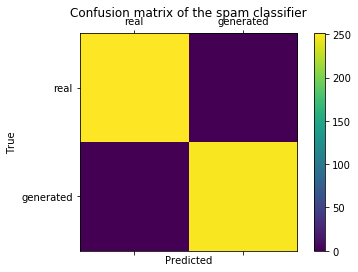

In [364]:
import matplotlib.pyplot as plt
labels = ['real', 'generated']

results = confusion_matrix(y_testa, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [365]:
print ('Accuracy Score :',accuracy_score(y_testa, y_predicted))
print ('Report : ')
print (classification_report(y_testa, y_predicted) )
score_2 = f1_score(y_testa, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix = [[score_2, .1]]
#resultsMatrix.append([score_2, .1])

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 1.000


In [366]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainb)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainb.str.len(),
                                                                    X_trainb.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testb)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testb.str.len(),
                                                                  X_testb.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainb)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testb, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

[[251   0]
 [  0 249]]


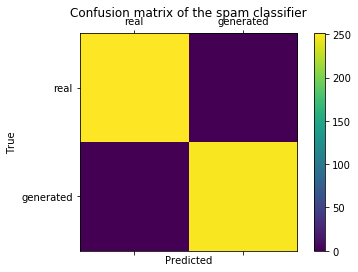

In [367]:
results = confusion_matrix(y_testb, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [368]:
print ('Accuracy Score :',accuracy_score(y_testb, y_predicted))
print ('Report : ')
print (classification_report(y_testb, y_predicted) )
score_2 = f1_score(y_testb, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .2])

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 1.000


In [369]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainc)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainc.str.len(),
                                                                    X_trainc.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testc)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testc.str.len(),
                                                                  X_testc.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainc)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testc, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

[[251   0]
 [  0 249]]


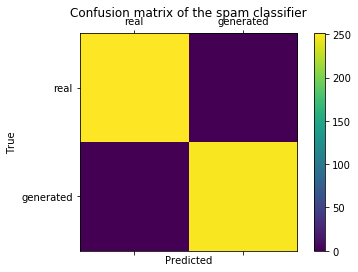

In [370]:
results = confusion_matrix(y_testc, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [371]:
print ('Accuracy Score :',accuracy_score(y_testc, y_predicted))
print ('Report : ')
print (classification_report(y_testc, y_predicted) )
score_2 = f1_score(y_testc, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .25])

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 1.000


In [372]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traind)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traind.str.len(),
                                                                    X_traind.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testd)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testd.str.len(),
                                                                  X_testd.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traind)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testd, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

[[251   0]
 [  0 249]]


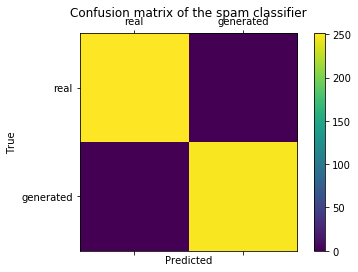

In [373]:
results = confusion_matrix(y_testd, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [374]:
print ('Accuracy Score :',accuracy_score(y_testd, y_predicted))
print ('Report : ')
print (classification_report(y_testd, y_predicted) )
score_2 = f1_score(y_testd, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .3])

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 1.000


In [375]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traine)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traine.str.len(),
                                                                    X_traine.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_teste)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_teste.str.len(),
                                                                  X_teste.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traine)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_teste, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9959839357429718

[[251   0]
 [  2 247]]


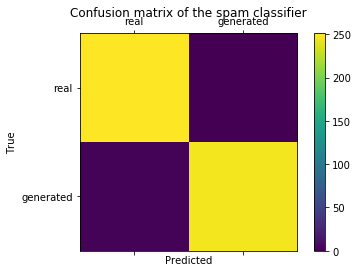

In [376]:
results = confusion_matrix(y_teste, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [377]:
print ('Accuracy Score :',accuracy_score(y_teste, y_predicted))
print ('Report : ')
print (classification_report(y_teste, y_predicted) )
score_2 = f1_score(y_teste, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .4])

Accuracy Score : 0.996
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       251
           1       1.00      0.99      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 0.996


In [378]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainf)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainf.str.len(),
                                                                    X_trainf.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testf)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testf.str.len(),
                                                                  X_testf.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainf)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testf, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.99800796812749

[[250   1]
 [  0 249]]


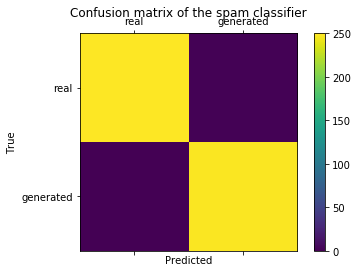

In [379]:
results = confusion_matrix(y_testf, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [380]:
print ('Accuracy Score :',accuracy_score(y_testf, y_predicted))
print ('Report : ')
print (classification_report(y_testf, y_predicted) )
score_2 = f1_score(y_testf, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .5])

Accuracy Score : 0.998
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

F-Measure: 0.998


In [381]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traing)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traing.str.len(),
                                                                    X_traing.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testg)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testg.str.len(),
                                                                  X_testg.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traing)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testg, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9939919038704619

[[250   1]
 [  2 247]]


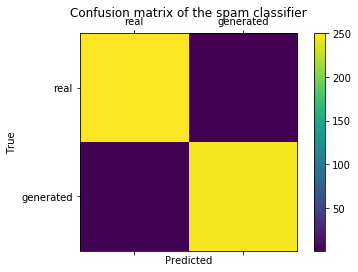

In [382]:
results = confusion_matrix(y_testg, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [383]:
print ('Accuracy Score :',accuracy_score(y_testg, y_predicted))
print ('Report : ')
print (classification_report(y_testg, y_predicted) )
score_2 = f1_score(y_testg, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .6])

Accuracy Score : 0.994
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       251
           1       1.00      0.99      0.99       249

   micro avg       0.99      0.99      0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

F-Measure: 0.994


In [384]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainh)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainh.str.len(),
                                                                    X_trainh.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testh)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testh.str.len(),
                                                                  X_testh.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainh)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testh, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9639674234787756

[[244   7]
 [ 11 238]]


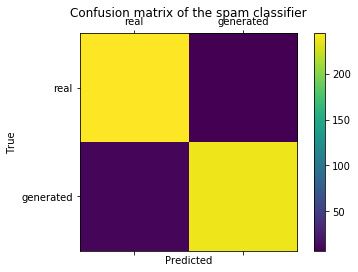

In [385]:
results = confusion_matrix(y_testh, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [386]:
print ('Accuracy Score :',accuracy_score(y_testh, y_predicted))
print ('Report : ')
print (classification_report(y_testh, y_predicted) )
score_2 = f1_score(y_testh, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .7])

Accuracy Score : 0.964
Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       251
           1       0.97      0.96      0.96       249

   micro avg       0.96      0.96      0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

F-Measure: 0.964


In [387]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traini)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traini.str.len(),
                                                                    X_traini.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testi)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testi.str.len(),
                                                                  X_testi.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traini)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testi, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9779756476103618

[[247   4]
 [  7 242]]


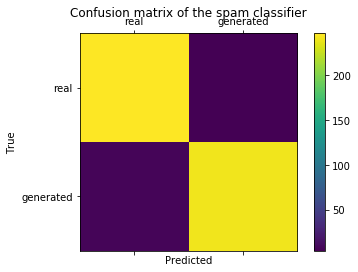

In [388]:
results = confusion_matrix(y_testi, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [389]:
print ('Accuracy Score :',accuracy_score(y_testi, y_predicted))
print ('Report : ')
print (classification_report(y_testi, y_predicted) )
score_2 = f1_score(y_testi, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .75])

Accuracy Score : 0.978
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       251
           1       0.98      0.97      0.98       249

   micro avg       0.98      0.98      0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

F-Measure: 0.978


In [390]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainj)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainj.str.len(),
                                                                    X_trainj.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testj)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testj.str.len(),
                                                                  X_testj.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainj)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testj, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9759676154818477

[[247   4]
 [  8 241]]


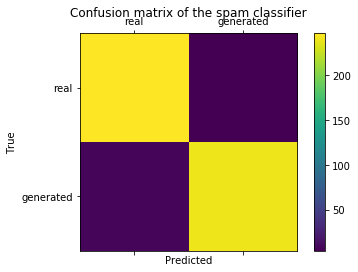

In [391]:
results = confusion_matrix(y_testj, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [392]:
print ('Accuracy Score :',accuracy_score(y_testj, y_predicted))
print ('Report : ')
print (classification_report(y_testj, y_predicted) )
score_2 = f1_score(y_testj, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .8])

Accuracy Score : 0.976
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       251
           1       0.98      0.97      0.98       249

   micro avg       0.98      0.98      0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

F-Measure: 0.976


In [393]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traink)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traink.str.len(),
                                                                    X_traink.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testk)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testk.str.len(),
                                                                  X_testk.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traink)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testk, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9539752636042177

[[241  10]
 [ 13 236]]


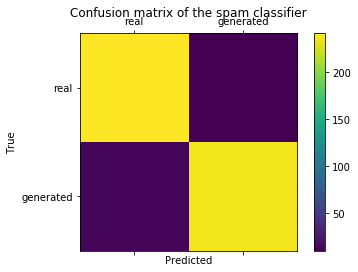

In [394]:
results = confusion_matrix(y_testk, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [395]:
print ('Accuracy Score :',accuracy_score(y_testk, y_predicted))
print ('Report : ')
print (classification_report(y_testk, y_predicted) )
score_2 = f1_score(y_testk, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, .9])

Accuracy Score : 0.954
Report : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       251
           1       0.96      0.95      0.95       249

   micro avg       0.95      0.95      0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

F-Measure: 0.954


In [396]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainl)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainl.str.len(),
                                                                    X_trainl.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testl)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testl.str.len(),
                                                                  X_testl.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainl)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testl, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9439991039856638

[[237  14]
 [ 14 235]]


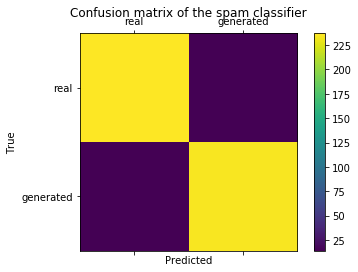

In [397]:
results = confusion_matrix(y_testl, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [398]:
print ('Accuracy Score :',accuracy_score(y_testl, y_predicted))
print ('Report : ')
print (classification_report(y_testl, y_predicted) )
score_2 = f1_score(y_testl, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, 1.0])

Accuracy Score : 0.944
Report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       251
           1       0.94      0.94      0.94       249

   micro avg       0.94      0.94      0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

F-Measure: 0.944


In [399]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainm)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainm.str.len(),
                                                                    X_trainm.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testm)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testm.str.len(),
                                                                  X_testm.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainm)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testm, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9480631690107043

[[234  17]
 [  9 240]]


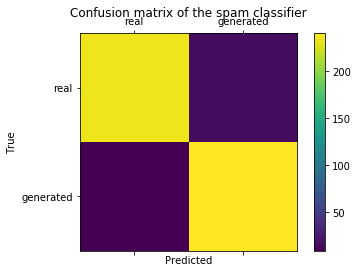

In [400]:
results = confusion_matrix(y_testm, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [401]:
print ('Accuracy Score :',accuracy_score(y_testm, y_predicted))
print ('Report : ')
print (classification_report(y_testm, y_predicted) )
score_2 = f1_score(y_testm, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, 1.1])

Accuracy Score : 0.948
Report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       251
           1       0.93      0.96      0.95       249

   micro avg       0.95      0.95      0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

F-Measure: 0.949


In [402]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_trainn)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_trainn.str.len(),
                                                                    X_trainn.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testn)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testn.str.len(),
                                                                  X_testn.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_trainn)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testn, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9320149122385958

[[233  18]
 [ 16 233]]


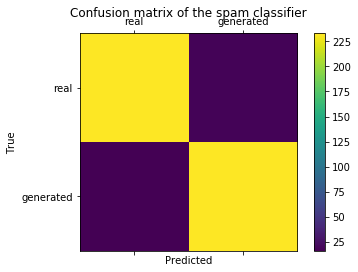

In [403]:
results = confusion_matrix(y_testn, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [404]:
print ('Accuracy Score :',accuracy_score(y_testn, y_predicted))
print ('Report : ')
print (classification_report(y_testn, y_predicted) )
score_2 = f1_score(y_testn, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, 1.2])

Accuracy Score : 0.932
Report : 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       251
           1       0.93      0.94      0.93       249

   micro avg       0.93      0.93      0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

F-Measure: 0.932


In [405]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_traino)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_traino.str.len(),
                                                                    X_traino.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_testo)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_testo.str.len(),
                                                                  X_testo.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_traino)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_testo, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9419910718571498

[[237  14]
 [ 15 234]]


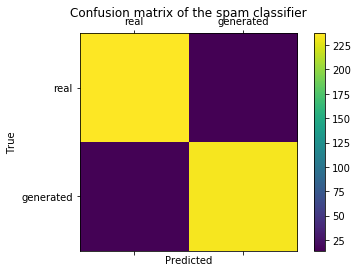

In [406]:
results = confusion_matrix(y_testo, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [407]:
print ('Accuracy Score :',accuracy_score(y_testo, y_predicted))
print ('Report : ')
print (classification_report(y_testo, y_predicted) )
score_2 = f1_score(y_testo, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

resultsMatrix.append([score_2, 1.25])

Accuracy Score : 0.942
Report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       251
           1       0.94      0.94      0.94       249

   micro avg       0.94      0.94      0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

F-Measure: 0.942


In [408]:
resultsMatrix

[[1.0, 0.1],
 [1.0, 0.2],
 [1.0, 0.25],
 [1.0, 0.3],
 [0.995967741935484, 0.4],
 [0.9979959919839679, 0.5],
 [0.993963782696177, 0.6],
 [0.9635627530364372, 0.7],
 [0.9777777777777777, 0.75],
 [0.9757085020242915, 0.8],
 [0.9535353535353536, 0.9],
 [0.9437751004016064, 1.0],
 [0.9486166007905138, 1.1],
 [0.932, 1.2],
 [0.9416498993963783, 1.25]]

In [409]:
np.savetxt("finalOutput.csv", resultsMatrix, delimiter=",")